In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (12,6)

import warnings
warnings.filterwarnings('ignore')

# Smoothing Methods

> Smoothing is a statistical method we can use to create an approximation function to remove irregularities in data and attempt to capture significant patterns.
<br><br>
>The smoothing technique is a family of time-series forecasting
algorithms, which utilizes the weighted averages of a previous observation to predict or forecast a new value. The main idea of this technique is to overweight recent values in a time series. It is utilized for short-term forecasting models. This technique is more efficient when time-series data is moving slowly over time. It harmonizes errors, trends, and seasonal components into computing smoothening parameters. These components are pooled either additively or multiplicatively.

## 1. Simple Exponential Smoothing
> Such techniques are **employed for a univariate observation (data), which has no clear trend or seasonal patterns.**  It involves a parameter called **alpha,** which is the **smoothing parameter.** The core idea is to employ a weighted moving average, including exponentially decreasing weights, which designates **higher weight to the most recent observation.** The concept behind SES is forecasting future values by using a weighted average of all the previous values in the series. **This method can be used to predict series that do not have trends or seasonality.**

In [2]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Apress/hands-on-time-series-analylsis-python/master/Data/FB.csv',
                parse_dates=True, index_col=0)
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-12-08  76.180000  77.250000  75.400002  76.519997  76.519997  25733900
2014-12-09  75.199997  76.930000  74.779999  76.839996  76.839996  25358600
2014-12-10  76.650002  77.550003  76.070000  76.180000  76.180000  32210500
2014-12-11  76.519997  78.519997  76.480003  77.730003  77.730003  33462100
2014-12-12  77.160004  78.879997  77.019997  77.830002  77.830002  28091600

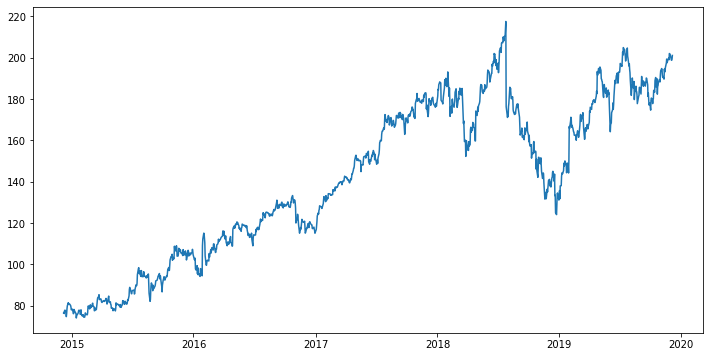

In [28]:
plt.plot(df.Close)
plt.show()

In [8]:
X = df['Close']

train = X[:-30]
test = X[-30:]

ses = SimpleExpSmoothing(train).fit()

In [9]:
ses.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1229
Model:             SimpleExpSmoothing   SSE                           8965.774
Optimized:                       True   AIC                           2446.285
Trend:                           None   BIC                           2456.513
Seasonal:                        None   AICC                          2446.318
Seasonal Periods:                None   Date:                 Sun, 06 Jun 2021
Box-Cox:                        False   Time:                         07:29:02
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9808445                alpha                 True
initial_level              76.525895                  l.0                 True
------------------------------------------------------------------------------
"""

In [16]:
preds = ses.forecast(30)

print('RMSE:', np.sqrt(mean_squared_error(test, preds)))

RMSE: 9.88334182747935


In [24]:
ses.params

{'smoothing_level': 0.9808445111340219,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 76.5258954814213,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

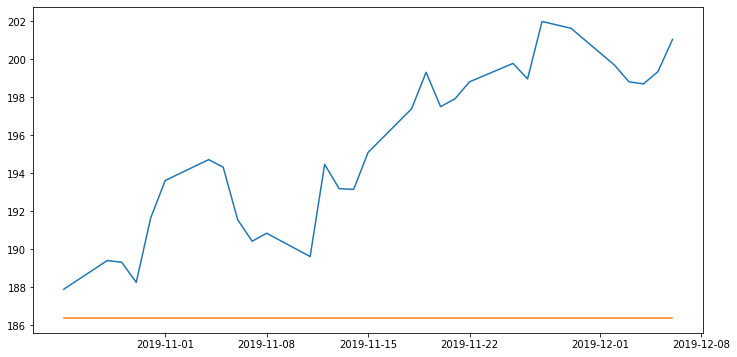

In [23]:
plt.plot(test)
plt.plot(test.index, preds)

In [15]:
ses2 = SimpleExpSmoothing(train).fit(0.9)
print('RMSE', np.sqrt(mean_squared_error(test, ses2.forecast(30))))

RMSE 9.926881953767738


In [17]:
ses2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1229
Model:             SimpleExpSmoothing   SSE                           9022.884
Optimized:                       True   AIC                           2454.089
Trend:                           None   BIC                           2464.317
Seasonal:                        None   AICC                          2454.122
Seasonal Periods:                None   Date:                 Sun, 06 Jun 2021
Box-Cox:                        False   Time:                         07:34:03
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
initial_level              76.546946                  l.0                 True
------------------------------------------------------------------------------
"""

In [26]:
ses3 = SimpleExpSmoothing(train).fit(optimized=True, use_brute=True)
preds2 = ses3.forecast(30)
print('RMSE', np.sqrt(mean_squared_error(test, preds2)))

RMSE 9.88334182747935


## 2. Double Exponential Smoothing
> simple exponential smoothing does not function well when the data has trends. In those cases, we can use double exponential smoothing. This is a more reliable method for handling data that consumes trends without seasonality than compared to other methods. This method adds a time trend equation in the formulation. Two different weights, or smoothing parameters, are used to update these two components at a time.
<br><br>
> Holt’s exponential smoothing is also sometimes called double exponential smoothing. The main idea here is to use SES and advance it to capture the trend component.

- **Dampening means decreasing future time trends on a straight line (no
trend).**

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing,Holt

In [37]:
des_add = ExponentialSmoothing(train,trend='add').fit(optimized= True, use_brute = True)
p_add = des_add.forecast(30)
des_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Close   No. Observations:                 1229
Model:             ExponentialSmoothing   SSE                           8955.547
Optimized:                         True   AIC                           2448.883
Trend:                         Additive   BIC                           2469.339
Seasonal:                          None   AICC                          2448.952
Seasonal Periods:                  None   Date:                 Sun, 06 Jun 2021
Box-Cox:                          False   Time:                         08:05:12
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9796487                alpha                 True
smoothing_trend            1.877e-16                 beta                 True
initial_level              76.434869                  l.0                 True
initial_trend              0.0894555                  b.0                 True
------------------------------------------------------------------------------
"""

In [38]:
des_mul = ExponentialSmoothing(train,trend='mul').fit(optimized= True, use_brute = True)
p_mul = des_mul.forecast(30)
des_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Close   No. Observations:                 1229
Model:             ExponentialSmoothing   SSE                           8961.642
Optimized:                         True   AIC                           2449.719
Trend:                   Multiplicative   BIC                           2470.175
Seasonal:                          None   AICC                          2449.788
Seasonal Periods:                  None   Date:                 Sun, 06 Jun 2021
Box-Cox:                          False   Time:                         08:05:22
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9799580                alpha                 True
smoothing_trend             0.000000                 beta                 True
initial_level              76.495488                  l.0                 True
initial_trend              1.0003922                  b.0                 True
------------------------------------------------------------------------------
"""

In [39]:
des_add.params

{'smoothing_level': 0.9796487338589596,
 'smoothing_trend': 1.876999672181865e-16,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 76.43486859632446,
 'initial_trend': 0.0894555357574055,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

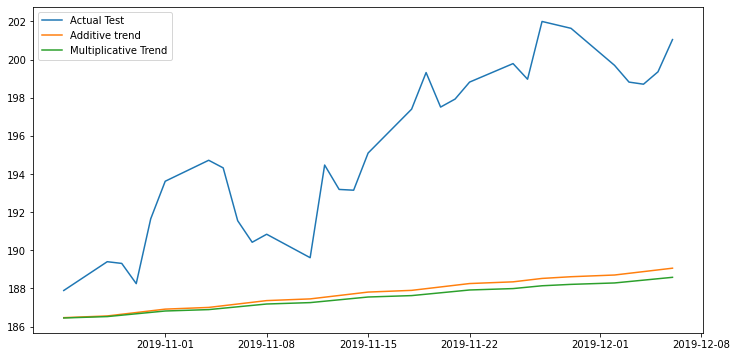

In [40]:
plt.plot(test, label="Actual Test")
plt.plot(test.index, p_add, label="Additive trend")
plt.plot(test.index, p_mul, label="Multiplicative Trend")
plt.legend()
plt.show()

In [41]:
print('RMSE', np.sqrt(mean_squared_error(test, p_add)))

RMSE 8.337112972663483


### Custom Grid Search to find the best parameters

In [42]:
from sklearn.model_selection import ParameterGrid

In [44]:
param_grid =   {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60, .70,.80,.90],
                'smoothing_slope':[0.10, 0.20,.30, .40,.50,.60,.70,.80,.90],
                'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70, .80,.90],
                'damped' : [True, False]}

pg = list(ParameterGrid(param_grid))

In [50]:
pg[0]

{'damped': True,
 'damping_slope': 0.1,
 'smoothing_level': 0.1,
 'smoothing_slope': 0.1}

In [84]:
dataframe = pd.DataFrame(columns=['damped', 'damping_slope', 'smoothing_level', 'smoothing_slope', 'rmse'])

start = time.time()

for i, grid in enumerate(pg):
    damped = grid.get('damped')
    damping_slope = grid.get('damping_slope')
    smoothing_level = grid.get('smoothing_level')
    smoothing_slope = grid.get('smoothing_slope')
    
    holt = Holt(train,damped_trend=damped).fit(smoothing_level=smoothing_level, 
                                          smoothing_slope=smoothing_slope, 
                                          damping_slope = damping_slope, 
                                          optimized=False)
    preds = holt.forecast(30)
    rmse = np.sqrt(mean_squared_error(test, preds))
    print(f"Loop {i+1}\tRMSE:", rmse)
    dataframe.loc[i] = [damped, damping_slope, smoothing_level, smoothing_slope, rmse]

print("Custom grid search completed!!\n\n")
end = time.time()
print("total time in seconds: ", int(end-start))

Loop 1	RMSE: 11.39921926647149
Loop 2	RMSE: 11.387792137364357
Loop 3	RMSE: 11.376204590589689
Loop 4	RMSE: 11.364468485459678
Loop 5	RMSE: 11.352595185763354
Loop 6	RMSE: 11.340595580090929
Loop 7	RMSE: 11.328480101491195
Loop 8	RMSE: 11.316258746449593
Loop 9	RMSE: 11.303941093180864
Loop 10	RMSE: 10.418028487385405
Loop 11	RMSE: 10.403556967943604
Loop 12	RMSE: 10.389472916882916
Loop 13	RMSE: 10.37577332765381
Loop 14	RMSE: 10.362454916954752
Loop 15	RMSE: 10.349514145054153
Loop 16	RMSE: 10.336947235128726
Loop 17	RMSE: 10.324750191661987
Loop 18	RMSE: 10.31291881794728
Loop 19	RMSE: 10.087115782690839
Loop 20	RMSE: 10.084081245631152
Loop 21	RMSE: 10.08140027575732
Loop 22	RMSE: 10.079057586272338
Loop 23	RMSE: 10.077038214156975
Loop 24	RMSE: 10.075327525211943
Loop 25	RMSE: 10.073911217917175
Loop 26	RMSE: 10.072775326210438
Loop 27	RMSE: 10.071906221279832
Loop 28	RMSE: 10.090240571134533
Loop 29	RMSE: 10.092939878524245
Loop 30	RMSE: 10.095707397199567
Loop 31	RMSE: 10.098528

Loop 251	RMSE: 10.761240468366973
Loop 252	RMSE: 10.68490487157024
Loop 253	RMSE: 10.336659645373784
Loop 254	RMSE: 10.255347120167873
Loop 255	RMSE: 10.188564619895251
Loop 256	RMSE: 10.135590598793963
Loop 257	RMSE: 10.095478597307759
Loop 258	RMSE: 10.06714317388819
Loop 259	RMSE: 10.04942652780801
Loop 260	RMSE: 10.04114885921225
Loop 261	RMSE: 10.041145296776993
Loop 262	RMSE: 10.06917175263239
Loop 263	RMSE: 10.063856856054915
Loop 264	RMSE: 10.071494895010808
Loop 265	RMSE: 10.089250010221168
Loop 266	RMSE: 10.114577524136932
Loop 267	RMSE: 10.145238436018815
Loop 268	RMSE: 10.179293434527747
Loop 269	RMSE: 10.215084973961558
Loop 270	RMSE: 10.251213220271623
Loop 271	RMSE: 10.111395843922518
Loop 272	RMSE: 10.142026103760918
Loop 273	RMSE: 10.176035456425508
Loop 274	RMSE: 10.210614760433549
Loop 275	RMSE: 10.243543835611728
Loop 276	RMSE: 10.273108178562065
Loop 277	RMSE: 10.29802111334516
Loop 278	RMSE: 10.317354396616771
Loop 279	RMSE: 10.330477983338215
Loop 280	RMSE: 10.16

Loop 500	RMSE: 9.879576652589957
Loop 501	RMSE: 10.140003029243747
Loop 502	RMSE: 10.445759380491038
Loop 503	RMSE: 10.77093057262268
Loop 504	RMSE: 11.09666402790331
Loop 505	RMSE: 9.921320973735217
Loop 506	RMSE: 9.986836893793319
Loop 507	RMSE: 10.210392068992217
Loop 508	RMSE: 10.51754909762793
Loop 509	RMSE: 10.85137164246358
Loop 510	RMSE: 11.173499650500677
Loop 511	RMSE: 11.460115171836346
Loop 512	RMSE: 11.697105126302356
Loop 513	RMSE: 11.876173109322899
Loop 514	RMSE: 10.123907599962791
Loop 515	RMSE: 10.337847284789246
Loop 516	RMSE: 10.621706648825752
Loop 517	RMSE: 10.900612686397928
Loop 518	RMSE: 11.129622832595281
Loop 519	RMSE: 11.284347339337204
Loop 520	RMSE: 11.353158684686736
Loop 521	RMSE: 11.332503666566788
Loop 522	RMSE: 11.224517657717419
Loop 523	RMSE: 10.25048364929434
Loop 524	RMSE: 10.461769312974338
Loop 525	RMSE: 10.664439584903334
Loop 526	RMSE: 10.799090238254223
Loop 527	RMSE: 10.838228080238896
Loop 528	RMSE: 10.774059122171685
Loop 529	RMSE: 10.6109

Loop 752	RMSE: 28.461257053870067
Loop 753	RMSE: 33.58918594773151
Loop 754	RMSE: 36.421457004843894
Loop 755	RMSE: 38.21726353948067
Loop 756	RMSE: 39.622692971251396
Loop 757	RMSE: 5.460953446587809
Loop 758	RMSE: 7.146216213629235
Loop 759	RMSE: 15.117614353963578
Loop 760	RMSE: 22.707399946932103
Loop 761	RMSE: 27.510317040657473
Loop 762	RMSE: 29.794590767226325
Loop 763	RMSE: 30.07220608624553
Loop 764	RMSE: 28.333802240622507
Loop 765	RMSE: 24.40190831781745
Loop 766	RMSE: 6.536105585317595
Loop 767	RMSE: 9.250037360444129
Loop 768	RMSE: 15.857236865913912
Loop 769	RMSE: 20.80179210126607
Loop 770	RMSE: 22.729062866399243
Loop 771	RMSE: 21.858523112181164
Loop 772	RMSE: 18.53122452403073
Loop 773	RMSE: 13.21091254783002
Loop 774	RMSE: 6.725930918970148
Loop 775	RMSE: 7.038247063117182
Loop 776	RMSE: 9.641216223888213
Loop 777	RMSE: 14.529330620829509
Loop 778	RMSE: 17.10139201098572
Loop 779	RMSE: 16.547099955649475
Loop 780	RMSE: 13.346167624104629
Loop 781	RMSE: 8.311952322566

Loop 1004	RMSE: 27.510317040657473
Loop 1005	RMSE: 29.794590767226325
Loop 1006	RMSE: 30.07220608624553
Loop 1007	RMSE: 28.333802240622507
Loop 1008	RMSE: 24.40190831781745
Loop 1009	RMSE: 6.536105585317595
Loop 1010	RMSE: 9.250037360444129
Loop 1011	RMSE: 15.857236865913912
Loop 1012	RMSE: 20.80179210126607
Loop 1013	RMSE: 22.729062866399243
Loop 1014	RMSE: 21.858523112181164
Loop 1015	RMSE: 18.53122452403073
Loop 1016	RMSE: 13.21091254783002
Loop 1017	RMSE: 6.725930918970148
Loop 1018	RMSE: 7.038247063117182
Loop 1019	RMSE: 9.641216223888213
Loop 1020	RMSE: 14.529330620829509
Loop 1021	RMSE: 17.10139201098572
Loop 1022	RMSE: 16.547099955649475
Loop 1023	RMSE: 13.346167624104629
Loop 1024	RMSE: 8.31195232256633
Loop 1025	RMSE: 2.969909939718287
Loop 1026	RMSE: 5.393997701037462
Loop 1027	RMSE: 7.117758070490616
Loop 1028	RMSE: 9.156752496109288
Loop 1029	RMSE: 12.448498520253233
Loop 1030	RMSE: 13.185794851923061
Loop 1031	RMSE: 11.050298202036274
Loop 1032	RMSE: 6.890306068499354
Loo

Loop 1247	RMSE: 27.510317040657473
Loop 1248	RMSE: 29.794590767226325
Loop 1249	RMSE: 30.07220608624553
Loop 1250	RMSE: 28.333802240622507
Loop 1251	RMSE: 24.40190831781745
Loop 1252	RMSE: 6.536105585317595
Loop 1253	RMSE: 9.250037360444129
Loop 1254	RMSE: 15.857236865913912
Loop 1255	RMSE: 20.80179210126607
Loop 1256	RMSE: 22.729062866399243
Loop 1257	RMSE: 21.858523112181164
Loop 1258	RMSE: 18.53122452403073
Loop 1259	RMSE: 13.21091254783002
Loop 1260	RMSE: 6.725930918970148
Loop 1261	RMSE: 7.038247063117182
Loop 1262	RMSE: 9.641216223888213
Loop 1263	RMSE: 14.529330620829509
Loop 1264	RMSE: 17.10139201098572
Loop 1265	RMSE: 16.547099955649475
Loop 1266	RMSE: 13.346167624104629
Loop 1267	RMSE: 8.31195232256633
Loop 1268	RMSE: 2.969909939718287
Loop 1269	RMSE: 5.393997701037462
Loop 1270	RMSE: 7.117758070490616
Loop 1271	RMSE: 9.156752496109288
Loop 1272	RMSE: 12.448498520253233
Loop 1273	RMSE: 13.185794851923061
Loop 1274	RMSE: 11.050298202036274
Loop 1275	RMSE: 6.890306068499354
Loo

In [85]:
dataframe

damped  damping_slope  smoothing_level  smoothing_slope       rmse
0      True            0.1              0.1              0.1  11.399219
1      True            0.1              0.1              0.2  11.387792
2      True            0.1              0.1              0.3  11.376205
3      True            0.1              0.1              0.4  11.364468
4      True            0.1              0.1              0.5  11.352595
...     ...            ...              ...              ...        ...
1453  False            0.9              0.9              0.5   4.992828
1454  False            0.9              0.9              0.6   2.176486
1455  False            0.9              0.9              0.7   4.191178
1456  False            0.9              0.9              0.8   7.541038
1457  False            0.9              0.9              0.9  10.172599

[1458 rows x 5 columns]

In [86]:
dataframe.sort_values(by=['rmse','smoothing_level','damping_slope']).head()

damped  damping_slope  smoothing_level  smoothing_slope      rmse
806   False            0.1              0.9              0.6  2.176486
887   False            0.2              0.9              0.6  2.176486
968   False            0.3              0.9              0.6  2.176486
1049  False            0.4              0.9              0.6  2.176486
1130  False            0.5              0.9              0.6  2.176486

In [87]:
best_model = Holt(train, damped=False).fit(smoothing_level=0.9, smoothing_slope=0.6,
                                          damping_slope=0.1, optimized=False)

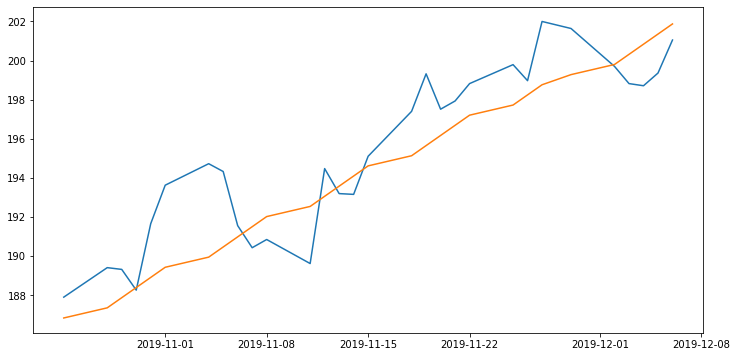

In [88]:
best_preds = best_model.forecast(30)

plt.plot(test)
plt.plot(test.index, best_preds)
plt.show()

In [89]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1229
Model:                           Holt   SSE                          12220.966
Optimized:                      False   AIC                           2830.954
Trend:                       Additive   BIC                           2851.410
Seasonal:                        None   AICC                          2831.023
Seasonal Periods:                None   Date:                 Sun, 06 Jun 2021
Box-Cox:                        False   Time:                         09:04:46
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
smoothing_trend            0.6000000                 beta                False
initial_level              76.519997                  l.0                False
initial_trend              0.3199990                  b.0                False
------------------------------------------------------------------------------
"""

## 3. Triple Exponential Smoothing
> Triple exponential smoothing is a forecasting method that enforces exponential smoothing three times. This method can be applied when the **data consumes trends and seasonality over time.** It includes all smoothing component equations such as trends and seasonality. Seasonality comprises two different types, such as additive and multiplicative, which is a similar operation in mathematics.

In [100]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-12-08   76.180000   77.250000   75.400002   76.519997   76.519997   
2014-12-09   75.199997   76.930000   74.779999   76.839996   76.839996   
2014-12-10   76.650002   77.550003   76.070000   76.180000   76.180000   
2014-12-11   76.519997   78.519997   76.480003   77.730003   77.730003   
2014-12-12   77.160004   78.879997   77.019997   77.830002   77.830002   
...                ...         ...         ...         ...         ...   
2019-12-02  202.130005  202.179993  198.050003  199.699997  199.699997   
2019-12-03  197.600006  198.929993  195.080002  198.820007  198.820007   
2019-12-04  200.000000  200.029999  198.050003  198.710007  198.710007   
2019-12-05  199.860001  201.289993  198.210007  199.360001  199.360001   
2019-12-06  200.500000  201.566895  200.070007  201.050003  201.050003   

              Volume  
Date                  
2014-12-08  25733900  
2014-12-09  25358600  
2014-12-10  32210500  
2014-12-11  33462100  
2014-12-12  28091600  
...              ...  
2019-12-02  11503400  
2019-12-03  11595300  
2019-12-04   8456300  
2019-12-05   9740400  
2019-12-06  12279525  

[1259 rows x 6 columns]

In [106]:
from timeit import default_timer as timer

triple_auto = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit()
pred_t_auto = triple_auto.forecast(30)
triple_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Close   No. Observations:                 1229
Model:             ExponentialSmoothing   SSE                           8835.360
Optimized:                         True   AIC                           2456.278
Trend:                         Additive   BIC                           2538.101
Seasonal:                      Additive   AICC                          2456.843
Seasonal Periods:                    12   Date:                 Sun, 06 Jun 2021
Box-Cox:                          False   Time:                         09:38:35
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9825704                alpha                 True
smoothing_trend                0.000000                 beta                 True
smoothing_seasonal            6.249e-07                gamma                 True
initial_level                 138.67652                  l.0                 True
initial_trend                 0.0893013                  b.0                 True
initial_seasons.0            -62.250850                  s.0                 True
initial_seasons.1            -61.898677                  s.1                 True
initial_seasons.2            -62.546242                  s.2                 True
initial_seasons.3            -62.262702                  s.3                 True
initial_seasons.4            -62.259685                  s.4                 True
initial_seasons.5            -62.574294                  s.5                 True
initial_seasons.6            -62.955690                  s.6                 True
initial_seasons.7            -62.907140                  s.7                 True
initial_seasons.8            -63.031163                  s.8                 True
initial_seasons.9            -62.819352                  s.9                 True
initial_seasons.10           -62.606363                 s.10                 True
initial_seasons.11           -62.161101                 s.11                 True
---------------------------------------------------------------------------------
"""

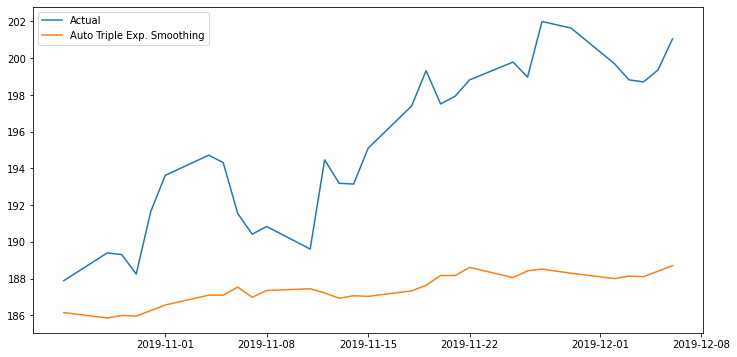

In [107]:
plt.plot(test, label="Actual")
plt.plot(test.index, pred_t_auto, label="Auto Triple Exp. Smoothing")
plt.legend()
plt.show()

In [132]:
# smoothing_level = alpha
# smoothing_trend = beta
# smoothing_seasonal = gamma
# damping_trend = phi

param_grid = {
    'trend':['add','mul'],
    'damped_trend':[True, False],
    'seasonal':['add','mul'],
    'seasonal_periods':[7,15,30],
    'initialization_method':['estimated','heuristic'],
    'use_boxcox':[True, False],
    'smoothing_level':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'smoothing_trend':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'smoothing_seasonal':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damping_trend':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'remove_bias':[True, False],
}

pg = list(ParameterGrid(param_grid))

In [ ]:
columns = ['trend', 'damped_trend','seasonal', 'seasonal_periods',
          'initialization_method', 'use_boxcox',
          'smoothing_level', 'smoothing_trend', 'smoothing_seasonal',
          'damping_trend', 'remove_bias', 'rmse']

dataframe = pd.DataFrame(columns=columns)

start = timer()

for i, g in enumerate(pg):
    trend = g.get('trend')
    damped_trend = g.get('damped_trend')
    seasonal = g.get('seasonal')
    seasonal_periods = g.get('seasonal_periods')
    initialization_method = g.get('initialization_method')
    use_boxcox = g.get('use_boxcox')
    smoothing_level = g.get('smoothing_level')
    smoothing_trend = g.get('smoothing_trend')
    smoothing_seasonal = g.get('smoothing_seasonal')
    damping_trend = g.get('damping_trend')
    remove_bias = g.get('remove_bias')
    
    triple_exp = ExponentialSmoothing(train,trend=trend,damped_trend=damped_trend,
                                     seasonal=seasonal,seasonal_periods=seasonal_periods,
                                     initialization_method=initialization_method,
                                     use_boxcox=use_boxcox).fit(smoothing_level=smoothing_level,
                                                               smoothing_trend=smoothing_trend,
                                                               smoothing_seasonal=smoothing_seasonal,
                                                               damping_trend=damping_trend,
                                                               remove_bias=remove_bias,
                                                               optimized=False)
    pred = triple_exp.forecast(30)
    rmse = np.sqrt(mean_squared_error(test, pred))
    
    dataframe.loc[i] = [trend, damped_trend,seasonal,seasonal_periods,
                        initialization_method, use_boxcox,
                        smoothing_level, smoothing_trend, smoothing_seasonal,
                        damping_trend, remove_bias, rmse]
    
    print(f'Loop {i+1}\t RMSE:',rmse)
    
end = timer()

print("Total time in seconds is", end-start)

Loop 1	 RMSE: 10.452550712316176
Loop 2	 RMSE: 10.451623047000515
Loop 3	 RMSE: 10.586827908987193
Loop 4	 RMSE: 10.59300148276041
Loop 5	 RMSE: 10.445099209551175
Loop 6	 RMSE: 10.444184810372954
Loop 7	 RMSE: 10.578143887220735
Loop 8	 RMSE: 10.58425987956159
Loop 9	 RMSE: 10.437509266510526
Loop 10	 RMSE: 10.43660774267828
Loop 11	 RMSE: 10.569336367034857
Loop 12	 RMSE: 10.575395912063593
Loop 13	 RMSE: 10.429791025783809
Loop 14	 RMSE: 10.428901996377219
Loop 15	 RMSE: 10.560415391947387
Loop 16	 RMSE: 10.566419582080242
Loop 17	 RMSE: 10.421954217451981
Loop 18	 RMSE: 10.421077311262945
Loop 19	 RMSE: 10.551390579307743
Loop 20	 RMSE: 10.557340467637115
Loop 21	 RMSE: 10.41400817706076
Loop 22	 RMSE: 10.413143032434078
Loop 23	 RMSE: 10.542271139615384
Loop 24	 RMSE: 10.54816774214366
Loop 25	 RMSE: 10.405961862680739
Loop 26	 RMSE: 10.405108127353431
Loop 27	 RMSE: 10.53306589482833
Loop 28	 RMSE: 10.538910192563028
Loop 29	 RMSE: 10.397823871102196
Loop 30	 RMSE: 10.39698120204

Loop 245	 RMSE: 9.070555993270517
Loop 246	 RMSE: 9.070264934927215
Loop 247	 RMSE: 9.140241296710407
Loop 248	 RMSE: 9.143678205808307
Loop 249	 RMSE: 9.072568554384453
Loop 250	 RMSE: 9.072278846095688
Loop 251	 RMSE: 9.14189875518517
Loop 252	 RMSE: 9.145316182137076
Loop 253	 RMSE: 8.89298747786057
Loop 254	 RMSE: 8.892690586630627
Loop 255	 RMSE: 8.958778155596706
Loop 256	 RMSE: 8.96204480016359
Loop 257	 RMSE: 8.89689922890264
Loop 258	 RMSE: 8.89660367244887
Loop 259	 RMSE: 8.962409638657922
Loop 260	 RMSE: 8.965656578316358
Loop 261	 RMSE: 8.900953852157212
Loop 262	 RMSE: 8.900659663679887
Loop 263	 RMSE: 8.966181847659382
Loop 264	 RMSE: 8.96940960310075
Loop 265	 RMSE: 8.90514897767584
Loop 266	 RMSE: 8.904856188085246
Loop 267	 RMSE: 8.970092449984623
Loop 268	 RMSE: 8.97330153089031
Loop 269	 RMSE: 8.909482269815692
Loop 270	 RMSE: 8.909190907759195
Loop 271	 RMSE: 8.974139149306556
Loop 272	 RMSE: 8.977330054384916
Loop 273	 RMSE: 8.913951427418803
Loop 274	 RMSE: 8.9136

Loop 489	 RMSE: 9.7148934250951
Loop 490	 RMSE: 9.714875788941976
Loop 491	 RMSE: 9.7681369672802
Loop 492	 RMSE: 9.770925095819912
Loop 493	 RMSE: 9.727796793417568
Loop 494	 RMSE: 9.72778650395442
Loop 495	 RMSE: 9.780699906501487
Loop 496	 RMSE: 9.783472563247798
Loop 497	 RMSE: 9.740925341398983
Loop 498	 RMSE: 9.740922409091574
Loop 499	 RMSE: 9.793484293511865
Loop 500	 RMSE: 9.796242179655582
Loop 501	 RMSE: 9.754271707088947
Loop 502	 RMSE: 9.75427613926993
Loop 503	 RMSE: 9.806482943619486
Loop 504	 RMSE: 9.809226736298491
Loop 505	 RMSE: 9.637659892547624
Loop 506	 RMSE: 9.637577181058019
Loop 507	 RMSE: 9.689283117132343
Loop 508	 RMSE: 9.691970592771503
Loop 509	 RMSE: 9.65334585284039
Loop 510	 RMSE: 9.653268867599316
Loop 511	 RMSE: 9.704702234072125
Loop 512	 RMSE: 9.707371397491531
Loop 513	 RMSE: 9.669253684883305
Loop 514	 RMSE: 9.669182387961722
Loop 515	 RMSE: 9.720337026629121
Loop 516	 RMSE: 9.722988616307868
Loop 517	 RMSE: 9.685376344507306
Loop 518	 RMSE: 9.685

Loop 732	 RMSE: 10.11022466842305
Loop 733	 RMSE: 10.079015717239448
Loop 734	 RMSE: 10.079107752707277
Loop 735	 RMSE: 10.12247928683198
Loop 736	 RMSE: 10.124836559046663
Loop 737	 RMSE: 10.09400837925998
Loop 738	 RMSE: 10.094109059262703
Loop 739	 RMSE: 10.137193222812332
Loop 740	 RMSE: 10.139535131166612
Loop 741	 RMSE: 10.109082730943621
Loop 742	 RMSE: 10.109191966527069
Loop 743	 RMSE: 10.151980844166816
Loop 744	 RMSE: 10.154308171094526
Loop 745	 RMSE: 10.124226658738605
Loop 746	 RMSE: 10.124344357143695
Loop 747	 RMSE: 10.166830330266045
Loop 748	 RMSE: 10.16914382695509
Loop 749	 RMSE: 10.139428413633633
Loop 750	 RMSE: 10.139554478481077
Loop 751	 RMSE: 10.181730212466112
Loop 752	 RMSE: 10.184030600102485
Loop 753	 RMSE: 10.154676602919379
Loop 754	 RMSE: 10.154810934385688
Loop 755	 RMSE: 10.196669365660572
Loop 756	 RMSE: 10.19895733665421
Loop 757	 RMSE: 10.198248895092789
Loop 758	 RMSE: 10.198495388241245
Loop 759	 RMSE: 10.240733682393822
Loop 760	 RMSE: 10.243239

Loop 968	 RMSE: 11.235518840384637
Loop 969	 RMSE: 11.247495892532065
Loop 970	 RMSE: 11.246220677177604
Loop 971	 RMSE: 11.280468558756288
Loop 972	 RMSE: 11.280932709927479
Loop 973	 RMSE: 9.880335936692322
Loop 974	 RMSE: 9.880161782802379
Loop 975	 RMSE: 9.916756027367423
Loop 976	 RMSE: 9.918497161657452
Loop 977	 RMSE: 9.887224058948783
Loop 978	 RMSE: 9.887058781580583
Loop 979	 RMSE: 9.923424466519483
Loop 980	 RMSE: 9.925149580343595
Loop 981	 RMSE: 9.894078891613141
Loop 982	 RMSE: 9.893922520744507
Loop 983	 RMSE: 9.93004937147576
Loop 984	 RMSE: 9.931759462411305
Loop 985	 RMSE: 9.90089051038887
Loop 986	 RMSE: 9.900743076225453
Loop 987	 RMSE: 9.936621372672292
Loop 988	 RMSE: 9.938317399868325
Loop 989	 RMSE: 9.90764965338959
Loop 990	 RMSE: 9.907511186524875
Loop 991	 RMSE: 9.943131749476105
Loop 992	 RMSE: 9.944814634983636
Loop 993	 RMSE: 9.914347699104246
Loop 994	 RMSE: 9.914218230661467
Loop 995	 RMSE: 9.949572408030328
Loop 996	 RMSE: 9.951243038090494
Loop 997	 RM

Loop 1200	 RMSE: 11.703804174693412
Loop 1201	 RMSE: 11.712375317474722
Loop 1202	 RMSE: 11.712151181138768
Loop 1203	 RMSE: 11.742649467308961
Loop 1204	 RMSE: 11.744016036311137
Loop 1205	 RMSE: 11.752399185744046
Loop 1206	 RMSE: 11.752175297636159
Loop 1207	 RMSE: 11.78259176280297
Loop 1208	 RMSE: 11.783940625876477
Loop 1209	 RMSE: 11.792153798579976
Loop 1210	 RMSE: 11.791930531850797
Loop 1211	 RMSE: 11.822250508111642
Loop 1212	 RMSE: 11.82358287758402
Loop 1213	 RMSE: 11.831645341321893
Loop 1214	 RMSE: 11.831423090413248
Loop 1215	 RMSE: 11.861631881664279
Loop 1216	 RMSE: 11.862948977791765
Loop 1217	 RMSE: 11.87088121965446
Loop 1218	 RMSE: 11.870660401002855
Loop 1219	 RMSE: 11.900743242709327
Loop 1220	 RMSE: 11.902046297019472
Loop 1221	 RMSE: 11.909869976706762
Loop 1222	 RMSE: 11.909651029570256
Loop 1223	 RMSE: 11.939593051913775
Loop 1224	 RMSE: 11.940883310452532
Loop 1225	 RMSE: 11.832316017471928
Loop 1226	 RMSE: 11.831439915865362
Loop 1227	 RMSE: 11.86168308190

Loop 1431	 RMSE: 11.379545669895167
Loop 1432	 RMSE: 11.381764517349994
Loop 1433	 RMSE: 11.370033683320573
Loop 1434	 RMSE: 11.370912339814172
Loop 1435	 RMSE: 11.397460489628871
Loop 1436	 RMSE: 11.399673648975053
Loop 1437	 RMSE: 11.387624011500174
Loop 1438	 RMSE: 11.388513449499003
Loop 1439	 RMSE: 11.41491402107787
Loop 1440	 RMSE: 11.417122231187863
Loop 1441	 RMSE: 11.602963958404015
Loop 1442	 RMSE: 11.603894036831564
Loop 1443	 RMSE: 11.630140595194494
Loop 1444	 RMSE: 11.632518575658125
Loop 1445	 RMSE: 11.626828928873268
Loop 1446	 RMSE: 11.627782273931011
Loop 1447	 RMSE: 11.654049230085514
Loop 1448	 RMSE: 11.656426582763144
Loop 1449	 RMSE: 11.649886135613578
Loop 1450	 RMSE: 11.650862995244891
Loop 1451	 RMSE: 11.677128546057443
Loop 1452	 RMSE: 11.679506692036986
Loop 1453	 RMSE: 11.672131616795701
Loop 1454	 RMSE: 11.673132223922325
Loop 1455	 RMSE: 11.699374414576303
Loop 1456	 RMSE: 11.701754749436095
Loop 1457	 RMSE: 11.69356316618958
Loop 1458	 RMSE: 11.6945877369

Loop 1660	 RMSE: 10.230263016836716
Loop 1661	 RMSE: 10.198929060572173
Loop 1662	 RMSE: 10.198701643051834
Loop 1663	 RMSE: 10.22307116929704
Loop 1664	 RMSE: 10.224097179818804
Loop 1665	 RMSE: 10.192264774925697
Loop 1666	 RMSE: 10.192030722435335
Loop 1667	 RMSE: 10.216346718887511
Loop 1668	 RMSE: 10.217346600713652
Loop 1669	 RMSE: 10.18505819280327
Loop 1670	 RMSE: 10.184817820738047
Loop 1671	 RMSE: 10.209062646796736
Loop 1672	 RMSE: 10.210037673538825
Loop 1673	 RMSE: 10.177336573971818
Loop 1674	 RMSE: 10.177090274209867
Loop 1675	 RMSE: 10.201246995300954
Loop 1676	 RMSE: 10.202198477569171
Loop 1677	 RMSE: 10.16912890211123
Loop 1678	 RMSE: 10.168877147024238
Loop 1679	 RMSE: 10.192929465601372
Loop 1680	 RMSE: 10.193858758807133
Loop 1681	 RMSE: 10.160465863422251
Loop 1682	 RMSE: 10.160209209876683
Loop 1683	 RMSE: 10.18414139513875
Loop 1684	 RMSE: 10.18504990723271
Loop 1685	 RMSE: 10.151379820805419
Loop 1686	 RMSE: 10.151118914129189
Loop 1687	 RMSE: 10.1749157300782

Loop 1891	 RMSE: 14.165794807586215
Loop 1892	 RMSE: 14.166015417301134
Loop 1893	 RMSE: 14.239551972411752
Loop 1894	 RMSE: 14.238752822170284
Loop 1895	 RMSE: 14.262997689355949
Loop 1896	 RMSE: 14.263249407027999
Loop 1897	 RMSE: 14.338606294038874
Loop 1898	 RMSE: 14.337876959907598
Loop 1899	 RMSE: 14.362358041013348
Loop 1900	 RMSE: 14.362652124992573
Loop 1901	 RMSE: 14.439697636660805
Loop 1902	 RMSE: 14.439050081015193
Loop 1903	 RMSE: 14.46374527975514
Loop 1904	 RMSE: 14.464094197003183
Loop 1905	 RMSE: 14.542654715818381
Loop 1906	 RMSE: 14.542101901992243
Loop 1907	 RMSE: 14.566982166093293
Loop 1908	 RMSE: 14.567399595128832
Loop 1909	 RMSE: 13.80951895163765
Loop 1910	 RMSE: 13.80694916492678
Loop 1911	 RMSE: 13.830124095294776
Loop 1912	 RMSE: 13.828758357491745
Loop 1913	 RMSE: 13.905494027947453
Loop 1914	 RMSE: 13.902839753577558
Loop 1915	 RMSE: 13.925818779262894
Loop 1916	 RMSE: 13.924366548680354
Loop 1917	 RMSE: 14.006663530012203
Loop 1918	 RMSE: 14.00391560491

Loop 2121	 RMSE: 12.285894533928282
Loop 2122	 RMSE: 12.287510656110264
Loop 2123	 RMSE: 12.306963887102832
Loop 2124	 RMSE: 12.309505405078017
Loop 2125	 RMSE: 12.352426517424302
Loop 2126	 RMSE: 12.354580756692235
Loop 2127	 RMSE: 12.372635769636405
Loop 2128	 RMSE: 12.375853449112519
Loop 2129	 RMSE: 12.33743063763776
Loop 2130	 RMSE: 12.339652463989907
Loop 2131	 RMSE: 12.358072322619437
Loop 2132	 RMSE: 12.361323053933999
Loop 2133	 RMSE: 12.321637555542875
Loop 2134	 RMSE: 12.323928106766436
Loop 2135	 RMSE: 12.34264336546021
Loop 2136	 RMSE: 12.345931106495838
Loop 2137	 RMSE: 12.305420661753786
Loop 2138	 RMSE: 12.30778115071863
Loop 2139	 RMSE: 12.326720866831876
Loop 2140	 RMSE: 12.330049705597327
Loop 2141	 RMSE: 12.289179456156486
Loop 2142	 RMSE: 12.291611132174607
Loop 2143	 RMSE: 12.310703250102586
Loop 2144	 RMSE: 12.314077363377507
Loop 2145	 RMSE: 12.273335579796237
Loop 2146	 RMSE: 12.275839674410824
Loop 2147	 RMSE: 12.295011472114465
Loop 2148	 RMSE: 12.29843506577

Loop 2352	 RMSE: 10.328225190094344
Loop 2353	 RMSE: 10.265447670513677
Loop 2354	 RMSE: 10.263504535406737
Loop 2355	 RMSE: 10.283524176857494
Loop 2356	 RMSE: 10.282489308287087
Loop 2357	 RMSE: 10.218109272432558
Loop 2358	 RMSE: 10.216028457339746
Loop 2359	 RMSE: 10.236141821691078
Loop 2360	 RMSE: 10.23495403187764
Loop 2361	 RMSE: 10.169066420692994
Loop 2362	 RMSE: 10.166844242822688
Loop 2363	 RMSE: 10.187029797652654
Loop 2364	 RMSE: 10.185686300796919
Loop 2365	 RMSE: 10.118395899490425
Loop 2366	 RMSE: 10.116029120626616
Loop 2367	 RMSE: 10.13626545045321
Loop 2368	 RMSE: 10.13476390952104
Loop 2369	 RMSE: 10.066186655728522
Loop 2370	 RMSE: 10.063672556488834
Loop 2371	 RMSE: 10.083938074214243
Loop 2372	 RMSE: 10.082276689395778
Loop 2373	 RMSE: 10.012541100166395
Loop 2374	 RMSE: 10.009877556965627
Loop 2375	 RMSE: 10.030150237153387
Loop 2376	 RMSE: 10.028327834771035
Loop 2377	 RMSE: 11.882127785937808
Loop 2378	 RMSE: 11.883093550306082
Loop 2379	 RMSE: 11.90053160076

Loop 2581	 RMSE: 21.843607121599582
Loop 2582	 RMSE: 21.84771552759269
Loop 2583	 RMSE: 21.856605271152535
Loop 2584	 RMSE: 21.861875106025913
Loop 2585	 RMSE: 21.91959142443115
Loop 2586	 RMSE: 21.923320449816064
Loop 2587	 RMSE: 21.93381223780258
Loop 2588	 RMSE: 21.938618953788193
Loop 2589	 RMSE: 21.92297878318341
Loop 2590	 RMSE: 21.92589642897145
Loop 2591	 RMSE: 21.94123767102785
Loop 2592	 RMSE: 21.94500389752795
Loop 2593	 RMSE: 10.317987251665302
Loop 2594	 RMSE: 10.318128786442932
Loop 2595	 RMSE: 10.333625503693002
Loop 2596	 RMSE: 10.334647417249053
Loop 2597	 RMSE: 10.32862044846955
Loop 2598	 RMSE: 10.328728323231614
Loop 2599	 RMSE: 10.343579300056813
Loop 2600	 RMSE: 10.344574533205687
Loop 2601	 RMSE: 10.339812595193985
Loop 2602	 RMSE: 10.339885121265057
Loop 2603	 RMSE: 10.354103845350902
Loop 2604	 RMSE: 10.355069978869848
Loop 2605	 RMSE: 10.351609586760393
Loop 2606	 RMSE: 10.351645300649635
Loop 2607	 RMSE: 10.365252086367818
Loop 2608	 RMSE: 10.366186665449915


Loop 2812	 RMSE: 12.067763702642774
Loop 2813	 RMSE: 12.065401429246592
Loop 2814	 RMSE: 12.07178511947477
Loop 2815	 RMSE: 12.084122219175313
Loop 2816	 RMSE: 12.091207521594242
Loop 2817	 RMSE: 12.105161860553965
Loop 2818	 RMSE: 12.111964169099021
Loop 2819	 RMSE: 12.125291679476614
Loop 2820	 RMSE: 12.132702168832797
Loop 2821	 RMSE: 12.162795627468059
Loop 2822	 RMSE: 12.17000790565697
Loop 2823	 RMSE: 12.184008208938764
Loop 2824	 RMSE: 12.191745744055359
Loop 2825	 RMSE: 12.237747190542516
Loop 2826	 RMSE: 12.245350561350577
Loop 2827	 RMSE: 12.259621844142226
Loop 2828	 RMSE: 12.267682452288085
Loop 2829	 RMSE: 12.329550242956188
Loop 2830	 RMSE: 12.337514474344268
Loop 2831	 RMSE: 12.351549984107102
Loop 2832	 RMSE: 12.359923782313263
Loop 2833	 RMSE: 12.438072655451386
Loop 2834	 RMSE: 12.44635527418926
Loop 2835	 RMSE: 12.459528135904158
Loop 2836	 RMSE: 12.468199450182281
Loop 2837	 RMSE: 12.563755177897264
Loop 2838	 RMSE: 12.572301136727088
Loop 2839	 RMSE: 12.58386349819

Loop 3043	 RMSE: 10.00133532472867
Loop 3044	 RMSE: 10.006651910708399
Loop 3045	 RMSE: 9.865261042960897
Loop 3046	 RMSE: 9.864315110436033
Loop 3047	 RMSE: 9.984132930596786
Loop 3048	 RMSE: 9.989391799809447
Loop 3049	 RMSE: 9.849164630860836
Loop 3050	 RMSE: 9.848216806887732
Loop 3051	 RMSE: 9.967028110394141
Loop 3052	 RMSE: 9.972230138669484
Loop 3053	 RMSE: 9.8331618433023
Loop 3054	 RMSE: 9.832211939125493
Loop 3055	 RMSE: 9.950027020135419
Loop 3056	 RMSE: 9.955173062800535
Loop 3057	 RMSE: 9.817258629437397
Loop 3058	 RMSE: 9.816306466131673
Loop 3059	 RMSE: 9.933135551393896
Loop 3060	 RMSE: 9.93822644453213
Loop 3061	 RMSE: 9.629636069550875
Loop 3062	 RMSE: 9.628618122173506
Loop 3063	 RMSE: 9.745939452267029
Loop 3064	 RMSE: 9.75104119894365
Loop 3065	 RMSE: 9.610307947645026
Loop 3066	 RMSE: 9.60928339260098
Loop 3067	 RMSE: 9.725642694232963
Loop 3068	 RMSE: 9.730682556037799
Loop 3069	 RMSE: 9.591126462053472
Loop 3070	 RMSE: 9.590095131463153
Loop 3071	 RMSE: 9.70550

Loop 3278	 RMSE: 9.99321740894537
Loop 3279	 RMSE: 10.067217354345889
Loop 3280	 RMSE: 10.07069336376378
Loop 3281	 RMSE: 9.991780447605986
Loop 3282	 RMSE: 9.991449239036623
Loop 3283	 RMSE: 10.064797835278291
Loop 3284	 RMSE: 10.068241570885544
Loop 3285	 RMSE: 9.990495162192454
Loop 3286	 RMSE: 9.990174900119209
Loop 3287	 RMSE: 10.062873891540463
Loop 3288	 RMSE: 10.066286803302015
Loop 3289	 RMSE: 9.989698083478562
Loop 3290	 RMSE: 9.989389013777114
Loop 3291	 RMSE: 10.061440150377148
Loop 3292	 RMSE: 10.064823657572152
Loop 3293	 RMSE: 9.989383553662705
Loop 3294	 RMSE: 9.989085926129828
Loop 3295	 RMSE: 10.06049096209293
Loop 3296	 RMSE: 10.063846453848258
Loop 3297	 RMSE: 9.989545663662472
Loop 3298	 RMSE: 9.989259731379034
Loop 3299	 RMSE: 10.060020424870288
Loop 3300	 RMSE: 10.063349260626186
Loop 3301	 RMSE: 9.990178275346796
Loop 3302	 RMSE: 9.989904294069737
Loop 3303	 RMSE: 10.060022408109463
Loop 3304	 RMSE: 10.06332591802802
Loop 3305	 RMSE: 9.991275042539383
Loop 3306	

Loop 3514	 RMSE: 8.156899848778089
Loop 3515	 RMSE: 8.211927453846057
Loop 3516	 RMSE: 8.212531099889796
Loop 3517	 RMSE: 8.174530953117358
Loop 3518	 RMSE: 8.172297469966264
Loop 3519	 RMSE: 8.227004395483663
Loop 3520	 RMSE: 8.22756906234398
Loop 3521	 RMSE: 8.189827784769692
Loop 3522	 RMSE: 8.187575244037236
Loop 3523	 RMSE: 8.241957623658974
Loop 3524	 RMSE: 8.242483025416274
Loop 3525	 RMSE: 8.204946656858732
Loop 3526	 RMSE: 8.202674202041184
Loop 3527	 RMSE: 8.256728303030487
Loop 3528	 RMSE: 8.257214096245265
Loop 3529	 RMSE: 7.922543807893402
Loop 3530	 RMSE: 7.920604146488119
Loop 3531	 RMSE: 7.973472231119859
Loop 3532	 RMSE: 7.974312718213995
Loop 3533	 RMSE: 7.9550103015136875
Loop 3534	 RMSE: 7.953072065550581
Loop 3535	 RMSE: 8.005766211052507
Loop 3536	 RMSE: 8.006592483720476
Loop 3537	 RMSE: 7.9881038626152705
Loop 3538	 RMSE: 7.986166711204848
Loop 3539	 RMSE: 8.038678832598176
Loop 3540	 RMSE: 8.039491426512951
Loop 3541	 RMSE: 8.021727149376625
Loop 3542	 RMSE: 8.

Loop 3749	 RMSE: 8.745855120786425
Loop 3750	 RMSE: 8.744527798201657
Loop 3751	 RMSE: 8.788110824136595
Loop 3752	 RMSE: 8.789010887115738
Loop 3753	 RMSE: 8.76744282682077
Loop 3754	 RMSE: 8.766153429892032
Loop 3755	 RMSE: 8.809456176522056
Loop 3756	 RMSE: 8.810368877110982
Loop 3757	 RMSE: 8.790098497513075
Loop 3758	 RMSE: 8.788847874901544
Loop 3759	 RMSE: 8.831857753318403
Loop 3760	 RMSE: 8.832785091659444
Loop 3761	 RMSE: 8.813860823256606
Loop 3762	 RMSE: 8.812649776372101
Loop 3763	 RMSE: 8.855354695219877
Loop 3764	 RMSE: 8.856298605391014
Loop 3765	 RMSE: 8.838769664608094
Loop 3766	 RMSE: 8.837598951690458
Loop 3767	 RMSE: 8.879987399562232
Loop 3768	 RMSE: 8.880949750150993
Loop 3769	 RMSE: 8.864865919816864
Loop 3770	 RMSE: 8.863736260344442
Loop 3771	 RMSE: 8.905797389007148
Loop 3772	 RMSE: 8.906779983774472
Loop 3773	 RMSE: 8.892191366291275
Loop 3774	 RMSE: 8.891103445590689
Loop 3775	 RMSE: 8.932827153268825
Loop 3776	 RMSE: 8.933831731796444
Loop 3777	 RMSE: 8.92

Loop 3982	 RMSE: 10.82446422226829
Loop 3983	 RMSE: 10.858970207794917
Loop 3984	 RMSE: 10.86242536399918
Loop 3985	 RMSE: 10.85952699174554
Loop 3986	 RMSE: 10.861212911709625
Loop 3987	 RMSE: 10.8953411224451
Loop 3988	 RMSE: 10.89884877261746
Loop 3989	 RMSE: 10.896234656861195
Loop 3990	 RMSE: 10.897991117447074
Loop 3991	 RMSE: 10.93172787699796
Loop 3992	 RMSE: 10.935288464674684
Loop 3993	 RMSE: 10.932947470118663
Loop 3994	 RMSE: 10.934774009570864
Loop 3995	 RMSE: 10.96810795202623
Loop 3996	 RMSE: 10.971721647614254
Loop 3997	 RMSE: 10.333582710866109
Loop 3998	 RMSE: 10.333864300379215
Loop 3999	 RMSE: 10.370179522330085
Loop 4000	 RMSE: 10.372364464810387
Loop 4001	 RMSE: 10.365249763273113
Loop 4002	 RMSE: 10.365577457236899
Loop 4003	 RMSE: 10.401845147962199
Loop 4004	 RMSE: 10.404046179500757
Loop 4005	 RMSE: 10.396464249253423
Loop 4006	 RMSE: 10.396839675031385
Loop 4007	 RMSE: 10.433028447525896
Loop 4008	 RMSE: 10.43524875165562
Loop 4009	 RMSE: 10.427245991987345
L

Loop 4216	 RMSE: 11.472150534026426
Loop 4217	 RMSE: 11.47168662363592
Loop 4218	 RMSE: 11.473267978476926
Loop 4219	 RMSE: 11.48090592992985
Loop 4220	 RMSE: 11.482176509257542
Loop 4221	 RMSE: 11.482264893430797
Loop 4222	 RMSE: 11.483846539676357
Loop 4223	 RMSE: 11.490142521289483
Loop 4224	 RMSE: 11.491266987217617
Loop 4225	 RMSE: 11.491970381217747
Loop 4226	 RMSE: 11.493547449335367
Loop 4227	 RMSE: 11.498440965868298
Loop 4228	 RMSE: 11.499413185444864
Loop 4229	 RMSE: 11.50079337417839
Loop 4230	 RMSE: 11.50236067681434
Loop 4231	 RMSE: 11.505794279292896
Loop 4232	 RMSE: 11.506608165226965
Loop 4233	 RMSE: 11.508725571555848
Loop 4234	 RMSE: 11.510277608027424
Loop 4235	 RMSE: 11.51219729137744
Loop 4236	 RMSE: 11.512846837165883
Loop 4237	 RMSE: 11.515760095266822
Loop 4238	 RMSE: 11.517291057906831
Loop 4239	 RMSE: 11.517646646001118
Loop 4240	 RMSE: 11.51812596131497
Loop 4241	 RMSE: 11.521891499446632
Loop 4242	 RMSE: 11.523395281769135
Loop 4243	 RMSE: 11.52214079545333

Loop 4448	 RMSE: 12.846095430720702
Loop 4449	 RMSE: 13.02025845513217
Loop 4450	 RMSE: 13.021987115439787
Loop 4451	 RMSE: 13.045050273219017
Loop 4452	 RMSE: 13.048387880372903
Loop 4453	 RMSE: 13.216582730796498
Loop 4454	 RMSE: 13.218308550495921
Loop 4455	 RMSE: 13.241312200952041
Loop 4456	 RMSE: 13.24463751479446
Loop 4457	 RMSE: 13.405254047402673
Loop 4458	 RMSE: 13.406960740335348
Loop 4459	 RMSE: 13.43004206541737
Loop 4460	 RMSE: 13.433329447556517
Loop 4461	 RMSE: 13.584828047578661
Loop 4462	 RMSE: 13.58650074029588
Loop 4463	 RMSE: 13.609779566902656
Loop 4464	 RMSE: 13.613004526986145
Loop 4465	 RMSE: 10.295797666480901
Loop 4466	 RMSE: 10.29598713070477
Loop 4467	 RMSE: 10.318666940289862
Loop 4468	 RMSE: 10.320275462201634
Loop 4469	 RMSE: 10.523988871861617
Loop 4470	 RMSE: 10.524307091894888
Loop 4471	 RMSE: 10.545186231983084
Loop 4472	 RMSE: 10.546979928607529
Loop 4473	 RMSE: 10.771845616707429
Loop 4474	 RMSE: 10.772303233305443
Loop 4475	 RMSE: 10.7912503976960

Loop 4679	 RMSE: 12.267671601306805
Loop 4680	 RMSE: 12.274159595043367
Loop 4681	 RMSE: 11.109149732170371
Loop 4682	 RMSE: 11.110935661868412
Loop 4683	 RMSE: 11.132980595784007
Loop 4684	 RMSE: 11.135970713325756
Loop 4685	 RMSE: 11.140784518817503
Loop 4686	 RMSE: 11.142834694744343
Loop 4687	 RMSE: 11.164261968901235
Loop 4688	 RMSE: 11.1674438071085
Loop 4689	 RMSE: 11.177487949072798
Loop 4690	 RMSE: 11.179832886146636
Loop 4691	 RMSE: 11.200377050949733
Loop 4692	 RMSE: 11.203782819276004
Loop 4693	 RMSE: 11.219382748800264
Loop 4694	 RMSE: 11.222053438424993
Loop 4695	 RMSE: 11.241484954159473
Loop 4696	 RMSE: 11.245149170973827
Loop 4697	 RMSE: 11.266511712877785
Loop 4698	 RMSE: 11.269539253475271
Loop 4699	 RMSE: 11.287679032397877
Loop 4700	 RMSE: 11.291638856993588
Loop 4701	 RMSE: 11.318837986190948
Loop 4702	 RMSE: 11.322253196262999
Loop 4703	 RMSE: 11.338986966445736
Loop 4704	 RMSE: 11.343282502239349
Loop 4705	 RMSE: 11.376246460223529
Loop 4706	 RMSE: 11.3800794747

Loop 4909	 RMSE: 12.50718297231735
Loop 4910	 RMSE: 12.507622779983114
Loop 4911	 RMSE: 12.588874364621024
Loop 4912	 RMSE: 12.594983530950913
Loop 4913	 RMSE: 12.531285002386072
Loop 4914	 RMSE: 12.531893251723552
Loop 4915	 RMSE: 12.617775857367487
Loop 4916	 RMSE: 12.624359616322604
Loop 4917	 RMSE: 12.55515202282224
Loop 4918	 RMSE: 12.555955974390805
Loop 4919	 RMSE: 12.646219583045935
Loop 4920	 RMSE: 12.653297474973861
Loop 4921	 RMSE: 12.578763684205965
Loop 4922	 RMSE: 12.579790658814058
Loop 4923	 RMSE: 12.674125627912629
Loop 4924	 RMSE: 12.681713382860409
Loop 4925	 RMSE: 12.602092222257768
Loop 4926	 RMSE: 12.603369351994289
Loop 4927	 RMSE: 12.701407171577792
Loop 4928	 RMSE: 12.709516452869288
Loop 4929	 RMSE: 12.62510281402317
Loop 4930	 RMSE: 12.626656797041417
Loop 4931	 RMSE: 12.727971533911825
Loop 4932	 RMSE: 12.736609742158786
Loop 4933	 RMSE: 12.667379187769349
Loop 4934	 RMSE: 12.67355823075875
Loop 4935	 RMSE: 12.692963319099771
Loop 4936	 RMSE: 12.700594340128

Loop 5142	 RMSE: 16.221644469121152
Loop 5143	 RMSE: 16.35276397309471
Loop 5144	 RMSE: 16.370544113491786
Loop 5145	 RMSE: 15.824447086695566
Loop 5146	 RMSE: 15.835542232144986
Loop 5147	 RMSE: 15.957904366653434
Loop 5148	 RMSE: 15.975721913418052
Loop 5149	 RMSE: 23.92068002473174
Loop 5150	 RMSE: 23.913302282966775
Loop 5151	 RMSE: 24.004822151014103
Loop 5152	 RMSE: 24.00415601243366
Loop 5153	 RMSE: 24.259205791173308
Loop 5154	 RMSE: 24.249292779536614
Loop 5155	 RMSE: 24.33156163513302
Loop 5156	 RMSE: 24.32730149174631
Loop 5157	 RMSE: 24.49699542779824
Loop 5158	 RMSE: 24.484293764261317
Loop 5159	 RMSE: 24.54728517199319
Loop 5160	 RMSE: 24.538009706273694
Loop 5161	 RMSE: 24.638085886119597
Loop 5162	 RMSE: 24.622518387225284
Loop 5163	 RMSE: 24.655967182148768
Loop 5164	 RMSE: 24.64049828914461
Loop 5165	 RMSE: 24.69008790804426
Loop 5166	 RMSE: 24.67179959709661
Loop 5167	 RMSE: 24.667188477347164
Loop 5168	 RMSE: 24.644811196713118
Loop 5169	 RMSE: 24.6634571238474
Loop

Loop 5373	 RMSE: 12.243333929112508
Loop 5374	 RMSE: 12.255596504623744
Loop 5375	 RMSE: 12.206819338539184
Loop 5376	 RMSE: 12.216816886813294
Loop 5377	 RMSE: 12.427823934999298
Loop 5378	 RMSE: 12.44172008583535
Loop 5379	 RMSE: 12.401030802345725
Loop 5380	 RMSE: 12.414016663348798
Loop 5381	 RMSE: 12.613870774469868
Loop 5382	 RMSE: 12.629458136150488
Loop 5383	 RMSE: 12.60178700219428
Loop 5384	 RMSE: 12.618265585679938
Loop 5385	 RMSE: 12.799325316754718
Loop 5386	 RMSE: 12.816640130367709
Loop 5387	 RMSE: 12.806853208340794
Loop 5388	 RMSE: 12.827277919253941
Loop 5389	 RMSE: 12.981997374855876
Loop 5390	 RMSE: 13.00104913680688
Loop 5391	 RMSE: 13.013635503284444
Loop 5392	 RMSE: 13.038375698180674
Loop 5393	 RMSE: 13.159676068477504
Loop 5394	 RMSE: 13.180442197855994
Loop 5395	 RMSE: 13.219201785961122
Loop 5396	 RMSE: 13.248510491343467
Loop 5397	 RMSE: 13.330154788128914
Loop 5398	 RMSE: 13.35257561237525
Loop 5399	 RMSE: 13.420326701454753
Loop 5400	 RMSE: 13.454311011376

Loop 5606	 RMSE: 13.731076043458692
Loop 5607	 RMSE: 13.756016490209662
Loop 5608	 RMSE: 13.747802008940813
Loop 5609	 RMSE: 13.7768246841189
Loop 5610	 RMSE: 13.768617913249614
Loop 5611	 RMSE: 13.81393240106856
Loop 5612	 RMSE: 13.80668531429586
Loop 5613	 RMSE: 13.815725057555332
Loop 5614	 RMSE: 13.807068082798914
Loop 5615	 RMSE: 13.873855340193371
Loop 5616	 RMSE: 13.867785940371723
Loop 5617	 RMSE: 13.79451459684455
Loop 5618	 RMSE: 13.80963741266497
Loop 5619	 RMSE: 13.935780010135094
Loop 5620	 RMSE: 13.962202598348792
Loop 5621	 RMSE: 13.903857469860611
Loop 5622	 RMSE: 13.92016422848015
Loop 5623	 RMSE: 14.043797428305632
Loop 5624	 RMSE: 14.07126108443418
Loop 5625	 RMSE: 14.015195872460616
Loop 5626	 RMSE: 14.032626675979222
Loop 5627	 RMSE: 14.150442550904156
Loop 5628	 RMSE: 14.178589773192934
Loop 5629	 RMSE: 14.127856164656901
Loop 5630	 RMSE: 14.146326322850749
Loop 5631	 RMSE: 14.254834710324316
Loop 5632	 RMSE: 14.283269912878179
Loop 5633	 RMSE: 14.241188883318106


Loop 5836	 RMSE: 11.122366220826239
Loop 5837	 RMSE: 10.952090193806287
Loop 5838	 RMSE: 10.952123632822287
Loop 5839	 RMSE: 11.110883931902277
Loop 5840	 RMSE: 11.119344265155322
Loop 5841	 RMSE: 10.950261368621533
Loop 5842	 RMSE: 10.950332028971117
Loop 5843	 RMSE: 11.107628549899236
Loop 5844	 RMSE: 11.116047841035764
Loop 5845	 RMSE: 10.94815149493343
Loop 5846	 RMSE: 10.94825901626928
Loop 5847	 RMSE: 11.10411254593793
Loop 5848	 RMSE: 11.112492629056568
Loop 5849	 RMSE: 10.945775677103477
Loop 5850	 RMSE: 10.945919711866557
Loop 5851	 RMSE: 11.100351045090648
Loop 5852	 RMSE: 11.108693698566256
Loop 5853	 RMSE: 10.943148449471412
Loop 5854	 RMSE: 10.94332866270586
Loop 5855	 RMSE: 11.09635858743987
Loop 5856	 RMSE: 11.104665537501052
Loop 5857	 RMSE: 10.94028380311273
Loop 5858	 RMSE: 10.940499872276035
Loop 5859	 RMSE: 11.092149156416617
Loop 5860	 RMSE: 11.100422080512256
Loop 5861	 RMSE: 10.93719521109652
Loop 5862	 RMSE: 10.937446825863226
Loop 5863	 RMSE: 11.087736205508172

Loop 6067	 RMSE: 12.374749037305625
Loop 6068	 RMSE: 12.376726633645255
Loop 6069	 RMSE: 12.224157490556518
Loop 6070	 RMSE: 12.219272881579151
Loop 6071	 RMSE: 12.35337561315573
Loop 6072	 RMSE: 12.355281967412797
Loop 6073	 RMSE: 12.203286214088688
Loop 6074	 RMSE: 12.198396898244445
Loop 6075	 RMSE: 12.33155755459971
Loop 6076	 RMSE: 12.33339634022183
Loop 6077	 RMSE: 12.18201568269398
Loop 6078	 RMSE: 12.177123488330361
Loop 6079	 RMSE: 12.309331350909668
Loop 6080	 RMSE: 12.311106221574597
Loop 6081	 RMSE: 12.160382188676337
Loop 6082	 RMSE: 12.155488963067379
Loop 6083	 RMSE: 12.28673348114774
Loop 6084	 RMSE: 12.288448071693486
Loop 6085	 RMSE: 12.819927843662942
Loop 6086	 RMSE: 12.813560770283209
Loop 6087	 RMSE: 12.950119948576901
Loop 6088	 RMSE: 12.950750137933655
Loop 6089	 RMSE: 12.79168442151192
Loop 6090	 RMSE: 12.785280700409704
Loop 6091	 RMSE: 12.921076670451926
Loop 6092	 RMSE: 12.921600068511534
Loop 6093	 RMSE: 12.762414804461475
Loop 6094	 RMSE: 12.75597605211364

Loop 6300	 RMSE: 11.602754341054696
Loop 6301	 RMSE: 11.938399194532455
Loop 6302	 RMSE: 11.94339504399848
Loop 6303	 RMSE: 12.015681931429985
Loop 6304	 RMSE: 12.024726784747745
Loop 6305	 RMSE: 11.947625029231569
Loop 6306	 RMSE: 11.952843432779973
Loop 6307	 RMSE: 12.024766936557524
Loop 6308	 RMSE: 12.03398228355925
Loop 6309	 RMSE: 11.956815615384206
Loop 6310	 RMSE: 11.962259004364428
Loop 6311	 RMSE: 12.033772263014923
Loop 6312	 RMSE: 12.043164461233694
Loop 6313	 RMSE: 11.96593511283304
Loop 6314	 RMSE: 11.971605950976155
Loop 6315	 RMSE: 12.042663467591689
Loop 6316	 RMSE: 12.052238757440707
Loop 6317	 RMSE: 11.974948110644792
Loop 6318	 RMSE: 11.980848898294816
Loop 6319	 RMSE: 12.051406408143757
Loop 6320	 RMSE: 12.061170894699618
Loop 6321	 RMSE: 11.983819660450049
Loop 6322	 RMSE: 11.989952937670509
Loop 6323	 RMSE: 12.05996724669226
Loop 6324	 RMSE: 12.069926877854762
Loop 6325	 RMSE: 11.992515297706971
Loop 6326	 RMSE: 11.998883646069999
Loop 6327	 RMSE: 12.068312441570

Loop 6533	 RMSE: 10.44225757346262
Loop 6534	 RMSE: 10.446061839440489
Loop 6535	 RMSE: 10.454918792032537
Loop 6536	 RMSE: 10.45828235930523
Loop 6537	 RMSE: 10.46579306276253
Loop 6538	 RMSE: 10.469785108220762
Loop 6539	 RMSE: 10.479089736980383
Loop 6540	 RMSE: 10.48271462894206
Loop 6541	 RMSE: 10.489965159762564
Loop 6542	 RMSE: 10.494144133061774
Loop 6543	 RMSE: 10.504089033533262
Loop 6544	 RMSE: 10.507989457583868
Loop 6545	 RMSE: 10.514711923176025
Loop 6546	 RMSE: 10.519076498718745
Loop 6547	 RMSE: 10.529854914875703
Loop 6548	 RMSE: 10.534044644660753
Loop 6549	 RMSE: 10.539972328799443
Loop 6550	 RMSE: 10.544520724256191
Loop 6551	 RMSE: 10.556325777758914
Loop 6552	 RMSE: 10.560818114925517
Loop 6553	 RMSE: 9.690996763684415
Loop 6554	 RMSE: 9.687530044651139
Loop 6555	 RMSE: 9.737869180010302
Loop 6556	 RMSE: 9.736759923632034
Loop 6557	 RMSE: 9.67396857670941
Loop 6558	 RMSE: 9.670401692109738
Loop 6559	 RMSE: 9.717449293653623
Loop 6560	 RMSE: 9.71599676983104
Loop 6

Loop 6768	 RMSE: 13.41542246111759
Loop 6769	 RMSE: 12.723218546468889
Loop 6770	 RMSE: 12.729523495735267
Loop 6771	 RMSE: 12.80378761082305
Loop 6772	 RMSE: 12.815165235425722
Loop 6773	 RMSE: 12.838862453033496
Loop 6774	 RMSE: 12.845525014836664
Loop 6775	 RMSE: 12.925664278783366
Loop 6776	 RMSE: 12.937641984609348
Loop 6777	 RMSE: 12.954407939111283
Loop 6778	 RMSE: 12.961456275790788
Loop 6779	 RMSE: 13.046370900523328
Loop 6780	 RMSE: 13.058920613758211
Loop 6781	 RMSE: 13.069475942560052
Loop 6782	 RMSE: 13.076933000586894
Loop 6783	 RMSE: 13.165241188192246
Loop 6784	 RMSE: 13.178306256348774
Loop 6785	 RMSE: 13.18362495929013
Loop 6786	 RMSE: 13.191507086722128
Loop 6787	 RMSE: 13.28156753674293
Loop 6788	 RMSE: 13.295062766197232
Loop 6789	 RMSE: 13.296357919329688
Loop 6790	 RMSE: 13.304673709438118
Loop 6791	 RMSE: 13.39462052029372
Loop 6792	 RMSE: 13.408433496795874
Loop 6793	 RMSE: 13.407131146253592
Loop 6794	 RMSE: 13.415880541627093
Loop 6795	 RMSE: 13.5036694379605

Loop 7003	 RMSE: 11.151865351776339
Loop 7004	 RMSE: 11.168757426044863
Loop 7005	 RMSE: 11.112057471417577
Loop 7006	 RMSE: 11.135551256840346
Loop 7007	 RMSE: 11.033662510652023
Loop 7008	 RMSE: 11.050190319732675
Loop 7009	 RMSE: 10.98549625065506
Loop 7010	 RMSE: 11.007951756361406
Loop 7011	 RMSE: 10.914231421459672
Loop 7012	 RMSE: 10.930429992763768
Loop 7013	 RMSE: 10.856315997793876
Loop 7014	 RMSE: 10.877627511257595
Loop 7015	 RMSE: 10.794038951099937
Loop 7016	 RMSE: 10.809943117631336
Loop 7017	 RMSE: 10.725062162846168
Loop 7018	 RMSE: 10.74513148192321
Loop 7019	 RMSE: 10.673543380809976
Loop 7020	 RMSE: 10.68918643458551
Loop 7021	 RMSE: 13.063323550429782
Loop 7022	 RMSE: 13.094900300312727
Loop 7023	 RMSE: 13.091561445245715
Loop 7024	 RMSE: 13.124328520906474
Loop 7025	 RMSE: 13.032655422334901
Loop 7026	 RMSE: 13.065646226295675
Loop 7027	 RMSE: 13.04035395872759
Loop 7028	 RMSE: 13.072892398514812
Loop 7029	 RMSE: 12.996672414545035
Loop 7030	 RMSE: 13.031028391883

Loop 7233	 RMSE: 11.752188467630244
Loop 7234	 RMSE: 11.763888877528204
Loop 7235	 RMSE: 11.782805941717417
Loop 7236	 RMSE: 11.79623139691774
Loop 7237	 RMSE: 9.989123848559734
Loop 7238	 RMSE: 9.98888846916448
Loop 7239	 RMSE: 9.827381985488238
Loop 7240	 RMSE: 9.812879802850611
Loop 7241	 RMSE: 10.074076177014527
Loop 7242	 RMSE: 10.07460123355523
Loop 7243	 RMSE: 9.900458743595491
Loop 7244	 RMSE: 9.885779078418311
Loop 7245	 RMSE: 10.160668865494653
Loop 7246	 RMSE: 10.161956274385394
Loop 7247	 RMSE: 9.975878876980081
Loop 7248	 RMSE: 9.961075314231163
Loop 7249	 RMSE: 10.248596617177066
Loop 7250	 RMSE: 10.250644639174622
Loop 7251	 RMSE: 10.053393715343704
Loop 7252	 RMSE: 10.038521514266463
Loop 7253	 RMSE: 10.33756688580641
Loop 7254	 RMSE: 10.340370333354308
Loop 7255	 RMSE: 10.132763884521799
Loop 7256	 RMSE: 10.11787984719536
Loop 7257	 RMSE: 10.427300301549336
Loop 7258	 RMSE: 10.430850752646982
Loop 7259	 RMSE: 10.21375953260532
Loop 7260	 RMSE: 10.198921879604494
Loop 7

Loop 7466	 RMSE: 10.495450696935514
Loop 7467	 RMSE: 10.592451080936096
Loop 7468	 RMSE: 10.601460065615777
Loop 7469	 RMSE: 10.479442458243808
Loop 7470	 RMSE: 10.48095460021192
Loop 7471	 RMSE: 10.576942891471072
Loop 7472	 RMSE: 10.585820606308728
Loop 7473	 RMSE: 10.464922320048371
Loop 7474	 RMSE: 10.466417298954784
Loop 7475	 RMSE: 10.561390013229902
Loop 7476	 RMSE: 10.570142121801673
Loop 7477	 RMSE: 10.450370269776693
Loop 7478	 RMSE: 10.451850319808834
Loop 7479	 RMSE: 10.545801820761707
Loop 7480	 RMSE: 10.55443403652958
Loop 7481	 RMSE: 10.435796644236657
Loop 7482	 RMSE: 10.437263990987756
Loop 7483	 RMSE: 10.5301864596133
Loop 7484	 RMSE: 10.53870452627289
Loop 7485	 RMSE: 10.421210617769267
Loop 7486	 RMSE: 10.422667473343967
Loop 7487	 RMSE: 10.514550890453725
Loop 7488	 RMSE: 10.522960564132655
Loop 7489	 RMSE: 11.419604988883522
Loop 7490	 RMSE: 11.423332932303301
Loop 7491	 RMSE: 11.631757690228717
Loop 7492	 RMSE: 11.652689591760407
Loop 7493	 RMSE: 11.4016678073197

Loop 7698	 RMSE: 8.181112771805633
Loop 7699	 RMSE: 8.432798108767042
Loop 7700	 RMSE: 8.438094695787147
Loop 7701	 RMSE: 8.223028308721522
Loop 7702	 RMSE: 8.20988502088095
Loop 7703	 RMSE: 8.453722757339554
Loop 7704	 RMSE: 8.457960469164664
Loop 7705	 RMSE: 10.059887587159002
Loop 7706	 RMSE: 10.094843358442233
Loop 7707	 RMSE: 9.915105078223348
Loop 7708	 RMSE: 9.937400690294446
Loop 7709	 RMSE: 9.868470180270858
Loop 7710	 RMSE: 9.900116976533484
Loop 7711	 RMSE: 9.768315419545484
Loop 7712	 RMSE: 9.791608350681647
Loop 7713	 RMSE: 9.682606496943023
Loop 7714	 RMSE: 9.710901958113038
Loop 7715	 RMSE: 9.626270723268275
Loop 7716	 RMSE: 9.650331418354865
Loop 7717	 RMSE: 9.503754576704846
Loop 7718	 RMSE: 9.528699595538637
Loop 7719	 RMSE: 9.48925978663226
Loop 7720	 RMSE: 9.513799550031608
Loop 7721	 RMSE: 9.33333150383483
Loop 7722	 RMSE: 9.354969502139474
Loop 7723	 RMSE: 9.35767300694814
Loop 7724	 RMSE: 9.382357366392526
Loop 7725	 RMSE: 9.172690755979218
Loop 7726	 RMSE: 9.191

Loop 7931	 RMSE: 11.816928232798846
Loop 7932	 RMSE: 11.79530011012486
Loop 7933	 RMSE: 12.374336604661531
Loop 7934	 RMSE: 12.389503060133224
Loop 7935	 RMSE: 11.943076768287641
Loop 7936	 RMSE: 11.92215975114634
Loop 7937	 RMSE: 12.492354287585814
Loop 7938	 RMSE: 12.507899520202908
Loop 7939	 RMSE: 12.067735588850585
Loop 7940	 RMSE: 12.047701739171915
Loop 7941	 RMSE: 12.60569696181321
Loop 7942	 RMSE: 12.62154934852958
Loop 7943	 RMSE: 12.19078036356951
Loop 7944	 RMSE: 12.171807671318554
Loop 7945	 RMSE: 12.714243670102194
Loop 7946	 RMSE: 12.730334300890883
Loop 7947	 RMSE: 12.312086648967497
Loop 7948	 RMSE: 12.294357417204761
Loop 7949	 RMSE: 12.817900081228311
Loop 7950	 RMSE: 12.83416329642224
Loop 7951	 RMSE: 12.431526478578984
Loop 7952	 RMSE: 12.415225530278693
Loop 7953	 RMSE: 12.916596471437646
Loop 7954	 RMSE: 12.932970338595435
Loop 7955	 RMSE: 12.54896536191133
Loop 7956	 RMSE: 12.53427809550381
Loop 7957	 RMSE: 10.525675763488337
Loop 7958	 RMSE: 10.528622920018483


Loop 8167	 RMSE: 10.27531888671932
Loop 8168	 RMSE: 10.279994785576418
Loop 8169	 RMSE: 10.113281957071688
Loop 8170	 RMSE: 10.108781359952141
Loop 8171	 RMSE: 10.22924299524126
Loop 8172	 RMSE: 10.233553373228544
Loop 8173	 RMSE: 11.851481493660348
Loop 8174	 RMSE: 11.857841083375494
Loop 8175	 RMSE: 12.125286801486194
Loop 8176	 RMSE: 12.154204370183205
Loop 8177	 RMSE: 11.807373432047283
Loop 8178	 RMSE: 11.813329030041132
Loop 8179	 RMSE: 12.078672621489776
Loop 8180	 RMSE: 12.106895464899289
Loop 8181	 RMSE: 11.760997666944716
Loop 8182	 RMSE: 11.766538346839203
Loop 8183	 RMSE: 12.029302196816214
Loop 8184	 RMSE: 12.05678375207113
Loop 8185	 RMSE: 11.712471576069005
Loop 8186	 RMSE: 11.71758693768747
Loop 8187	 RMSE: 11.97734025787401
Loop 8188	 RMSE: 12.004039380058435
Loop 8189	 RMSE: 11.661911655860413
Loop 8190	 RMSE: 11.666591880895423
Loop 8191	 RMSE: 11.922948047355339
Loop 8192	 RMSE: 11.948828831956758
Loop 8193	 RMSE: 11.60943318355114
Loop 8194	 RMSE: 11.61366908764268

Loop 8398	 RMSE: 9.909033646178191
Loop 8399	 RMSE: 9.974706064671954
Loop 8400	 RMSE: 9.971130079724544
Loop 8401	 RMSE: 10.134934491256637
Loop 8402	 RMSE: 10.131625175409606
Loop 8403	 RMSE: 10.218246903275844
Loop 8404	 RMSE: 10.21534321853859
Loop 8405	 RMSE: 10.37623486975933
Loop 8406	 RMSE: 10.372838538854248
Loop 8407	 RMSE: 10.483564190801227
Loop 8408	 RMSE: 10.481980348462427
Loop 8409	 RMSE: 10.630570681491148
Loop 8410	 RMSE: 10.62742101038993
Loop 8411	 RMSE: 10.764258777798497
Loop 8412	 RMSE: 10.76454176422358
Loop 8413	 RMSE: 10.891949195640603
Loop 8414	 RMSE: 10.889324936849293
Loop 8415	 RMSE: 11.053222330807909
Loop 8416	 RMSE: 11.055787908750421
Loop 8417	 RMSE: 11.153925479199529
Loop 8418	 RMSE: 11.15201827300577
Loop 8419	 RMSE: 11.343015752613411
Loop 8420	 RMSE: 11.348128585415187
Loop 8421	 RMSE: 11.41001361573921
Loop 8422	 RMSE: 11.408903588813299
Loop 8423	 RMSE: 11.626323177347683
Loop 8424	 RMSE: 11.634089806113932
Loop 8425	 RMSE: 9.843267294602649
Lo

Loop 8630	 RMSE: 14.852340851274919
Loop 8631	 RMSE: 14.611629313522684
Loop 8632	 RMSE: 14.603417531149372
Loop 8633	 RMSE: 14.85297621569803
Loop 8634	 RMSE: 14.864760449793968
Loop 8635	 RMSE: 14.710250564967012
Loop 8636	 RMSE: 14.707511915829599
Loop 8637	 RMSE: 14.854284343280023
Loop 8638	 RMSE: 14.864950226048373
Loop 8639	 RMSE: 14.799715800028917
Loop 8640	 RMSE: 14.802746890300268
Loop 8641	 RMSE: 14.664515744676903
Loop 8642	 RMSE: 14.694404906004074
Loop 8643	 RMSE: 13.835148846701381
Loop 8644	 RMSE: 13.79719582952791
Loop 8645	 RMSE: 14.9776908923615
Loop 8646	 RMSE: 15.009255063341763
Loop 8647	 RMSE: 14.066359714101635
Loop 8648	 RMSE: 14.023227385350358
Loop 8649	 RMSE: 15.281565201488501
Loop 8650	 RMSE: 15.314527011984337
Loop 8651	 RMSE: 14.289526510543833
Loop 8652	 RMSE: 14.241047196065168
Loop 8653	 RMSE: 15.573607539098294
Loop 8654	 RMSE: 15.607649936260305
Loop 8655	 RMSE: 14.503606272772133
Loop 8656	 RMSE: 14.449688335550277
Loop 8657	 RMSE: 15.851180219216

Loop 8862	 RMSE: 9.787206987896923
Loop 8863	 RMSE: 9.884921656648325
Loop 8864	 RMSE: 9.889574724973318
Loop 8865	 RMSE: 9.78033701119559
Loop 8866	 RMSE: 9.779803754537998
Loop 8867	 RMSE: 9.87687360237372
Loop 8868	 RMSE: 9.881489606030193
Loop 8869	 RMSE: 9.773082348428197
Loop 8870	 RMSE: 9.772549692410896
Loop 8871	 RMSE: 9.86897962359402
Loop 8872	 RMSE: 9.873559075815972
Loop 8873	 RMSE: 9.76597785542532
Loop 8874	 RMSE: 9.765445689192914
Loop 8875	 RMSE: 9.861240547315742
Loop 8876	 RMSE: 9.86578395401454
Loop 8877	 RMSE: 9.75902431676573
Loop 8878	 RMSE: 9.758492534648155
Loop 8879	 RMSE: 9.85365710059006
Loop 8880	 RMSE: 9.858164960666244
Loop 8881	 RMSE: 9.752222422762989
Loop 8882	 RMSE: 9.751690924151813
Loop 8883	 RMSE: 9.846229914355547
Loop 8884	 RMSE: 9.850702719987476
Loop 8885	 RMSE: 9.745572772884158
Loop 8886	 RMSE: 9.74504146211084
Loop 8887	 RMSE: 9.83895952715445
Loop 8888	 RMSE: 9.843397764063385
Loop 8889	 RMSE: 9.739075879068887
Loop 8890	 RMSE: 9.7385446652

Loop 9102	 RMSE: 9.790420369209558
Loop 9103	 RMSE: 9.85773774629719
Loop 9104	 RMSE: 9.860439872910892
Loop 9105	 RMSE: 9.785757745322368
Loop 9106	 RMSE: 9.784985648342822
Loop 9107	 RMSE: 9.851698884251082
Loop 9108	 RMSE: 9.854365523279268
Loop 9109	 RMSE: 9.761595094352149
Loop 9110	 RMSE: 9.76090513747295
Loop 9111	 RMSE: 9.828363868910674
Loop 9112	 RMSE: 9.831207911300073
Loop 9113	 RMSE: 9.758507240021034
Loop 9114	 RMSE: 9.7578157788016
Loop 9115	 RMSE: 9.824736811246913
Loop 9116	 RMSE: 9.827542420829127
Loop 9117	 RMSE: 9.755753294274603
Loop 9118	 RMSE: 9.755060347087165
Loop 9119	 RMSE: 9.821445682256464
Loop 9120	 RMSE: 9.824213818966042
Loop 9121	 RMSE: 9.753326913347143
Loop 9122	 RMSE: 9.752632502973562
Loop 9123	 RMSE: 9.81848405079372
Loop 9124	 RMSE: 9.821215656061637
Loop 9125	 RMSE: 9.751221668964247
Loop 9126	 RMSE: 9.750525822147162
Loop 9127	 RMSE: 9.81584540445664
Loop 9128	 RMSE: 9.818541401458518
Loop 9129	 RMSE: 9.749431061742996
Loop 9130	 RMSE: 9.7487338

Loop 9338	 RMSE: 9.712768355292672
Loop 9339	 RMSE: 9.76067735921504
Loop 9340	 RMSE: 9.762637067795714
Loop 9341	 RMSE: 9.735185440057988
Loop 9342	 RMSE: 9.73460309242038
Loop 9343	 RMSE: 9.782290346592228
Loop 9344	 RMSE: 9.784240868563282
Loop 9345	 RMSE: 9.757171870821514
Loop 9346	 RMSE: 9.756597421673892
Loop 9347	 RMSE: 9.804056459477072
Loop 9348	 RMSE: 9.805998315916854
Loop 9349	 RMSE: 9.779315491260984
Loop 9350	 RMSE: 9.778748923007443
Loop 9351	 RMSE: 9.825973632437554
Loop 9352	 RMSE: 9.827907316415502
Loop 9353	 RMSE: 9.801613925080781
Loop 9354	 RMSE: 9.801055212167336
Loop 9355	 RMSE: 9.848039822940818
Loop 9356	 RMSE: 9.849965800381343
Loop 9357	 RMSE: 9.824064822109568
Loop 9358	 RMSE: 9.82351393122695
Loop 9359	 RMSE: 9.870253001780918
Loop 9360	 RMSE: 9.87217171232213
Loop 9361	 RMSE: 9.64939727813834
Loop 9362	 RMSE: 9.64868932388131
Loop 9363	 RMSE: 9.694687325098325
Loop 9364	 RMSE: 9.6964595721344
Loop 9365	 RMSE: 9.672139913636947
Loop 9366	 RMSE: 9.671440233

Loop 9573	 RMSE: 10.565829849418808
Loop 9574	 RMSE: 10.56539802901804
Loop 9575	 RMSE: 10.60601891202525
Loop 9576	 RMSE: 10.607680675435496
Loop 9577	 RMSE: 10.491911221329776
Loop 9578	 RMSE: 10.491552901211088
Loop 9579	 RMSE: 10.532518664840818
Loop 9580	 RMSE: 10.534346155966333
Loop 9581	 RMSE: 10.521965827031218
Loop 9582	 RMSE: 10.521610101975867
Loop 9583	 RMSE: 10.562387110392317
Loop 9584	 RMSE: 10.564196936058396
Loop 9585	 RMSE: 10.552054216003945
Loop 9586	 RMSE: 10.551700798485639
Loop 9587	 RMSE: 10.592280647213789
Loop 9588	 RMSE: 10.594073190058197
Loop 9589	 RMSE: 10.58216659892515
Loop 9590	 RMSE: 10.58181519921508
Loop 9591	 RMSE: 10.622189929354327
Loop 9592	 RMSE: 10.623965542416304
Loop 9593	 RMSE: 10.612293414226516
Loop 9594	 RMSE: 10.611943740953267
Loop 9595	 RMSE: 10.652105799208952
Loop 9596	 RMSE: 10.65386480844887
Loop 9597	 RMSE: 10.642425325395063
Loop 9598	 RMSE: 10.642077086078064
Loop 9599	 RMSE: 10.682019285841784
Loop 9600	 RMSE: 10.6837619925824

Loop 9806	 RMSE: 10.542177365401791
Loop 9807	 RMSE: 10.577677660236505
Loop 9808	 RMSE: 10.578799724481101
Loop 9809	 RMSE: 10.560193096332176
Loop 9810	 RMSE: 10.559515297453254
Loop 9811	 RMSE: 10.594834610467712
Loop 9812	 RMSE: 10.595933988676157
Loop 9813	 RMSE: 10.577254889144177
Loop 9814	 RMSE: 10.576575327707248
Loop 9815	 RMSE: 10.611701570669481
Loop 9816	 RMSE: 10.61277909603718
Loop 9817	 RMSE: 10.594029002905991
Loop 9818	 RMSE: 10.593347667647846
Loop 9819	 RMSE: 10.62826906892267
Loop 9820	 RMSE: 10.629325557134221
Loop 9821	 RMSE: 10.610506136055582
Loop 9822	 RMSE: 10.609823021420063
Loop 9823	 RMSE: 10.644528098565925
Loop 9824	 RMSE: 10.645564349450556
Loop 9825	 RMSE: 10.626677460172155
Loop 9826	 RMSE: 10.62599256632196
Loop 9827	 RMSE: 10.660470100579978
Loop 9828	 RMSE: 10.66148689964528
Loop 9829	 RMSE: 10.814747412505328
Loop 9830	 RMSE: 10.814159415989891
Loop 9831	 RMSE: 10.849302064522144
Loop 9832	 RMSE: 10.850550267614429
Loop 9833	 RMSE: 10.839514894895

Loop 10034	 RMSE: 12.369178268909437
Loop 10035	 RMSE: 12.400375971905238
Loop 10036	 RMSE: 12.401473138074062
Loop 10037	 RMSE: 12.40791171400838
Loop 10038	 RMSE: 12.407394883113337
Loop 10039	 RMSE: 12.438534692203573
Loop 10040	 RMSE: 12.43961074836696
Loop 10041	 RMSE: 12.444757075633877
Loop 10042	 RMSE: 12.444233653201751
Loop 10043	 RMSE: 12.475295005683284
Loop 10044	 RMSE: 12.476351472675479
Loop 10045	 RMSE: 10.029089190378658
Loop 10046	 RMSE: 10.028402199632906
Loop 10047	 RMSE: 10.058683576345155
Loop 10048	 RMSE: 10.05955287296646
Loop 10049	 RMSE: 10.0352487987283
Loop 10050	 RMSE: 10.03456347673376
Loop 10051	 RMSE: 10.06468822117822
Loop 10052	 RMSE: 10.06553800946173
Loop 10053	 RMSE: 10.04122530726781
Loop 10054	 RMSE: 10.040541574161859
Loop 10055	 RMSE: 10.07049702478891
Loop 10056	 RMSE: 10.071328162688985
Loop 10057	 RMSE: 10.047018920038067
Loop 10058	 RMSE: 10.04633669458566
Loop 10059	 RMSE: 10.076111063106408
Loop 10060	 RMSE: 10.076924359531192
Loop 10061	 

Loop 10259	 RMSE: 12.326809059409305
Loop 10260	 RMSE: 12.327319564831187
Loop 10261	 RMSE: 12.44897914438065
Loop 10262	 RMSE: 12.448384514512897
Loop 10263	 RMSE: 12.476427030619439
Loop 10264	 RMSE: 12.47731926345437
Loop 10265	 RMSE: 12.495470249990724
Loop 10266	 RMSE: 12.494857462134293
Loop 10267	 RMSE: 12.52301175596541
Loop 10268	 RMSE: 12.523863688635458
Loop 10269	 RMSE: 12.5418891895439
Loop 10270	 RMSE: 12.541257401265858
Loop 10271	 RMSE: 12.569506397443158
Loop 10272	 RMSE: 12.570318096134054
Loop 10273	 RMSE: 12.588242625262943
Loop 10274	 RMSE: 12.587590934522824
Loop 10275	 RMSE: 12.615917359219699
Loop 10276	 RMSE: 12.616688827591807
Loop 10277	 RMSE: 12.634533011749674
Loop 10278	 RMSE: 12.633860454647303
Loop 10279	 RMSE: 12.662246734905725
Loop 10280	 RMSE: 12.66297791659253
Loop 10281	 RMSE: 12.680758083677558
Loop 10282	 RMSE: 12.68006363284478
Loop 10283	 RMSE: 12.708491781170185
Loop 10284	 RMSE: 12.70918256338962
Loop 10285	 RMSE: 12.726910343258368
Loop 1028

Loop 10484	 RMSE: 11.608537143417955
Loop 10485	 RMSE: 11.600339981944355
Loop 10486	 RMSE: 11.599521474822211
Loop 10487	 RMSE: 11.625062141321871
Loop 10488	 RMSE: 11.625490322082761
Loop 10489	 RMSE: 11.616931702584184
Loop 10490	 RMSE: 11.616106512913028
Loop 10491	 RMSE: 11.641703301473637
Loop 10492	 RMSE: 11.64210327584445
Loop 10493	 RMSE: 11.633235478485222
Loop 10494	 RMSE: 11.63240354933717
Loop 10495	 RMSE: 11.658029937878803
Loop 10496	 RMSE: 11.658402920185754
Loop 10497	 RMSE: 11.64927698995115
Loop 10498	 RMSE: 11.648438236931936
Loop 10499	 RMSE: 11.674067853251037
Loop 10500	 RMSE: 11.674415016972059
Loop 10501	 RMSE: 11.66508049287468
Loop 10502	 RMSE: 11.664234801641012
Loop 10503	 RMSE: 11.689841402577127
Loop 10504	 RMSE: 11.690163879437227
Loop 10505	 RMSE: 11.680668525709775
Loop 10506	 RMSE: 11.679815749498221
Loop 10507	 RMSE: 11.705373195314927
Loop 10508	 RMSE: 11.705672074508442
Loop 10509	 RMSE: 11.6960616162195
Loop 10510	 RMSE: 11.695201573397819
Loop 10

Loop 10709	 RMSE: 10.187544176763442
Loop 10710	 RMSE: 10.186890749771973
Loop 10711	 RMSE: 10.207795500498055
Loop 10712	 RMSE: 10.20823139405347
Loop 10713	 RMSE: 10.191037829854634
Loop 10714	 RMSE: 10.190383623958146
Loop 10715	 RMSE: 10.211040202116857
Loop 10716	 RMSE: 10.211466572953192
Loop 10717	 RMSE: 10.194511205497715
Loop 10718	 RMSE: 10.193856201652865
Loop 10719	 RMSE: 10.214262198661148
Loop 10720	 RMSE: 10.214679317508176
Loop 10721	 RMSE: 10.197972941752058
Loop 10722	 RMSE: 10.197317131733145
Loop 10723	 RMSE: 10.217472628477346
Loop 10724	 RMSE: 10.217880654751779
Loop 10725	 RMSE: 10.201431520173077
Loop 10726	 RMSE: 10.200774906827682
Loop 10727	 RMSE: 10.220682566897356
Loop 10728	 RMSE: 10.221081542631934
Loop 10729	 RMSE: 10.080447005896968
Loop 10730	 RMSE: 10.080035651709919
Loop 10731	 RMSE: 10.101564085587107
Loop 10732	 RMSE: 10.102262473829171
Loop 10733	 RMSE: 10.069134096107723
Loop 10734	 RMSE: 10.0687305074251
Loop 10735	 RMSE: 10.090263123417309
Loop

Loop 10935	 RMSE: 13.356980313933962
Loop 10936	 RMSE: 13.355506170473888
Loop 10937	 RMSE: 13.267749299942183
Loop 10938	 RMSE: 13.265352669153582
Loop 10939	 RMSE: 13.294625767235303
Loop 10940	 RMSE: 13.29307157224763
Loop 10941	 RMSE: 13.197614920975226
Loop 10942	 RMSE: 13.19517449863279
Loop 10943	 RMSE: 13.224825085150039
Loop 10944	 RMSE: 13.223197977853154
Loop 10945	 RMSE: 15.30997337592307
Loop 10946	 RMSE: 15.307932901583042
Loop 10947	 RMSE: 15.332413772379981
Loop 10948	 RMSE: 15.331543545399377
Loop 10949	 RMSE: 15.428122445769995
Loop 10950	 RMSE: 15.425920625287787
Loop 10951	 RMSE: 15.45167402583839
Loop 10952	 RMSE: 15.450588720785184
Loop 10953	 RMSE: 15.541302369278561
Loop 10954	 RMSE: 15.538933180763143
Loop 10955	 RMSE: 15.56596525829835
Loop 10956	 RMSE: 15.564659212305735
Loop 10957	 RMSE: 15.647883936201481
Loop 10958	 RMSE: 15.645342968384512
Loop 10959	 RMSE: 15.673644923037923
Loop 10960	 RMSE: 15.67211448048005
Loop 10961	 RMSE: 15.746111137247038
Loop 10

Loop 11161	 RMSE: 12.56544012638472
Loop 11162	 RMSE: 12.564450720915502
Loop 11163	 RMSE: 12.584617972681185
Loop 11164	 RMSE: 12.584638491738163
Loop 11165	 RMSE: 12.616922654823512
Loop 11166	 RMSE: 12.6159438231723
Loop 11167	 RMSE: 12.636439939072549
Loop 11168	 RMSE: 12.636443581240961
Loop 11169	 RMSE: 12.671391387142206
Loop 11170	 RMSE: 12.670424340274387
Loop 11171	 RMSE: 12.691227802015806
Loop 11172	 RMSE: 12.691216773195835
Loop 11173	 RMSE: 12.728903973171269
Loop 11174	 RMSE: 12.7279496752223
Loop 11175	 RMSE: 12.74904453086605
Loop 11176	 RMSE: 12.749020557883876
Loop 11177	 RMSE: 12.789508902078413
Loop 11178	 RMSE: 12.788567989828895
Loop 11179	 RMSE: 12.8099429444989
Loop 11180	 RMSE: 12.80990723201896
Loop 11181	 RMSE: 12.853245403233753
Loop 11182	 RMSE: 12.852318094670245
Loop 11183	 RMSE: 12.87396522044357
Loop 11184	 RMSE: 12.873918411927018
Loop 11185	 RMSE: 12.920142440125987
Loop 11186	 RMSE: 12.919228432186658
Loop 11187	 RMSE: 12.941141489687
Loop 11188	 RM

Loop 11386	 RMSE: 10.152678265628415
Loop 11387	 RMSE: 10.170743478834385
Loop 11388	 RMSE: 10.171000665611805
Loop 11389	 RMSE: 10.176726599755613
Loop 11390	 RMSE: 10.176151103104237
Loop 11391	 RMSE: 10.194562915125664
Loop 11392	 RMSE: 10.194772606984193
Loop 11393	 RMSE: 10.202176198138995
Loop 11394	 RMSE: 10.201577279937885
Loop 11395	 RMSE: 10.220320118103926
Loop 11396	 RMSE: 10.220481549850067
Loop 11397	 RMSE: 10.22950889876463
Loop 11398	 RMSE: 10.228884904420193
Loop 11399	 RMSE: 10.247938085728975
Loop 11400	 RMSE: 10.24805059178249
Loop 11401	 RMSE: 10.258642808485146
Loop 11402	 RMSE: 10.257992041802911
Loop 11403	 RMSE: 10.277328954282703
Loop 11404	 RMSE: 10.27739198531548
Loop 11405	 RMSE: 10.289488031825103
Loop 11406	 RMSE: 10.288808739205132
Loop 11407	 RMSE: 10.308395941402086
Loop 11408	 RMSE: 10.308409082500646
Loop 11409	 RMSE: 10.321948950263259
Loop 11410	 RMSE: 10.321239301108108
Loop 11411	 RMSE: 10.341035545040231
Loop 11412	 RMSE: 10.340998535202951
Loop

Loop 11611	 RMSE: 11.645996097203728
Loop 11612	 RMSE: 11.642875317921508
Loop 11613	 RMSE: 11.398695181724257
Loop 11614	 RMSE: 11.395746420382155
Loop 11615	 RMSE: 11.444847426856056
Loop 11616	 RMSE: 11.441584445309234
Loop 11617	 RMSE: 11.27746829342188
Loop 11618	 RMSE: 11.27445035505434
Loop 11619	 RMSE: 11.325173801106516
Loop 11620	 RMSE: 11.321745183366676
Loop 11621	 RMSE: 11.248291693592222
Loop 11622	 RMSE: 11.245164572901064
Loop 11623	 RMSE: 11.296276124485388
Loop 11624	 RMSE: 11.29265110402246
Loop 11625	 RMSE: 11.312618634064224
Loop 11626	 RMSE: 11.30937695861017
Loop 11627	 RMSE: 11.360328843001984
Loop 11628	 RMSE: 11.356503994399011
Loop 11629	 RMSE: 20.96370448073191
Loop 11630	 RMSE: 20.95863979667947
Loop 11631	 RMSE: 20.991366523828106
Loop 11632	 RMSE: 20.987318243578336
Loop 11633	 RMSE: 20.603623700777476
Loop 11634	 RMSE: 20.599311120652676
Loop 11635	 RMSE: 20.64390545273744
Loop 11636	 RMSE: 20.639950359042704
Loop 11637	 RMSE: 20.199204022563137
Loop 116

Loop 11836	 RMSE: 9.626972046144225
Loop 11837	 RMSE: 9.488753652126826
Loop 11838	 RMSE: 9.487947823885998
Loop 11839	 RMSE: 9.602089577610712
Loop 11840	 RMSE: 9.607193883275379
Loop 11841	 RMSE: 9.470129896237228
Loop 11842	 RMSE: 9.469334093367454
Loop 11843	 RMSE: 9.582541231443551
Loop 11844	 RMSE: 9.587605921009125
Loop 11845	 RMSE: 9.27685411397069
Loop 11846	 RMSE: 9.2759894652024
Loop 11847	 RMSE: 9.389996576575657
Loop 11848	 RMSE: 9.395076691902768
Loop 11849	 RMSE: 9.25500750124642
Loop 11850	 RMSE: 9.254150697725793
Loop 11851	 RMSE: 9.367240895925853
Loop 11852	 RMSE: 9.372276970362437
Loop 11853	 RMSE: 9.23341280288655
Loop 11854	 RMSE: 9.232563676619927
Loop 11855	 RMSE: 9.344745520817387
Loop 11856	 RMSE: 9.349738291755633
Loop 11857	 RMSE: 9.212074716415547
Loop 11858	 RMSE: 9.211233106430635
Loop 11859	 RMSE: 9.322515127080237
Loop 11860	 RMSE: 9.32746531765756
Loop 11861	 RMSE: 9.19099763697614
Loop 11862	 RMSE: 9.19016338915501
Loop 11863	 RMSE: 9.300554078106313


Loop 12064	 RMSE: 9.615213813027838
Loop 12065	 RMSE: 9.537657609973502
Loop 12066	 RMSE: 9.537169464278982
Loop 12067	 RMSE: 9.60900851001025
Loop 12068	 RMSE: 9.612205114727299
Loop 12069	 RMSE: 9.53586711096677
Loop 12070	 RMSE: 9.535382753394652
Loop 12071	 RMSE: 9.606620459398455
Loop 12072	 RMSE: 9.609780873151724
Loop 12073	 RMSE: 9.534650205806228
Loop 12074	 RMSE: 9.534169477539617
Loop 12075	 RMSE: 9.604807827720919
Loop 12076	 RMSE: 9.607932996986625
Loop 12077	 RMSE: 9.533998705014076
Loop 12078	 RMSE: 9.53352145048062
Loop 12079	 RMSE: 9.603562326108806
Loop 12080	 RMSE: 9.606653173713086
Loop 12081	 RMSE: 9.533904221321443
Loop 12082	 RMSE: 9.533430287789985
Loop 12083	 RMSE: 9.602875466032783
Loop 12084	 RMSE: 9.605932891700594
Loop 12085	 RMSE: 9.534358189428893
Loop 12086	 RMSE: 9.533887426630857
Loop 12087	 RMSE: 9.602738580110627
Loop 12088	 RMSE: 9.605763460968506
Loop 12089	 RMSE: 9.53535188466454
Loop 12090	 RMSE: 9.53488414443873
Loop 12091	 RMSE: 9.6031428416714

Loop 12295	 RMSE: 8.074759218604157
Loop 12296	 RMSE: 8.0771250120298
Loop 12297	 RMSE: 8.053038785367496
Loop 12298	 RMSE: 8.052521503194086
Loop 12299	 RMSE: 8.108524948194914
Loop 12300	 RMSE: 8.110896774311227
Loop 12301	 RMSE: 8.087155909726352
Loop 12302	 RMSE: 8.08665792478471
Loop 12303	 RMSE: 8.142461192309549
Loop 12304	 RMSE: 8.144839935688367
Loop 12305	 RMSE: 8.121338767449608
Loop 12306	 RMSE: 8.120860373006327
Loop 12307	 RMSE: 8.176453706615417
Loop 12308	 RMSE: 8.178840157345443
Loop 12309	 RMSE: 8.155470781930486
Loop 12310	 RMSE: 8.155012258677031
Loop 12311	 RMSE: 8.210386087675683
Loop 12312	 RMSE: 8.212780944706065
Loop 12313	 RMSE: 10.702332166933676
Loop 12314	 RMSE: 10.702036955708524
Loop 12315	 RMSE: 10.75299266150127
Loop 12316	 RMSE: 10.755314838872634
Loop 12317	 RMSE: 10.717062555251673
Loop 12318	 RMSE: 10.71677661183878
Loop 12319	 RMSE: 10.76725064327117
Loop 12320	 RMSE: 10.769546720992917
Loop 12321	 RMSE: 10.732042662987443
Loop 12322	 RMSE: 10.7317

Loop 12523	 RMSE: 8.90513596952321
Loop 12524	 RMSE: 8.907332705086064
Loop 12525	 RMSE: 8.891379190933963
Loop 12526	 RMSE: 8.891405575837357
Loop 12527	 RMSE: 8.933855237358706
Loop 12528	 RMSE: 8.936055684920925
Loop 12529	 RMSE: 8.419655938358446
Loop 12530	 RMSE: 8.41934701369287
Loop 12531	 RMSE: 8.463219362862757
Loop 12532	 RMSE: 8.465194847421436
Loop 12533	 RMSE: 8.42957070929895
Loop 12534	 RMSE: 8.429266615612576
Loop 12535	 RMSE: 8.472861716969946
Loop 12536	 RMSE: 8.474816666564905
Loop 12537	 RMSE: 8.439988554326563
Loop 12538	 RMSE: 8.43968998646856
Loop 12539	 RMSE: 8.482995085640818
Loop 12540	 RMSE: 8.484931178240862
Loop 12541	 RMSE: 8.45093451876601
Loop 12542	 RMSE: 8.450642267719916
Loop 12543	 RMSE: 8.493644855155512
Loop 12544	 RMSE: 8.495563846856452
Loop 12545	 RMSE: 8.462432078031618
Loop 12546	 RMSE: 8.462147030302617
Loop 12547	 RMSE: 8.504834923669424
Loop 12548	 RMSE: 8.506738643718878
Loop 12549	 RMSE: 8.474503483831965
Loop 12550	 RMSE: 8.4742266203982

Loop 12750	 RMSE: 10.38535005688801
Loop 12751	 RMSE: 10.42390808223789
Loop 12752	 RMSE: 10.425338852027393
Loop 12753	 RMSE: 10.41901079685582
Loop 12754	 RMSE: 10.418491497578207
Loop 12755	 RMSE: 10.457052861645955
Loop 12756	 RMSE: 10.458425227310187
Loop 12757	 RMSE: 10.451814407690856
Loop 12758	 RMSE: 10.451265368047428
Loop 12759	 RMSE: 10.489802059331842
Loop 12760	 RMSE: 10.491116638418474
Loop 12761	 RMSE: 10.484281488533915
Loop 12762	 RMSE: 10.483701964798358
Loop 12763	 RMSE: 10.522185089758608
Loop 12764	 RMSE: 10.523442586414355
Loop 12765	 RMSE: 10.516449068238183
Loop 12766	 RMSE: 10.515838381093902
Loop 12767	 RMSE: 10.554238293611432
Loop 12768	 RMSE: 10.555439494528558
Loop 12769	 RMSE: 10.54836049327804
Loop 12770	 RMSE: 10.547718026079012
Loop 12771	 RMSE: 10.586004499762197
Loop 12772	 RMSE: 10.587150267693204
Loop 12773	 RMSE: 10.580064868527174
Loop 12774	 RMSE: 10.57939006491939
Loop 12775	 RMSE: 10.61753250957633
Loop 12776	 RMSE: 10.618623774553553
Loop 12

Loop 12976	 RMSE: 11.517828363610345
Loop 12977	 RMSE: 11.546642640742295
Loop 12978	 RMSE: 11.546460003507736
Loop 12979	 RMSE: 11.5238269400231
Loop 12980	 RMSE: 11.522821611355353
Loop 12981	 RMSE: 11.553767643490424
Loop 12982	 RMSE: 11.55359716043785
Loop 12983	 RMSE: 11.527764756345682
Loop 12984	 RMSE: 11.526617973588744
Loop 12985	 RMSE: 11.559762061357759
Loop 12986	 RMSE: 11.559606055902874
Loop 12987	 RMSE: 11.530493180989176
Loop 12988	 RMSE: 11.529206413525602
Loop 12989	 RMSE: 11.564607597427669
Loop 12990	 RMSE: 11.564468540852149
Loop 12991	 RMSE: 11.532003143100392
Loop 12992	 RMSE: 11.53057846751197
Loop 12993	 RMSE: 11.568287823270186
Loop 12994	 RMSE: 11.568168329839793
Loop 12995	 RMSE: 11.532288156184649
Loop 12996	 RMSE: 11.53072827944782
Loop 12997	 RMSE: 11.667344301304674
Loop 12998	 RMSE: 11.66754948335055
Loop 12999	 RMSE: 11.692489938765478
Loop 13000	 RMSE: 11.694057159654227
Loop 13001	 RMSE: 11.697134704209567
Loop 13002	 RMSE: 11.697374083984355
Loop 13

Loop 13200	 RMSE: 13.037704297215118
Loop 13201	 RMSE: 13.204845893843792
Loop 13202	 RMSE: 13.206952635926145
Loop 13203	 RMSE: 13.232122109843655
Loop 13204	 RMSE: 13.235980079081038
Loop 13205	 RMSE: 13.395732795707362
Loop 13206	 RMSE: 13.397747691819987
Loop 13207	 RMSE: 13.422978451941795
Loop 13208	 RMSE: 13.426729222960708
Loop 13209	 RMSE: 13.577610460538088
Loop 13210	 RMSE: 13.579514425951364
Loop 13211	 RMSE: 13.604893737373933
Loop 13212	 RMSE: 13.60850737973656
Loop 13213	 RMSE: 10.215469511779
Loop 13214	 RMSE: 10.218426960885031
Loop 13215	 RMSE: 10.240948504580667
Loop 13216	 RMSE: 10.245445950389309
Loop 13217	 RMSE: 10.440188896139553
Loop 13218	 RMSE: 10.443409800533251
Loop 13219	 RMSE: 10.463917727131197
Loop 13220	 RMSE: 10.468747764719668
Loop 13221	 RMSE: 10.684809339676525
Loop 13222	 RMSE: 10.688299531826003
Loop 13223	 RMSE: 10.706670108636223
Loop 13224	 RMSE: 10.711843752919547
Loop 13225	 RMSE: 10.94918607499236
Loop 13226	 RMSE: 10.95294781062834
Loop 13

Loop 13426	 RMSE: 12.429855935425293
Loop 13427	 RMSE: 12.442603898351793
Loop 13428	 RMSE: 12.441946597108158
Loop 13429	 RMSE: 11.200796853503604
Loop 13430	 RMSE: 11.19887967559964
Loop 13431	 RMSE: 11.22520120395167
Loop 13432	 RMSE: 11.224525274962403
Loop 13433	 RMSE: 11.241339341057142
Loop 13434	 RMSE: 11.239338578085095
Loop 13435	 RMSE: 11.264900738670562
Loop 13436	 RMSE: 11.264053694982525
Loop 13437	 RMSE: 11.287867475060702
Loop 13438	 RMSE: 11.28577933124312
Loop 13439	 RMSE: 11.310263914669576
Loop 13440	 RMSE: 11.309243089392517
Loop 13441	 RMSE: 11.340528777115683
Loop 13442	 RMSE: 11.338349095390104
Loop 13443	 RMSE: 11.361499874411699
Loop 13444	 RMSE: 11.360304393475246
Loop 13445	 RMSE: 11.399380475108254
Loop 13446	 RMSE: 11.397104776111343
Loop 13447	 RMSE: 11.418753848616051
Loop 13448	 RMSE: 11.417385453262707
Loop 13449	 RMSE: 11.464389264262742
Loop 13450	 RMSE: 11.462012789307453
Loop 13451	 RMSE: 11.482106725480099
Loop 13452	 RMSE: 11.480570584451266
Loop

Loop 13650	 RMSE: 12.408426053799777
Loop 13651	 RMSE: 12.52511219565748
Loop 13652	 RMSE: 12.532100436931595
Loop 13653	 RMSE: 12.435088105250424
Loop 13654	 RMSE: 12.436822060962013
Loop 13655	 RMSE: 12.563054275954824
Loop 13656	 RMSE: 12.57035981260319
Loop 13657	 RMSE: 12.464402046468575
Loop 13658	 RMSE: 12.466109524820174
Loop 13659	 RMSE: 12.601770908100507
Loop 13660	 RMSE: 12.609380782720754
Loop 13661	 RMSE: 12.494639795171967
Loop 13662	 RMSE: 12.496308515050895
Loop 13663	 RMSE: 12.641170477559191
Loop 13664	 RMSE: 12.649067567657728
Loop 13665	 RMSE: 12.525803671351614
Loop 13666	 RMSE: 12.527421117457912
Loop 13667	 RMSE: 12.681141189858558
Loop 13668	 RMSE: 12.68930418268846
Loop 13669	 RMSE: 12.557877843277332
Loop 13670	 RMSE: 12.559431375557436
Loop 13671	 RMSE: 12.721552505043034
Loop 13672	 RMSE: 12.729955933372384
Loop 13673	 RMSE: 12.590828546172105
Loop 13674	 RMSE: 12.59230551053141
Loop 13675	 RMSE: 12.762256848642002
Loop 13676	 RMSE: 12.770871187443037
Loop 

Loop 13876	 RMSE: 17.8570086963279
Loop 13877	 RMSE: 17.524525848511892
Loop 13878	 RMSE: 17.518448976740693
Loop 13879	 RMSE: 17.711456933188543
Loop 13880	 RMSE: 17.71174310478989
Loop 13881	 RMSE: 17.298716673694777
Loop 13882	 RMSE: 17.291914092783898
Loop 13883	 RMSE: 17.52185006421994
Loop 13884	 RMSE: 17.522615080649587
Loop 13885	 RMSE: 17.03148648532235
Loop 13886	 RMSE: 17.024083891147466
Loop 13887	 RMSE: 17.278551524919568
Loop 13888	 RMSE: 17.279492967360053
Loop 13889	 RMSE: 16.718706968074518
Loop 13890	 RMSE: 16.710871409497422
Loop 13891	 RMSE: 16.972369581178516
Loop 13892	 RMSE: 16.97303892610718
Loop 13893	 RMSE: 16.357253983125965
Loop 13894	 RMSE: 16.349188372535203
Loop 13895	 RMSE: 16.596225917803768
Loop 13896	 RMSE: 16.596063616663727
Loop 13897	 RMSE: 23.72015924138735
Loop 13898	 RMSE: 23.722949620503343
Loop 13899	 RMSE: 23.890136102243726
Loop 13900	 RMSE: 23.900732247782013
Loop 13901	 RMSE: 24.006448386509962
Loop 13902	 RMSE: 24.008499352832274
Loop 139

Loop 14102	 RMSE: 13.293245678202904
Loop 14103	 RMSE: 13.160723032234024
Loop 14104	 RMSE: 13.154204003083464
Loop 14105	 RMSE: 13.221225379871099
Loop 14106	 RMSE: 13.220149347742646
Loop 14107	 RMSE: 13.044797540069391
Loop 14108	 RMSE: 13.037081378010376
Loop 14109	 RMSE: 13.140206126047339
Loop 14110	 RMSE: 13.139759512721955
Loop 14111	 RMSE: 12.92256051782671
Loop 14112	 RMSE: 12.913705877577174
Loop 14113	 RMSE: 12.257341536095772
Loop 14114	 RMSE: 12.251824139984
Loop 14115	 RMSE: 12.153399296892028
Loop 14116	 RMSE: 12.143877475561624
Loop 14117	 RMSE: 12.484175747866502
Loop 14118	 RMSE: 12.478175469883835
Loop 14119	 RMSE: 12.385000108695301
Loop 14120	 RMSE: 12.375441927310439
Loop 14121	 RMSE: 12.720496601633583
Loop 14122	 RMSE: 12.713970698176864
Loop 14123	 RMSE: 12.635416811515924
Loop 14124	 RMSE: 12.626235865517048
Loop 14125	 RMSE: 12.96397351319751
Loop 14126	 RMSE: 12.956881522497481
Loop 14127	 RMSE: 12.903126834023414
Loop 14128	 RMSE: 12.894759751158693
Loop 1

Loop 14326	 RMSE: 13.407912467613304
Loop 14327	 RMSE: 13.353988047176168
Loop 14328	 RMSE: 13.34725869793656
Loop 14329	 RMSE: 13.270917013755014
Loop 14330	 RMSE: 13.276417182203062
Loop 14331	 RMSE: 13.115966832914149
Loop 14332	 RMSE: 13.114973770962797
Loop 14333	 RMSE: 13.264834238353405
Loop 14334	 RMSE: 13.270888426241125
Loop 14335	 RMSE: 13.125564170984804
Loop 14336	 RMSE: 13.125674510244382
Loop 14337	 RMSE: 13.260207072558277
Loop 14338	 RMSE: 13.266810359922081
Loop 14339	 RMSE: 13.140726171941257
Loop 14340	 RMSE: 13.142109330771131
Loop 14341	 RMSE: 13.257691060739837
Loop 14342	 RMSE: 13.264833113275241
Loop 14343	 RMSE: 13.16200721314612
Loop 14344	 RMSE: 13.164826430471333
Loop 14345	 RMSE: 13.257887250243687
Loop 14346	 RMSE: 13.26555247023407
Loop 14347	 RMSE: 13.189826938865956
Loop 14348	 RMSE: 13.194236106411461
Loop 14349	 RMSE: 13.261328397085471
Loop 14350	 RMSE: 13.269496170314936
Loop 14351	 RMSE: 13.224458909937377
Loop 14352	 RMSE: 13.230599567515295
Loop

Loop 14549	 RMSE: 13.667649498588613
Loop 14550	 RMSE: 13.663979468451622
Loop 14551	 RMSE: 12.99145449977938
Loop 14552	 RMSE: 12.969581899808514
Loop 14553	 RMSE: 12.556132889226877
Loop 14554	 RMSE: 12.555083823102336
Loop 14555	 RMSE: 11.756057416312848
Loop 14556	 RMSE: 11.737483988226652
Loop 14557	 RMSE: 11.58848016664945
Loop 14558	 RMSE: 11.589366156858876
Loop 14559	 RMSE: 10.90323712855828
Loop 14560	 RMSE: 10.89604183711837
Loop 14561	 RMSE: 10.813677583418396
Loop 14562	 RMSE: 10.815478683678405
Loop 14563	 RMSE: 10.460221150717592
Loop 14564	 RMSE: 10.468356218449253
Loop 14565	 RMSE: 10.258469577765528
Loop 14566	 RMSE: 10.26008281230932
Loop 14567	 RMSE: 10.323103511456752
Loop 14568	 RMSE: 10.34341818638748
Loop 14569	 RMSE: 9.908506424803443
Loop 14570	 RMSE: 9.909277085851027
Loop 14571	 RMSE: 10.298447474438772
Loop 14572	 RMSE: 10.322869573182784
Loop 14573	 RMSE: 9.69946199619301
Loop 14574	 RMSE: 9.699873091459926
Loop 14575	 RMSE: 10.21126953419002
Loop 14576	 R

Loop 14774	 RMSE: 12.000154401396445
Loop 14775	 RMSE: 12.14315330870293
Loop 14776	 RMSE: 12.147626079024077
Loop 14777	 RMSE: 11.993809812318885
Loop 14778	 RMSE: 11.990947297101492
Loop 14779	 RMSE: 12.132916036840538
Loop 14780	 RMSE: 12.137308221394244
Loop 14781	 RMSE: 11.98443825828826
Loop 14782	 RMSE: 11.981564724726196
Loop 14783	 RMSE: 12.12250079602505
Loop 14784	 RMSE: 12.126813496766358
Loop 14785	 RMSE: 11.974916783273423
Loop 14786	 RMSE: 11.972031518044139
Loop 14787	 RMSE: 12.111932394331525
Loop 14788	 RMSE: 12.116166694691476
Loop 14789	 RMSE: 11.965270012979174
Loop 14790	 RMSE: 11.962372319325269
Loop 14791	 RMSE: 12.101235435806178
Loop 14792	 RMSE: 12.105392401418943
Loop 14793	 RMSE: 11.9555223419909
Loop 14794	 RMSE: 11.952611538766238
Loop 14795	 RMSE: 12.090434281420892
Loop 14796	 RMSE: 12.094514960777227
Loop 14797	 RMSE: 12.275130748625012
Loop 14798	 RMSE: 12.272208822299257
Loop 14799	 RMSE: 12.415800696070383
Loop 14800	 RMSE: 12.420328559045178
Loop 1

Loop 14997	 RMSE: 10.836988196127239
Loop 14998	 RMSE: 10.83376945627052
Loop 14999	 RMSE: 10.925726138232433
Loop 15000	 RMSE: 10.926981022818815
Loop 15001	 RMSE: 10.802968942785363
Loop 15002	 RMSE: 10.799812841516163
Loop 15003	 RMSE: 10.891819986432743
Loop 15004	 RMSE: 10.893133205190091
Loop 15005	 RMSE: 10.76839471744935
Loop 15006	 RMSE: 10.765304084590737
Loop 15007	 RMSE: 10.85738430667266
Loop 15008	 RMSE: 10.858760990759032
Loop 15009	 RMSE: 10.733302039681046
Loop 15010	 RMSE: 10.730279610664965
Loop 15011	 RMSE: 10.822454369716894
Loop 15012	 RMSE: 10.823899296164631
Loop 15013	 RMSE: 11.90092781354988
Loop 15014	 RMSE: 11.895598364982789
Loop 15015	 RMSE: 11.979026307498334
Loop 15016	 RMSE: 11.97778260362088
Loop 15017	 RMSE: 11.896427709429267
Loop 15018	 RMSE: 11.89106778234131
Loop 15019	 RMSE: 11.973758140370597
Loop 15020	 RMSE: 11.972416123394053
Loop 15021	 RMSE: 11.891198460885652
Loop 15022	 RMSE: 11.885810151221628
Loop 15023	 RMSE: 11.967698363674108
Loop 15

Loop 15222	 RMSE: 10.18332266525362
Loop 15223	 RMSE: 10.26579010270294
Loop 15224	 RMSE: 10.264825483323348
Loop 15225	 RMSE: 10.239005012003139
Loop 15226	 RMSE: 10.234133793378666
Loop 15227	 RMSE: 10.31677534361978
Loop 15228	 RMSE: 10.315579875939061
Loop 15229	 RMSE: 10.865092807106695
Loop 15230	 RMSE: 10.86391506489809
Loop 15231	 RMSE: 11.117773605808653
Loop 15232	 RMSE: 11.127935352451884
Loop 15233	 RMSE: 10.87145309513194
Loop 15234	 RMSE: 10.870288180499298
Loop 15235	 RMSE: 11.12745576810345
Loop 15236	 RMSE: 11.1377693133822
Loop 15237	 RMSE: 10.877690285772337
Loop 15238	 RMSE: 10.87653807878029
Loop 15239	 RMSE: 11.136893025455715
Loop 15240	 RMSE: 11.147353074008377
Loop 15241	 RMSE: 10.88379018699827
Loop 15242	 RMSE: 10.882650549670478
Loop 15243	 RMSE: 11.146065753308406
Loop 15244	 RMSE: 11.15666674015627
Loop 15245	 RMSE: 10.889739621517679
Loop 15246	 RMSE: 10.888612398539054
Loop 15247	 RMSE: 11.154955798031363
Loop 15248	 RMSE: 11.165691915396854
Loop 15249	 

Loop 15446	 RMSE: 13.311901184598671
Loop 15447	 RMSE: 13.361774233584724
Loop 15448	 RMSE: 13.356724626471458
Loop 15449	 RMSE: 13.35441335767162
Loop 15450	 RMSE: 13.347138582462987
Loop 15451	 RMSE: 13.403661780057968
Loop 15452	 RMSE: 13.398802313227927
Loop 15453	 RMSE: 13.388024321281334
Loop 15454	 RMSE: 13.380768218086265
Loop 15455	 RMSE: 13.445199469196188
Loop 15456	 RMSE: 13.440595629157974
Loop 15457	 RMSE: 13.420221219359885
Loop 15458	 RMSE: 13.412982199341183
Loop 15459	 RMSE: 13.486574506931687
Loop 15460	 RMSE: 13.482289703802753
Loop 15461	 RMSE: 13.45121373641567
Loop 15462	 RMSE: 13.443988793528812
Loop 15463	 RMSE: 13.527948108110433
Loop 15464	 RMSE: 13.52404190039369
Loop 15465	 RMSE: 13.481222311711418
Loop 15466	 RMSE: 13.47400701499431
Loop 15467	 RMSE: 13.56944894207209
Loop 15468	 RMSE: 13.565975233516133
Loop 15469	 RMSE: 13.51047242193701
Loop 15470	 RMSE: 13.503260931804789
Loop 15471	 RMSE: 13.611167640439502
Loop 15472	 RMSE: 13.608172903972235
Loop 15

Loop 15671	 RMSE: 8.873599242714374
Loop 15672	 RMSE: 8.879923862293838
Loop 15673	 RMSE: 8.79587397459452
Loop 15674	 RMSE: 8.797905662715472
Loop 15675	 RMSE: 8.863399244826597
Loop 15676	 RMSE: 8.868963628398586
Loop 15677	 RMSE: 8.810675707918065
Loop 15678	 RMSE: 8.812687120400447
Loop 15679	 RMSE: 8.85886542918448
Loop 15680	 RMSE: 8.863600561644002
Loop 15681	 RMSE: 8.832004363825018
Loop 15682	 RMSE: 8.833981083187382
Loop 15683	 RMSE: 8.859881915610307
Loop 15684	 RMSE: 8.863725422249411
Loop 15685	 RMSE: 8.859609803250871
Loop 15686	 RMSE: 8.861538475789331
Loop 15687	 RMSE: 8.866314169094927
Loop 15688	 RMSE: 8.869210520806387
Loop 15689	 RMSE: 8.893225153218431
Loop 15690	 RMSE: 8.895093487214105
Loop 15691	 RMSE: 8.878011668369496
Loop 15692	 RMSE: 8.879912271521254
Loop 15693	 RMSE: 8.93257071654274
Loop 15694	 RMSE: 8.93436746498316
Loop 15695	 RMSE: 8.894810467238926
Loop 15696	 RMSE: 8.895673652773596
Loop 15697	 RMSE: 9.783361292405434
Loop 15698	 RMSE: 9.782221381940

Loop 15898	 RMSE: 10.780596769591591
Loop 15899	 RMSE: 11.0090386024507
Loop 15900	 RMSE: 11.018363770236478
Loop 15901	 RMSE: 10.770705424228982
Loop 15902	 RMSE: 10.769889934098876
Loop 15903	 RMSE: 10.995369621745247
Loop 15904	 RMSE: 11.004558716892339
Loop 15905	 RMSE: 10.75980107637665
Loop 15906	 RMSE: 10.758984438523154
Loop 15907	 RMSE: 10.981503492340511
Loop 15908	 RMSE: 10.990557184021291
Loop 15909	 RMSE: 10.748715515731005
Loop 15910	 RMSE: 10.747897686809942
Loop 15911	 RMSE: 10.967460991030851
Loop 15912	 RMSE: 10.976380289776433
Loop 15913	 RMSE: 11.713066896759237
Loop 15914	 RMSE: 11.712073651896386
Loop 15915	 RMSE: 12.080213310926807
Loop 15916	 RMSE: 12.09541723052398
Loop 15917	 RMSE: 11.716847811180337
Loop 15918	 RMSE: 11.715901745631268
Loop 15919	 RMSE: 12.092943410530477
Loop 15920	 RMSE: 12.10859036381694
Loop 15921	 RMSE: 11.718853388028108
Loop 15922	 RMSE: 11.717955262126251
Loop 15923	 RMSE: 12.103247394214273
Loop 15924	 RMSE: 12.11930810195448
Loop 15

Loop 16123	 RMSE: 10.2346831521219
Loop 16124	 RMSE: 10.229891899509434
Loop 16125	 RMSE: 10.076504970327406
Loop 16126	 RMSE: 10.073145945545628
Loop 16127	 RMSE: 10.050784541355661
Loop 16128	 RMSE: 10.049600676005776
Loop 16129	 RMSE: 14.595180686489112
Loop 16130	 RMSE: 14.580522504418232
Loop 16131	 RMSE: 13.807171916053631
Loop 16132	 RMSE: 13.761281280529147
Loop 16133	 RMSE: 14.534730483400287
Loop 16134	 RMSE: 14.51992993659007
Loop 16135	 RMSE: 13.652330404312856
Loop 16136	 RMSE: 13.602469521855488
Loop 16137	 RMSE: 14.456622863344847
Loop 16138	 RMSE: 14.441754323856035
Loop 16139	 RMSE: 13.490774087700785
Loop 16140	 RMSE: 13.43748138831954
Loop 16141	 RMSE: 14.360769080480022
Loop 16142	 RMSE: 14.345908344309363
Loop 16143	 RMSE: 13.3240789715847
Loop 16144	 RMSE: 13.26795833416503
Loop 16145	 RMSE: 14.247301234437927
Loop 16146	 RMSE: 14.232524285245313
Loop 16147	 RMSE: 13.153729865117818
Loop 16148	 RMSE: 13.095436892807498
Loop 16149	 RMSE: 14.116559990007186
Loop 161

Loop 16346	 RMSE: 10.118303453137704
Loop 16347	 RMSE: 9.643191420368707
Loop 16348	 RMSE: 9.623502837382489
Loop 16349	 RMSE: 10.286075623798425
Loop 16350	 RMSE: 10.28542707612403
Loop 16351	 RMSE: 9.764394217878403
Loop 16352	 RMSE: 9.742570374666194
Loop 16353	 RMSE: 10.454893852507837
Loop 16354	 RMSE: 10.453997568371141
Loop 16355	 RMSE: 9.88785450115953
Loop 16356	 RMSE: 9.863947576508373
Loop 16357	 RMSE: 10.624449682578437
Loop 16358	 RMSE: 10.623310826169126
Loop 16359	 RMSE: 10.013121733429267
Loop 16360	 RMSE: 9.987194018153495
Loop 16361	 RMSE: 10.794063722327962
Loop 16362	 RMSE: 10.792689205496478
Loop 16363	 RMSE: 10.139786749493437
Loop 16364	 RMSE: 10.111910977191984
Loop 16365	 RMSE: 10.963086417470308
Loop 16366	 RMSE: 10.961484894179826
Loop 16367	 RMSE: 10.267481914011727
Loop 16368	 RMSE: 10.237741585272534
Loop 16369	 RMSE: 11.130901341503497
Loop 16370	 RMSE: 11.129083169713455
Loop 16371	 RMSE: 10.395880880566773
Loop 16372	 RMSE: 10.364370547643196
Loop 16373

Loop 16573	 RMSE: 10.829979065409889
Loop 16574	 RMSE: 10.831109004409655
Loop 16575	 RMSE: 11.16013536082779
Loop 16576	 RMSE: 11.176035861934905
Loop 16577	 RMSE: 10.782512977988421
Loop 16578	 RMSE: 10.783711594373314
Loop 16579	 RMSE: 11.105785875904003
Loop 16580	 RMSE: 11.121460454608464
Loop 16581	 RMSE: 10.734737687914755
Loop 16582	 RMSE: 10.736004379416533
Loop 16583	 RMSE: 11.051114408403956
Loop 16584	 RMSE: 11.06655974373133
Loop 16585	 RMSE: 10.686734675762969
Loop 16586	 RMSE: 10.688068775841522
Loop 16587	 RMSE: 10.996219223602104
Loop 16588	 RMSE: 11.011433369521002
Loop 16589	 RMSE: 10.63858273297038
Loop 16590	 RMSE: 10.639983510227356
Loop 16591	 RMSE: 10.941193098140008
Loop 16592	 RMSE: 10.9561753683116
Loop 16593	 RMSE: 10.590357904934683
Loop 16594	 RMSE: 10.591824563020676
Loop 16595	 RMSE: 10.886123411401407
Loop 16596	 RMSE: 10.900874271324872
Loop 16597	 RMSE: 12.496751605298556
Loop 16598	 RMSE: 12.495462813354148
Loop 16599	 RMSE: 13.038294413058864
Loop 1

Loop 16798	 RMSE: 8.758909693237355
Loop 16799	 RMSE: 8.482170797605846
Loop 16800	 RMSE: 8.483245476955839
Loop 16801	 RMSE: 8.848905573583178
Loop 16802	 RMSE: 8.842772361334356
Loop 16803	 RMSE: 8.570682083126577
Loop 16804	 RMSE: 8.571473517468402
Loop 16805	 RMSE: 8.945816046031146
Loop 16806	 RMSE: 8.939803905339314
Loop 16807	 RMSE: 8.68363636903618
Loop 16808	 RMSE: 8.684601261603934
Loop 16809	 RMSE: 9.055393321222725
Loop 16810	 RMSE: 9.04957642176656
Loop 16811	 RMSE: 8.819458226833223
Loop 16812	 RMSE: 8.821022160868289
Loop 16813	 RMSE: 10.802407135851253
Loop 16814	 RMSE: 10.793994420314243
Loop 16815	 RMSE: 10.6010281902366
Loop 16816	 RMSE: 10.595940323051233
Loop 16817	 RMSE: 10.562284678064621
Loop 16818	 RMSE: 10.553866547662254
Loop 16819	 RMSE: 10.384570839869987
Loop 16820	 RMSE: 10.38291578619683
Loop 16821	 RMSE: 10.35545867569342
Loop 16822	 RMSE: 10.346844689771427
Loop 16823	 RMSE: 10.169951728246648
Loop 16824	 RMSE: 10.170221463584628
Loop 16825	 RMSE: 10.1

Loop 17024	 RMSE: 14.131132791187715
Loop 17025	 RMSE: 14.06921723502751
Loop 17026	 RMSE: 14.069411236246642
Loop 17027	 RMSE: 14.236131486298431
Loop 17028	 RMSE: 14.24465593601561
Loop 17029	 RMSE: 13.631054198820555
Loop 17030	 RMSE: 13.625938181946081
Loop 17031	 RMSE: 12.27866470424655
Loop 17032	 RMSE: 12.218672702990558
Loop 17033	 RMSE: 13.84483749755311
Loop 17034	 RMSE: 13.839640527933454
Loop 17035	 RMSE: 12.434696784074712
Loop 17036	 RMSE: 12.372411382811498
Loop 17037	 RMSE: 14.046351019568219
Loop 17038	 RMSE: 14.041127094433184
Loop 17039	 RMSE: 12.586892964114837
Loop 17040	 RMSE: 12.522698323612596
Loop 17041	 RMSE: 14.234811811840155
Loop 17042	 RMSE: 14.229617041391036
Loop 17043	 RMSE: 12.735601368654066
Loop 17044	 RMSE: 12.669926945913236
Loop 17045	 RMSE: 14.40953585158608
Loop 17046	 RMSE: 14.404427850096582
Loop 17047	 RMSE: 12.881202621882425
Loop 17048	 RMSE: 12.814521195016422
Loop 17049	 RMSE: 14.569944143280606
Loop 17050	 RMSE: 14.564981396181782
Loop 1

Loop 17252	 RMSE: 11.5280982275495
Loop 17253	 RMSE: 11.00044686214102
Loop 17254	 RMSE: 11.002198657765236
Loop 17255	 RMSE: 11.404797799194494
Loop 17256	 RMSE: 11.42481585952942
Loop 17257	 RMSE: 10.908075698856013
Loop 17258	 RMSE: 10.910029483737965
Loop 17259	 RMSE: 11.300391357476157
Loop 17260	 RMSE: 11.320104027670345
Loop 17261	 RMSE: 10.814539710178224
Loop 17262	 RMSE: 10.816701289690279
Loop 17263	 RMSE: 11.194739083979897
Loop 17264	 RMSE: 11.214143769124481
Loop 17265	 RMSE: 10.71998516610935
Loop 17266	 RMSE: 10.722360235257588
Loop 17267	 RMSE: 11.088006185185336
Loop 17268	 RMSE: 11.107102195889452
Loop 17269	 RMSE: 10.624551633174457
Loop 17270	 RMSE: 10.627145777413343
Loop 17271	 RMSE: 10.980345030372266
Loop 17272	 RMSE: 10.999133423626239
Loop 17273	 RMSE: 10.528372172074633
Loop 17274	 RMSE: 10.531190869163517
Loop 17275	 RMSE: 10.871896208830742
Loop 17276	 RMSE: 10.890379679153712
Loop 17277	 RMSE: 10.431573763550979
Loop 17278	 RMSE: 10.434622385393315
Loop 1

Loop 17476	 RMSE: 13.396670848058996
Loop 17477	 RMSE: 13.044367108064188
Loop 17478	 RMSE: 13.04069085516446
Loop 17479	 RMSE: 13.579282450353189
Loop 17480	 RMSE: 13.60898342864948
Loop 17481	 RMSE: 13.20280068977646
Loop 17482	 RMSE: 13.199656239126488
Loop 17483	 RMSE: 13.800440313861385
Loop 17484	 RMSE: 13.833093977620763
Loop 17485	 RMSE: 13.39801146507727
Loop 17486	 RMSE: 13.395402176093272
Loop 17487	 RMSE: 14.057070496903831
Loop 17488	 RMSE: 14.092914416647298
Loop 17489	 RMSE: 13.65582676703686
Loop 17490	 RMSE: 13.653741728292191
Loop 17491	 RMSE: 14.376189627195757
Loop 17492	 RMSE: 14.415477795290398
Loop 17493	 RMSE: 14.004708238520033
Loop 17494	 RMSE: 14.003121166962034
Loop 17495	 RMSE: 14.786620671780046
Loop 17496	 RMSE: 14.829596766064224
Loop 17497	 RMSE: 11.156338405074797
Loop 17498	 RMSE: 11.157853568609635
Loop 17499	 RMSE: 11.156226327569964
Loop 17500	 RMSE: 11.157746340872412
Loop 17501	 RMSE: 11.142139325366712
Loop 17502	 RMSE: 11.14364567595878
Loop 17

Loop 17704	 RMSE: 9.673288599875665
Loop 17705	 RMSE: 9.669416250595681
Loop 17706	 RMSE: 9.669941220454977
Loop 17707	 RMSE: 9.669085455282968
Loop 17708	 RMSE: 9.66962738294087
Loop 17709	 RMSE: 9.665984307771803
Loop 17710	 RMSE: 9.666503689332396
Loop 17711	 RMSE: 9.6656409551847
Loop 17712	 RMSE: 9.666177907659668
Loop 17713	 RMSE: 9.446331150701381
Loop 17714	 RMSE: 9.446598107626764
Loop 17715	 RMSE: 9.446275127433038
Loop 17716	 RMSE: 9.446545057074932
Loop 17717	 RMSE: 9.444997021850375
Loop 17718	 RMSE: 9.445259054978699
Loop 17719	 RMSE: 9.444891591644183
Loop 17720	 RMSE: 9.445159206893644
Loop 17721	 RMSE: 9.443862941684664
Loop 17722	 RMSE: 9.444120167572246
Loop 17723	 RMSE: 9.443714442092471
Loop 17724	 RMSE: 9.443979513697768
Loop 17725	 RMSE: 9.442926224468987
Loop 17726	 RMSE: 9.443178757209074
Loop 17727	 RMSE: 9.442740727697633
Loop 17728	 RMSE: 9.443003040477915
Loop 17729	 RMSE: 9.442184203706153
Loop 17730	 RMSE: 9.442432154930925
Loop 17731	 RMSE: 9.44196752946

Loop 17932	 RMSE: 9.992486115668466
Loop 17933	 RMSE: 9.996372554937485
Loop 17934	 RMSE: 9.997083985990127
Loop 17935	 RMSE: 9.996172648009921
Loop 17936	 RMSE: 9.996893079251628
Loop 17937	 RMSE: 10.001219225442163
Loop 17938	 RMSE: 10.00192864991619
Loop 17939	 RMSE: 10.000939189303786
Loop 17940	 RMSE: 10.001661203836251
Loop 17941	 RMSE: 10.006404891930414
Loop 17942	 RMSE: 10.00711249632362
Loop 17943	 RMSE: 10.006057030238642
Loop 17944	 RMSE: 10.006780252871819
Loop 17945	 RMSE: 10.011920109732149
Loop 17946	 RMSE: 10.01262607410414
Loop 17947	 RMSE: 10.011516095974573
Loop 17948	 RMSE: 10.012240175984944
Loop 17949	 RMSE: 10.017755581171059
Loop 17950	 RMSE: 10.018460079260937
Loop 17951	 RMSE: 10.017306498588953
Loop 17952	 RMSE: 10.018031107690184
Loop 17953	 RMSE: 10.023902156592394
Loop 17954	 RMSE: 10.024605355941306
Loop 17955	 RMSE: 10.023418535429773
Loop 17956	 RMSE: 10.02414336590598
Loop 17957	 RMSE: 10.03035083506689
Loop 17958	 RMSE: 10.031052897144365
Loop 17959	

Loop 18159	 RMSE: 9.998028464880937
Loop 18160	 RMSE: 9.998539462733733
Loop 18161	 RMSE: 9.999392178475672
Loop 18162	 RMSE: 9.999881510855205
Loop 18163	 RMSE: 9.998917661435692
Loop 18164	 RMSE: 9.999426660846817
Loop 18165	 RMSE: 10.000589053554718
Loop 18166	 RMSE: 10.00107399385032
Loop 18167	 RMSE: 10.00006554468305
Loop 18168	 RMSE: 10.000572179144799
Loop 18169	 RMSE: 10.002016739421006
Loop 18170	 RMSE: 10.00249749809179
Loop 18171	 RMSE: 10.001457540965465
Loop 18172	 RMSE: 10.00196147000505
Loop 18173	 RMSE: 10.003661860924879
Loop 18174	 RMSE: 10.00413864146474
Loop 18175	 RMSE: 10.003079542206166
Loop 18176	 RMSE: 10.00358044906171
Loop 18177	 RMSE: 10.005511446007889
Loop 18178	 RMSE: 10.005984445208822
Loop 18179	 RMSE: 10.004917897638844
Loop 18180	 RMSE: 10.005415487135298
Loop 18181	 RMSE: 10.092839782166084
Loop 18182	 RMSE: 10.093385635754316
Loop 18183	 RMSE: 10.092723530783635
Loop 18184	 RMSE: 10.093274289375351
Loop 18185	 RMSE: 10.098358410748268
Loop 18186	 R

Loop 18386	 RMSE: 11.004656017591307
Loop 18387	 RMSE: 11.004162375968805
Loop 18388	 RMSE: 11.003960544163629
Loop 18389	 RMSE: 11.037598215184468
Loop 18390	 RMSE: 11.037354214924834
Loop 18391	 RMSE: 11.03683248454296
Loop 18392	 RMSE: 11.03662249347082
Loop 18393	 RMSE: 11.070279159271267
Loop 18394	 RMSE: 11.070025339361875
Loop 18395	 RMSE: 11.069490471579922
Loop 18396	 RMSE: 11.069271646373583
Loop 18397	 RMSE: 10.932252544905163
Loop 18398	 RMSE: 10.931478250157484
Loop 18399	 RMSE: 10.93209032563439
Loop 18400	 RMSE: 10.931323334332474
Loop 18401	 RMSE: 10.969617191749952
Loop 18402	 RMSE: 10.968823427711857
Loop 18403	 RMSE: 10.969311807585049
Loop 18404	 RMSE: 10.968531788178762
Loop 18405	 RMSE: 11.007021492677511
Loop 18406	 RMSE: 11.006208196858372
Loop 18407	 RMSE: 11.006591536758794
Loop 18408	 RMSE: 11.005797585956735
Loop 18409	 RMSE: 11.044448265237595
Loop 18410	 RMSE: 11.043615391861238
Loop 18411	 RMSE: 11.04391185928415
Loop 18412	 RMSE: 11.04310311193758
Loop 1

Loop 18611	 RMSE: 11.136947384626428
Loop 18612	 RMSE: 11.1378366919607
Loop 18613	 RMSE: 11.236572485769438
Loop 18614	 RMSE: 11.237279036278279
Loop 18615	 RMSE: 11.236433985182677
Loop 18616	 RMSE: 11.237146378406019
Loop 18617	 RMSE: 11.264691387887837
Loop 18618	 RMSE: 11.265404390095657
Loop 18619	 RMSE: 11.264435656731928
Loop 18620	 RMSE: 11.265159449863942
Loop 18621	 RMSE: 11.292489964815756
Loop 18622	 RMSE: 11.293209654260673
Loop 18623	 RMSE: 11.292137158855645
Loop 18624	 RMSE: 11.292871738368724
Loop 18625	 RMSE: 11.319954590915637
Loop 18626	 RMSE: 11.320681209430047
Loop 18627	 RMSE: 11.319523767127704
Loop 18628	 RMSE: 11.320268570406926
Loop 18629	 RMSE: 11.347072041921209
Loop 18630	 RMSE: 11.34780583724138
Loop 18631	 RMSE: 11.346581173598532
Loop 18632	 RMSE: 11.347335687794954
Loop 18633	 RMSE: 11.373829484649693
Loop 18634	 RMSE: 11.374570709985397
Loop 18635	 RMSE: 11.3732954763707
Loop 18636	 RMSE: 11.37405923726479
Loop 18637	 RMSE: 11.400214468179204
Loop 18

Loop 18837	 RMSE: 10.387362172739326
Loop 18838	 RMSE: 10.387554211448364
Loop 18839	 RMSE: 10.38701741683891
Loop 18840	 RMSE: 10.387223750119814
Loop 18841	 RMSE: 10.388395741690632
Loop 18842	 RMSE: 10.388574613827327
Loop 18843	 RMSE: 10.387971686163473
Loop 18844	 RMSE: 10.388168149186404
Loop 18845	 RMSE: 10.388916096780788
Loop 18846	 RMSE: 10.38908160155214
Loop 18847	 RMSE: 10.388429225504368
Loop 18848	 RMSE: 10.38861493561147
Loop 18849	 RMSE: 10.388922510397812
Loop 18850	 RMSE: 10.389074458048382
Loop 18851	 RMSE: 10.388388582680598
Loop 18852	 RMSE: 10.388562697055722
Loop 18853	 RMSE: 10.388415216317847
Loop 18854	 RMSE: 10.388553429492918
Loop 18855	 RMSE: 10.387849309238618
Loop 18856	 RMSE: 10.388011024727206
Loop 18857	 RMSE: 10.387395399897956
Loop 18858	 RMSE: 10.387519715059693
Loop 18859	 RMSE: 10.386811947408058
Loop 18860	 RMSE: 10.386960500529057
Loop 18861	 RMSE: 10.38586518968894
Loop 18862	 RMSE: 10.385975458587104
Loop 18863	 RMSE: 10.385278018612986
Loop 

Loop 19063	 RMSE: 13.0290689018741
Loop 19064	 RMSE: 13.027369352623454
Loop 19065	 RMSE: 13.0806345619267
Loop 19066	 RMSE: 13.07888425327864
Loop 19067	 RMSE: 13.079853920100096
Loop 19068	 RMSE: 13.078136212878064
Loop 19069	 RMSE: 13.13254668418605
Loop 19070	 RMSE: 13.130775547371819
Loop 19071	 RMSE: 13.131716222930208
Loop 19072	 RMSE: 13.129979728578062
Loop 19073	 RMSE: 13.1856101666623
Loop 19074	 RMSE: 13.183818637923702
Loop 19075	 RMSE: 13.184752987453844
Loop 19076	 RMSE: 13.182997143484084
Loop 19077	 RMSE: 13.239916772459816
Loop 19078	 RMSE: 13.238105385749806
Loop 19079	 RMSE: 13.239056198794975
Loop 19080	 RMSE: 13.23728052110557
Loop 19081	 RMSE: 13.002835811532048
Loop 19082	 RMSE: 13.000114943049896
Loop 19083	 RMSE: 13.002584977321613
Loop 19084	 RMSE: 12.999874844364543
Loop 19085	 RMSE: 13.03351022861466
Loop 19086	 RMSE: 13.030751390031847
Loop 19087	 RMSE: 13.033016058300278
Loop 19088	 RMSE: 13.030278382539407
Loop 19089	 RMSE: 13.064378325312264
Loop 19090	

Loop 19288	 RMSE: 12.083512858240232
Loop 19289	 RMSE: 12.092601474374085
Loop 19290	 RMSE: 12.093922802713854
Loop 19291	 RMSE: 12.092507524606708
Loop 19292	 RMSE: 12.093832065622422
Loop 19293	 RMSE: 12.10281789994875
Loop 19294	 RMSE: 12.104152785646532
Loop 19295	 RMSE: 12.10274761073167
Loop 19296	 RMSE: 12.104084608875226
Loop 19297	 RMSE: 12.518979205236516
Loop 19298	 RMSE: 12.52001201903454
Loop 19299	 RMSE: 12.51900738815941
Loop 19300	 RMSE: 12.520038838951834
Loop 19301	 RMSE: 12.530107875290522
Loop 19302	 RMSE: 12.531182299154171
Loop 19303	 RMSE: 12.530182795851339
Loop 19304	 RMSE: 12.5312537394091
Loop 19305	 RMSE: 12.539088086861472
Loop 19306	 RMSE: 12.540204733224467
Loop 19307	 RMSE: 12.539224811710316
Loop 19308	 RMSE: 12.540335237731341
Loop 19309	 RMSE: 12.545890203701367
Loop 19310	 RMSE: 12.547049606676122
Loop 19311	 RMSE: 12.546100392094761
Loop 19312	 RMSE: 12.547250342806306
Loop 19313	 RMSE: 12.550495394283855
Loop 19314	 RMSE: 12.551698017554578
Loop 19

Loop 19511	 RMSE: 10.0885303016986
Loop 19512	 RMSE: 10.088532352532225
Loop 19513	 RMSE: 10.865908556916693
Loop 19514	 RMSE: 10.865460815544173
Loop 19515	 RMSE: 10.865749120181917
Loop 19516	 RMSE: 10.865308632118854
Loop 19517	 RMSE: 10.847366711008497
Loop 19518	 RMSE: 10.84684937929996
Loop 19519	 RMSE: 10.847066970855789
Loop 19520	 RMSE: 10.846563272579647
Loop 19521	 RMSE: 10.827283078761962
Loop 19522	 RMSE: 10.826692691886539
Loop 19523	 RMSE: 10.826861406980761
Loop 19524	 RMSE: 10.826290186503856
Loop 19525	 RMSE: 10.805643385920911
Loop 19526	 RMSE: 10.804976360677573
Loop 19527	 RMSE: 10.805117466210879
Loop 19528	 RMSE: 10.804474319004909
Loop 19529	 RMSE: 10.78243496020909
Loop 19530	 RMSE: 10.781687599851816
Loop 19531	 RMSE: 10.781821848401021
Loop 19532	 RMSE: 10.781102282727147
Loop 19533	 RMSE: 10.757646947763002
Loop 19534	 RMSE: 10.756815448668265
Loop 19535	 RMSE: 10.756963118061604
Loop 19536	 RMSE: 10.756162562861777
Loop 19537	 RMSE: 10.731270530103135
Loop 

Loop 19737	 RMSE: 16.590007268612045
Loop 19738	 RMSE: 16.584011831516936
Loop 19739	 RMSE: 16.588958430250713
Loop 19740	 RMSE: 16.582991563194483
Loop 19741	 RMSE: 16.867748421681988
Loop 19742	 RMSE: 16.861769906800987
Loop 19743	 RMSE: 16.866960047334178
Loop 19744	 RMSE: 16.860991345160805
Loop 19745	 RMSE: 17.16555160493466
Loop 19746	 RMSE: 17.159660530988496
Loop 19747	 RMSE: 17.1652898782564
Loop 19748	 RMSE: 17.15937730367787
Loop 19749	 RMSE: 17.483372635812415
Loop 19750	 RMSE: 17.477648353775862
Loop 19751	 RMSE: 17.483855376675248
Loop 19752	 RMSE: 17.47806785557604
Loop 19753	 RMSE: 17.820344524505337
Loop 19754	 RMSE: 17.814873663184223
Loop 19755	 RMSE: 17.821723569246593
Loop 19756	 RMSE: 17.816140273570095
Loop 19757	 RMSE: 18.17470684433892
Loop 19758	 RMSE: 18.169581158470727
Loop 19759	 RMSE: 18.1770514813283
Loop 19760	 RMSE: 18.17176048814378
Loop 19761	 RMSE: 18.543798981825322
Loop 19762	 RMSE: 18.539112564173006
Loop 19763	 RMSE: 18.54708275197515
Loop 19764	

Loop 19960	 RMSE: 12.436323374999079
Loop 19961	 RMSE: 12.467501307204103
Loop 19962	 RMSE: 12.470004354097673
Loop 19963	 RMSE: 12.466310654639274
Loop 19964	 RMSE: 12.468843973166654
Loop 19965	 RMSE: 12.507142384462696
Loop 19966	 RMSE: 12.509642727608528
Loop 19967	 RMSE: 12.505525446345466
Loop 19968	 RMSE: 12.508070197000663
Loop 19969	 RMSE: 12.55375592300216
Loop 19970	 RMSE: 12.55623492280991
Loop 19971	 RMSE: 12.5516554642036
Loop 19972	 RMSE: 12.554195853115894
Loop 19973	 RMSE: 12.607461039221194
Loop 19974	 RMSE: 12.609897110265257
Loop 19975	 RMSE: 12.604830018019479
Loop 19976	 RMSE: 12.607347043502982
Loop 19977	 RMSE: 12.66830193837014
Loop 19978	 RMSE: 12.670670441977746
Loop 19979	 RMSE: 12.665108963694491
Loop 19980	 RMSE: 12.667580062142932
Loop 19981	 RMSE: 12.728132445657634
Loop 19982	 RMSE: 12.730102465297005
Loop 19983	 RMSE: 12.728944090263957
Loop 19984	 RMSE: 12.730879566841592
Loop 19985	 RMSE: 12.626658601281115
Loop 19986	 RMSE: 12.628739834644026
Loop 1

Loop 20185	 RMSE: 9.563618661162597
Loop 20186	 RMSE: 9.559346987867137
Loop 20187	 RMSE: 9.562147908774248
Loop 20188	 RMSE: 9.557940426455907
Loop 20189	 RMSE: 9.50524230795557
Loop 20190	 RMSE: 9.50085046175024
Loop 20191	 RMSE: 9.50372060372454
Loop 20192	 RMSE: 9.499395123395916
Loop 20193	 RMSE: 9.44912174015196
Loop 20194	 RMSE: 9.444623809423708
Loop 20195	 RMSE: 9.447585967291282
Loop 20196	 RMSE: 9.443155128320567
Loop 20197	 RMSE: 11.893447856123764
Loop 20198	 RMSE: 11.893803062921194
Loop 20199	 RMSE: 11.893367723504639
Loop 20200	 RMSE: 11.893730187294379
Loop 20201	 RMSE: 11.87044194072745
Loop 20202	 RMSE: 11.87072332564084
Loop 20203	 RMSE: 11.870298779613744
Loop 20204	 RMSE: 11.870593440620935
Loop 20205	 RMSE: 11.844390287715935
Loop 20206	 RMSE: 11.844582788907847
Loop 20207	 RMSE: 11.844205502846409
Loop 20208	 RMSE: 11.844415788592562
Loop 20209	 RMSE: 11.81542449043822
Loop 20210	 RMSE: 11.815510980289833
Loop 20211	 RMSE: 11.815224538626635
Loop 20212	 RMSE: 11

Loop 20409	 RMSE: 19.340036392890056
Loop 20410	 RMSE: 19.317937569363057
Loop 20411	 RMSE: 19.68927582523713
Loop 20412	 RMSE: 19.64278532786144
Loop 20413	 RMSE: 11.534270757096952
Loop 20414	 RMSE: 11.53599492652808
Loop 20415	 RMSE: 11.534137280559055
Loop 20416	 RMSE: 11.535864111676577
Loop 20417	 RMSE: 11.523233884118271
Loop 20418	 RMSE: 11.524951214529251
Loop 20419	 RMSE: 11.52300153096902
Loop 20420	 RMSE: 11.52472549419508
Loop 20421	 RMSE: 11.512135888173008
Loop 20422	 RMSE: 11.513846423769593
Loop 20423	 RMSE: 11.511816659974519
Loop 20424	 RMSE: 11.513537295752121
Loop 20425	 RMSE: 11.500985896131798
Loop 20426	 RMSE: 11.502689677867455
Loop 20427	 RMSE: 11.500591283419396
Loop 20428	 RMSE: 11.502308150673114
Loop 20429	 RMSE: 11.489792651046061
Loop 20430	 RMSE: 11.49148971702012
Loop 20431	 RMSE: 11.48933365531458
Loop 20432	 RMSE: 11.491046330898108
Loop 20433	 RMSE: 11.478564529052633
Loop 20434	 RMSE: 11.480254914879719
Loop 20435	 RMSE: 11.478051683413822
Loop 204

Loop 20633	 RMSE: 9.388925509583224
Loop 20634	 RMSE: 9.38838591611803
Loop 20635	 RMSE: 9.388663315608314
Loop 20636	 RMSE: 9.388136175773496
Loop 20637	 RMSE: 9.362241850525322
Loop 20638	 RMSE: 9.361678277609965
Loop 20639	 RMSE: 9.361871160957133
Loop 20640	 RMSE: 9.361325162166578
Loop 20641	 RMSE: 9.3359919005638
Loop 20642	 RMSE: 9.335404489336065
Loop 20643	 RMSE: 9.33552696496383
Loop 20644	 RMSE: 9.334961556247533
Loop 20645	 RMSE: 9.310177785286571
Loop 20646	 RMSE: 9.309566683669123
Loop 20647	 RMSE: 9.309632265449192
Loop 20648	 RMSE: 9.309046934906817
Loop 20649	 RMSE: 9.284801355468113
Loop 20650	 RMSE: 9.284166717882506
Loop 20651	 RMSE: 9.284188345423395
Loop 20652	 RMSE: 9.28358261856803
Loop 20653	 RMSE: 9.259864192909085
Loop 20654	 RMSE: 9.25920617998504
Loop 20655	 RMSE: 9.259196238442986
Loop 20656	 RMSE: 9.258569676593794
Loop 20657	 RMSE: 9.235367616239232
Loop 20658	 RMSE: 9.234686394520798
Loop 20659	 RMSE: 9.234656733948226
Loop 20660	 RMSE: 9.23400893266909

Loop 20861	 RMSE: 9.443304159991431
Loop 20862	 RMSE: 9.443016070196663
Loop 20863	 RMSE: 9.442737925913406
Loop 20864	 RMSE: 9.442473577664105
Loop 20865	 RMSE: 9.440081707006748
Loop 20866	 RMSE: 9.439788093310481
Loop 20867	 RMSE: 9.43945258326976
Loop 20868	 RMSE: 9.439185312988238
Loop 20869	 RMSE: 9.437523162126352
Loop 20870	 RMSE: 9.437224652298378
Loop 20871	 RMSE: 9.43684559483978
Loop 20872	 RMSE: 9.436575420322265
Loop 20873	 RMSE: 9.435618606135229
Loop 20874	 RMSE: 9.435315819669
Loop 20875	 RMSE: 9.434906143011236
Loop 20876	 RMSE: 9.43463311381362
Loop 20877	 RMSE: 9.434358157612516
Loop 20878	 RMSE: 9.434051705339485
Loop 20879	 RMSE: 9.43362349530282
Loop 20880	 RMSE: 9.433347690028198
Loop 20881	 RMSE: 9.064053091160925
Loop 20882	 RMSE: 9.063209066210348
Loop 20883	 RMSE: 9.063887738288717
Loop 20884	 RMSE: 9.063050752251568
Loop 20885	 RMSE: 9.057792749413709
Loop 20886	 RMSE: 9.056938757975018
Loop 20887	 RMSE: 9.057483078925337
Loop 20888	 RMSE: 9.056642244925955

Loop 21089	 RMSE: 11.028467909864052
Loop 21090	 RMSE: 11.029863183843185
Loop 21091	 RMSE: 11.02668877470247
Loop 21092	 RMSE: 11.027996008813583
Loop 21093	 RMSE: 11.04186221947891
Loop 21094	 RMSE: 11.043268314061315
Loop 21095	 RMSE: 11.040008190082256
Loop 21096	 RMSE: 11.041320681641503
Loop 21097	 RMSE: 10.565746715918937
Loop 21098	 RMSE: 10.566910151884045
Loop 21099	 RMSE: 10.565582409495025
Loop 21100	 RMSE: 10.566751319110919
Loop 21101	 RMSE: 10.582916632283016
Loop 21102	 RMSE: 10.584098748703488
Loop 21103	 RMSE: 10.582614225827422
Loop 21104	 RMSE: 10.583807352145207
Loop 21105	 RMSE: 10.60052762889093
Loop 21106	 RMSE: 10.60172877240394
Loop 21107	 RMSE: 10.600103331048343
Loop 21108	 RMSE: 10.601320332129093
Loop 21109	 RMSE: 10.61855734966282
Loop 21110	 RMSE: 10.619777838940362
Loop 21111	 RMSE: 10.61802671738631
Loop 21112	 RMSE: 10.619267247963409
Loop 21113	 RMSE: 10.636983879480955
Loop 21114	 RMSE: 10.638224005437719
Loop 21115	 RMSE: 10.636361878232131
Loop 21

Loop 21317	 RMSE: 8.600190221503402
Loop 21318	 RMSE: 8.597154363491157
Loop 21319	 RMSE: 8.599657310718616
Loop 21320	 RMSE: 8.596643976586416
Loop 21321	 RMSE: 8.595326786857685
Loop 21322	 RMSE: 8.592325430007428
Loop 21323	 RMSE: 8.594578602070124
Loop 21324	 RMSE: 8.59160871486043
Loop 21325	 RMSE: 8.590784857955331
Loop 21326	 RMSE: 8.587824967344753
Loop 21327	 RMSE: 8.589853258979582
Loop 21328	 RMSE: 8.586932359361072
Loop 21329	 RMSE: 8.586681078034548
Loop 21330	 RMSE: 8.583769455582146
Loop 21331	 RMSE: 8.58559627335525
Loop 21332	 RMSE: 8.582729826277292
Loop 21333	 RMSE: 8.583121492463135
Loop 21334	 RMSE: 8.580264700371318
Loop 21335	 RMSE: 8.581912104168211
Loop 21336	 RMSE: 8.579105418917107
Loop 21337	 RMSE: 8.580200077830575
Loop 21338	 RMSE: 8.577404364634834
Loop 21339	 RMSE: 8.578893228729164
Loop 21340	 RMSE: 8.576151380519846
Loop 21341	 RMSE: 8.577997506682339
Loop 21342	 RMSE: 8.575268736952435
Loop 21343	 RMSE: 8.576618927007129
Loop 21344	 RMSE: 8.5739466813

Loop 21545	 RMSE: 10.685187715003808
Loop 21546	 RMSE: 10.685452860021174
Loop 21547	 RMSE: 10.68514470185682
Loop 21548	 RMSE: 10.685412292424791
Loop 21549	 RMSE: 10.730693705129504
Loop 21550	 RMSE: 10.730972741496014
Loop 21551	 RMSE: 10.730716432171674
Loop 21552	 RMSE: 10.73099562315292
Loop 21553	 RMSE: 10.77441170947297
Loop 21554	 RMSE: 10.774702825281972
Loop 21555	 RMSE: 10.774517772433414
Loop 21556	 RMSE: 10.774806045849438
Loop 21557	 RMSE: 10.816201220135431
Loop 21558	 RMSE: 10.816502617212878
Loop 21559	 RMSE: 10.81640443634137
Loop 21560	 RMSE: 10.816699414796341
Loop 21561	 RMSE: 10.855934316909911
Loop 21562	 RMSE: 10.856244220468078
Loop 21563	 RMSE: 10.856244432954703
Loop 21564	 RMSE: 10.856543905363447
Loop 21565	 RMSE: 10.144700714619953
Loop 21566	 RMSE: 10.144727359534624
Loop 21567	 RMSE: 10.14435587046439
Loop 21568	 RMSE: 10.144394772664304
Loop 21569	 RMSE: 10.228752114011527
Loop 21570	 RMSE: 10.228837054794534
Loop 21571	 RMSE: 10.228092008411137
Loop 2

Loop 21772	 RMSE: 11.955502061271789
Loop 21773	 RMSE: 11.984916302395664
Loop 21774	 RMSE: 11.986525838237972
Loop 21775	 RMSE: 11.980613089906354
Loop 21776	 RMSE: 11.981887198536333
Loop 21777	 RMSE: 12.010814652362113
Loop 21778	 RMSE: 12.012366516558197
Loop 21779	 RMSE: 12.006580292369337
Loop 21780	 RMSE: 12.007793831853727
Loop 21781	 RMSE: 11.59290863908318
Loop 21782	 RMSE: 11.595852368520388
Loop 21783	 RMSE: 11.592302931053998
Loop 21784	 RMSE: 11.595243589671172
Loop 21785	 RMSE: 11.632775352190546
Loop 21786	 RMSE: 11.63577009393443
Loop 21787	 RMSE: 11.63184530400319
Loop 21788	 RMSE: 11.634854245434264
Loop 21789	 RMSE: 11.672096239827466
Loop 21790	 RMSE: 11.675140071704812
Loop 21791	 RMSE: 11.67089000198386
Loop 21792	 RMSE: 11.673965726712007
Loop 21793	 RMSE: 11.710849232390808
Loop 21794	 RMSE: 11.713940514990425
Loop 21795	 RMSE: 11.709421652960573
Loop 21796	 RMSE: 11.7125631627777
Loop 21797	 RMSE: 11.749017916723128
Loop 21798	 RMSE: 11.75215536110747
Loop 217

Loop 21996	 RMSE: 12.74408414500161
Loop 21997	 RMSE: 8.716367586820223
Loop 21998	 RMSE: 8.714446915420837
Loop 21999	 RMSE: 8.714943756238354
Loop 22000	 RMSE: 8.713084048081894
Loop 22001	 RMSE: 8.756490594442656
Loop 22002	 RMSE: 8.754427175631951
Loop 22003	 RMSE: 8.753499804959874
Loop 22004	 RMSE: 8.751548426713235
Loop 22005	 RMSE: 8.817444231948684
Loop 22006	 RMSE: 8.8152771105045
Loop 22007	 RMSE: 8.812813306982145
Loop 22008	 RMSE: 8.81080779772256
Loop 22009	 RMSE: 8.90206054575762
Loop 22010	 RMSE: 8.899830991710095
Loop 22011	 RMSE: 8.895703529551367
Loop 22012	 RMSE: 8.893685722018839
Loop 22013	 RMSE: 9.012830046510672
Loop 22014	 RMSE: 9.010577804373016
Loop 22015	 RMSE: 9.004656370986183
Loop 22016	 RMSE: 9.00266964675623
Loop 22017	 RMSE: 9.151873137235901
Loop 22018	 RMSE: 9.149632918271195
Loop 22019	 RMSE: 9.141798147089144
Loop 22020	 RMSE: 9.139884736367009
Loop 22021	 RMSE: 9.320946791839601
Loop 22022	 RMSE: 9.318745493844283
Loop 22023	 RMSE: 9.3089036033795

Loop 22220	 RMSE: 11.748282902415303
Loop 22221	 RMSE: 11.663081052398704
Loop 22222	 RMSE: 11.662672425372742
Loop 22223	 RMSE: 11.664696073140501
Loop 22224	 RMSE: 11.66401206863565
Loop 22225	 RMSE: 11.575380333238526
Loop 22226	 RMSE: 11.574776396104452
Loop 22227	 RMSE: 11.578156707027812
Loop 22228	 RMSE: 11.577259881165505
Loop 22229	 RMSE: 11.486495803347546
Loop 22230	 RMSE: 11.485688662511478
Loop 22231	 RMSE: 11.490556021281435
Loop 22232	 RMSE: 11.489464678726524
Loop 22233	 RMSE: 11.397850658792043
Loop 22234	 RMSE: 11.396837973610838
Loop 22235	 RMSE: 11.403341477173214
Loop 22236	 RMSE: 11.402083455422234
Loop 22237	 RMSE: 11.31087161644938
Loop 22238	 RMSE: 11.309657467241642
Loop 22239	 RMSE: 11.31795098966473
Loop 22240	 RMSE: 11.316562740773259
Loop 22241	 RMSE: 11.226966292696652
Loop 22242	 RMSE: 11.225561817227963
Loop 22243	 RMSE: 11.235783808141488
Loop 22244	 RMSE: 11.23430868130229
Loop 22245	 RMSE: 11.147500170911187
Loop 22246	 RMSE: 11.145923928724988
Loop 

Loop 22444	 RMSE: 12.899359492265004
Loop 22445	 RMSE: 12.941717669042728
Loop 22446	 RMSE: 12.948276036207744
Loop 22447	 RMSE: 12.929375365741686
Loop 22448	 RMSE: 12.934943219852585
Loop 22449	 RMSE: 12.981539100168659
Loop 22450	 RMSE: 12.988107830606282
Loop 22451	 RMSE: 12.964110729341218
Loop 22452	 RMSE: 12.969244246252524
Loop 22453	 RMSE: 13.020571417520397
Loop 22454	 RMSE: 13.027109512948705
Loop 22455	 RMSE: 12.997592277984202
Loop 22456	 RMSE: 13.00220608144617
Loop 22457	 RMSE: 13.058739082703491
Loop 22458	 RMSE: 13.065202244124222
Loop 22459	 RMSE: 13.029784070382718
Loop 22460	 RMSE: 13.03379458774498
Loop 22461	 RMSE: 13.09597610072058
Loop 22462	 RMSE: 13.102317208390756
Loop 22463	 RMSE: 13.060672962568985
Loop 22464	 RMSE: 13.064000134244424
Loop 22465	 RMSE: 12.585005528831731
Loop 22466	 RMSE: 12.589403536448103
Loop 22467	 RMSE: 12.565249305865597
Loop 22468	 RMSE: 12.568168235077955
Loop 22469	 RMSE: 12.612853014856956
Loop 22470	 RMSE: 12.617032749890331
Loop

Loop 22668	 RMSE: 24.6276694643291
Loop 22669	 RMSE: 24.66088706020477
Loop 22670	 RMSE: 24.636525872131983
Loop 22671	 RMSE: 24.52253408678974
Loop 22672	 RMSE: 24.483836821933753
Loop 22673	 RMSE: 24.514016798609617
Loop 22674	 RMSE: 24.488872930197395
Loop 22675	 RMSE: 24.339989298358354
Loop 22676	 RMSE: 24.296728241299956
Loop 22677	 RMSE: 24.32623465183002
Loop 22678	 RMSE: 24.301430987797772
Loop 22679	 RMSE: 24.131982322276723
Loop 22680	 RMSE: 24.086653597692752
Loop 22681	 RMSE: 11.081647918202954
Loop 22682	 RMSE: 11.073836903830344
Loop 22683	 RMSE: 11.054905867176013
Loop 22684	 RMSE: 11.044790820017074
Loop 22685	 RMSE: 11.051766893718417
Loop 22686	 RMSE: 11.043488127108214
Loop 22687	 RMSE: 11.029068078687288
Loop 22688	 RMSE: 11.018761450145954
Loop 22689	 RMSE: 11.022076993209868
Loop 22690	 RMSE: 11.0133334587066
Loop 22691	 RMSE: 11.00360319484107
Loop 22692	 RMSE: 10.993126291738399
Loop 22693	 RMSE: 10.992668493937051
Loop 22694	 RMSE: 10.983464568454488
Loop 2269

Loop 22892	 RMSE: 13.310370784567276
Loop 22893	 RMSE: 13.413797380035158
Loop 22894	 RMSE: 13.435467331827068
Loop 22895	 RMSE: 13.482976174357667
Loop 22896	 RMSE: 13.515361611442534
Loop 22897	 RMSE: 10.192370012538207
Loop 22898	 RMSE: 10.185638212413979
Loop 22899	 RMSE: 10.275219230457594
Loop 22900	 RMSE: 10.275138831153036
Loop 22901	 RMSE: 10.162108655613219
Loop 22902	 RMSE: 10.155726288548085
Loop 22903	 RMSE: 10.255155675076773
Loop 22904	 RMSE: 10.256088142447313
Loop 22905	 RMSE: 10.165408154500613
Loop 22906	 RMSE: 10.159550748029515
Loop 22907	 RMSE: 10.261123705157539
Loop 22908	 RMSE: 10.26269439535096
Loop 22909	 RMSE: 10.20067266767388
Loop 22910	 RMSE: 10.195489935315665
Loop 22911	 RMSE: 10.290002156549491
Loop 22912	 RMSE: 10.29169339274563
Loop 22913	 RMSE: 10.265815077608128
Loop 22914	 RMSE: 10.26143118657823
Loop 22915	 RMSE: 10.338712972137396
Loop 22916	 RMSE: 10.339906772580273
Loop 22917	 RMSE: 10.358416287037661
Loop 22918	 RMSE: 10.354933513479603
Loop 

Loop 23116	 RMSE: 14.027349877050023
Loop 23117	 RMSE: 13.98719925593783
Loop 23118	 RMSE: 14.003132114666261
Loop 23119	 RMSE: 14.108908181984807
Loop 23120	 RMSE: 14.135088449268501
Loop 23121	 RMSE: 14.097654016070413
Loop 23122	 RMSE: 14.11469705993321
Loop 23123	 RMSE: 14.214304993977988
Loop 23124	 RMSE: 14.241181259446215
Loop 23125	 RMSE: 14.209449134524029
Loop 23126	 RMSE: 14.227517518220152
Loop 23127	 RMSE: 14.317533743557096
Loop 23128	 RMSE: 14.344707847044553
Loop 23129	 RMSE: 14.321934793783266
Loop 23130	 RMSE: 14.340919875619779
Loop 23131	 RMSE: 14.417826962476118
Loop 23132	 RMSE: 14.444871511359578
Loop 23133	 RMSE: 14.434502984827606
Loop 23134	 RMSE: 14.454273804455427
Loop 23135	 RMSE: 14.514553052198806
Loop 23136	 RMSE: 14.541020959386438
Loop 23137	 RMSE: 14.546602643709633
Loop 23138	 RMSE: 14.567007808995582
Loop 23139	 RMSE: 14.60723151187181
Loop 23140	 RMSE: 14.632665964573457
Loop 23141	 RMSE: 14.657752050616812
Loop 23142	 RMSE: 14.678621963460785
Loop

Loop 23340	 RMSE: 11.71270307920657
Loop 23341	 RMSE: 11.69464010937355
Loop 23342	 RMSE: 11.697368614205626
Loop 23343	 RMSE: 11.69965259199191
Loop 23344	 RMSE: 11.702850148086725
Loop 23345	 RMSE: 11.684636346028253
Loop 23346	 RMSE: 11.687376257104114
Loop 23347	 RMSE: 11.689680539675402
Loop 23348	 RMSE: 11.692900275349457
Loop 23349	 RMSE: 11.674533152269609
Loop 23350	 RMSE: 11.677284613912148
Loop 23351	 RMSE: 11.679621228837734
Loop 23352	 RMSE: 11.682863034878018
Loop 23353	 RMSE: 11.664340011693326
Loop 23354	 RMSE: 11.667103166482383
Loop 23355	 RMSE: 11.669483875343568
Loop 23356	 RMSE: 11.672747663172007
Loop 23357	 RMSE: 11.654066067295542
Loop 23358	 RMSE: 11.656841056425698
Loop 23359	 RMSE: 11.659277372794781
Loop 23360	 RMSE: 11.662563074265229
Loop 23361	 RMSE: 11.64372013672604
Loop 23362	 RMSE: 11.646507100333206
Loop 23363	 RMSE: 11.64901030662958
Loop 23364	 RMSE: 11.65231787383529
Loop 23365	 RMSE: 11.949986970045389
Loop 23366	 RMSE: 11.952184247483471
Loop 23

Loop 23564	 RMSE: 12.87464338610336
Loop 23565	 RMSE: 12.852801743615384
Loop 23566	 RMSE: 12.848792297973267
Loop 23567	 RMSE: 12.852996733302664
Loop 23568	 RMSE: 12.84897789715753
Loop 23569	 RMSE: 12.82677320416324
Loop 23570	 RMSE: 12.822747950044421
Loop 23571	 RMSE: 12.826997472871803
Loop 23572	 RMSE: 12.82296141262194
Loop 23573	 RMSE: 12.800427426856745
Loop 23574	 RMSE: 12.796388313975939
Loop 23575	 RMSE: 12.80067879964466
Loop 23576	 RMSE: 12.796627571126695
Loop 23577	 RMSE: 12.77379852937423
Loop 23578	 RMSE: 12.769747523398724
Loop 23579	 RMSE: 12.774074416376013
Loop 23580	 RMSE: 12.770010112272091
Loop 23581	 RMSE: 13.45576017037579
Loop 23582	 RMSE: 13.449944877278273
Loop 23583	 RMSE: 13.455809225275546
Loop 23584	 RMSE: 13.449991644811368
Loop 23585	 RMSE: 13.422340301946484
Loop 23586	 RMSE: 13.41647896935326
Loop 23587	 RMSE: 13.422436584299703
Loop 23588	 RMSE: 13.416570734434137
Loop 23589	 RMSE: 13.387979683292023
Loop 23590	 RMSE: 13.382074014184948
Loop 2359

Loop 23789	 RMSE: 11.895161792416157
Loop 23790	 RMSE: 11.903058930566683
Loop 23791	 RMSE: 11.892827697690583
Loop 23792	 RMSE: 11.900532635795445
Loop 23793	 RMSE: 11.87771837742804
Loop 23794	 RMSE: 11.885739320882516
Loop 23795	 RMSE: 11.87515051804162
Loop 23796	 RMSE: 11.882964860261957
Loop 23797	 RMSE: 12.314884256666396
Loop 23798	 RMSE: 12.32065817807082
Loop 23799	 RMSE: 12.315616158948973
Loop 23800	 RMSE: 12.321418684169915
Loop 23801	 RMSE: 12.320379708221026
Loop 23802	 RMSE: 12.326365592857197
Loop 23803	 RMSE: 12.32142700975888
Loop 23804	 RMSE: 12.327438979545102
Loop 23805	 RMSE: 12.32591556665727
Loop 23806	 RMSE: 12.33211603553508
Loop 23807	 RMSE: 12.327255635149664
Loop 23808	 RMSE: 12.333481505120512
Loop 23809	 RMSE: 12.331453758305148
Loop 23810	 RMSE: 12.337871458907445
Loop 23811	 RMSE: 12.333064140872306
Loop 23812	 RMSE: 12.33950832973431
Loop 23813	 RMSE: 12.33695672339073
Loop 23814	 RMSE: 12.343594334160757
Loop 23815	 RMSE: 12.338815092364353
Loop 2381

Loop 24013	 RMSE: 10.611788231783203
Loop 24014	 RMSE: 10.615628206674145
Loop 24015	 RMSE: 10.572336623897261
Loop 24016	 RMSE: 10.572919026481028
Loop 24017	 RMSE: 10.629321199357376
Loop 24018	 RMSE: 10.63333639931307
Loop 24019	 RMSE: 10.59001721605395
Loop 24020	 RMSE: 10.590827215732038
Loop 24021	 RMSE: 10.647811410459003
Loop 24022	 RMSE: 10.652003291067643
Loop 24023	 RMSE: 10.608861597022756
Loop 24024	 RMSE: 10.60991305245632
Loop 24025	 RMSE: 10.667192902918817
Loop 24026	 RMSE: 10.671562383508082
Loop 24027	 RMSE: 10.628805792875271
Loop 24028	 RMSE: 10.630112381745787
Loop 24029	 RMSE: 10.687399903438571
Loop 24030	 RMSE: 10.691947376533205
Loop 24031	 RMSE: 10.64978533128607
Loop 24032	 RMSE: 10.651360499809261
Loop 24033	 RMSE: 10.708367051883465
Loop 24034	 RMSE: 10.713092395043136
Loop 24035	 RMSE: 10.67173545814544
Loop 24036	 RMSE: 10.67359237248852
Loop 24037	 RMSE: 10.730029607985383
Loop 24038	 RMSE: 10.73493219779387
Loop 24039	 RMSE: 10.694591340743576
Loop 240

Loop 24237	 RMSE: 13.340717188456523
Loop 24238	 RMSE: 13.349001196047357
Loop 24239	 RMSE: 13.323145072716244
Loop 24240	 RMSE: 13.329502877841602
Loop 24241	 RMSE: 13.398047980203161
Loop 24242	 RMSE: 13.406493882571302
Loop 24243	 RMSE: 13.375930289371121
Loop 24244	 RMSE: 13.381967798260309
Loop 24245	 RMSE: 13.451925494560394
Loop 24246	 RMSE: 13.460503909711509
Loop 24247	 RMSE: 13.42509290145925
Loop 24248	 RMSE: 13.430787904360425
Loop 24249	 RMSE: 13.50215770303996
Loop 24250	 RMSE: 13.510838518241249
Loop 24251	 RMSE: 13.470636950428707
Loop 24252	 RMSE: 13.475981841885975
Loop 24253	 RMSE: 13.548587445032705
Loop 24254	 RMSE: 13.557340666231326
Loop 24255	 RMSE: 13.512614706806717
Loop 24256	 RMSE: 13.51761832536521
Loop 24257	 RMSE: 13.591095251263145
Loop 24258	 RMSE: 13.59989189952985
Loop 24259	 RMSE: 13.551123173747124
Loop 24260	 RMSE: 13.555812183492822
Loop 24261	 RMSE: 13.629601265312337
Loop 24262	 RMSE: 13.638414295989472
Loop 24263	 RMSE: 13.586299310180834
Loop 

Loop 24461	 RMSE: 9.528651072443722
Loop 24462	 RMSE: 9.5260053949381
Loop 24463	 RMSE: 9.633981377827608
Loop 24464	 RMSE: 9.640927913256801
Loop 24465	 RMSE: 9.439009573358124
Loop 24466	 RMSE: 9.435224744146264
Loop 24467	 RMSE: 9.552260557812971
Loop 24468	 RMSE: 9.558821349362606
Loop 24469	 RMSE: 9.354094699577024
Loop 24470	 RMSE: 9.349213354842085
Loop 24471	 RMSE: 9.474641607006832
Loop 24472	 RMSE: 9.480784926458252
Loop 24473	 RMSE: 9.274239963548734
Loop 24474	 RMSE: 9.268312167466437
Loop 24475	 RMSE: 9.401347657970051
Loop 24476	 RMSE: 9.407040282714098
Loop 24477	 RMSE: 9.199740297268038
Loop 24478	 RMSE: 9.19282282573579
Loop 24479	 RMSE: 9.332574826374387
Loop 24480	 RMSE: 9.33778254845691
Loop 24481	 RMSE: 11.883604706326054
Loop 24482	 RMSE: 11.910585229873913
Loop 24483	 RMSE: 11.7587432686104
Loop 24484	 RMSE: 11.7753747180412
Loop 24485	 RMSE: 11.775303747353787
Loop 24486	 RMSE: 11.801841251592274
Loop 24487	 RMSE: 11.648175131053993
Loop 24488	 RMSE: 11.66436016

Loop 24685	 RMSE: 11.690383347235954
Loop 24686	 RMSE: 11.696732216851341
Loop 24687	 RMSE: 11.86927078229322
Loop 24688	 RMSE: 11.89090739554716
Loop 24689	 RMSE: 11.688579041881042
Loop 24690	 RMSE: 11.694758109505061
Loop 24691	 RMSE: 11.86977103888639
Loop 24692	 RMSE: 11.891438409616459
Loop 24693	 RMSE: 11.685388903706379
Loop 24694	 RMSE: 11.691393325160911
Loop 24695	 RMSE: 11.868588432140898
Loop 24696	 RMSE: 11.89025452466781
Loop 24697	 RMSE: 11.472936412258958
Loop 24698	 RMSE: 11.483082282059572
Loop 24699	 RMSE: 11.39305148392014
Loop 24700	 RMSE: 11.396656308133682
Loop 24701	 RMSE: 11.531322678146527
Loop 24702	 RMSE: 11.541763900487938
Loop 24703	 RMSE: 11.459616900392724
Loop 24704	 RMSE: 11.464241798602322
Loop 24705	 RMSE: 11.588148183042431
Loop 24706	 RMSE: 11.598862396955548
Loop 24707	 RMSE: 11.52523661812154
Loop 24708	 RMSE: 11.530902144634435
Loop 24709	 RMSE: 11.643333527682817
Loop 24710	 RMSE: 11.654298520938577
Loop 24711	 RMSE: 11.58978330592029
Loop 247

Loop 24913	 RMSE: 12.959132185721261
Loop 24914	 RMSE: 12.996781527788048
Loop 24915	 RMSE: 13.227132481690273
Loop 24916	 RMSE: 13.287164227274943
Loop 24917	 RMSE: 12.917577237248974
Loop 24918	 RMSE: 12.959063923925585
Loop 24919	 RMSE: 13.123674143218443
Loop 24920	 RMSE: 13.182721945931528
Loop 24921	 RMSE: 12.876822370423188
Loop 24922	 RMSE: 12.922122415354476
Loop 24923	 RMSE: 13.013121399538822
Loop 24924	 RMSE: 13.070530066744865
Loop 24925	 RMSE: 12.836079095012373
Loop 24926	 RMSE: 12.885125371897269
Loop 24927	 RMSE: 12.896060650770025
Loop 24928	 RMSE: 12.951234900369835
Loop 24929	 RMSE: 12.794581507738364
Loop 24930	 RMSE: 12.847266206593432
Loop 24931	 RMSE: 12.773223689409772
Loop 24932	 RMSE: 12.825640645511037
Loop 24933	 RMSE: 12.751604575293715
Loop 24934	 RMSE: 12.807782290016357
Loop 24935	 RMSE: 12.6454719400511
Loop 24936	 RMSE: 12.694691646002207
Loop 24937	 RMSE: 12.706478950629549
Loop 24938	 RMSE: 12.765970268807763
Loop 24939	 RMSE: 12.51377814656569
Loop

Loop 25138	 RMSE: 8.827557300307221
Loop 25139	 RMSE: 8.931003633838177
Loop 25140	 RMSE: 8.92580213932848
Loop 25141	 RMSE: 8.934260062314882
Loop 25142	 RMSE: 8.922527955569192
Loop 25143	 RMSE: 9.004048586979623
Loop 25144	 RMSE: 8.997978583881457
Loop 25145	 RMSE: 9.037382138394166
Loop 25146	 RMSE: 9.02652702429538
Loop 25147	 RMSE: 9.085265272383026
Loop 25148	 RMSE: 9.078338488905759
Loop 25149	 RMSE: 9.14884699591409
Loop 25150	 RMSE: 9.138947696713734
Loop 25151	 RMSE: 9.17406943217521
Loop 25152	 RMSE: 9.16629457598505
Loop 25153	 RMSE: 9.268062974330213
Loop 25154	 RMSE: 9.259191513681765
Loop 25155	 RMSE: 9.269873000376942
Loop 25156	 RMSE: 9.261254399844635
Loop 25157	 RMSE: 9.394446612508965
Loop 25158	 RMSE: 9.386668494635916
Loop 25159	 RMSE: 9.372088433125628
Loop 25160	 RMSE: 9.362624990930266
Loop 25161	 RMSE: 9.527422798785116
Loop 25162	 RMSE: 9.520797134662669
Loop 25163	 RMSE: 9.480132866230363
Loop 25164	 RMSE: 9.469817339281391
Loop 25165	 RMSE: 8.5121211570339

Loop 25366	 RMSE: 12.245481408704176
Loop 25367	 RMSE: 12.504792474743283
Loop 25368	 RMSE: 12.536327238648973
Loop 25369	 RMSE: 12.213373522149237
Loop 25370	 RMSE: 12.222072853562171
Loop 25371	 RMSE: 12.482755231611344
Loop 25372	 RMSE: 12.514083009026532
Loop 25373	 RMSE: 12.187856959654125
Loop 25374	 RMSE: 12.196259138161638
Loop 25375	 RMSE: 12.457614793839532
Loop 25376	 RMSE: 12.488668278151057
Loop 25377	 RMSE: 12.160023713280777
Loop 25378	 RMSE: 12.168118496134161
Loop 25379	 RMSE: 12.429484221526014
Loop 25380	 RMSE: 12.460199976992762
Loop 25381	 RMSE: 12.684778407665172
Loop 25382	 RMSE: 12.699448335837372
Loop 25383	 RMSE: 12.673649974453937
Loop 25384	 RMSE: 12.68752850341359
Loop 25385	 RMSE: 12.738523146917688
Loop 25386	 RMSE: 12.753232471074957
Loop 25387	 RMSE: 12.751784843203145
Loop 25388	 RMSE: 12.76769779779848
Loop 25389	 RMSE: 12.788387615374223
Loop 25390	 RMSE: 12.803116105441893
Loop 25391	 RMSE: 12.826323205847672
Loop 25392	 RMSE: 12.844267211251216
Loo

Loop 25594	 RMSE: 9.081646305696017
Loop 25595	 RMSE: 9.10478920833843
Loop 25596	 RMSE: 9.11127542848805
Loop 25597	 RMSE: 10.176292477792547
Loop 25598	 RMSE: 10.178212489254824
Loop 25599	 RMSE: 10.228531681831498
Loop 25600	 RMSE: 10.234899247486526
Loop 25601	 RMSE: 10.155952248536103
Loop 25602	 RMSE: 10.157894773519216
Loop 25603	 RMSE: 10.20786650894344
Loop 25604	 RMSE: 10.214193145416747
Loop 25605	 RMSE: 10.135569850017653
Loop 25606	 RMSE: 10.137535845257704
Loop 25607	 RMSE: 10.187156915881486
Loop 25608	 RMSE: 10.193444827259897
Loop 25609	 RMSE: 10.115131711219362
Loop 25610	 RMSE: 10.117121920732096
Loop 25611	 RMSE: 10.16638374548281
Loop 25612	 RMSE: 10.172635005703702
Loop 25613	 RMSE: 10.094623962098506
Loop 25614	 RMSE: 10.096638915279028
Loop 25615	 RMSE: 10.145527950715204
Loop 25616	 RMSE: 10.151744490186003
Loop 25617	 RMSE: 10.074032537466458
Loop 25618	 RMSE: 10.076072547884332
Loop 25619	 RMSE: 10.124570670668888
Loop 25620	 RMSE: 10.130754265492888
Loop 256

Loop 25818	 RMSE: 11.776398599129413
Loop 25819	 RMSE: 11.581019111025688
Loop 25820	 RMSE: 11.57352806523028
Loop 25821	 RMSE: 12.049964857663072
Loop 25822	 RMSE: 12.059834828278499
Loop 25823	 RMSE: 11.813061220367423
Loop 25824	 RMSE: 11.803843964399777
Loop 25825	 RMSE: 12.336286667199722
Loop 25826	 RMSE: 12.348446718274824
Loop 25827	 RMSE: 12.046048416376843
Loop 25828	 RMSE: 12.034800653605416
Loop 25829	 RMSE: 12.627173990361504
Loop 25830	 RMSE: 12.64164500010045
Loop 25831	 RMSE: 12.279488723485816
Loop 25832	 RMSE: 12.265900542443042
Loop 25833	 RMSE: 12.92200535574527
Loop 25834	 RMSE: 12.938792493175097
Loop 25835	 RMSE: 12.512927896522362
Loop 25836	 RMSE: 12.496688495723825
Loop 25837	 RMSE: 13.220085587963956
Loop 25838	 RMSE: 13.239176291430558
Loop 25839	 RMSE: 12.74592548375654
Loop 25840	 RMSE: 12.72672785223339
Loop 25841	 RMSE: 13.520620412557617
Loop 25842	 RMSE: 13.541982024204074
Loop 25843	 RMSE: 12.978032833818533
Loop 25844	 RMSE: 12.955578449424936
Loop 2

Loop 26045	 RMSE: 12.734537841303329
Loop 26046	 RMSE: 12.746292507432786
Loop 26047	 RMSE: 13.091289123439541
Loop 26048	 RMSE: 13.132163160479903
Loop 26049	 RMSE: 12.690958807752978
Loop 26050	 RMSE: 12.702444214991312
Loop 26051	 RMSE: 13.04523629554564
Loop 26052	 RMSE: 13.085506756934878
Loop 26053	 RMSE: 12.645047702999825
Loop 26054	 RMSE: 12.656248090333886
Loop 26055	 RMSE: 12.995942510895201
Loop 26056	 RMSE: 13.035535694151301
Loop 26057	 RMSE: 12.59704132401582
Loop 26058	 RMSE: 12.607941830110102
Loop 26059	 RMSE: 12.943747982446787
Loop 26060	 RMSE: 12.982601863609352
Loop 26061	 RMSE: 12.54718120205231
Loop 26062	 RMSE: 12.557768197024007
Loop 26063	 RMSE: 12.88898711878636
Loop 26064	 RMSE: 12.927050744525623
Loop 26065	 RMSE: 13.787282325933905
Loop 26066	 RMSE: 13.799949254171375
Loop 26067	 RMSE: 14.000663378102463
Loop 26068	 RMSE: 14.03099235573546
Loop 26069	 RMSE: 13.800520309858843
Loop 26070	 RMSE: 13.812974742403519
Loop 26071	 RMSE: 14.056121545536408
Loop 2

Loop 26269	 RMSE: 11.066619093909008
Loop 26270	 RMSE: 11.068256624117094
Loop 26271	 RMSE: 11.066114934967054
Loop 26272	 RMSE: 11.067772850769275
Loop 26273	 RMSE: 11.052478180506462
Loop 26274	 RMSE: 11.054105300345478
Loop 26275	 RMSE: 11.051942065630232
Loop 26276	 RMSE: 11.053590862067008
Loop 26277	 RMSE: 11.038361506284165
Loop 26278	 RMSE: 11.039978186747215
Loop 26279	 RMSE: 11.03780234137274
Loop 26280	 RMSE: 11.039441629370993
Loop 26281	 RMSE: 10.882784336960578
Loop 26282	 RMSE: 10.884626023654157
Loop 26283	 RMSE: 10.88269186224803
Loop 26284	 RMSE: 10.884537294275848
Loop 26285	 RMSE: 10.868313700065722
Loop 26286	 RMSE: 10.87014467980059
Loop 26287	 RMSE: 10.868139017874908
Loop 26288	 RMSE: 10.86997707182644
Loop 26289	 RMSE: 10.853930664058844
Loop 26290	 RMSE: 10.855750877276403
Loop 26291	 RMSE: 10.853683669520338
Loop 26292	 RMSE: 10.855513884585873
Loop 26293	 RMSE: 10.839638774658363
Loop 26294	 RMSE: 10.84144816455969
Loop 26295	 RMSE: 10.839329001796067
Loop 2

Loop 26497	 RMSE: 9.221208464541066
Loop 26498	 RMSE: 9.222170849203746
Loop 26499	 RMSE: 9.221173905631884
Loop 26500	 RMSE: 9.22213770851856
Loop 26501	 RMSE: 9.22327735271894
Loop 26502	 RMSE: 9.224236260516758
Loop 26503	 RMSE: 9.223212207581831
Loop 26504	 RMSE: 9.224173788067182
Loop 26505	 RMSE: 9.22551012363746
Loop 26506	 RMSE: 9.226465641890075
Loop 26507	 RMSE: 9.225418224087928
Loop 26508	 RMSE: 9.22637751169587
Loop 26509	 RMSE: 9.227903951378986
Loop 26510	 RMSE: 9.228856168272214
Loop 26511	 RMSE: 9.227788995246673
Loop 26512	 RMSE: 9.228745926029774
Loop 26513	 RMSE: 9.230456055148252
Loop 26514	 RMSE: 9.231405059622071
Loop 26515	 RMSE: 9.230321612892201
Loop 26516	 RMSE: 9.23127612903046
Loop 26517	 RMSE: 9.233163699224608
Loop 26518	 RMSE: 9.234109580865034
Loop 26519	 RMSE: 9.233013220292378
Loop 26520	 RMSE: 9.23396526970743
Loop 26521	 RMSE: 9.23602419288386
Loop 26522	 RMSE: 9.236967041819971
Loop 26523	 RMSE: 9.235861011822442
Loop 26524	 RMSE: 9.236810547807428

Loop 26724	 RMSE: 9.952390930259288
Loop 26725	 RMSE: 9.96168330317387
Loop 26726	 RMSE: 9.962748053032088
Loop 26727	 RMSE: 9.961375087186566
Loop 26728	 RMSE: 9.962452530800164
Loop 26729	 RMSE: 9.972094179737878
Loop 26730	 RMSE: 9.973151864496408
Loop 26731	 RMSE: 9.971734494419842
Loop 26732	 RMSE: 9.972806998849789
Loop 26733	 RMSE: 9.982779659907377
Loop 26734	 RMSE: 9.983830437760503
Loop 26735	 RMSE: 9.982377947203759
Loop 26736	 RMSE: 9.983445283589747
Loop 26737	 RMSE: 9.993731245572226
Loop 26738	 RMSE: 9.994775267081785
Loop 26739	 RMSE: 9.993296593603434
Loop 26740	 RMSE: 9.994358539629578
Loop 26741	 RMSE: 10.004940618960468
Loop 26742	 RMSE: 10.005978027125774
Loop 26743	 RMSE: 10.004481783306083
Loop 26744	 RMSE: 10.005538122363738
Loop 26745	 RMSE: 10.016399639496905
Loop 26746	 RMSE: 10.017430569835893
Loop 26747	 RMSE: 10.015925062879795
Loop 26748	 RMSE: 10.016975583313712
Loop 26749	 RMSE: 9.893349078508356
Loop 26750	 RMSE: 9.894430559108594
Loop 26751	 RMSE: 9.8

Loop 26953	 RMSE: 10.133354689861298
Loop 26954	 RMSE: 10.13369107825471
Loop 26955	 RMSE: 10.132869402568014
Loop 26956	 RMSE: 10.133225594570149
Loop 26957	 RMSE: 10.140007776660669
Loop 26958	 RMSE: 10.14033389435166
Loop 26959	 RMSE: 10.139503321472564
Loop 26960	 RMSE: 10.139850034661444
Loop 26961	 RMSE: 10.146771536922536
Loop 26962	 RMSE: 10.147087580329748
Loop 26963	 RMSE: 10.14625849182757
Loop 26964	 RMSE: 10.146595491868064
Loop 26965	 RMSE: 10.27276589201418
Loop 26966	 RMSE: 10.273292080726415
Loop 26967	 RMSE: 10.272654582785368
Loop 26968	 RMSE: 10.27318536289876
Loop 26969	 RMSE: 10.285535335724079
Loop 26970	 RMSE: 10.286049994249925
Loop 26971	 RMSE: 10.28532772959538
Loop 26972	 RMSE: 10.285850958951043
Loop 26973	 RMSE: 10.298464355044118
Loop 26974	 RMSE: 10.298967617896942
Loop 26975	 RMSE: 10.298174714076806
Loop 26976	 RMSE: 10.298689945087597
Loop 26977	 RMSE: 10.311538469460576
Loop 26978	 RMSE: 10.312030463842092
Loop 26979	 RMSE: 10.311180349715451
Loop 26

Loop 27178	 RMSE: 11.185630174373031
Loop 27179	 RMSE: 11.183879981318398
Loop 27180	 RMSE: 11.184908476708955
Loop 27181	 RMSE: 10.999586550729534
Loop 27182	 RMSE: 11.00058069950992
Loop 27183	 RMSE: 10.999440423228451
Loop 27184	 RMSE: 11.00044046261076
Loop 27185	 RMSE: 11.042877021442328
Loop 27186	 RMSE: 11.043872123282533
Loop 27187	 RMSE: 11.042601042833228
Loop 27188	 RMSE: 11.043607296274219
Loop 27189	 RMSE: 11.086317068628304
Loop 27190	 RMSE: 11.087312664797267
Loop 27191	 RMSE: 11.085927312446014
Loop 27192	 RMSE: 11.086938695012176
Loop 27193	 RMSE: 11.129880573028545
Loop 27194	 RMSE: 11.130876195961271
Loop 27195	 RMSE: 11.129392886959934
Loop 27196	 RMSE: 11.13040830910881
Loop 27197	 RMSE: 11.173540512803763
Loop 27198	 RMSE: 11.174535686933396
Loop 27199	 RMSE: 11.172970494387197
Loop 27200	 RMSE: 11.173988863707482
Loop 27201	 RMSE: 11.217269012020655
Loop 27202	 RMSE: 11.218263254695458
Loop 27203	 RMSE: 11.21663198316547
Loop 27204	 RMSE: 11.217652206282843
Loop 

Loop 27401	 RMSE: 11.530290695152322
Loop 27402	 RMSE: 11.53093337880631
Loop 27403	 RMSE: 11.530009536160527
Loop 27404	 RMSE: 11.530663925622806
Loop 27405	 RMSE: 11.56487510400756
Loop 27406	 RMSE: 11.56550136643091
Loop 27407	 RMSE: 11.564485930762592
Loop 27408	 RMSE: 11.565128438821876
Loop 27409	 RMSE: 11.599182594923018
Loop 27410	 RMSE: 11.59979214195474
Loop 27411	 RMSE: 11.598705709371504
Loop 27412	 RMSE: 11.599335216975282
Loop 27413	 RMSE: 11.633203467899468
Loop 27414	 RMSE: 11.633796009897038
Loop 27415	 RMSE: 11.632658111192226
Loop 27416	 RMSE: 11.633273542234953
Loop 27417	 RMSE: 11.666928271084748
Loop 27418	 RMSE: 11.667503522530634
Loop 27419	 RMSE: 11.666332620757867
Loop 27420	 RMSE: 11.666932942097615
Loop 27421	 RMSE: 11.700347746983109
Loop 27422	 RMSE: 11.700905426064896
Loop 27423	 RMSE: 11.699718914794117
Loop 27424	 RMSE: 11.70030313621481
Loop 27425	 RMSE: 11.733452776020881
Loop 27426	 RMSE: 11.733992604193245
Loop 27427	 RMSE: 11.732806806347456
Loop 2

Loop 27625	 RMSE: 10.96658231580355
Loop 27626	 RMSE: 10.966536788790002
Loop 27627	 RMSE: 10.966255093623063
Loop 27628	 RMSE: 10.966223111674335
Loop 27629	 RMSE: 10.976144005396968
Loop 27630	 RMSE: 10.976088271856703
Loop 27631	 RMSE: 10.975774712274577
Loop 27632	 RMSE: 10.975734294172685
Loop 27633	 RMSE: 10.98509806433912
Loop 27634	 RMSE: 10.985032390647161
Loop 27635	 RMSE: 10.984700626992158
Loop 27636	 RMSE: 10.98465146796617
Loop 27637	 RMSE: 10.993437260474089
Loop 27638	 RMSE: 10.993361916154948
Loop 27639	 RMSE: 10.993024703087091
Loop 27640	 RMSE: 10.992966536557194
Loop 27641	 RMSE: 11.001154545329506
Loop 27642	 RMSE: 11.001069802943817
Loop 27643	 RMSE: 11.000739033913222
Loop 27644	 RMSE: 11.00067163000116
Loop 27645	 RMSE: 11.008243007385119
Loop 27646	 RMSE: 11.008149142441832
Loop 27647	 RMSE: 11.007835892931004
Loop 27648	 RMSE: 11.007759057052896
Loop 27649	 RMSE: 11.400881056392388
Loop 27650	 RMSE: 11.400932576241157
Loop 27651	 RMSE: 11.400780710406467
Loop 

Loop 27848	 RMSE: 13.038025267828885
Loop 27849	 RMSE: 13.069757019490776
Loop 27850	 RMSE: 13.070627660345776
Loop 27851	 RMSE: 13.068431240815103
Loop 27852	 RMSE: 13.069355873122724
Loop 27853	 RMSE: 13.102557917841056
Loop 27854	 RMSE: 13.103456803559938
Loop 27855	 RMSE: 13.101043995425886
Loop 27856	 RMSE: 13.102004521604423
Loop 27857	 RMSE: 13.136984620264702
Loop 27858	 RMSE: 13.137913852826276
Loop 27859	 RMSE: 13.135298453647534
Loop 27860	 RMSE: 13.136296322503298
Loop 27861	 RMSE: 13.173355991484044
Loop 27862	 RMSE: 13.17431748503923
Loop 27863	 RMSE: 13.171517720039208
Loop 27864	 RMSE: 13.172554019730065
Loop 27865	 RMSE: 10.241917608896976
Loop 27866	 RMSE: 10.241677079225507
Loop 27867	 RMSE: 10.2416786788014
Loop 27868	 RMSE: 10.2414474792906
Loop 27869	 RMSE: 10.24481266320546
Loop 27870	 RMSE: 10.244563615187673
Loop 27871	 RMSE: 10.24435945736524
Loop 27872	 RMSE: 10.244128174738478
Loop 27873	 RMSE: 10.24757337940658
Loop 27874	 RMSE: 10.247315826748906
Loop 2787

Loop 28072	 RMSE: 12.597951240060166
Loop 28073	 RMSE: 12.598109093659595
Loop 28074	 RMSE: 12.597507820910547
Loop 28075	 RMSE: 12.598600682673878
Loop 28076	 RMSE: 12.597979913011837
Loop 28077	 RMSE: 12.595966108386545
Loop 28078	 RMSE: 12.595327026534301
Loop 28079	 RMSE: 12.596536137859559
Loop 28080	 RMSE: 12.595874298987027
Loop 28081	 RMSE: 13.310651287846058
Loop 28082	 RMSE: 13.31036061644913
Loop 28083	 RMSE: 13.31071271806734
Loop 28084	 RMSE: 13.310419769110368
Loop 28085	 RMSE: 13.356192993000603
Loop 28086	 RMSE: 13.35584348688259
Loop 28087	 RMSE: 13.356350950550086
Loop 28088	 RMSE: 13.35599552724392
Loop 28089	 RMSE: 13.400060145132851
Loop 28090	 RMSE: 13.399649854385173
Loop 28091	 RMSE: 13.40034591985785
Loop 28092	 RMSE: 13.399924839572291
Loop 28093	 RMSE: 13.44200595735229
Loop 28094	 RMSE: 13.441533025235692
Loop 28095	 RMSE: 13.442446671731219
Loop 28096	 RMSE: 13.441956989484051
Loop 28097	 RMSE: 13.481763907648112
Loop 28098	 RMSE: 13.48122660073566
Loop 280

Loop 28296	 RMSE: 10.648898478687785
Loop 28297	 RMSE: 11.876608288017112
Loop 28298	 RMSE: 11.876141592159792
Loop 28299	 RMSE: 11.876584363173947
Loop 28300	 RMSE: 11.876118539812042
Loop 28301	 RMSE: 11.892024752429958
Loop 28302	 RMSE: 11.891535708201458
Loop 28303	 RMSE: 11.891994303104283
Loop 28304	 RMSE: 11.89150633283648
Loop 28305	 RMSE: 11.90717744197436
Loop 28306	 RMSE: 11.906665321821954
Loop 28307	 RMSE: 11.907156228113854
Loop 28308	 RMSE: 11.906644771035602
Loop 28309	 RMSE: 11.922036030920692
Loop 28310	 RMSE: 11.921500028948147
Loop 28311	 RMSE: 11.922038155073126
Loop 28312	 RMSE: 11.921501852684203
Loop 28313	 RMSE: 11.936561890345882
Loop 28314	 RMSE: 11.936001123519578
Loop 28315	 RMSE: 11.936599767530488
Loop 28316	 RMSE: 11.93603724564823
Loop 28317	 RMSE: 11.95070784478009
Loop 28318	 RMSE: 11.950121355358204
Loop 28319	 RMSE: 11.950792162815848
Loop 28320	 RMSE: 11.950202036275714
Loop 28321	 RMSE: 11.96441800183932
Loop 28322	 RMSE: 11.963804761202182
Loop 2

Loop 28520	 RMSE: 10.333739206485632
Loop 28521	 RMSE: 10.339484192245417
Loop 28522	 RMSE: 10.33902873904783
Loop 28523	 RMSE: 10.337622514957568
Loop 28524	 RMSE: 10.33723000498989
Loop 28525	 RMSE: 10.343651291582091
Loop 28526	 RMSE: 10.34318770352907
Loop 28527	 RMSE: 10.341273986566735
Loop 28528	 RMSE: 10.3408920217784
Loop 28529	 RMSE: 10.34796798296058
Loop 28530	 RMSE: 10.347496467529107
Loop 28531	 RMSE: 10.345116967142491
Loop 28532	 RMSE: 10.344743782552818
Loop 28533	 RMSE: 10.352451773529067
Loop 28534	 RMSE: 10.351972543790904
Loop 28535	 RMSE: 10.349171515425763
Loop 28536	 RMSE: 10.348805196409375
Loop 28537	 RMSE: 10.357121498912157
Loop 28538	 RMSE: 10.35663477161333
Loop 28539	 RMSE: 10.353459259246955
Loop 28540	 RMSE: 10.35309772363912
Loop 28541	 RMSE: 10.361997496680969
Loop 28542	 RMSE: 10.361503489896942
Loop 28543	 RMSE: 10.358003567328819
Loop 28544	 RMSE: 10.35764454716838
Loop 28545	 RMSE: 10.367101780126212
Loop 28546	 RMSE: 10.366600710450975
Loop 28547

Loop 28746	 RMSE: 12.444971140008256
Loop 28747	 RMSE: 12.450663497470034
Loop 28748	 RMSE: 12.448204479606376
Loop 28749	 RMSE: 12.366397898200345
Loop 28750	 RMSE: 12.36400281523985
Loop 28751	 RMSE: 12.370195451652243
Loop 28752	 RMSE: 12.367638601983904
Loop 28753	 RMSE: 12.295038561698348
Loop 28754	 RMSE: 12.292554278236834
Loop 28755	 RMSE: 12.299142593546422
Loop 28756	 RMSE: 12.296483886615494
Loop 28757	 RMSE: 12.235215128268168
Loop 28758	 RMSE: 12.23263046233397
Loop 28759	 RMSE: 12.239505031153769
Loop 28760	 RMSE: 12.236739088947392
Loop 28761	 RMSE: 12.188709330177254
Loop 28762	 RMSE: 12.186011266025877
Loop 28763	 RMSE: 12.193060729242656
Loop 28764	 RMSE: 12.190180561422538
Loop 28765	 RMSE: 15.769824169447302
Loop 28766	 RMSE: 15.766657337557776
Loop 28767	 RMSE: 15.771646450345974
Loop 28768	 RMSE: 15.768406623678949
Loop 28769	 RMSE: 15.666443584865132
Loop 28770	 RMSE: 15.663203505010147
Loop 28771	 RMSE: 15.67035314181461
Loop 28772	 RMSE: 15.666955142792705
Loop

Loop 28970	 RMSE: 11.740220281584952
Loop 28971	 RMSE: 11.742002260927169
Loop 28972	 RMSE: 11.740593218605019
Loop 28973	 RMSE: 11.69763022164236
Loop 28974	 RMSE: 11.696250666147142
Loop 28975	 RMSE: 11.69814675264044
Loop 28976	 RMSE: 11.696743554759067
Loop 28977	 RMSE: 11.650856021985787
Loop 28978	 RMSE: 11.64949813239514
Loop 28979	 RMSE: 11.651520891282425
Loop 28980	 RMSE: 11.65013298021746
Loop 28981	 RMSE: 13.417199709907827
Loop 28982	 RMSE: 13.416533201106065
Loop 28983	 RMSE: 13.417559117179449
Loop 28984	 RMSE: 13.416876816881308
Loop 28985	 RMSE: 13.510114985869476
Loop 28986	 RMSE: 13.509414616024861
Loop 28987	 RMSE: 13.510941582775748
Loop 28988	 RMSE: 13.510205589916662
Loop 28989	 RMSE: 13.605473897067785
Loop 28990	 RMSE: 13.604728753263245
Loop 28991	 RMSE: 13.60686406669465
Loop 28992	 RMSE: 13.606059864349978
Loop 28993	 RMSE: 13.702711952855346
Loop 28994	 RMSE: 13.701909035024272
Loop 28995	 RMSE: 13.70474526482883
Loop 28996	 RMSE: 13.7038568750316
Loop 2899

Loop 29193	 RMSE: 11.447205657225659
Loop 29194	 RMSE: 11.448757108265598
Loop 29195	 RMSE: 11.446572099012608
Loop 29196	 RMSE: 11.448143640132606
Loop 29197	 RMSE: 11.213472706553077
Loop 29198	 RMSE: 11.215228129575243
Loop 29199	 RMSE: 11.21336977138502
Loop 29200	 RMSE: 11.21512932533882
Loop 29201	 RMSE: 11.198299629493416
Loop 29202	 RMSE: 11.20004495192752
Loop 29203	 RMSE: 11.198105196374456
Loop 29204	 RMSE: 11.199858320681027
Loop 29205	 RMSE: 11.183144508523046
Loop 29206	 RMSE: 11.18487973286727
Loop 29207	 RMSE: 11.1828695745616
Loop 29208	 RMSE: 11.184615829782816
Loop 29209	 RMSE: 11.168014637645713
Loop 29210	 RMSE: 11.169739765945186
Loop 29211	 RMSE: 11.167669772000293
Loop 29212	 RMSE: 11.169408735527355
Loop 29213	 RMSE: 11.152917020509447
Loop 29214	 RMSE: 11.154632054590973
Loop 29215	 RMSE: 11.152512379624284
Loop 29216	 RMSE: 11.154243645303424
Loop 29217	 RMSE: 11.13785838244696
Loop 29218	 RMSE: 11.13956332413334
Loop 29219	 RMSE: 11.137403724545127
Loop 2922

Loop 29421	 RMSE: 8.826078148133156
Loop 29422	 RMSE: 8.828028630507243
Loop 29423	 RMSE: 8.825758389809916
Loop 29424	 RMSE: 8.827721723654435
Loop 29425	 RMSE: 8.798550116661772
Loop 29426	 RMSE: 8.800488988559792
Loop 29427	 RMSE: 8.798149263432204
Loop 29428	 RMSE: 8.800104232883045
Loop 29429	 RMSE: 8.771580315215049
Loop 29430	 RMSE: 8.773507562411606
Loop 29431	 RMSE: 8.771110232761197
Loop 29432	 RMSE: 8.773056342633106
Loop 29433	 RMSE: 8.745169835002704
Loop 29434	 RMSE: 8.747085456654583
Loop 29435	 RMSE: 8.744641884236717
Loop 29436	 RMSE: 8.74657867436661
Loop 29437	 RMSE: 8.719319507386691
Loop 29438	 RMSE: 8.721223515766411
Loop 29439	 RMSE: 8.718744559943966
Loop 29440	 RMSE: 8.720671604189304
Loop 29441	 RMSE: 8.694029910816196
Loop 29442	 RMSE: 8.695922331033685
Loop 29443	 RMSE: 8.693418364551631
Loop 29444	 RMSE: 8.695335269780937
Loop 29445	 RMSE: 8.669301377584691
Loop 29446	 RMSE: 8.6711822472987
Loop 29447	 RMSE: 8.668663172055275
Loop 29448	 RMSE: 8.67056957713

Loop 29649	 RMSE: 8.977131833350123
Loop 29650	 RMSE: 8.978718035453037
Loop 29651	 RMSE: 8.97646269087149
Loop 29652	 RMSE: 8.978075702706688
Loop 29653	 RMSE: 8.974048098638816
Loop 29654	 RMSE: 8.975628189060373
Loop 29655	 RMSE: 8.973324252046913
Loop 29656	 RMSE: 8.974933338092981
Loop 29657	 RMSE: 8.971585663091682
Loop 29658	 RMSE: 8.973159784502634
Loop 29659	 RMSE: 8.970821031932479
Loop 29660	 RMSE: 8.972425777489532
Loop 29661	 RMSE: 8.96973563126609
Loop 29662	 RMSE: 8.971303929481506
Loop 29663	 RMSE: 8.968943370753632
Loop 29664	 RMSE: 8.970543395336717
Loop 29665	 RMSE: 8.672515362481011
Loop 29666	 RMSE: 8.67411082612044
Loop 29667	 RMSE: 8.672350792224346
Loop 29668	 RMSE: 8.673952878588214
Loop 29669	 RMSE: 8.667601724606293
Loop 29670	 RMSE: 8.669190938307667
Loop 29671	 RMSE: 8.66729247251486
Loop 29672	 RMSE: 8.668894128481297
Loop 29673	 RMSE: 8.663203459293236
Loop 29674	 RMSE: 8.664786445700217
Loop 29675	 RMSE: 8.662768406329548
Loop 29676	 RMSE: 8.664368892681

Loop 29877	 RMSE: 10.732326803333738
Loop 29878	 RMSE: 10.732932906182054
Loop 29879	 RMSE: 10.731443278899004
Loop 29880	 RMSE: 10.732082053142365
Loop 29881	 RMSE: 10.127893427827571
Loop 29882	 RMSE: 10.128664202950036
Loop 29883	 RMSE: 10.127786137277305
Loop 29884	 RMSE: 10.128561161162535
Loop 29885	 RMSE: 10.147468880763466
Loop 29886	 RMSE: 10.148222571886656
Loop 29887	 RMSE: 10.147269331310236
Loop 29888	 RMSE: 10.148030925602209
Loop 29889	 RMSE: 10.16752973142601
Loop 29890	 RMSE: 10.168266246511985
Loop 29891	 RMSE: 10.167251835917694
Loop 29892	 RMSE: 10.167999355071219
Loop 29893	 RMSE: 10.188054421114025
Loop 29894	 RMSE: 10.188773669642478
Loop 29895	 RMSE: 10.187711100741327
Loop 29896	 RMSE: 10.188443939898098
Loop 29897	 RMSE: 10.20902229381665
Loop 29898	 RMSE: 10.20972418788062
Loop 29899	 RMSE: 10.208625564425308
Loop 29900	 RMSE: 10.209343156995796
Loop 29901	 RMSE: 10.230413591866279
Loop 29902	 RMSE: 10.231098047249496
Loop 29903	 RMSE: 10.229974647432368
Loop

Loop 30105	 RMSE: 8.599100801348044
Loop 30106	 RMSE: 8.60132695934605
Loop 30107	 RMSE: 8.597984301981045
Loop 30108	 RMSE: 8.600255501010233
Loop 30109	 RMSE: 8.568672666378367
Loop 30110	 RMSE: 8.570887198446204
Loop 30111	 RMSE: 8.567279011145056
Loop 30112	 RMSE: 8.56954949587113
Loop 30113	 RMSE: 8.53773502024582
Loop 30114	 RMSE: 8.539935047357773
Loop 30115	 RMSE: 8.536109621665124
Loop 30116	 RMSE: 8.538374599191473
Loop 30117	 RMSE: 8.506711360369758
Loop 30118	 RMSE: 8.508894131035914
Loop 30119	 RMSE: 8.50489797761057
Loop 30120	 RMSE: 8.507152884002046
Loop 30121	 RMSE: 8.476021670977813
Loop 30122	 RMSE: 8.478184605127321
Loop 30123	 RMSE: 8.474062238985375
Loop 30124	 RMSE: 8.476302789300817
Loop 30125	 RMSE: 8.446076750023604
Loop 30126	 RMSE: 8.448217480263365
Loop 30127	 RMSE: 8.444011282712534
Loop 30128	 RMSE: 8.446233513553219
Loop 30129	 RMSE: 8.417272725618192
Loop 30130	 RMSE: 8.41938913442598
Loop 30131	 RMSE: 8.415139295153063
Loop 30132	 RMSE: 8.4173395984033

Loop 30331	 RMSE: 10.446435748281035
Loop 30332	 RMSE: 10.448525905860281
Loop 30333	 RMSE: 10.54097851238428
Loop 30334	 RMSE: 10.543021425275798
Loop 30335	 RMSE: 10.539183393145187
Loop 30336	 RMSE: 10.541301272851118
Loop 30337	 RMSE: 10.63533310575535
Loop 30338	 RMSE: 10.637391258778647
Loop 30339	 RMSE: 10.633382694309601
Loop 30340	 RMSE: 10.635522970740595
Loop 30341	 RMSE: 10.730789823020327
Loop 30342	 RMSE: 10.732859197621693
Loop 30343	 RMSE: 10.728730168282954
Loop 30344	 RMSE: 10.73088699834872
Loop 30345	 RMSE: 10.827020418102034
Loop 30346	 RMSE: 10.829096592842568
Loop 30347	 RMSE: 10.824898146849725
Loop 30348	 RMSE: 10.827065208106053
Loop 30349	 RMSE: 9.266931082000958
Loop 30350	 RMSE: 9.268749883623165
Loop 30351	 RMSE: 9.266364412205817
Loop 30352	 RMSE: 9.268205842609152
Loop 30353	 RMSE: 9.32832231324228
Loop 30354	 RMSE: 9.33020665265433
Loop 30355	 RMSE: 9.327201464251763
Loop 30356	 RMSE: 9.329130512298553
Loop 30357	 RMSE: 9.394556655335418
Loop 30358	 RMS

Loop 30557	 RMSE: 11.942542935263749
Loop 30558	 RMSE: 11.942546393744959
Loop 30559	 RMSE: 11.941268701641281
Loop 30560	 RMSE: 11.941405805806884
Loop 30561	 RMSE: 11.979528739759939
Loop 30562	 RMSE: 11.979530378898044
Loop 30563	 RMSE: 11.978651427838829
Loop 30564	 RMSE: 11.978814470825379
Loop 30565	 RMSE: 11.22899045344197
Loop 30566	 RMSE: 11.228555545155473
Loop 30567	 RMSE: 11.228946772549339
Loop 30568	 RMSE: 11.228513774029414
Loop 30569	 RMSE: 11.274317117965895
Loop 30570	 RMSE: 11.273828679626245
Loop 30571	 RMSE: 11.274256488189582
Loop 30572	 RMSE: 11.273774903899795
Loop 30573	 RMSE: 11.32074320076452
Loop 30574	 RMSE: 11.320201612897984
Loop 30575	 RMSE: 11.320667599194337
Loop 30576	 RMSE: 11.320139953941174
Loop 30577	 RMSE: 11.368270318616482
Loop 30578	 RMSE: 11.36767603554798
Loop 30579	 RMSE: 11.368188180061045
Loop 30580	 RMSE: 11.3676171787412
Loop 30581	 RMSE: 11.41687936388598
Loop 30582	 RMSE: 11.416232927134393
Loop 30583	 RMSE: 11.41680627996458
Loop 305

Loop 30781	 RMSE: 11.636890807742782
Loop 30782	 RMSE: 11.637625990779165
Loop 30783	 RMSE: 11.540590492666713
Loop 30784	 RMSE: 11.537203346290235
Loop 30785	 RMSE: 11.624037311588996
Loop 30786	 RMSE: 11.62483180142503
Loop 30787	 RMSE: 11.52458335072058
Loop 30788	 RMSE: 11.521119308603291
Loop 30789	 RMSE: 11.609552797872922
Loop 30790	 RMSE: 11.610411930789661
Loop 30791	 RMSE: 11.507108920281665
Loop 30792	 RMSE: 11.503579883555172
Loop 30793	 RMSE: 11.593458456072659
Loop 30794	 RMSE: 11.594387605672225
Loop 30795	 RMSE: 11.488207484026244
Loop 30796	 RMSE: 11.484626411831222
Loop 30797	 RMSE: 11.575779849379185
Loop 30798	 RMSE: 11.576784406095694
Loop 30799	 RMSE: 11.467923278172524
Loop 30800	 RMSE: 11.464304141318888
Loop 30801	 RMSE: 11.55654679459695
Loop 30802	 RMSE: 11.557632145317779
Loop 30803	 RMSE: 11.446304199267324
Loop 30804	 RMSE: 11.44266192821885
Loop 30805	 RMSE: 11.535793220525175
Loop 30806	 RMSE: 11.536964728461788
Loop 30807	 RMSE: 11.423401497677528
Loop 

Loop 31005	 RMSE: 14.603786652561217
Loop 31006	 RMSE: 14.603849648286191
Loop 31007	 RMSE: 14.61082747288592
Loop 31008	 RMSE: 14.610963671488506
Loop 31009	 RMSE: 14.585727547451489
Loop 31010	 RMSE: 14.585444093969585
Loop 31011	 RMSE: 14.597085661985458
Loop 31012	 RMSE: 14.59693542837121
Loop 31013	 RMSE: 14.546734030830335
Loop 31014	 RMSE: 14.546104792890535
Loop 31015	 RMSE: 14.562755801160776
Loop 31016	 RMSE: 14.56232317255288
Loop 31017	 RMSE: 14.486950622895288
Loop 31018	 RMSE: 14.485982265144806
Loop 31019	 RMSE: 14.50758688948592
Loop 31020	 RMSE: 14.506872767774686
Loop 31021	 RMSE: 14.406510277398397
Loop 31022	 RMSE: 14.405216270542896
Loop 31023	 RMSE: 14.431232935770474
Loop 31024	 RMSE: 14.430232392353659
Loop 31025	 RMSE: 14.30555007186185
Loop 31026	 RMSE: 14.303951309468014
Loop 31027	 RMSE: 14.333298173893535
Loop 31028	 RMSE: 14.331998523957957
Loop 31029	 RMSE: 14.184245576674384
Loop 31030	 RMSE: 14.182370706209614
Loop 31031	 RMSE: 14.213413956888026
Loop 3

Loop 31229	 RMSE: 12.765053603161265
Loop 31230	 RMSE: 12.76501851498036
Loop 31231	 RMSE: 12.713710161843968
Loop 31232	 RMSE: 12.711929227658086
Loop 31233	 RMSE: 12.78177558546715
Loop 31234	 RMSE: 12.781826868791875
Loop 31235	 RMSE: 12.731552179446513
Loop 31236	 RMSE: 12.72996582970301
Loop 31237	 RMSE: 12.800260813964565
Loop 31238	 RMSE: 12.800384375621778
Loop 31239	 RMSE: 12.753272259527098
Loop 31240	 RMSE: 12.751946485769158
Loop 31241	 RMSE: 12.821390247226544
Loop 31242	 RMSE: 12.82156837011419
Loop 31243	 RMSE: 12.77994072317599
Loop 31244	 RMSE: 12.778946199090326
Loop 31245	 RMSE: 12.846020299085348
Loop 31246	 RMSE: 12.846231758600178
Loop 31247	 RMSE: 12.812548830554514
Loop 31248	 RMSE: 12.8119588495554
Loop 31249	 RMSE: 12.490403343912858
Loop 31250	 RMSE: 12.487302197337964
Loop 31251	 RMSE: 12.50253380999909
Loop 31252	 RMSE: 12.500072079953448
Loop 31253	 RMSE: 12.609458551231334
Loop 31254	 RMSE: 12.60619079502243
Loop 31255	 RMSE: 12.628385507556375
Loop 31256

Loop 31454	 RMSE: 10.441040244487104
Loop 31455	 RMSE: 10.42379616197222
Loop 31456	 RMSE: 10.42910479746061
Loop 31457	 RMSE: 10.389783912564774
Loop 31458	 RMSE: 10.395793081395384
Loop 31459	 RMSE: 10.387677289490862
Loop 31460	 RMSE: 10.393577488202945
Loop 31461	 RMSE: 10.345443639518457
Loop 31462	 RMSE: 10.351656995008007
Loop 31463	 RMSE: 10.352831443461145
Loop 31464	 RMSE: 10.359329815013325
Loop 31465	 RMSE: 12.883169489197583
Loop 31466	 RMSE: 12.8841108579763
Loop 31467	 RMSE: 13.047550853948158
Loop 31468	 RMSE: 13.05556270797552
Loop 31469	 RMSE: 12.923673918199329
Loop 31470	 RMSE: 12.924431924782127
Loop 31471	 RMSE: 13.090733038297437
Loop 31472	 RMSE: 13.098587701799168
Loop 31473	 RMSE: 12.964242402929223
Loop 31474	 RMSE: 12.964805939810445
Loop 31475	 RMSE: 13.132510578164482
Loop 31476	 RMSE: 13.140139177053033
Loop 31477	 RMSE: 13.004668526343837
Loop 31478	 RMSE: 13.005027633196162
Loop 31479	 RMSE: 13.172597034110542
Loop 31480	 RMSE: 13.179929361285973
Loop 3

Loop 31678	 RMSE: 10.848394441684015
Loop 31679	 RMSE: 10.687728480060235
Loop 31680	 RMSE: 10.676740437486403
Loop 31681	 RMSE: 13.716722277081024
Loop 31682	 RMSE: 13.712357145991728
Loop 31683	 RMSE: 13.537395515473307
Loop 31684	 RMSE: 13.525430139577674
Loop 31685	 RMSE: 13.07661584658107
Loop 31686	 RMSE: 13.073389541799196
Loop 31687	 RMSE: 12.802936304281348
Loop 31688	 RMSE: 12.788403412157551
Loop 31689	 RMSE: 12.435328707105384
Loop 31690	 RMSE: 12.433343968323618
Loop 31691	 RMSE: 12.082096871376741
Loop 31692	 RMSE: 12.0658453356232
Loop 31693	 RMSE: 11.813650578461614
Loop 31694	 RMSE: 11.812922836136092
Loop 31695	 RMSE: 11.408894000936794
Loop 31696	 RMSE: 11.392160792611435
Loop 31697	 RMSE: 11.232887920247542
Loop 31698	 RMSE: 11.233343027016744
Loop 31699	 RMSE: 10.81531216202388
Loop 31700	 RMSE: 10.79960017083886
Loop 31701	 RMSE: 10.713136206128404
Loop 31702	 RMSE: 10.714618711396248
Loop 31703	 RMSE: 10.327390342233405
Loop 31704	 RMSE: 10.31428044099208
Loop 31

Loop 31902	 RMSE: 12.92700402289382
Loop 31903	 RMSE: 12.594988374044101
Loop 31904	 RMSE: 12.583668248305367
Loop 31905	 RMSE: 12.864384955069946
Loop 31906	 RMSE: 12.867433355188194
Loop 31907	 RMSE: 12.527865354329505
Loop 31908	 RMSE: 12.517017877302491
Loop 31909	 RMSE: 12.820698942798094
Loop 31910	 RMSE: 12.824226593271833
Loop 31911	 RMSE: 12.490358188307267
Loop 31912	 RMSE: 12.480436616997325
Loop 31913	 RMSE: 12.797279047775344
Loop 31914	 RMSE: 12.801181813197578
Loop 31915	 RMSE: 12.487221048644368
Loop 31916	 RMSE: 12.4787014244903
Loop 31917	 RMSE: 12.797521768552757
Loop 31918	 RMSE: 12.801675834409206
Loop 31919	 RMSE: 12.522253097560863
Loop 31920	 RMSE: 12.515613946297178
Loop 31921	 RMSE: 12.82430141104831
Loop 31922	 RMSE: 12.828565874975267
Loop 31923	 RMSE: 12.598164866539086
Loop 31924	 RMSE: 12.593866065966868
Loop 31925	 RMSE: 12.879891061241137
Loop 31926	 RMSE: 12.884111204049745
Loop 31927	 RMSE: 12.716492853068393
Loop 31928	 RMSE: 12.714954796760534
Loop 

Loop 32127	 RMSE: 11.961175544104123
Loop 32128	 RMSE: 11.96154616710491
Loop 32129	 RMSE: 11.952257562713962
Loop 32130	 RMSE: 11.952637887991745
Loop 32131	 RMSE: 11.950935074976393
Loop 32132	 RMSE: 11.951285559764418
Loop 32133	 RMSE: 11.941898783319115
Loop 32134	 RMSE: 11.942259149729747
Loop 32135	 RMSE: 11.940495237798464
Loop 32136	 RMSE: 11.940825526813175
Loop 32137	 RMSE: 11.931340045231211
Loop 32138	 RMSE: 11.93168077307106
Loop 32139	 RMSE: 11.929861253233147
Loop 32140	 RMSE: 11.930171306650486
Loop 32141	 RMSE: 11.92058671875393
Loop 32142	 RMSE: 11.920908136879177
Loop 32143	 RMSE: 11.919038161074017
Loop 32144	 RMSE: 11.91932795604956
Loop 32145	 RMSE: 11.909643993525679
Loop 32146	 RMSE: 11.909946439419047
Loop 32147	 RMSE: 11.908030835730827
Loop 32148	 RMSE: 11.908300365617144
Loop 32149	 RMSE: 12.311592577447456
Loop 32150	 RMSE: 12.311774223951607
Loop 32151	 RMSE: 12.311591187842888
Loop 32152	 RMSE: 12.31177542470627
Loop 32153	 RMSE: 12.306889670418375
Loop 3

Loop 32353	 RMSE: 13.078012100432398
Loop 32354	 RMSE: 13.078761531797484
Loop 32355	 RMSE: 13.078224773464699
Loop 32356	 RMSE: 13.078966387746313
Loop 32357	 RMSE: 13.038730503309592
Loop 32358	 RMSE: 13.039471321042594
Loop 32359	 RMSE: 13.03896423335228
Loop 32360	 RMSE: 13.03969637141007
Loop 32361	 RMSE: 12.998802446631554
Loop 32362	 RMSE: 12.999535100987966
Loop 32363	 RMSE: 12.9990541966563
Loop 32364	 RMSE: 12.999777412674213
Loop 32365	 RMSE: 14.036809149410214
Loop 32366	 RMSE: 14.036980145681811
Loop 32367	 RMSE: 14.036874488438572
Loop 32368	 RMSE: 14.037043199243891
Loop 32369	 RMSE: 13.994033614987963
Loop 32370	 RMSE: 13.994206353208533
Loop 32371	 RMSE: 13.994158549124336
Loop 32372	 RMSE: 13.994326901048318
Loop 32373	 RMSE: 13.94969602749935
Loop 32374	 RMSE: 13.94987262954613
Loop 32375	 RMSE: 13.9498745644699
Loop 32376	 RMSE: 13.950044876147553
Loop 32377	 RMSE: 13.903840962481274
Loop 32378	 RMSE: 13.904023517540757
Loop 32379	 RMSE: 13.904066936912642
Loop 3238

Loop 32578	 RMSE: 12.651638059450892
Loop 32579	 RMSE: 12.660056465432543
Loop 32580	 RMSE: 12.65616330423545
Loop 32581	 RMSE: 12.3918531237935
Loop 32582	 RMSE: 12.388760394686601
Loop 32583	 RMSE: 12.391818643439803
Loop 32584	 RMSE: 12.388688327649565
Loop 32585	 RMSE: 12.415236512249397
Loop 32586	 RMSE: 12.412055675709352
Loop 32587	 RMSE: 12.415489200351612
Loop 32588	 RMSE: 12.412249268440728
Loop 32589	 RMSE: 12.439222186749012
Loop 32590	 RMSE: 12.435954554397483
Loop 32591	 RMSE: 12.439711190877643
Loop 32592	 RMSE: 12.43636384464683
Loop 32593	 RMSE: 12.463746869684114
Loop 32594	 RMSE: 12.460393847730286
Loop 32595	 RMSE: 12.464420921139208
Loop 32596	 RMSE: 12.460968497804249
Loop 32597	 RMSE: 12.488748124342528
Loop 32598	 RMSE: 12.485311210434633
Loop 32599	 RMSE: 12.48955634058985
Loop 32600	 RMSE: 12.48600133052675
Loop 32601	 RMSE: 12.5141645254547
Loop 32602	 RMSE: 12.510645304571751
Loop 32603	 RMSE: 12.515057315359007
Loop 32604	 RMSE: 12.511402383175103
Loop 3260

Loop 32802	 RMSE: 9.795172199138113
Loop 32803	 RMSE: 9.783364941748347
Loop 32804	 RMSE: 9.78429387674321
Loop 32805	 RMSE: 9.772513032736102
Loop 32806	 RMSE: 9.773897669945837
Loop 32807	 RMSE: 9.755631161083821
Loop 32808	 RMSE: 9.756368288588579
Loop 32809	 RMSE: 9.75436531750719
Loop 32810	 RMSE: 9.755788143673506
Loop 32811	 RMSE: 9.730663594424541
Loop 32812	 RMSE: 9.731180467594845
Loop 32813	 RMSE: 9.739417678805443
Loop 32814	 RMSE: 9.740871774599636
Loop 32815	 RMSE: 9.708506444025295
Loop 32816	 RMSE: 9.70877535805741
Loop 32817	 RMSE: 9.727684824965968
Loop 32818	 RMSE: 9.729163284173827
Loop 32819	 RMSE: 9.689193714153431
Loop 32820	 RMSE: 9.689187915952518
Loop 32821	 RMSE: 9.719168434266214
Loop 32822	 RMSE: 9.720664405453926
Loop 32823	 RMSE: 9.672749455997911
Loop 32824	 RMSE: 9.672443338890579
Loop 32825	 RMSE: 9.71385769448265
Loop 32826	 RMSE: 9.715364419543095
Loop 32827	 RMSE: 9.659188073970656
Loop 32828	 RMSE: 9.65855735579575
Loop 32829	 RMSE: 9.7117299204310

Loop 33027	 RMSE: 13.817124403098024
Loop 33028	 RMSE: 13.812409433231842
Loop 33029	 RMSE: 13.844805003050478
Loop 33030	 RMSE: 13.836317412563865
Loop 33031	 RMSE: 13.946978089535534
Loop 33032	 RMSE: 13.942264621639426
Loop 33033	 RMSE: 13.969911568910238
Loop 33034	 RMSE: 13.961367018141305
Loop 33035	 RMSE: 14.071416651443958
Loop 33036	 RMSE: 14.066569591897471
Loop 33037	 RMSE: 14.09268586577096
Loop 33038	 RMSE: 14.084096442487025
Loop 33039	 RMSE: 14.189168490692534
Loop 33040	 RMSE: 14.184034621516199
Loop 33041	 RMSE: 14.212226878368254
Loop 33042	 RMSE: 14.203605599443481
Loop 33043	 RMSE: 14.299032783670876
Loop 33044	 RMSE: 14.293445891737765
Loop 33045	 RMSE: 14.327599948981701
Loop 33046	 RMSE: 14.318960868841959
Loop 33047	 RMSE: 14.399919487887892
Loop 33048	 RMSE: 14.393706304533831
Loop 33049	 RMSE: 11.141919975084003
Loop 33050	 RMSE: 11.1418172778075
Loop 33051	 RMSE: 11.391763936843597
Loop 33052	 RMSE: 11.40245657335434
Loop 33053	 RMSE: 11.139230702061047
Loop 

Loop 33254	 RMSE: 11.909548360533394
Loop 33255	 RMSE: 11.663670146344462
Loop 33256	 RMSE: 11.648472520092982
Loop 33257	 RMSE: 11.74221518800682
Loop 33258	 RMSE: 11.737056477145103
Loop 33259	 RMSE: 11.511132516622919
Loop 33260	 RMSE: 11.497268497892843
Loop 33261	 RMSE: 11.56383346598299
Loop 33262	 RMSE: 11.559093242109894
Loop 33263	 RMSE: 11.356902450840645
Loop 33264	 RMSE: 11.344547420923378
Loop 33265	 RMSE: 14.312269951315587
Loop 33266	 RMSE: 14.303335968804033
Loop 33267	 RMSE: 14.287599859445212
Loop 33268	 RMSE: 14.277843074729642
Loop 33269	 RMSE: 14.327411865097911
Loop 33270	 RMSE: 14.318193102792975
Loop 33271	 RMSE: 14.257586259144137
Loop 33272	 RMSE: 14.245681538250354
Loop 33273	 RMSE: 14.335758367073277
Loop 33274	 RMSE: 14.326266827460001
Loop 33275	 RMSE: 14.217470438191585
Loop 33276	 RMSE: 14.203304962633016
Loop 33277	 RMSE: 14.336506981646949
Loop 33278	 RMSE: 14.326758882312582
Loop 33279	 RMSE: 14.167233883697916
Loop 33280	 RMSE: 14.150729416668106
Loo

Loop 33479	 RMSE: 12.240397770181653
Loop 33480	 RMSE: 12.2389899165552
Loop 33481	 RMSE: 10.11179941833906
Loop 33482	 RMSE: 10.112602894727694
Loop 33483	 RMSE: 9.712714825034817
Loop 33484	 RMSE: 9.696921554056962
Loop 33485	 RMSE: 10.22166531772466
Loop 33486	 RMSE: 10.222285720729941
Loop 33487	 RMSE: 9.797797857566357
Loop 33488	 RMSE: 9.780863279389877
Loop 33489	 RMSE: 10.333183043958586
Loop 33490	 RMSE: 10.333621946803772
Loop 33491	 RMSE: 9.885883727568276
Loop 33492	 RMSE: 9.867864772215544
Loop 33493	 RMSE: 10.445917701857315
Loop 33494	 RMSE: 10.446177554812799
Loop 33495	 RMSE: 9.97666343307798
Loop 33496	 RMSE: 9.957622950780557
Loop 33497	 RMSE: 10.559454113016237
Loop 33498	 RMSE: 10.559538202199326
Loop 33499	 RMSE: 10.069842722098233
Loop 33500	 RMSE: 10.049849067658085
Loop 33501	 RMSE: 10.673397500490458
Loop 33502	 RMSE: 10.67330990493971
Loop 33503	 RMSE: 10.165142093824867
Loop 33504	 RMSE: 10.144268731526271
Loop 33505	 RMSE: 10.787374114672852
Loop 33506	 RMS

Loop 33705	 RMSE: 10.715399892304893
Loop 33706	 RMSE: 10.714971235433143
Loop 33707	 RMSE: 10.87357486490314
Loop 33708	 RMSE: 10.880108927284404
Loop 33709	 RMSE: 10.699667661500143
Loop 33710	 RMSE: 10.699229517341882
Loop 33711	 RMSE: 10.855407092374643
Loop 33712	 RMSE: 10.861829747499558
Loop 33713	 RMSE: 10.683953770372915
Loop 33714	 RMSE: 10.683506483377753
Loop 33715	 RMSE: 10.837328478663668
Loop 33716	 RMSE: 10.84364110765946
Loop 33717	 RMSE: 10.668269183200657
Loop 33718	 RMSE: 10.66781311153399
Loop 33719	 RMSE: 10.819345461957365
Loop 33720	 RMSE: 10.825549679064318
Loop 33721	 RMSE: 10.652623575443112
Loop 33722	 RMSE: 10.652159090984844
Loop 33723	 RMSE: 10.801463102968883
Loop 33724	 RMSE: 10.807560728542741
Loop 33725	 RMSE: 10.637025357255771
Loop 33726	 RMSE: 10.636552845636125
Loop 33727	 RMSE: 10.783685138868053
Loop 33728	 RMSE: 10.789678175010504
Loop 33729	 RMSE: 10.621481701695108
Loop 33730	 RMSE: 10.621001562356927
Loop 33731	 RMSE: 10.766014039000186
Loop

Loop 33933	 RMSE: 8.02893976276142
Loop 33934	 RMSE: 8.029161864265856
Loop 33935	 RMSE: 8.25099228391708
Loop 33936	 RMSE: 8.27184010924295
Loop 33937	 RMSE: 8.028872453315115
Loop 33938	 RMSE: 8.028864490094783
Loop 33939	 RMSE: 8.224100055564573
Loop 33940	 RMSE: 8.243921032430945
Loop 33941	 RMSE: 8.046646908325709
Loop 33942	 RMSE: 8.046416173049915
Loop 33943	 RMSE: 8.215381006231642
Loop 33944	 RMSE: 8.234052241432813
Loop 33945	 RMSE: 8.080858710504165
Loop 33946	 RMSE: 8.080422776031863
Loop 33947	 RMSE: 8.224548126916881
Loop 33948	 RMSE: 8.242009371101444
Loop 33949	 RMSE: 11.30909198832701
Loop 33950	 RMSE: 11.302713564270565
Loop 33951	 RMSE: 10.849178917452202
Loop 33952	 RMSE: 10.826265784543326
Loop 33953	 RMSE: 11.008435396681485
Loop 33954	 RMSE: 11.002748583761266
Loop 33955	 RMSE: 10.645746618574496
Loop 33956	 RMSE: 10.628394397464742
Loop 33957	 RMSE: 10.714317707275194
Loop 33958	 RMSE: 10.70926875112311
Loop 33959	 RMSE: 10.443305107637187
Loop 33960	 RMSE: 10.4

Loop 34158	 RMSE: 13.406840622525888
Loop 34159	 RMSE: 13.707936871190302
Loop 34160	 RMSE: 13.720345751114431
Loop 34161	 RMSE: 13.432804398408383
Loop 34162	 RMSE: 13.431496905463884
Loop 34163	 RMSE: 13.778557240031674
Loop 34164	 RMSE: 13.792927510163397
Loop 34165	 RMSE: 12.546691724066283
Loop 34166	 RMSE: 12.544310973084306
Loop 34167	 RMSE: 11.597433317511973
Loop 34168	 RMSE: 11.556625188863418
Loop 34169	 RMSE: 12.693886646296109
Loop 34170	 RMSE: 12.691447211686446
Loop 34171	 RMSE: 11.737604457240607
Loop 34172	 RMSE: 11.696591842181508
Loop 34173	 RMSE: 12.834029576536865
Loop 34174	 RMSE: 12.83155775591149
Loop 34175	 RMSE: 11.876813583117034
Loop 34176	 RMSE: 11.83585738275817
Loop 34177	 RMSE: 12.966942496211866
Loop 34178	 RMSE: 12.964464323193841
Loop 34179	 RMSE: 12.015073826217906
Loop 34180	 RMSE: 11.974442048718558
Loop 34181	 RMSE: 13.092509413939096
Loop 34182	 RMSE: 13.090050381404982
Loop 34183	 RMSE: 12.152403228580084
Loop 34184	 RMSE: 12.112368914672322
Loo

Loop 34386	 RMSE: 10.384752764222425
Loop 34387	 RMSE: 10.618148384504934
Loop 34388	 RMSE: 10.63078203249897
Loop 34389	 RMSE: 10.32935971546651
Loop 34390	 RMSE: 10.331450277773046
Loop 34391	 RMSE: 10.55856224868245
Loop 34392	 RMSE: 10.570991103595398
Loop 34393	 RMSE: 10.276599009043181
Loop 34394	 RMSE: 10.27874323925617
Loop 34395	 RMSE: 10.49976906647594
Loop 34396	 RMSE: 10.511992846223475
Loop 34397	 RMSE: 10.22450974775911
Loop 34398	 RMSE: 10.22670601632937
Loop 34399	 RMSE: 10.441835302741637
Loop 34400	 RMSE: 10.453854735592806
Loop 34401	 RMSE: 10.173162308612337
Loop 34402	 RMSE: 10.175408917732302
Loop 34403	 RMSE: 10.384821988939525
Loop 34404	 RMSE: 10.396638734750486
Loop 34405	 RMSE: 10.122623151659141
Loop 34406	 RMSE: 10.124918339570508
Loop 34407	 RMSE: 10.328785072944722
Loop 34408	 RMSE: 10.340401653379926
Loop 34409	 RMSE: 10.072954972619696
Loop 34410	 RMSE: 10.0752969179242
Loop 34411	 RMSE: 10.273775754692034
Loop 34412	 RMSE: 10.285195491492987
Loop 34413

Loop 34609	 RMSE: 10.475625441454667
Loop 34610	 RMSE: 10.473040404218192
Loop 34611	 RMSE: 10.628487356655233
Loop 34612	 RMSE: 10.643084586576764
Loop 34613	 RMSE: 10.724760968715017
Loop 34614	 RMSE: 10.72231609433883
Loop 34615	 RMSE: 10.921735484618472
Loop 34616	 RMSE: 10.937451427068654
Loop 34617	 RMSE: 10.987034935097949
Loop 34618	 RMSE: 10.984665644705144
Loop 34619	 RMSE: 11.221543826460636
Loop 34620	 RMSE: 11.238150114684071
Loop 34621	 RMSE: 11.263053394149637
Loop 34622	 RMSE: 11.26068988360494
Loop 34623	 RMSE: 11.527406408848018
Loop 34624	 RMSE: 11.544627999893567
Loop 34625	 RMSE: 11.55404999067149
Loop 34626	 RMSE: 11.55161680064685
Loop 34627	 RMSE: 11.839599894286524
Loop 34628	 RMSE: 11.85711747743644
Loop 34629	 RMSE: 11.861927582043842
Loop 34630	 RMSE: 11.859342178445356
Loop 34631	 RMSE: 12.159174691421931
Loop 34632	 RMSE: 12.176624616543178
Loop 34633	 RMSE: 10.192945751120138
Loop 34634	 RMSE: 10.181451216502948
Loop 34635	 RMSE: 9.562003506284722
Loop 34

Loop 34835	 RMSE: 14.808919132324815
Loop 34836	 RMSE: 14.842521902471944
Loop 34837	 RMSE: 14.055082557044603
Loop 34838	 RMSE: 14.056879603636336
Loop 34839	 RMSE: 14.838228252867625
Loop 34840	 RMSE: 14.873746339009726
Loop 34841	 RMSE: 14.034201011452174
Loop 34842	 RMSE: 14.03607969231156
Loop 34843	 RMSE: 14.855633951813532
Loop 34844	 RMSE: 14.89272575186218
Loop 34845	 RMSE: 14.009685804128726
Loop 34846	 RMSE: 14.011634297244683
Loop 34847	 RMSE: 14.861171806165927
Loop 34848	 RMSE: 14.899500986821163
Loop 34849	 RMSE: 15.126699380220336
Loop 34850	 RMSE: 15.124650209811946
Loop 34851	 RMSE: 13.847785818530594
Loop 34852	 RMSE: 13.794216029787684
Loop 34853	 RMSE: 15.176238904283647
Loop 34854	 RMSE: 15.174751221573219
Loop 34855	 RMSE: 13.984072987594175
Loop 34856	 RMSE: 13.934765323692789
Loop 34857	 RMSE: 15.20841489517511
Loop 34858	 RMSE: 15.207534197193647
Loop 34859	 RMSE: 14.119498315575642
Loop 34860	 RMSE: 14.075135135030104
Loop 34861	 RMSE: 15.224033788497001
Loop

Loop 35061	 RMSE: 10.194978115705904
Loop 35062	 RMSE: 10.194388132753682
Loop 35063	 RMSE: 10.306450162287334
Loop 35064	 RMSE: 10.311743755112612
Loop 35065	 RMSE: 10.044260899632675
Loop 35066	 RMSE: 10.043828269534743
Loop 35067	 RMSE: 10.15087365307905
Loop 35068	 RMSE: 10.156103855205798
Loop 35069	 RMSE: 10.035282651784861
Loop 35070	 RMSE: 10.034854541593827
Loop 35071	 RMSE: 10.141106706309982
Loop 35072	 RMSE: 10.146295188232102
Loop 35073	 RMSE: 10.026391436413508
Loop 35074	 RMSE: 10.025967704811649
Loop 35075	 RMSE: 10.131433799843348
Loop 35076	 RMSE: 10.136581270432544
Loop 35077	 RMSE: 10.017590286347392
Loop 35078	 RMSE: 10.01717079803344
Loop 35079	 RMSE: 10.121857908453569
Loop 35080	 RMSE: 10.12696506130907
Loop 35081	 RMSE: 10.008882080983792
Loop 35082	 RMSE: 10.00846670650591
Loop 35083	 RMSE: 10.112381847617588
Loop 35084	 RMSE: 10.117449361829264
Loop 35085	 RMSE: 10.000269551449502
Loop 35086	 RMSE: 9.999858167040808
Loop 35087	 RMSE: 10.103008279318873
Loop 3

Loop 35290	 RMSE: 8.795239473385724
Loop 35291	 RMSE: 8.85508555819168
Loop 35292	 RMSE: 8.858081637768619
Loop 35293	 RMSE: 8.802103490401528
Loop 35294	 RMSE: 8.801862491445164
Loop 35295	 RMSE: 8.861481937861805
Loop 35296	 RMSE: 8.864461823584046
Loop 35297	 RMSE: 8.808819885371236
Loop 35298	 RMSE: 8.808580202201265
Loop 35299	 RMSE: 8.867969438477147
Loop 35300	 RMSE: 8.870933584166629
Loop 35301	 RMSE: 8.815629032520356
Loop 35302	 RMSE: 8.815390642161644
Loop 35303	 RMSE: 8.874546183574578
Loop 35304	 RMSE: 8.877495030465585
Loop 35305	 RMSE: 8.8225290197281
Loop 35306	 RMSE: 8.822291897041197
Loop 35307	 RMSE: 8.881210346449206
Loop 35308	 RMSE: 8.884144323353906
Loop 35309	 RMSE: 8.829517983625669
Loop 35310	 RMSE: 8.829282101356696
Loop 35311	 RMSE: 8.887960149632084
Loop 35312	 RMSE: 8.890879673110698
Loop 35313	 RMSE: 8.836594109177591
Loop 35314	 RMSE: 8.836359438008067
Loop 35315	 RMSE: 8.894793864361395
Loop 35316	 RMSE: 8.897699338895066
Loop 35317	 RMSE: 9.83202333106

Loop 35521	 RMSE: 9.734965283068675
Loop 35522	 RMSE: 9.734916299833952
Loop 35523	 RMSE: 9.784900162479744
Loop 35524	 RMSE: 9.787488270862013
Loop 35525	 RMSE: 9.751880027895544
Loop 35526	 RMSE: 9.75183649979576
Loop 35527	 RMSE: 9.80151508060443
Loop 35528	 RMSE: 9.804088886633043
Loop 35529	 RMSE: 9.768976752766415
Loop 35530	 RMSE: 9.768938625789447
Loop 35531	 RMSE: 9.818307417843984
Loop 35532	 RMSE: 9.820867497511838
Loop 35533	 RMSE: 9.635133110622482
Loop 35534	 RMSE: 9.63497467521148
Loop 35535	 RMSE: 9.683659078917227
Loop 35536	 RMSE: 9.686119630741395
Loop 35537	 RMSE: 9.654161205634262
Loop 35538	 RMSE: 9.654005333931455
Loop 35539	 RMSE: 9.702467689275592
Loop 35540	 RMSE: 9.70490893486941
Loop 35541	 RMSE: 9.673375468327784
Loop 35542	 RMSE: 9.673222040892178
Loop 35543	 RMSE: 9.721454788589128
Loop 35544	 RMSE: 9.723877374597624
Loop 35545	 RMSE: 9.692770581626565
Loop 35546	 RMSE: 9.692619477351721
Loop 35547	 RMSE: 9.740615446709906
Loop 35548	 RMSE: 9.743019988783

Loop 35751	 RMSE: 10.240733682393822
Loop 35752	 RMSE: 10.243239436978127
Loop 35753	 RMSE: 10.218678573830935
Loop 35754	 RMSE: 10.21893628321801
Loop 35755	 RMSE: 10.260943605544274
Loop 35756	 RMSE: 10.263435716677566
Loop 35757	 RMSE: 10.239187000585037
Loop 35758	 RMSE: 10.239455876042214
Loop 35759	 RMSE: 10.281222565026953
Loop 35760	 RMSE: 10.283701897560364
Loop 35761	 RMSE: 10.259761905234733
Loop 35762	 RMSE: 10.26004189538389
Loop 35763	 RMSE: 10.301558692735796
Loop 35764	 RMSE: 10.304026078237138
Loop 35765	 RMSE: 10.2803913766118
Loop 35766	 RMSE: 10.280682429098835
Loop 35767	 RMSE: 10.321940457012019
Loop 35768	 RMSE: 10.324396695513068
Loop 35769	 RMSE: 10.301063852989701
Loop 35770	 RMSE: 10.301365914703492
Loop 35771	 RMSE: 10.342356653148695
Loop 35772	 RMSE: 10.344802514856738
Loop 35773	 RMSE: 10.321768112888291
Loop 35774	 RMSE: 10.322081130165982
Loop 35775	 RMSE: 10.362796394316925
Loop 35776	 RMSE: 10.365232621286392
Loop 35777	 RMSE: 10.34249326620347
Loop 3

Loop 35975	 RMSE: 9.93004937147576
Loop 35976	 RMSE: 9.931759462411305
Loop 35977	 RMSE: 9.90089051038887
Loop 35978	 RMSE: 9.900743076225453
Loop 35979	 RMSE: 9.936621372672292
Loop 35980	 RMSE: 9.938317399868325
Loop 35981	 RMSE: 9.90764965338959
Loop 35982	 RMSE: 9.907511186524875
Loop 35983	 RMSE: 9.943131749476105
Loop 35984	 RMSE: 9.944814634983636
Loop 35985	 RMSE: 9.914347699104246
Loop 35986	 RMSE: 9.914218230661467
Loop 35987	 RMSE: 9.949572408030328
Loop 35988	 RMSE: 9.951243038090494
Loop 35989	 RMSE: 9.920976644673734
Loop 35990	 RMSE: 9.920856206430269
Loop 35991	 RMSE: 9.955935859542262
Loop 35992	 RMSE: 9.95759508582876
Loop 35993	 RMSE: 9.927529084504096
Loop 35994	 RMSE: 9.927417708997302
Loop 35995	 RMSE: 9.962215199024435
Loop 35996	 RMSE: 9.963863839835378
Loop 35997	 RMSE: 9.933998189231069
Loop 35998	 RMSE: 9.93389590984654
Loop 35999	 RMSE: 9.968404084492631
Loop 36000	 RMSE: 9.97004292588882
Loop 36001	 RMSE: 10.093872419592024
Loop 36002	 RMSE: 10.093769224814

Loop 36201	 RMSE: 11.792153798579976
Loop 36202	 RMSE: 11.791930531850797
Loop 36203	 RMSE: 11.822250508111642
Loop 36204	 RMSE: 11.82358287758402
Loop 36205	 RMSE: 11.831645341321893
Loop 36206	 RMSE: 11.831423090413248
Loop 36207	 RMSE: 11.861631881664279
Loop 36208	 RMSE: 11.862948977791765
Loop 36209	 RMSE: 11.87088121965446
Loop 36210	 RMSE: 11.870660401002855
Loop 36211	 RMSE: 11.900743242709327
Loop 36212	 RMSE: 11.902046297019472
Loop 36213	 RMSE: 11.909869976706762
Loop 36214	 RMSE: 11.909651029570256
Loop 36215	 RMSE: 11.939593051913775
Loop 36216	 RMSE: 11.940883310452532
Loop 36217	 RMSE: 11.832316017471928
Loop 36218	 RMSE: 11.831439915865362
Loop 36219	 RMSE: 11.861683081903617
Loop 36220	 RMSE: 11.862411644180552
Loop 36221	 RMSE: 11.87546862616764
Loop 36222	 RMSE: 11.874581156334948
Loop 36223	 RMSE: 11.904836346654687
Loop 36224	 RMSE: 11.905532960084038
Loop 36225	 RMSE: 11.918061881518208
Loop 36226	 RMSE: 11.91716330900382
Loop 36227	 RMSE: 11.947413026045144
Loop 

Loop 36425	 RMSE: 11.370033683320573
Loop 36426	 RMSE: 11.370912339814172
Loop 36427	 RMSE: 11.397460489628871
Loop 36428	 RMSE: 11.399673648975053
Loop 36429	 RMSE: 11.387624011500174
Loop 36430	 RMSE: 11.388513449499003
Loop 36431	 RMSE: 11.41491402107787
Loop 36432	 RMSE: 11.417122231187863
Loop 36433	 RMSE: 11.602963958404015
Loop 36434	 RMSE: 11.603894036831564
Loop 36435	 RMSE: 11.630140595194494
Loop 36436	 RMSE: 11.632518575658125
Loop 36437	 RMSE: 11.626828928873268
Loop 36438	 RMSE: 11.627782273931011
Loop 36439	 RMSE: 11.654049230085514
Loop 36440	 RMSE: 11.656426582763144
Loop 36441	 RMSE: 11.649886135613578
Loop 36442	 RMSE: 11.650862995244891
Loop 36443	 RMSE: 11.677128546057443
Loop 36444	 RMSE: 11.679506692036986
Loop 36445	 RMSE: 11.672131616795701
Loop 36446	 RMSE: 11.673132223922325
Loop 36447	 RMSE: 11.699374414576303
Loop 36448	 RMSE: 11.701754749436095
Loop 36449	 RMSE: 11.69356316618958
Loop 36450	 RMSE: 11.69458773698643
Loop 36451	 RMSE: 11.720784431675076
Loop

Loop 36650	 RMSE: 10.204804991846757
Loop 36651	 RMSE: 10.22920963314147
Loop 36652	 RMSE: 10.230263016836716
Loop 36653	 RMSE: 10.198929060572173
Loop 36654	 RMSE: 10.198701643051834
Loop 36655	 RMSE: 10.22307116929704
Loop 36656	 RMSE: 10.224097179818804
Loop 36657	 RMSE: 10.192264774925697
Loop 36658	 RMSE: 10.192030722435335
Loop 36659	 RMSE: 10.216346718887511
Loop 36660	 RMSE: 10.217346600713652
Loop 36661	 RMSE: 10.18505819280327
Loop 36662	 RMSE: 10.184817820738047
Loop 36663	 RMSE: 10.209062646796736
Loop 36664	 RMSE: 10.210037673538825
Loop 36665	 RMSE: 10.177336573971818
Loop 36666	 RMSE: 10.177090274209867
Loop 36667	 RMSE: 10.201246995300954
Loop 36668	 RMSE: 10.202198477569171
Loop 36669	 RMSE: 10.16912890211123
Loop 36670	 RMSE: 10.168877147024238
Loop 36671	 RMSE: 10.192929465601372
Loop 36672	 RMSE: 10.193858758807133
Loop 36673	 RMSE: 10.160465863422251
Loop 36674	 RMSE: 10.160209209876683
Loop 36675	 RMSE: 10.18414139513875
Loop 36676	 RMSE: 10.18504990723271
Loop 36

Loop 36875	 RMSE: 13.978194601005743
Loop 36876	 RMSE: 13.978382187657385
Loop 36877	 RMSE: 14.048021647613693
Loop 36878	 RMSE: 14.0471144684676
Loop 36879	 RMSE: 14.07084081590933
Loop 36880	 RMSE: 14.07104041136483
Loop 36881	 RMSE: 14.142660884204876
Loop 36882	 RMSE: 14.14180281483821
Loop 36883	 RMSE: 14.165794807586215
Loop 36884	 RMSE: 14.166015417301134
Loop 36885	 RMSE: 14.239551972411752
Loop 36886	 RMSE: 14.238752822170284
Loop 36887	 RMSE: 14.262997689355949
Loop 36888	 RMSE: 14.263249407027999
Loop 36889	 RMSE: 14.338606294038874
Loop 36890	 RMSE: 14.337876959907598
Loop 36891	 RMSE: 14.362358041013348
Loop 36892	 RMSE: 14.362652124992573
Loop 36893	 RMSE: 14.439697636660805
Loop 36894	 RMSE: 14.439050081015193
Loop 36895	 RMSE: 14.46374527975514
Loop 36896	 RMSE: 14.464094197003183
Loop 36897	 RMSE: 14.542654715818381
Loop 36898	 RMSE: 14.542101901992243
Loop 36899	 RMSE: 14.566982166093293
Loop 36900	 RMSE: 14.567399595128832
Loop 36901	 RMSE: 13.80951895163765
Loop 369

Loop 37101	 RMSE: 12.198361234284949
Loop 37102	 RMSE: 12.200008175897215
Loop 37103	 RMSE: 12.219473959716202
Loop 37104	 RMSE: 12.222090489775999
Loop 37105	 RMSE: 12.22555597518781
Loop 37106	 RMSE: 12.227196589217511
Loop 37107	 RMSE: 12.246689754025324
Loop 37108	 RMSE: 12.24928357841668
Loop 37109	 RMSE: 12.254696173862285
Loop 37110	 RMSE: 12.256326562362299
Loop 37111	 RMSE: 12.275814686689047
Loop 37112	 RMSE: 12.278383592188176
Loop 37113	 RMSE: 12.285894533928282
Loop 37114	 RMSE: 12.287510656110264
Loop 37115	 RMSE: 12.306963887102832
Loop 37116	 RMSE: 12.309505405078017
Loop 37117	 RMSE: 12.352426517424302
Loop 37118	 RMSE: 12.354580756692235
Loop 37119	 RMSE: 12.372635769636405
Loop 37120	 RMSE: 12.375853449112519
Loop 37121	 RMSE: 12.33743063763776
Loop 37122	 RMSE: 12.339652463989907
Loop 37123	 RMSE: 12.358072322619437
Loop 37124	 RMSE: 12.361323053933999
Loop 37125	 RMSE: 12.321637555542875
Loop 37126	 RMSE: 12.323928106766436
Loop 37127	 RMSE: 12.34264336546021
Loop 

Loop 37325	 RMSE: 9.977442300711818
Loop 37326	 RMSE: 9.978241328959564
Loop 37327	 RMSE: 9.996382032213296
Loop 37328	 RMSE: 9.998003420437934
Loop 37329	 RMSE: 9.9829765511206
Loop 37330	 RMSE: 9.983877955750735
Loop 37331	 RMSE: 10.001952223170328
Loop 37332	 RMSE: 10.003659723128852
Loop 37333	 RMSE: 10.396627119805252
Loop 37334	 RMSE: 10.395071523949948
Loop 37335	 RMSE: 10.41467517435196
Loop 37336	 RMSE: 10.414079148598214
Loop 37337	 RMSE: 10.354757906355317
Loop 37338	 RMSE: 10.353077655707885
Loop 37339	 RMSE: 10.37284329624189
Loop 37340	 RMSE: 10.372104548125545
Loop 37341	 RMSE: 10.311015825841448
Loop 37342	 RMSE: 10.30920631433846
Loop 37343	 RMSE: 10.329110285314739
Loop 37344	 RMSE: 10.328225190094344
Loop 37345	 RMSE: 10.265447670513677
Loop 37346	 RMSE: 10.263504535406737
Loop 37347	 RMSE: 10.283524176857494
Loop 37348	 RMSE: 10.282489308287087
Loop 37349	 RMSE: 10.218109272432558
Loop 37350	 RMSE: 10.216028457339746
Loop 37351	 RMSE: 10.236141821691078
Loop 37352	 

Loop 37549	 RMSE: 20.23544039827058
Loop 37550	 RMSE: 20.23650717012243
Loop 37551	 RMSE: 20.253211608176667
Loop 37552	 RMSE: 20.255257784726844
Loop 37553	 RMSE: 20.60054284131667
Loop 37554	 RMSE: 20.602425682367944
Loop 37555	 RMSE: 20.61874586652456
Loop 37556	 RMSE: 20.621577544492467
Loop 37557	 RMSE: 20.93743331779342
Loop 37558	 RMSE: 20.94008304577968
Loop 37559	 RMSE: 20.955232691801633
Loop 37560	 RMSE: 20.95884329840006
Loop 37561	 RMSE: 21.23834058064409
Loop 37562	 RMSE: 21.241658293855647
Loop 37563	 RMSE: 21.254988972442415
Loop 37564	 RMSE: 21.259317503583883
Loop 37565	 RMSE: 21.49521323679793
Loop 37566	 RMSE: 21.499042273570875
Loop 37567	 RMSE: 21.510274681327083
Loop 37568	 RMSE: 21.51518624980105
Loop 37569	 RMSE: 21.699723819916812
Loop 37570	 RMSE: 21.703840973574586
Loop 37571	 RMSE: 21.713312572976697
Loop 37572	 RMSE: 21.718576402304237
Loop 37573	 RMSE: 21.843607121599582
Loop 37574	 RMSE: 21.84771552759269
Loop 37575	 RMSE: 21.856605271152535
Loop 37576	 

Loop 37774	 RMSE: 13.168610319991137
Loop 37775	 RMSE: 13.180566576940597
Loop 37776	 RMSE: 13.18350702540349
Loop 37777	 RMSE: 13.284708688857023
Loop 37778	 RMSE: 13.286390021066318
Loop 37779	 RMSE: 13.29789459629174
Loop 37780	 RMSE: 13.300533444606383
Loop 37781	 RMSE: 13.408958473287427
Loop 37782	 RMSE: 13.410262346208874
Loop 37783	 RMSE: 13.421385482208528
Loop 37784	 RMSE: 13.423670681332018
Loop 37785	 RMSE: 13.538889491865211
Loop 37786	 RMSE: 13.539760891136766
Loop 37787	 RMSE: 13.550669385536127
Loop 37788	 RMSE: 13.552543103968558
Loop 37789	 RMSE: 13.674190379926442
Loop 37790	 RMSE: 13.6745736668142
Loop 37791	 RMSE: 13.685537450553158
Loop 37792	 RMSE: 13.686936589978131
Loop 37793	 RMSE: 13.814828342715813
Loop 37794	 RMSE: 13.814668652429688
Loop 37795	 RMSE: 13.826060058304252
Loop 37796	 RMSE: 13.826917441143625
Loop 37797	 RMSE: 13.961198695186566
Loop 37798	 RMSE: 13.960443769928654
Loop 37799	 RMSE: 13.97272729417237
Loop 37800	 RMSE: 13.972973695943043
Loop 3

Loop 37999	 RMSE: 10.32172755265696
Loop 38000	 RMSE: 10.327499453205892
Loop 38001	 RMSE: 10.181197850113376
Loop 38002	 RMSE: 10.180337256097909
Loop 38003	 RMSE: 10.307768671910578
Loop 38004	 RMSE: 10.31348336376769
Loop 38005	 RMSE: 10.168369936564316
Loop 38006	 RMSE: 10.167513416728807
Loop 38007	 RMSE: 10.29383320324519
Loop 38008	 RMSE: 10.29949166734118
Loop 38009	 RMSE: 10.155561271804
Loop 38010	 RMSE: 10.154708570379338
Loop 38011	 RMSE: 10.279928639922002
Loop 38012	 RMSE: 10.285531830027162
Loop 38013	 RMSE: 10.14277913240913
Loop 38014	 RMSE: 10.141930003845214
Loop 38015	 RMSE: 10.266062178213414
Loop 38016	 RMSE: 10.271611022528628
Loop 38017	 RMSE: 9.946921072997785
Loop 38018	 RMSE: 9.945981407817092
Loop 38019	 RMSE: 10.07098777276247
Loop 38020	 RMSE: 10.076544443443105
Loop 38021	 RMSE: 9.930454919234409
Loop 38022	 RMSE: 9.929514461100794
Loop 38023	 RMSE: 10.053462240767896
Loop 38024	 RMSE: 10.058957457870338
Loop 38025	 RMSE: 9.914048686169549
Loop 38026	 RMS

Loop 38229	 RMSE: 7.8473243338743455
Loop 38230	 RMSE: 7.845923400221724
Loop 38231	 RMSE: 7.926654014149761
Loop 38232	 RMSE: 7.929532587389995
Loop 38233	 RMSE: 10.446945786281857
Loop 38234	 RMSE: 10.446861927947216
Loop 38235	 RMSE: 10.523612947452465
Loop 38236	 RMSE: 10.527479971992626
Loop 38237	 RMSE: 10.445583177024531
Loop 38238	 RMSE: 10.445509888256932
Loop 38239	 RMSE: 10.521547251681689
Loop 38240	 RMSE: 10.525378757574542
Loop 38241	 RMSE: 10.444599352096752
Loop 38242	 RMSE: 10.444536637119244
Loop 38243	 RMSE: 10.519863791603562
Loop 38244	 RMSE: 10.523661027809704
Loop 38245	 RMSE: 10.443990870091854
Loop 38246	 RMSE: 10.44393873983397
Loop 38247	 RMSE: 10.518559108907379
Loop 38248	 RMSE: 10.522323292716523
Loop 38249	 RMSE: 10.443753947282154
Loop 38250	 RMSE: 10.443712418814314
Loop 38251	 RMSE: 10.517629393192491
Loop 38252	 RMSE: 10.521361711426453
Loop 38253	 RMSE: 10.44388448289758
Loop 38254	 RMSE: 10.443853578899747
Loop 38255	 RMSE: 10.517070508582725
Loop 3

Loop 38456	 RMSE: 8.293691773907977
Loop 38457	 RMSE: 8.239725839935595
Loop 38458	 RMSE: 8.237588312332889
Loop 38459	 RMSE: 8.296290961417718
Loop 38460	 RMSE: 8.297155153074783
Loop 38461	 RMSE: 8.243862540221881
Loop 38462	 RMSE: 8.241712887436355
Loop 38463	 RMSE: 8.300016904314788
Loop 38464	 RMSE: 8.300840850893078
Loop 38465	 RMSE: 8.248190808817101
Loop 38466	 RMSE: 8.246029282120496
Loop 38467	 RMSE: 8.303932447286863
Loop 38468	 RMSE: 8.3047171624907
Loop 38469	 RMSE: 8.252680540485416
Loop 38470	 RMSE: 8.25050741357561
Loop 38471	 RMSE: 8.308007424335601
Loop 38472	 RMSE: 8.308753919109984
Loop 38473	 RMSE: 8.257303229187777
Loop 38474	 RMSE: 8.255118801612573
Loop 38475	 RMSE: 8.312213276575465
Loop 38476	 RMSE: 8.312922563667227
Loop 38477	 RMSE: 8.262032038489009
Loop 38478	 RMSE: 8.259836639008375
Loop 38479	 RMSE: 8.31652312097231
Loop 38480	 RMSE: 8.317196219524368
Loop 38481	 RMSE: 8.266841864455143
Loop 38482	 RMSE: 8.264635854307045
Loop 38483	 RMSE: 8.320911811800

Loop 38685	 RMSE: 9.665485807336301
Loop 38686	 RMSE: 9.665018149268288
Loop 38687	 RMSE: 9.711033878257645
Loop 38688	 RMSE: 9.712871437775194
Loop 38689	 RMSE: 9.692427416750997
Loop 38690	 RMSE: 9.691986219826395
Loop 38691	 RMSE: 9.737692369163256
Loop 38692	 RMSE: 9.739531845879831
Loop 38693	 RMSE: 9.719618276587372
Loop 38694	 RMSE: 9.719203660050258
Loop 38695	 RMSE: 9.764588577402623
Loop 38696	 RMSE: 9.766431130584511
Loop 38697	 RMSE: 9.74701926573907
Loop 38698	 RMSE: 9.746631334376278
Loop 38699	 RMSE: 9.791683233769238
Loop 38700	 RMSE: 9.793529991842787
Loop 38701	 RMSE: 9.146711696738777
Loop 38702	 RMSE: 9.145771574891668
Loop 38703	 RMSE: 9.191446692278125
Loop 38704	 RMSE: 9.192861107689998
Loop 38705	 RMSE: 9.175565474645298
Loop 38706	 RMSE: 9.17465775031456
Loop 38707	 RMSE: 9.220079358542067
Loop 38708	 RMSE: 9.221498773198597
Loop 38709	 RMSE: 9.205432052942514
Loop 38710	 RMSE: 9.204557238861339
Loop 38711	 RMSE: 9.249714573180242
Loop 38712	 RMSE: 9.2511406502

Loop 38915	 RMSE: 11.317027888493636
Loop 38916	 RMSE: 11.319428192250415
Loop 38917	 RMSE: 10.998873390572804
Loop 38918	 RMSE: 11.000094820508398
Loop 38919	 RMSE: 11.036919401402452
Loop 38920	 RMSE: 11.04010470099241
Loop 38921	 RMSE: 11.030155294698735
Loop 38922	 RMSE: 11.031408742927352
Loop 38923	 RMSE: 11.067895562345356
Loop 38924	 RMSE: 11.071085294301229
Loop 38925	 RMSE: 11.061332508950548
Loop 38926	 RMSE: 11.062617056457427
Loop 38927	 RMSE: 11.09875355078149
Loop 38928	 RMSE: 11.101947113234337
Loop 38929	 RMSE: 11.092383976833453
Loop 38930	 RMSE: 11.093698636362259
Loop 38931	 RMSE: 11.12947269844795
Loop 38932	 RMSE: 11.132669331774387
Loop 38933	 RMSE: 11.123289665188594
Loop 38934	 RMSE: 11.12463337740284
Loop 38935	 RMSE: 11.160033206084128
Loop 38936	 RMSE: 11.163231996891835
Loop 38937	 RMSE: 11.154030536910552
Loop 38938	 RMSE: 11.155402166272747
Loop 38939	 RMSE: 11.190416120364898
Loop 38940	 RMSE: 11.193616006080584
Loop 38941	 RMSE: 11.184588522664242
Loop 

Loop 39140	 RMSE: 8.666253023694582
Loop 39141	 RMSE: 8.654178488260317
Loop 39142	 RMSE: 8.653757507236365
Loop 39143	 RMSE: 8.683140649860828
Loop 39144	 RMSE: 8.684319786902666
Loop 39145	 RMSE: 8.673740081217433
Loop 39146	 RMSE: 8.673342619535182
Loop 39147	 RMSE: 8.702296230312392
Loop 39148	 RMSE: 8.703482695395461
Loop 39149	 RMSE: 8.694809366934017
Loop 39150	 RMSE: 8.69442678886517
Loop 39151	 RMSE: 8.722928925693774
Loop 39152	 RMSE: 8.724115325049095
Loop 39153	 RMSE: 8.7178317799976
Loop 39154	 RMSE: 8.717456439918418
Loop 39155	 RMSE: 8.745487533242652
Loop 39156	 RMSE: 8.746667428423825
Loop 39157	 RMSE: 8.743325727670099
Loop 39158	 RMSE: 8.742951181208142
Loop 39159	 RMSE: 8.770494575948407
Loop 39160	 RMSE: 8.771662689843193
Loop 39161	 RMSE: 8.771878192259425
Loop 39162	 RMSE: 8.771499383647782
Loop 39163	 RMSE: 8.798542016202951
Loop 39164	 RMSE: 8.799694407614453
Loop 39165	 RMSE: 8.80413830776336
Loop 39166	 RMSE: 8.803751725785425
Loop 39167	 RMSE: 8.830284966421

Loop 39367	 RMSE: 11.039018419135212
Loop 39368	 RMSE: 11.0407961172055
Loop 39369	 RMSE: 11.00818243308204
Loop 39370	 RMSE: 11.008574090161437
Loop 39371	 RMSE: 11.040029998818651
Loop 39372	 RMSE: 11.041797066642646
Loop 39373	 RMSE: 11.008162606052146
Loop 39374	 RMSE: 11.008575929720136
Loop 39375	 RMSE: 11.040157781916367
Loop 39376	 RMSE: 11.041923292874994
Loop 39377	 RMSE: 11.007742379640058
Loop 39378	 RMSE: 11.008184065247752
Loop 39379	 RMSE: 11.039801619908676
Loop 39380	 RMSE: 11.041575713050074
Loop 39381	 RMSE: 11.007332817272268
Loop 39382	 RMSE: 11.007810879627831
Loop 39383	 RMSE: 11.039368147834873
Loop 39384	 RMSE: 11.04116193434001
Loop 39385	 RMSE: 11.873808997743488
Loop 39386	 RMSE: 11.87475940571755
Loop 39387	 RMSE: 11.903415950654763
Loop 39388	 RMSE: 11.905925637820388
Loop 39389	 RMSE: 11.940021651601988
Loop 39390	 RMSE: 11.94097854531635
Loop 39391	 RMSE: 11.970094017373784
Loop 39392	 RMSE: 11.97257642098591
Loop 39393	 RMSE: 11.998236344948713
Loop 393

Loop 39592	 RMSE: 12.290393684735037
Loop 39593	 RMSE: 12.269887049682389
Loop 39594	 RMSE: 12.269886202570186
Loop 39595	 RMSE: 12.314086651571237
Loop 39596	 RMSE: 12.316556985440695
Loop 39597	 RMSE: 12.2927963431868
Loop 39598	 RMSE: 12.292743086935218
Loop 39599	 RMSE: 12.339915591166386
Loop 39600	 RMSE: 12.342548439960705
Loop 39601	 RMSE: 12.095201885376477
Loop 39602	 RMSE: 12.099055345429992
Loop 39603	 RMSE: 12.126946276850342
Loop 39604	 RMSE: 12.132682932700572
Loop 39605	 RMSE: 12.134302495207283
Loop 39606	 RMSE: 12.13827967759257
Loop 39607	 RMSE: 12.16664095959757
Loop 39608	 RMSE: 12.172564564184855
Loop 39609	 RMSE: 12.173115194541571
Loop 39610	 RMSE: 12.177225664961963
Loop 39611	 RMSE: 12.20607926728514
Loop 39612	 RMSE: 12.21219909653983
Loop 39613	 RMSE: 12.211696801336602
Loop 39614	 RMSE: 12.215950130620504
Loop 39615	 RMSE: 12.245294426883234
Loop 39616	 RMSE: 12.251617693882576
Loop 39617	 RMSE: 12.250098519029343
Loop 39618	 RMSE: 12.254504022403506
Loop 39

Loop 39817	 RMSE: 14.04212911208654
Loop 39818	 RMSE: 14.041222699832204
Loop 39819	 RMSE: 14.052512233715508
Loop 39820	 RMSE: 14.05300959303763
Loop 39821	 RMSE: 14.740497383612887
Loop 39822	 RMSE: 14.739504353886188
Loop 39823	 RMSE: 14.739104583117806
Loop 39824	 RMSE: 14.739615059236518
Loop 39825	 RMSE: 15.47133258673945
Loop 39826	 RMSE: 15.470263075004649
Loop 39827	 RMSE: 15.457428116642697
Loop 39828	 RMSE: 15.457917044972232
Loop 39829	 RMSE: 16.229396374277346
Loop 39830	 RMSE: 16.228275112010945
Loop 39831	 RMSE: 16.203220421345485
Loop 39832	 RMSE: 16.20369512319833
Loop 39833	 RMSE: 17.008521800860084
Loop 39834	 RMSE: 17.007383058301826
Loop 39835	 RMSE: 16.971546984206665
Loop 39836	 RMSE: 16.972070694517438
Loop 39837	 RMSE: 17.80156420011947
Loop 39838	 RMSE: 17.800442463172818
Loop 39839	 RMSE: 17.75664284082039
Loop 39840	 RMSE: 17.75733909016751
Loop 39841	 RMSE: 18.600385120504015
Loop 39842	 RMSE: 18.599302097927378
Loop 39843	 RMSE: 18.55173217276968
Loop 3984

Loop 40043	 RMSE: 10.800321823188415
Loop 40044	 RMSE: 10.801647445015679
Loop 40045	 RMSE: 10.803108269566234
Loop 40046	 RMSE: 10.80333914260331
Loop 40047	 RMSE: 10.827228632405193
Loop 40048	 RMSE: 10.828599314287999
Loop 40049	 RMSE: 10.849842567043975
Loop 40050	 RMSE: 10.85059218458747
Loop 40051	 RMSE: 10.867469044184137
Loop 40052	 RMSE: 10.868860378556944
Loop 40053	 RMSE: 10.911409063982184
Loop 40054	 RMSE: 10.91275926009371
Loop 40055	 RMSE: 10.920871060637769
Loop 40056	 RMSE: 10.922267828619098
Loop 40057	 RMSE: 10.987299864893386
Loop 40058	 RMSE: 10.989332245944171
Loop 40059	 RMSE: 10.98721832726068
Loop 40060	 RMSE: 10.988624303914433
Loop 40061	 RMSE: 11.076849270503475
Loop 40062	 RMSE: 11.079645351064555
Loop 40063	 RMSE: 11.066273002846902
Loop 40064	 RMSE: 11.067720908879991
Loop 40065	 RMSE: 11.179255374361595
Loop 40066	 RMSE: 11.18289683313445
Loop 40067	 RMSE: 11.157788449181972
Loop 40068	 RMSE: 11.159349190916897
Loop 40069	 RMSE: 12.478243046723223
Loop 4

Loop 40267	 RMSE: 13.234200570797926
Loop 40268	 RMSE: 13.229697871860427
Loop 40269	 RMSE: 13.337137952344868
Loop 40270	 RMSE: 13.338970926207953
Loop 40271	 RMSE: 13.2626608180515
Loop 40272	 RMSE: 13.257054577462082
Loop 40273	 RMSE: 13.368425903945564
Loop 40274	 RMSE: 13.369528170814949
Loop 40275	 RMSE: 13.291408216723218
Loop 40276	 RMSE: 13.284757121188782
Loop 40277	 RMSE: 13.399067699211828
Loop 40278	 RMSE: 13.399406375092674
Loop 40279	 RMSE: 13.3207266922368
Loop 40280	 RMSE: 13.313109916548711
Loop 40281	 RMSE: 13.429233757789065
Loop 40282	 RMSE: 13.428783689249515
Loop 40283	 RMSE: 13.350893446026117
Loop 40284	 RMSE: 13.342409926159954
Loop 40285	 RMSE: 12.892963249062687
Loop 40286	 RMSE: 12.897687223378488
Loop 40287	 RMSE: 12.93937242497657
Loop 40288	 RMSE: 12.947504535344642
Loop 40289	 RMSE: 12.945050067724237
Loop 40290	 RMSE: 12.95029593878935
Loop 40291	 RMSE: 13.002047253583639
Loop 40292	 RMSE: 13.011644634390462
Loop 40293	 RMSE: 13.001762867429116
Loop 40

Loop 40491	 RMSE: 19.751268771219273
Loop 40492	 RMSE: 19.83028656084173
Loop 40493	 RMSE: 18.370279650150206
Loop 40494	 RMSE: 18.40280169197025
Loop 40495	 RMSE: 18.86867820338636
Loop 40496	 RMSE: 18.944287146641937
Loop 40497	 RMSE: 17.49349143735428
Loop 40498	 RMSE: 17.52444619693177
Loop 40499	 RMSE: 17.870195834042896
Loop 40500	 RMSE: 17.936201473145886
Loop 40501	 RMSE: 10.702160094337028
Loop 40502	 RMSE: 10.68968315946096
Loop 40503	 RMSE: 10.743053408646354
Loop 40504	 RMSE: 10.733315988921053
Loop 40505	 RMSE: 10.67882192951713
Loop 40506	 RMSE: 10.665966943779218
Loop 40507	 RMSE: 10.725901635181291
Loop 40508	 RMSE: 10.716166260264496
Loop 40509	 RMSE: 10.656769939967047
Loop 40510	 RMSE: 10.643557859488627
Loop 40511	 RMSE: 10.709953402642821
Loop 40512	 RMSE: 10.700245783994232
Loop 40513	 RMSE: 10.636080930717139
Loop 40514	 RMSE: 10.622533994775722
Loop 40515	 RMSE: 10.695254003616796
Loop 40516	 RMSE: 10.685599199646248
Loop 40517	 RMSE: 10.616826520151328
Loop 405

Loop 40716	 RMSE: 14.25805799682596
Loop 40717	 RMSE: 11.400453091146632
Loop 40718	 RMSE: 11.406516906395746
Loop 40719	 RMSE: 11.175200787084453
Loop 40720	 RMSE: 11.16296618372793
Loop 40721	 RMSE: 11.64533101985094
Loop 40722	 RMSE: 11.653426250673702
Loop 40723	 RMSE: 11.372482729924803
Loop 40724	 RMSE: 11.359395881435036
Loop 40725	 RMSE: 11.903192180693349
Loop 40726	 RMSE: 11.913603827108313
Loop 40727	 RMSE: 11.592937369705663
Loop 40728	 RMSE: 11.580430842556261
Loop 40729	 RMSE: 12.172684522608668
Loop 40730	 RMSE: 12.18574054478825
Loop 40731	 RMSE: 11.83918856134361
Loop 40732	 RMSE: 11.82902825817551
Loop 40733	 RMSE: 12.452599560031025
Loop 40734	 RMSE: 12.468661818837951
Loop 40735	 RMSE: 12.113449810178368
Loop 40736	 RMSE: 12.107664464579287
Loop 40737	 RMSE: 12.741715272965385
Loop 40738	 RMSE: 12.761164676384274
Loop 40739	 RMSE: 12.417161232728738
Loop 40740	 RMSE: 12.41795245274167
Loop 40741	 RMSE: 13.03862138696522
Loop 40742	 RMSE: 13.061837703768424
Loop 4074

Loop 40941	 RMSE: 11.748602174856217
Loop 40942	 RMSE: 11.747889722376403
Loop 40943	 RMSE: 11.892301597589835
Loop 40944	 RMSE: 11.899086891402543
Loop 40945	 RMSE: 11.74984244835092
Loop 40946	 RMSE: 11.749177092939973
Loop 40947	 RMSE: 11.892372509617067
Loop 40948	 RMSE: 11.899129068698588
Loop 40949	 RMSE: 11.750900399353883
Loop 40950	 RMSE: 11.750282991940445
Loop 40951	 RMSE: 11.892263830384564
Loop 40952	 RMSE: 11.89899452316131
Loop 40953	 RMSE: 11.751786253638153
Loop 40954	 RMSE: 11.751217651722499
Loop 40955	 RMSE: 11.891985788780993
Loop 40956	 RMSE: 11.898693434945526
Loop 40957	 RMSE: 11.752509904761821
Loop 40958	 RMSE: 11.751990971484723
Loop 40959	 RMSE: 11.891548265688073
Loop 40960	 RMSE: 11.898235637809842
Loop 40961	 RMSE: 11.753080916609688
Loop 40962	 RMSE: 11.75261251984376
Loop 40963	 RMSE: 11.890960798928663
Loop 40964	 RMSE: 11.897630623897479
Loop 40965	 RMSE: 11.753508525604957
Loop 40966	 RMSE: 11.753091537068686
Loop 40967	 RMSE: 11.890232587692104
Loop

Loop 41165	 RMSE: 10.608355006521203
Loop 41166	 RMSE: 10.611312086646208
Loop 41167	 RMSE: 10.720011150294273
Loop 41168	 RMSE: 10.729976523698278
Loop 41169	 RMSE: 10.607605816689084
Loop 41170	 RMSE: 10.610611838247097
Loop 41171	 RMSE: 10.719803067332425
Loop 41172	 RMSE: 10.72988529757582
Loop 41173	 RMSE: 10.607182247528625
Loop 41174	 RMSE: 10.610236310597719
Loop 41175	 RMSE: 10.719951667260084
Loop 41176	 RMSE: 10.730152711733846
Loop 41177	 RMSE: 10.607075945856904
Loop 41178	 RMSE: 10.610177113311034
Loop 41179	 RMSE: 10.720447581638098
Loop 41180	 RMSE: 10.730769236517064
Loop 41181	 RMSE: 10.607278195302909
Loop 41182	 RMSE: 10.610425493949176
Loop 41183	 RMSE: 10.721280996951135
Loop 41184	 RMSE: 10.731724895809624
Loop 41185	 RMSE: 10.382285095619213
Loop 41186	 RMSE: 10.38234127024548
Loop 41187	 RMSE: 10.447824042497214
Loop 41188	 RMSE: 10.450919086585262
Loop 41189	 RMSE: 10.365726141051892
Loop 41190	 RMSE: 10.365776280195414
Loop 41191	 RMSE: 10.42974076215592
Loop

Loop 41389	 RMSE: 11.628614681987226
Loop 41390	 RMSE: 11.630740415464796
Loop 41391	 RMSE: 11.702112302669644
Loop 41392	 RMSE: 11.707762283867972
Loop 41393	 RMSE: 11.660228600515342
Loop 41394	 RMSE: 11.66256039353497
Loop 41395	 RMSE: 11.733532819023845
Loop 41396	 RMSE: 11.73934812526177
Loop 41397	 RMSE: 11.692720002724204
Loop 41398	 RMSE: 11.695257594086847
Loop 41399	 RMSE: 11.76576659088603
Loop 41400	 RMSE: 11.77175067396768
Loop 41401	 RMSE: 10.821770973095745
Loop 41402	 RMSE: 10.820615762415123
Loop 41403	 RMSE: 10.893161062722585
Loop 41404	 RMSE: 10.89578244485913
Loop 41405	 RMSE: 10.844360509919426
Loop 41406	 RMSE: 10.84346614489094
Loop 41407	 RMSE: 10.915798913205167
Loop 41408	 RMSE: 10.918605152833376
Loop 41409	 RMSE: 10.869718797932013
Loop 41410	 RMSE: 10.869084496071268
Loop 41411	 RMSE: 10.941147335102936
Loop 41412	 RMSE: 10.944140340735487
Loop 41413	 RMSE: 10.897707936297877
Loop 41414	 RMSE: 10.897332081836026
Loop 41415	 RMSE: 10.969066972903144
Loop 41

Loop 41613	 RMSE: 9.885259551751714
Loop 41614	 RMSE: 9.88508789075743
Loop 41615	 RMSE: 9.977230976164813
Loop 41616	 RMSE: 9.983608657559937
Loop 41617	 RMSE: 11.817588753912807
Loop 41618	 RMSE: 11.833400582112223
Loop 41619	 RMSE: 11.845362518238142
Loop 41620	 RMSE: 11.861888212341162
Loop 41621	 RMSE: 11.78091575478351
Loop 41622	 RMSE: 11.796918525602313
Loop 41623	 RMSE: 11.805836880934468
Loop 41624	 RMSE: 11.822336025158604
Loop 41625	 RMSE: 11.741317499632881
Loop 41626	 RMSE: 11.75747587629247
Loop 41627	 RMSE: 11.763419565827917
Loop 41628	 RMSE: 11.77986733692157
Loop 41629	 RMSE: 11.698772042705547
Loop 41630	 RMSE: 11.715048052939983
Loop 41631	 RMSE: 11.718147071355896
Loop 41632	 RMSE: 11.73451940974108
Loop 41633	 RMSE: 11.65327020879979
Loop 41634	 RMSE: 11.669623388208313
Loop 41635	 RMSE: 11.67006970154733
Loop 41636	 RMSE: 11.686343572430411
Loop 41637	 RMSE: 11.604816362854896
Loop 41638	 RMSE: 11.621203929976733
Loop 41639	 RMSE: 11.61925144982434
Loop 41640	 R

Loop 41839	 RMSE: 11.221509675024206
Loop 41840	 RMSE: 11.23526291995656
Loop 41841	 RMSE: 11.16234846632749
Loop 41842	 RMSE: 11.169865776625029
Loop 41843	 RMSE: 11.256628508060967
Loop 41844	 RMSE: 11.270928730583512
Loop 41845	 RMSE: 11.191146694368282
Loop 41846	 RMSE: 11.198726413847961
Loop 41847	 RMSE: 11.290946404821643
Loop 41848	 RMSE: 11.305786139336412
Loop 41849	 RMSE: 11.21905264455633
Loop 41850	 RMSE: 11.226684246690947
Loop 41851	 RMSE: 11.32440381026882
Loop 41852	 RMSE: 11.339774182001047
Loop 41853	 RMSE: 11.246031648379317
Loop 41854	 RMSE: 11.253704788356345
Loop 41855	 RMSE: 11.35694557212455
Loop 41856	 RMSE: 11.37283635650509
Loop 41857	 RMSE: 11.2720530053789
Loop 41858	 RMSE: 11.279757546767247
Loop 41859	 RMSE: 11.38852084285183
Loop 41860	 RMSE: 11.404920528856914
Loop 41861	 RMSE: 11.297089778784697
Loop 41862	 RMSE: 11.304815816678
Loop 41863	 RMSE: 11.419082973858476
Loop 41864	 RMSE: 11.435978830790571
Loop 41865	 RMSE: 11.321118592040147
Loop 41866	 R

Loop 42066	 RMSE: 13.420888785336697
Loop 42067	 RMSE: 13.648018329474558
Loop 42068	 RMSE: 13.68875111061271
Loop 42069	 RMSE: 13.383700091220724
Loop 42070	 RMSE: 13.406783218857559
Loop 42071	 RMSE: 13.629558811870403
Loop 42072	 RMSE: 13.672010074742111
Loop 42073	 RMSE: 13.366864565251378
Loop 42074	 RMSE: 13.391938303579382
Loop 42075	 RMSE: 13.605512395447246
Loop 42076	 RMSE: 13.649407931678942
Loop 42077	 RMSE: 13.34894840173043
Loop 42078	 RMSE: 13.376102579374253
Loop 42079	 RMSE: 13.575600740763697
Loop 42080	 RMSE: 13.620643580116514
Loop 42081	 RMSE: 13.32967418326112
Loop 42082	 RMSE: 13.358981859796884
Loop 42083	 RMSE: 13.53960674669734
Loop 42084	 RMSE: 13.58548403651879
Loop 42085	 RMSE: 14.166042419686637
Loop 42086	 RMSE: 14.17108034539103
Loop 42087	 RMSE: 14.118444984638774
Loop 42088	 RMSE: 14.118545975486517
Loop 42089	 RMSE: 14.108490473531488
Loop 42090	 RMSE: 14.11298440418474
Loop 42091	 RMSE: 14.092609984117992
Loop 42092	 RMSE: 14.094672442558728
Loop 420

Loop 42290	 RMSE: 8.957276098946606
Loop 42291	 RMSE: 8.984655052636617
Loop 42292	 RMSE: 8.975460367186779
Loop 42293	 RMSE: 9.035168767507463
Loop 42294	 RMSE: 9.025803745349293
Loop 42295	 RMSE: 9.03374375804898
Loop 42296	 RMSE: 9.023665703833899
Loop 42297	 RMSE: 9.108557939537366
Loop 42298	 RMSE: 9.09990637025953
Loop 42299	 RMSE: 9.087948035570772
Loop 42300	 RMSE: 9.077002223088039
Loop 42301	 RMSE: 8.959878113406564
Loop 42302	 RMSE: 8.956795233971727
Loop 42303	 RMSE: 9.152368513306316
Loop 42304	 RMSE: 9.164598721149583
Loop 42305	 RMSE: 8.849225350827345
Loop 42306	 RMSE: 8.84445630191648
Loop 42307	 RMSE: 9.055236164252062
Loop 42308	 RMSE: 9.067113909647055
Loop 42309	 RMSE: 8.748045364631237
Loop 42310	 RMSE: 8.741706062534757
Loop 42311	 RMSE: 8.965839621971115
Loop 42312	 RMSE: 8.977290472759842
Loop 42313	 RMSE: 8.65675987087565
Loop 42314	 RMSE: 8.648977413116654
Loop 42315	 RMSE: 8.884438672214266
Loop 42316	 RMSE: 8.895387282463727
Loop 42317	 RMSE: 8.575694554588

Loop 42517	 RMSE: 12.076485132651833
Loop 42518	 RMSE: 12.088583128841202
Loop 42519	 RMSE: 12.22144499388357
Loop 42520	 RMSE: 12.244942377667062
Loop 42521	 RMSE: 12.106163815496732
Loop 42522	 RMSE: 12.118236795167892
Loop 42523	 RMSE: 12.264105249785592
Loop 42524	 RMSE: 12.288639772550743
Loop 42525	 RMSE: 12.133108181819816
Loop 42526	 RMSE: 12.145140126341566
Loop 42527	 RMSE: 12.303676541147812
Loop 42528	 RMSE: 12.329202461091933
Loop 42529	 RMSE: 12.157348963939372
Loop 42530	 RMSE: 12.169324872009723
Loop 42531	 RMSE: 12.340125645898027
Loop 42532	 RMSE: 12.366593754218806
Loop 42533	 RMSE: 12.17891995969965
Loop 42534	 RMSE: 12.190825775934442
Loop 42535	 RMSE: 12.37342730103726
Loop 42536	 RMSE: 12.400785240168286
Loop 42537	 RMSE: 12.197857533782505
Loop 42538	 RMSE: 12.209680073554475
Loop 42539	 RMSE: 12.403564001493054
Loop 42540	 RMSE: 12.431756599615833
Loop 42541	 RMSE: 12.214200186229599
Loop 42542	 RMSE: 12.22592705838953
Loop 42543	 RMSE: 12.430525803126613
Loop 

Loop 42743	 RMSE: 10.759852078668851
Loop 42744	 RMSE: 10.775041883840114
Loop 42745	 RMSE: 11.37035730027377
Loop 42746	 RMSE: 11.444558141497739
Loop 42747	 RMSE: 10.650940372518246
Loop 42748	 RMSE: 10.667803745304225
Loop 42749	 RMSE: 11.228162962013226
Loop 42750	 RMSE: 11.300592183837605
Loop 42751	 RMSE: 10.548247785857198
Loop 42752	 RMSE: 10.567313220824255
Loop 42753	 RMSE: 11.080400288051937
Loop 42754	 RMSE: 11.150701616384282
Loop 42755	 RMSE: 10.450661353674358
Loop 42756	 RMSE: 10.4723335902345
Loop 42757	 RMSE: 10.927686923279202
Loop 42758	 RMSE: 10.995524684525572
Loop 42759	 RMSE: 10.356887768933063
Loop 42760	 RMSE: 10.38142851777767
Loop 42761	 RMSE: 10.770787898542268
Loop 42762	 RMSE: 10.83585073983224
Loop 42763	 RMSE: 10.265549400431969
Loop 42764	 RMSE: 10.293064293356085
Loop 42765	 RMSE: 10.61063919215741
Loop 42766	 RMSE: 10.672644691005091
Loop 42767	 RMSE: 10.175287745132424
Loop 42768	 RMSE: 10.205720191737917
Loop 42769	 RMSE: 10.305988062243152
Loop 42

Loop 42968	 RMSE: 10.903944498883043
Loop 42969	 RMSE: 11.49513027124009
Loop 42970	 RMSE: 11.505779874078991
Loop 42971	 RMSE: 11.083900246618587
Loop 42972	 RMSE: 11.060446133901833
Loop 42973	 RMSE: 11.69047882012271
Loop 42974	 RMSE: 11.702563236600975
Loop 42975	 RMSE: 11.241730203979438
Loop 42976	 RMSE: 11.216649265210444
Loop 42977	 RMSE: 11.884869328973457
Loop 42978	 RMSE: 11.89833036950536
Loop 42979	 RMSE: 11.398990845195815
Loop 42980	 RMSE: 11.372255209149339
Loop 42981	 RMSE: 12.07773425748325
Loop 42982	 RMSE: 12.092504901836431
Loop 42983	 RMSE: 11.555418459805901
Loop 42984	 RMSE: 11.527017454193304
Loop 42985	 RMSE: 8.839345999651938
Loop 42986	 RMSE: 8.827660944565862
Loop 42987	 RMSE: 9.003932313628122
Loop 42988	 RMSE: 9.003955489871645
Loop 42989	 RMSE: 8.979695989714209
Loop 42990	 RMSE: 8.968793588181928
Loop 42991	 RMSE: 9.131939651324046
Loop 42992	 RMSE: 9.13180945527804
Loop 42993	 RMSE: 9.131972406509698
Loop 42994	 RMSE: 9.121971399703542
Loop 42995	 RMSE

Loop 43197	 RMSE: 11.441613641438297
Loop 43198	 RMSE: 11.444468478735466
Loop 43199	 RMSE: 11.684134320307084
Loop 43200	 RMSE: 11.706479355434142
Loop 43201	 RMSE: 12.944099682186527
Loop 43202	 RMSE: 12.958430745253482
Loop 43203	 RMSE: 13.229594395276802
Loop 43204	 RMSE: 13.267119974620233
Loop 43205	 RMSE: 12.954083809191063
Loop 43206	 RMSE: 12.968337928718709
Loop 43207	 RMSE: 13.25807154546145
Loop 43208	 RMSE: 13.29690134259175
Loop 43209	 RMSE: 12.960117362906473
Loop 43210	 RMSE: 12.974289921472407
Loop 43211	 RMSE: 13.280898614576365
Loop 43212	 RMSE: 13.320894760062906
Loop 43213	 RMSE: 12.962295741297401
Loop 43214	 RMSE: 12.976381840365475
Loop 43215	 RMSE: 13.298100945008034
Loop 43216	 RMSE: 13.339121599249248
Loop 43217	 RMSE: 12.96071549487078
Loop 43218	 RMSE: 12.974709714627162
Loop 43219	 RMSE: 13.309729263311285
Loop 43220	 RMSE: 13.351630314229652
Loop 43221	 RMSE: 12.955475015589643
Loop 43222	 RMSE: 12.969371218651226
Loop 43223	 RMSE: 13.315859731149493
Loop

Loop 43421	 RMSE: 9.81999670439487
Loop 43422	 RMSE: 9.822189430341371
Loop 43423	 RMSE: 9.882731351892124
Loop 43424	 RMSE: 9.88955583433838
Loop 43425	 RMSE: 9.796473576916892
Loop 43426	 RMSE: 9.798691977857972
Loop 43427	 RMSE: 9.859230280358572
Loop 43428	 RMSE: 9.86599759134209
Loop 43429	 RMSE: 9.772683300868092
Loop 43430	 RMSE: 9.774925167193977
Loop 43431	 RMSE: 9.835377732279404
Loop 43432	 RMSE: 9.842088948510478
Loop 43433	 RMSE: 9.748612116375183
Loop 43434	 RMSE: 9.750874985339822
Loop 43435	 RMSE: 9.811157401193988
Loop 43436	 RMSE: 9.817813336405843
Loop 43437	 RMSE: 9.724247195411234
Loop 43438	 RMSE: 9.726528359682709
Loop 43439	 RMSE: 9.786554160212281
Loop 43440	 RMSE: 9.79315537394401
Loop 43441	 RMSE: 9.699576714383554
Loop 43442	 RMSE: 9.70187323124052
Loop 43443	 RMSE: 9.76155409298201
Loop 43444	 RMSE: 9.768100901981768
Loop 43445	 RMSE: 9.674589919209025
Loop 43446	 RMSE: 9.676898620301351
Loop 43447	 RMSE: 9.73614451790254
Loop 43448	 RMSE: 9.74263700998394


Loop 43649	 RMSE: 15.851180219216841
Loop 43650	 RMSE: 15.885949681486245
Loop 43651	 RMSE: 14.707585743065826
Loop 43652	 RMSE: 14.648227989504061
Loop 43653	 RMSE: 16.111585988232957
Loop 43654	 RMSE: 16.146697486075094
Loop 43655	 RMSE: 14.90051318326885
Loop 43656	 RMSE: 14.835820199493924
Loop 43657	 RMSE: 16.352119826990023
Loop 43658	 RMSE: 16.38716349538235
Loop 43659	 RMSE: 15.081530287951592
Loop 43660	 RMSE: 15.011728336812322
Loop 43661	 RMSE: 16.570123548013246
Loop 43662	 RMSE: 16.604672935558977
Loop 43663	 RMSE: 15.249901670749434
Loop 43664	 RMSE: 15.175354636244956
Loop 43665	 RMSE: 16.763041438509344
Loop 43666	 RMSE: 16.7966631057542
Loop 43667	 RMSE: 15.405039634145947
Loop 43668	 RMSE: 15.326264364496033
Loop 43669	 RMSE: 12.757731520677869
Loop 43670	 RMSE: 12.763307431575056
Loop 43671	 RMSE: 12.903517379990692
Loop 43672	 RMSE: 12.920945422640052
Loop 43673	 RMSE: 13.146481335029966
Loop 43674	 RMSE: 13.15493651487783
Loop 43675	 RMSE: 13.26726096380396
Loop 43

Loop 43873	 RMSE: 9.752222422762989
Loop 43874	 RMSE: 9.751690924151813
Loop 43875	 RMSE: 9.846229914355547
Loop 43876	 RMSE: 9.850702719987476
Loop 43877	 RMSE: 9.745572772884158
Loop 43878	 RMSE: 9.74504146211084
Loop 43879	 RMSE: 9.83895952715445
Loop 43880	 RMSE: 9.843397764063385
Loop 43881	 RMSE: 9.739075879068887
Loop 43882	 RMSE: 9.738544665282495
Loop 43883	 RMSE: 9.83184638872356
Loop 43884	 RMSE: 9.83625053641933
Loop 43885	 RMSE: 9.532505199114404
Loop 43886	 RMSE: 9.532001044286957
Loop 43887	 RMSE: 9.621505056544846
Loop 43888	 RMSE: 9.625770142940018
Loop 43889	 RMSE: 9.527282496863046
Loop 43890	 RMSE: 9.526776883909
Loop 43891	 RMSE: 9.615749557727701
Loop 43892	 RMSE: 9.619980954484914
Loop 43893	 RMSE: 9.52224011623917
Loop 43894	 RMSE: 9.521733017621608
Loop 43895	 RMSE: 9.610177415765728
Loop 43896	 RMSE: 9.614375619214812
Loop 43897	 RMSE: 9.517377485586952
Loop 43898	 RMSE: 9.516868877475746
Loop 43899	 RMSE: 9.604788015191346
Loop 43900	 RMSE: 9.608953516390383


Loop 44103	 RMSE: 9.828363868910674
Loop 44104	 RMSE: 9.831207911300073
Loop 44105	 RMSE: 9.758507240021034
Loop 44106	 RMSE: 9.7578157788016
Loop 44107	 RMSE: 9.824736811246913
Loop 44108	 RMSE: 9.827542420829127
Loop 44109	 RMSE: 9.755753294274603
Loop 44110	 RMSE: 9.755060347087165
Loop 44111	 RMSE: 9.821445682256464
Loop 44112	 RMSE: 9.824213818966042
Loop 44113	 RMSE: 9.753326913347143
Loop 44114	 RMSE: 9.752632502973562
Loop 44115	 RMSE: 9.81848405079372
Loop 44116	 RMSE: 9.821215656061637
Loop 44117	 RMSE: 9.751221668964247
Loop 44118	 RMSE: 9.750525822147162
Loop 44119	 RMSE: 9.81584540445664
Loop 44120	 RMSE: 9.818541401458518
Loop 44121	 RMSE: 9.749431061742996
Loop 44122	 RMSE: 9.748733808764124
Loop 44123	 RMSE: 9.813523163405993
Loop 44124	 RMSE: 9.816184457289117
Loop 44125	 RMSE: 9.747948533740107
Loop 44126	 RMSE: 9.74724990802373
Loop 44127	 RMSE: 9.81151069323388
Loop 44128	 RMSE: 9.814138171326952
Loop 44129	 RMSE: 9.746767480189657
Loop 44130	 RMSE: 9.74606751793064

Loop 44333	 RMSE: 9.735185440057988
Loop 44334	 RMSE: 9.73460309242038
Loop 44335	 RMSE: 9.782290346592228
Loop 44336	 RMSE: 9.784240868563282
Loop 44337	 RMSE: 9.757171870821514
Loop 44338	 RMSE: 9.756597421673892
Loop 44339	 RMSE: 9.804056459477072
Loop 44340	 RMSE: 9.805998315916854
Loop 44341	 RMSE: 9.779315491260984
Loop 44342	 RMSE: 9.778748923007443
Loop 44343	 RMSE: 9.825973632437554
Loop 44344	 RMSE: 9.827907316415502
Loop 44345	 RMSE: 9.801613925080781
Loop 44346	 RMSE: 9.801055212167336
Loop 44347	 RMSE: 9.848039822940818
Loop 44348	 RMSE: 9.849965800381343
Loop 44349	 RMSE: 9.824064822109568
Loop 44350	 RMSE: 9.82351393122695
Loop 44351	 RMSE: 9.870253001780918
Loop 44352	 RMSE: 9.87217171232213
Loop 44353	 RMSE: 9.64939727813834
Loop 44354	 RMSE: 9.64868932388131
Loop 44355	 RMSE: 9.694687325098325
Loop 44356	 RMSE: 9.6964595721344
Loop 44357	 RMSE: 9.672139913636947
Loop 44358	 RMSE: 9.671440233652364
Loop 44359	 RMSE: 9.717277994483764
Loop 44360	 RMSE: 9.719041305187263

Loop 44561	 RMSE: 10.540094244087292
Loop 44562	 RMSE: 10.539662494171399
Loop 44563	 RMSE: 10.580546813253104
Loop 44564	 RMSE: 10.582226196534515
Loop 44565	 RMSE: 10.565829849418808
Loop 44566	 RMSE: 10.56539802901804
Loop 44567	 RMSE: 10.60601891202525
Loop 44568	 RMSE: 10.607680675435496
Loop 44569	 RMSE: 10.491911221329776
Loop 44570	 RMSE: 10.491552901211088
Loop 44571	 RMSE: 10.532518664840818
Loop 44572	 RMSE: 10.534346155966333
Loop 44573	 RMSE: 10.521965827031218
Loop 44574	 RMSE: 10.521610101975867
Loop 44575	 RMSE: 10.562387110392317
Loop 44576	 RMSE: 10.564196936058396
Loop 44577	 RMSE: 10.552054216003945
Loop 44578	 RMSE: 10.551700798485639
Loop 44579	 RMSE: 10.592280647213789
Loop 44580	 RMSE: 10.594073190058197
Loop 44581	 RMSE: 10.58216659892515
Loop 44582	 RMSE: 10.58181519921508
Loop 44583	 RMSE: 10.622189929354327
Loop 44584	 RMSE: 10.623965542416304
Loop 44585	 RMSE: 10.612293414226516
Loop 44586	 RMSE: 10.611943740953267
Loop 44587	 RMSE: 10.652105799208952
Loop 

Loop 44786	 RMSE: 10.488601851690474
Loop 44787	 RMSE: 10.524568945052193
Loop 44788	 RMSE: 10.525764269212878
Loop 44789	 RMSE: 10.5073821675586
Loop 44790	 RMSE: 10.506709532406521
Loop 44791	 RMSE: 10.542534111217584
Loop 44792	 RMSE: 10.543704126208167
Loop 44793	 RMSE: 10.525246162703523
Loop 44794	 RMSE: 10.524571832530077
Loop 44795	 RMSE: 10.560240675028355
Loop 44796	 RMSE: 10.56138627779822
Loop 44797	 RMSE: 10.542853418656758
Loop 44798	 RMSE: 10.542177365401791
Loop 44799	 RMSE: 10.577677660236505
Loop 44800	 RMSE: 10.578799724481101
Loop 44801	 RMSE: 10.560193096332176
Loop 44802	 RMSE: 10.559515297453254
Loop 44803	 RMSE: 10.594834610467712
Loop 44804	 RMSE: 10.595933988676157
Loop 44805	 RMSE: 10.577254889144177
Loop 44806	 RMSE: 10.576575327707248
Loop 44807	 RMSE: 10.611701570669481
Loop 44808	 RMSE: 10.61277909603718
Loop 44809	 RMSE: 10.594029002905991
Loop 44810	 RMSE: 10.593347667647846
Loop 44811	 RMSE: 10.62826906892267
Loop 44812	 RMSE: 10.629325557134221
Loop 4

Loop 45009	 RMSE: 12.20326111562509
Loop 45010	 RMSE: 12.202785230058657
Loop 45011	 RMSE: 12.234021622360768
Loop 45012	 RMSE: 12.23521588170397
Loop 45013	 RMSE: 12.246855934913748
Loop 45014	 RMSE: 12.24637117630934
Loop 45015	 RMSE: 12.277625480926009
Loop 45016	 RMSE: 12.278793818794695
Loop 45017	 RMSE: 12.289142224703214
Loop 45018	 RMSE: 12.288648822803978
Loop 45019	 RMSE: 12.319903102782401
Loop 45020	 RMSE: 12.321046536610861
Loop 45021	 RMSE: 12.330093149375791
Loop 45022	 RMSE: 12.329591444903038
Loop 45023	 RMSE: 12.360827085212023
Loop 45024	 RMSE: 12.361946753323156
Loop 45025	 RMSE: 12.369687821578067
Loop 45026	 RMSE: 12.369178268909437
Loop 45027	 RMSE: 12.400375971905238
Loop 45028	 RMSE: 12.401473138074062
Loop 45029	 RMSE: 12.40791171400838
Loop 45030	 RMSE: 12.407394883113337
Loop 45031	 RMSE: 12.438534692203573
Loop 45032	 RMSE: 12.43961074836696
Loop 45033	 RMSE: 12.444757075633877
Loop 45034	 RMSE: 12.444233653201751
Loop 45035	 RMSE: 12.475295005683284
Loop 4

Loop 45235	 RMSE: 12.21344675137752
Loop 45236	 RMSE: 12.214113218427306
Loop 45237	 RMSE: 12.215306793940567
Loop 45238	 RMSE: 12.214543448212067
Loop 45239	 RMSE: 12.24334407776999
Loop 45240	 RMSE: 12.243970690543065
Loop 45241	 RMSE: 12.244223768493036
Loop 45242	 RMSE: 12.243439220324625
Loop 45243	 RMSE: 12.272231694178
Loop 45244	 RMSE: 12.272818998921693
Loop 45245	 RMSE: 12.272111385444795
Loop 45246	 RMSE: 12.271305201318695
Loop 45247	 RMSE: 12.300067816705104
Loop 45248	 RMSE: 12.300616402740959
Loop 45249	 RMSE: 12.298927229818448
Loop 45250	 RMSE: 12.298098993067898
Loop 45251	 RMSE: 12.326809059409305
Loop 45252	 RMSE: 12.327319564831187
Loop 45253	 RMSE: 12.44897914438065
Loop 45254	 RMSE: 12.448384514512897
Loop 45255	 RMSE: 12.476427030619439
Loop 45256	 RMSE: 12.47731926345437
Loop 45257	 RMSE: 12.495470249990724
Loop 45258	 RMSE: 12.494857462134293
Loop 45259	 RMSE: 12.52301175596541
Loop 45260	 RMSE: 12.523863688635458
Loop 45261	 RMSE: 12.5418891895439
Loop 45262	

Loop 45461	 RMSE: 10.878816170334806
Loop 45462	 RMSE: 10.878143341874866
Loop 45463	 RMSE: 10.903111174540898
Loop 45464	 RMSE: 10.903600361376927
Loop 45465	 RMSE: 10.871837901463518
Loop 45466	 RMSE: 10.871170357830307
Loop 45467	 RMSE: 10.895998595604985
Loop 45468	 RMSE: 10.896478515681064
Loop 45469	 RMSE: 11.566184606992453
Loop 45470	 RMSE: 11.56537939162133
Loop 45471	 RMSE: 11.590727566282748
Loop 45472	 RMSE: 11.591215961363417
Loop 45473	 RMSE: 11.583433503056362
Loop 45474	 RMSE: 11.582621646535552
Loop 45475	 RMSE: 11.608079502060138
Loop 45476	 RMSE: 11.608537143417955
Loop 45477	 RMSE: 11.600339981944355
Loop 45478	 RMSE: 11.599521474822211
Loop 45479	 RMSE: 11.625062141321871
Loop 45480	 RMSE: 11.625490322082761
Loop 45481	 RMSE: 11.616931702584184
Loop 45482	 RMSE: 11.616106512913028
Loop 45483	 RMSE: 11.641703301473637
Loop 45484	 RMSE: 11.64210327584445
Loop 45485	 RMSE: 11.633235478485222
Loop 45486	 RMSE: 11.63240354933717
Loop 45487	 RMSE: 11.658029937878803
Loop

Loop 45687	 RMSE: 10.194362038310407
Loop 45688	 RMSE: 10.194840784247729
Loop 45689	 RMSE: 10.176851919999738
Loop 45690	 RMSE: 10.176200611874846
Loop 45691	 RMSE: 10.197811828512435
Loop 45692	 RMSE: 10.198278951859304
Loop 45693	 RMSE: 10.18046043827131
Loop 45694	 RMSE: 10.179808470186346
Loop 45695	 RMSE: 10.201192819720372
Loop 45696	 RMSE: 10.20164899014934
Loop 45697	 RMSE: 10.184021406349444
Loop 45698	 RMSE: 10.183368728694623
Loop 45699	 RMSE: 10.204516842505361
Loop 45700	 RMSE: 10.204962635478044
Loop 45701	 RMSE: 10.187544176763442
Loop 45702	 RMSE: 10.186890749771973
Loop 45703	 RMSE: 10.207795500498055
Loop 45704	 RMSE: 10.20823139405347
Loop 45705	 RMSE: 10.191037829854634
Loop 45706	 RMSE: 10.190383623958146
Loop 45707	 RMSE: 10.211040202116857
Loop 45708	 RMSE: 10.211466572953192
Loop 45709	 RMSE: 10.194511205497715
Loop 45710	 RMSE: 10.193856201652865
Loop 45711	 RMSE: 10.214262198661148
Loop 45712	 RMSE: 10.214679317508176
Loop 45713	 RMSE: 10.197972941752058
Loop

Loop 45912	 RMSE: 13.525014698048377
Loop 45913	 RMSE: 13.471555288441813
Loop 45914	 RMSE: 13.469365115159214
Loop 45915	 RMSE: 13.49612976267341
Loop 45916	 RMSE: 13.494935186362374
Loop 45917	 RMSE: 13.432647724826605
Loop 45918	 RMSE: 13.430401123400927
Loop 45919	 RMSE: 13.45792363175577
Loop 45920	 RMSE: 13.456629717437922
Loop 45921	 RMSE: 13.385598233140831
Loop 45922	 RMSE: 13.383298394444761
Loop 45923	 RMSE: 13.41149783415754
Loop 45924	 RMSE: 13.410110579430485
Loop 45925	 RMSE: 13.33054398597625
Loop 45926	 RMSE: 13.328194156727152
Loop 45927	 RMSE: 13.356980313933962
Loop 45928	 RMSE: 13.355506170473888
Loop 45929	 RMSE: 13.267749299942183
Loop 45930	 RMSE: 13.265352669153582
Loop 45931	 RMSE: 13.294625767235303
Loop 45932	 RMSE: 13.29307157224763
Loop 45933	 RMSE: 13.197614920975226
Loop 45934	 RMSE: 13.19517449863279
Loop 45935	 RMSE: 13.224825085150039
Loop 45936	 RMSE: 13.223197977853154
Loop 45937	 RMSE: 15.30997337592307
Loop 45938	 RMSE: 15.307932901583042
Loop 459

Loop 46139	 RMSE: 11.978809096296628
Loop 46140	 RMSE: 11.978323742924413
Loop 46141	 RMSE: 11.95593213253379
Loop 46142	 RMSE: 11.954548572964834
Loop 46143	 RMSE: 11.976514096161132
Loop 46144	 RMSE: 11.975974809471618
Loop 46145	 RMSE: 11.950949441533485
Loop 46146	 RMSE: 11.949531872344602
Loop 46147	 RMSE: 11.971585552457812
Loop 46148	 RMSE: 11.970994652344517
Loop 46149	 RMSE: 11.943252381781722
Loop 46150	 RMSE: 11.941801388721393
Loop 46151	 RMSE: 11.963888484369605
Loop 46152	 RMSE: 11.96324875951682
Loop 46153	 RMSE: 12.56544012638472
Loop 46154	 RMSE: 12.564450720915502
Loop 46155	 RMSE: 12.584617972681185
Loop 46156	 RMSE: 12.584638491738163
Loop 46157	 RMSE: 12.616922654823512
Loop 46158	 RMSE: 12.6159438231723
Loop 46159	 RMSE: 12.636439939072549
Loop 46160	 RMSE: 12.636443581240961
Loop 46161	 RMSE: 12.671391387142206
Loop 46162	 RMSE: 12.670424340274387
Loop 46163	 RMSE: 12.691227802015806
Loop 46164	 RMSE: 12.691216773195835
Loop 46165	 RMSE: 12.728903973171269
Loop 4

Loop 46363	 RMSE: 10.419872060213704
Loop 46364	 RMSE: 10.420211541066946
Loop 46365	 RMSE: 10.42366062428056
Loop 46366	 RMSE: 10.42307733983935
Loop 46367	 RMSE: 10.433753007708267
Loop 46368	 RMSE: 10.434091925155865
Loop 46369	 RMSE: 10.112334727506537
Loop 46370	 RMSE: 10.111819819525536
Loop 46371	 RMSE: 10.129161938984769
Loop 46372	 RMSE: 10.12951149532615
Loop 46373	 RMSE: 10.131752384037892
Loop 46374	 RMSE: 10.131218875143002
Loop 46375	 RMSE: 10.14892628863658
Loop 46376	 RMSE: 10.149230120577906
Loop 46377	 RMSE: 10.153231965969571
Loop 46378	 RMSE: 10.152678265628415
Loop 46379	 RMSE: 10.170743478834385
Loop 46380	 RMSE: 10.171000665611805
Loop 46381	 RMSE: 10.176726599755613
Loop 46382	 RMSE: 10.176151103104237
Loop 46383	 RMSE: 10.194562915125664
Loop 46384	 RMSE: 10.194772606984193
Loop 46385	 RMSE: 10.202176198138995
Loop 46386	 RMSE: 10.201577279937885
Loop 46387	 RMSE: 10.220320118103926
Loop 46388	 RMSE: 10.220481549850067
Loop 46389	 RMSE: 10.22950889876463
Loop 4

Loop 46587	 RMSE: 12.938372282992484
Loop 46588	 RMSE: 12.935792848258954
Loop 46589	 RMSE: 12.547965059591126
Loop 46590	 RMSE: 12.544761210509142
Loop 46591	 RMSE: 12.577537193004018
Loop 46592	 RMSE: 12.574815823764766
Loop 46593	 RMSE: 12.195487485589867
Loop 46594	 RMSE: 12.192409270655869
Loop 46595	 RMSE: 12.23045551134837
Loop 46596	 RMSE: 12.227598451370039
Loop 46597	 RMSE: 11.874215222719823
Loop 46598	 RMSE: 11.871231446914672
Loop 46599	 RMSE: 11.91382420886511
Loop 46600	 RMSE: 11.910835657899526
Loop 46601	 RMSE: 11.602612490588932
Loop 46602	 RMSE: 11.599675468390599
Loop 46603	 RMSE: 11.645996097203728
Loop 46604	 RMSE: 11.642875317921508
Loop 46605	 RMSE: 11.398695181724257
Loop 46606	 RMSE: 11.395746420382155
Loop 46607	 RMSE: 11.444847426856056
Loop 46608	 RMSE: 11.441584445309234
Loop 46609	 RMSE: 11.27746829342188
Loop 46610	 RMSE: 11.27445035505434
Loop 46611	 RMSE: 11.325173801106516
Loop 46612	 RMSE: 11.321745183366676
Loop 46613	 RMSE: 11.248291693592222
Loop 

Loop 46811	 RMSE: 9.702578204981872
Loop 46812	 RMSE: 9.707891297794992
Loop 46813	 RMSE: 9.56500535363569
Loop 46814	 RMSE: 9.564157397058986
Loop 46815	 RMSE: 9.682130856059999
Loop 46816	 RMSE: 9.687400706242599
Loop 46817	 RMSE: 9.545688726157104
Loop 46818	 RMSE: 9.544851618932618
Loop 46819	 RMSE: 9.661853057843338
Loop 46820	 RMSE: 9.667080426198087
Loop 46821	 RMSE: 9.526537837555535
Loop 46822	 RMSE: 9.525711363662358
Loop 46823	 RMSE: 9.641750209695612
Loop 46824	 RMSE: 9.64693583835022
Loop 46825	 RMSE: 9.507557846933025
Loop 46826	 RMSE: 9.506741797161217
Loop 46827	 RMSE: 9.62182743277888
Loop 46828	 RMSE: 9.626972046144225
Loop 46829	 RMSE: 9.488753652126826
Loop 46830	 RMSE: 9.487947823885998
Loop 46831	 RMSE: 9.602089577610712
Loop 46832	 RMSE: 9.607193883275379
Loop 46833	 RMSE: 9.470129896237228
Loop 46834	 RMSE: 9.469334093367454
Loop 46835	 RMSE: 9.582541231443551
Loop 46836	 RMSE: 9.587605921009125
Loop 46837	 RMSE: 9.27685411397069
Loop 46838	 RMSE: 9.275989465202

Loop 47040	 RMSE: 10.073827161981864
Loop 47041	 RMSE: 10.000218683361984
Loop 47042	 RMSE: 9.9995152197649
Loop 47043	 RMSE: 10.07108628075653
Loop 47044	 RMSE: 10.074000404567705
Loop 47045	 RMSE: 10.001534290898821
Loop 47046	 RMSE: 10.000834694735822
Loop 47047	 RMSE: 10.071766295470503
Loop 47048	 RMSE: 10.074647746063775
Loop 47049	 RMSE: 10.00331406969919
Loop 47050	 RMSE: 10.00261834401908
Loop 47051	 RMSE: 10.07291276143804
Loop 47052	 RMSE: 10.075762552186932
Loop 47053	 RMSE: 9.540029673574736
Loop 47054	 RMSE: 9.539537577268403
Loop 47055	 RMSE: 9.611980046618239
Loop 47056	 RMSE: 9.615213813027838
Loop 47057	 RMSE: 9.537657609973502
Loop 47058	 RMSE: 9.537169464278982
Loop 47059	 RMSE: 9.60900851001025
Loop 47060	 RMSE: 9.612205114727299
Loop 47061	 RMSE: 9.53586711096677
Loop 47062	 RMSE: 9.535382753394652
Loop 47063	 RMSE: 9.606620459398455
Loop 47064	 RMSE: 9.609780873151724
Loop 47065	 RMSE: 9.534650205806228
Loop 47066	 RMSE: 9.534169477539617
Loop 47067	 RMSE: 9.6048

Loop 47271	 RMSE: 7.943589799707121
Loop 47272	 RMSE: 7.945942290590376
Loop 47273	 RMSE: 7.919473708906071
Loop 47274	 RMSE: 7.918882482569466
Loop 47275	 RMSE: 7.975587142579034
Loop 47276	 RMSE: 7.977941131474827
Loop 47277	 RMSE: 7.952212075663372
Loop 47278	 RMSE: 7.9516388128335596
Loop 47279	 RMSE: 8.008183141978513
Loop 47280	 RMSE: 8.010539915910915
Loop 47281	 RMSE: 7.985456597249528
Loop 47282	 RMSE: 7.9849016591656845
Loop 47283	 RMSE: 8.04127569032091
Loop 47284	 RMSE: 8.043636433051299
Loop 47285	 RMSE: 8.019101762685837
Loop 47286	 RMSE: 8.018565490787733
Loop 47287	 RMSE: 8.074759218604157
Loop 47288	 RMSE: 8.0771250120298
Loop 47289	 RMSE: 8.053038785367496
Loop 47290	 RMSE: 8.052521503194086
Loop 47291	 RMSE: 8.108524948194914
Loop 47292	 RMSE: 8.110896774311227
Loop 47293	 RMSE: 8.087155909726352
Loop 47294	 RMSE: 8.08665792478471
Loop 47295	 RMSE: 8.142461192309549
Loop 47296	 RMSE: 8.144839935688367
Loop 47297	 RMSE: 8.121338767449608
Loop 47298	 RMSE: 8.1208603730

Loop 47499	 RMSE: 8.802368859802966
Loop 47500	 RMSE: 8.80457017782815
Loop 47501	 RMSE: 8.78258736303263
Loop 47502	 RMSE: 8.782532850399958
Loop 47503	 RMSE: 8.826327207740828
Loop 47504	 RMSE: 8.828524414409271
Loop 47505	 RMSE: 8.807979051608143
Loop 47506	 RMSE: 8.807943218325416
Loop 47507	 RMSE: 8.851414074694935
Loop 47508	 RMSE: 8.853609159892457
Loop 47509	 RMSE: 8.834547618214557
Loop 47510	 RMSE: 8.834531484231835
Loop 47511	 RMSE: 8.877669799831455
Loop 47512	 RMSE: 8.879864736481826
Loop 47513	 RMSE: 8.862333767331053
Loop 47514	 RMSE: 8.862338369086467
Loop 47515	 RMSE: 8.90513596952321
Loop 47516	 RMSE: 8.907332705086064
Loop 47517	 RMSE: 8.891379190933963
Loop 47518	 RMSE: 8.891405575837357
Loop 47519	 RMSE: 8.933855237358706
Loop 47520	 RMSE: 8.936055684920925
Loop 47521	 RMSE: 8.419655938358446
Loop 47522	 RMSE: 8.41934701369287
Loop 47523	 RMSE: 8.463219362862757
Loop 47524	 RMSE: 8.465194847421436
Loop 47525	 RMSE: 8.42957070929895
Loop 47526	 RMSE: 8.4292666156125

Loop 47725	 RMSE: 10.920686282265718
Loop 47726	 RMSE: 10.919969535036001
Loop 47727	 RMSE: 10.957585554001472
Loop 47728	 RMSE: 10.958721004499928
Loop 47729	 RMSE: 10.959303566689734
Loop 47730	 RMSE: 10.958581724658966
Loop 47731	 RMSE: 10.995870564477215
Loop 47732	 RMSE: 10.996982702238366
Loop 47733	 RMSE: 10.997896363399464
Loop 47734	 RMSE: 10.997169992120744
Loop 47735	 RMSE: 11.034116108061326
Loop 47736	 RMSE: 11.035206217082271
Loop 47737	 RMSE: 10.35228025559872
Loop 47738	 RMSE: 10.351817943935677
Loop 47739	 RMSE: 10.390345589417803
Loop 47740	 RMSE: 10.391835292730075
Loop 47741	 RMSE: 10.385840424953138
Loop 47742	 RMSE: 10.38535005688801
Loop 47743	 RMSE: 10.42390808223789
Loop 47744	 RMSE: 10.425338852027393
Loop 47745	 RMSE: 10.41901079685582
Loop 47746	 RMSE: 10.418491497578207
Loop 47747	 RMSE: 10.457052861645955
Loop 47748	 RMSE: 10.458425227310187
Loop 47749	 RMSE: 10.451814407690856
Loop 47750	 RMSE: 10.451265368047428
Loop 47751	 RMSE: 10.489802059331842
Loop 

Loop 47951	 RMSE: 8.643444773304468
Loop 47952	 RMSE: 8.64524253797189
Loop 47953	 RMSE: 11.507263475040984
Loop 47954	 RMSE: 11.507052369800977
Loop 47955	 RMSE: 11.4962512288882
Loop 47956	 RMSE: 11.495815225916502
Loop 47957	 RMSE: 11.51869338975218
Loop 47958	 RMSE: 11.518486694534388
Loop 47959	 RMSE: 11.50488575432057
Loop 47960	 RMSE: 11.5043079362818
Loop 47961	 RMSE: 11.529082919792824
Loop 47962	 RMSE: 11.52888233310381
Loop 47963	 RMSE: 11.512372103010431
Loop 47964	 RMSE: 11.511651794096302
Loop 47965	 RMSE: 11.538407137312756
Loop 47966	 RMSE: 11.538214517315774
Loop 47967	 RMSE: 11.51869135006762
Loop 47968	 RMSE: 11.517828363610345
Loop 47969	 RMSE: 11.546642640742295
Loop 47970	 RMSE: 11.546460003507736
Loop 47971	 RMSE: 11.5238269400231
Loop 47972	 RMSE: 11.522821611355353
Loop 47973	 RMSE: 11.553767643490424
Loop 47974	 RMSE: 11.55359716043785
Loop 47975	 RMSE: 11.527764756345682
Loop 47976	 RMSE: 11.526617973588744
Loop 47977	 RMSE: 11.559762061357759
Loop 47978	 RMS

Loop 48176	 RMSE: 12.200165627247555
Loop 48177	 RMSE: 12.380618363241316
Loop 48178	 RMSE: 12.38289673960775
Loop 48179	 RMSE: 12.409089484227431
Loop 48180	 RMSE: 12.413085716247274
Loop 48181	 RMSE: 12.59269977080252
Loop 48182	 RMSE: 12.594964513992306
Loop 48183	 RMSE: 12.620686734657447
Loop 48184	 RMSE: 12.624689472798961
Loop 48185	 RMSE: 12.80180641197945
Loop 48186	 RMSE: 12.80403816356609
Loop 48187	 RMSE: 12.829437289029237
Loop 48188	 RMSE: 12.833420264870265
Loop 48189	 RMSE: 13.006370944351978
Loop 48190	 RMSE: 13.008550040481099
Loop 48191	 RMSE: 13.033769147697724
Loop 48192	 RMSE: 13.037704297215118
Loop 48193	 RMSE: 13.204845893843792
Loop 48194	 RMSE: 13.206952635926145
Loop 48195	 RMSE: 13.232122109843655
Loop 48196	 RMSE: 13.235980079081038
Loop 48197	 RMSE: 13.395732795707362
Loop 48198	 RMSE: 13.397747691819987
Loop 48199	 RMSE: 13.422978451941795
Loop 48200	 RMSE: 13.426729222960708
Loop 48201	 RMSE: 13.577610460538088
Loop 48202	 RMSE: 13.579514425951364
Loop 

Loop 48401	 RMSE: 12.258423659023679
Loop 48402	 RMSE: 12.256686382439684
Loop 48403	 RMSE: 12.282104272991125
Loop 48404	 RMSE: 12.281733529159201
Loop 48405	 RMSE: 12.30673940820733
Loop 48406	 RMSE: 12.30502818850382
Loop 48407	 RMSE: 12.327936297706318
Loop 48408	 RMSE: 12.327510617627075
Loop 48409	 RMSE: 12.35177434186972
Loop 48410	 RMSE: 12.350098289097055
Loop 48411	 RMSE: 12.370051767870214
Loop 48412	 RMSE: 12.369560268159955
Loop 48413	 RMSE: 12.393372521082725
Loop 48414	 RMSE: 12.391741017016061
Loop 48415	 RMSE: 12.408300364624786
Loop 48416	 RMSE: 12.407731605724935
Loop 48417	 RMSE: 12.43143338789273
Loop 48418	 RMSE: 12.429855935425293
Loop 48419	 RMSE: 12.442603898351793
Loop 48420	 RMSE: 12.441946597108158
Loop 48421	 RMSE: 11.200796853503604
Loop 48422	 RMSE: 11.19887967559964
Loop 48423	 RMSE: 11.22520120395167
Loop 48424	 RMSE: 11.224525274962403
Loop 48425	 RMSE: 11.241339341057142
Loop 48426	 RMSE: 11.239338578085095
Loop 48427	 RMSE: 11.264900738670562
Loop 48

Loop 48627	 RMSE: 10.847256468554509
Loop 48628	 RMSE: 10.846990769985663
Loop 48629	 RMSE: 10.88231846333982
Loop 48630	 RMSE: 10.885479256142581
Loop 48631	 RMSE: 10.808809989702224
Loop 48632	 RMSE: 10.808881286070122
Loop 48633	 RMSE: 10.839487793411744
Loop 48634	 RMSE: 10.842840004036262
Loop 48635	 RMSE: 10.770197494045885
Loop 48636	 RMSE: 10.770630023374403
Loop 48637	 RMSE: 12.379132260872309
Loop 48638	 RMSE: 12.38088379276165
Loop 48639	 RMSE: 12.488014978785747
Loop 48640	 RMSE: 12.494677047475893
Loop 48641	 RMSE: 12.406677561133266
Loop 48642	 RMSE: 12.408426053799777
Loop 48643	 RMSE: 12.52511219565748
Loop 48644	 RMSE: 12.532100436931595
Loop 48645	 RMSE: 12.435088105250424
Loop 48646	 RMSE: 12.436822060962013
Loop 48647	 RMSE: 12.563054275954824
Loop 48648	 RMSE: 12.57035981260319
Loop 48649	 RMSE: 12.464402046468575
Loop 48650	 RMSE: 12.466109524820174
Loop 48651	 RMSE: 12.601770908100507
Loop 48652	 RMSE: 12.609380782720754
Loop 48653	 RMSE: 12.494639795171967
Loop 

Loop 48850	 RMSE: 10.472419046204841
Loop 48851	 RMSE: 10.51752885004147
Loop 48852	 RMSE: 10.517219958384862
Loop 48853	 RMSE: 18.095207750899288
Loop 48854	 RMSE: 18.092471660234057
Loop 48855	 RMSE: 18.118822915111025
Loop 48856	 RMSE: 18.117147642929407
Loop 48857	 RMSE: 17.99604084291094
Loop 48858	 RMSE: 17.99247547629881
Loop 48859	 RMSE: 18.05431003439161
Loop 48860	 RMSE: 18.05288520769468
Loop 48861	 RMSE: 17.86944767873627
Loop 48862	 RMSE: 17.865028389116407
Loop 48863	 RMSE: 17.968993745903166
Loop 48864	 RMSE: 17.96804537994589
Loop 48865	 RMSE: 17.713380693591073
Loop 48866	 RMSE: 17.70811205837379
Loop 48867	 RMSE: 17.857344340502802
Loop 48868	 RMSE: 17.8570086963279
Loop 48869	 RMSE: 17.524525848511892
Loop 48870	 RMSE: 17.518448976740693
Loop 48871	 RMSE: 17.711456933188543
Loop 48872	 RMSE: 17.71174310478989
Loop 48873	 RMSE: 17.298716673694777
Loop 48874	 RMSE: 17.291914092783898
Loop 48875	 RMSE: 17.52185006421994
Loop 48876	 RMSE: 17.522615080649587
Loop 48877	 R

Loop 49075	 RMSE: 13.520861804637516
Loop 49076	 RMSE: 13.519345502653854
Loop 49077	 RMSE: 13.471157685131892
Loop 49078	 RMSE: 13.467639149116756
Loop 49079	 RMSE: 13.48696924048964
Loop 49080	 RMSE: 13.484719071839379
Loop 49081	 RMSE: 13.44847219181384
Loop 49082	 RMSE: 13.445324685127991
Loop 49083	 RMSE: 13.432015609703743
Loop 49084	 RMSE: 13.4288675065065
Loop 49085	 RMSE: 13.410537089875072
Loop 49086	 RMSE: 13.407824274240856
Loop 49087	 RMSE: 13.35764656716254
Loop 49088	 RMSE: 13.353461838784625
Loop 49089	 RMSE: 13.358749090976788
Loop 49090	 RMSE: 13.356530773853471
Loop 49091	 RMSE: 13.26621098620544
Loop 49092	 RMSE: 13.260887232315433
Loop 49093	 RMSE: 13.29491568614639
Loop 49094	 RMSE: 13.293245678202904
Loop 49095	 RMSE: 13.160723032234024
Loop 49096	 RMSE: 13.154204003083464
Loop 49097	 RMSE: 13.221225379871099
Loop 49098	 RMSE: 13.220149347742646
Loop 49099	 RMSE: 13.044797540069391
Loop 49100	 RMSE: 13.037081378010376
Loop 49101	 RMSE: 13.140206126047339
Loop 491

Loop 49299	 RMSE: 13.363955025353485
Loop 49300	 RMSE: 13.363464088504367
Loop 49301	 RMSE: 13.336365504776008
Loop 49302	 RMSE: 13.333733885020845
Loop 49303	 RMSE: 13.37019679082502
Loop 49304	 RMSE: 13.368516221921656
Loop 49305	 RMSE: 13.359462489840292
Loop 49306	 RMSE: 13.356613649038303
Loop 49307	 RMSE: 13.37221457350991
Loop 49308	 RMSE: 13.369308016068516
Loop 49309	 RMSE: 13.379667779394131
Loop 49310	 RMSE: 13.376611729037199
Loop 49311	 RMSE: 13.370097429356735
Loop 49312	 RMSE: 13.365935798043653
Loop 49313	 RMSE: 13.396960748610839
Loop 49314	 RMSE: 13.3937085674259
Loop 49315	 RMSE: 13.363969810733916
Loop 49316	 RMSE: 13.358531426407497
Loop 49317	 RMSE: 13.411348754019537
Loop 49318	 RMSE: 13.407912467613304
Loop 49319	 RMSE: 13.353988047176168
Loop 49320	 RMSE: 13.34725869793656
Loop 49321	 RMSE: 13.270917013755014
Loop 49322	 RMSE: 13.276417182203062
Loop 49323	 RMSE: 13.115966832914149
Loop 49324	 RMSE: 13.114973770962797
Loop 49325	 RMSE: 13.264834238353405
Loop 4

Loop 49525	 RMSE: 11.654842290519689
Loop 49526	 RMSE: 11.654968699784238
Loop 49527	 RMSE: 12.182527989411929
Loop 49528	 RMSE: 12.201460350323082
Loop 49529	 RMSE: 12.072117154865653
Loop 49530	 RMSE: 12.071983932220736
Loop 49531	 RMSE: 12.38072726579216
Loop 49532	 RMSE: 12.388807516239963
Loop 49533	 RMSE: 12.475570082548607
Loop 49534	 RMSE: 12.475078095731883
Loop 49535	 RMSE: 12.511551090392521
Loop 49536	 RMSE: 12.506683013727146
Loop 49537	 RMSE: 14.865740628094843
Loop 49538	 RMSE: 14.859141267786208
Loop 49539	 RMSE: 14.48834140527548
Loop 49540	 RMSE: 14.47086484301724
Loop 49541	 RMSE: 13.667649498588613
Loop 49542	 RMSE: 13.663979468451622
Loop 49543	 RMSE: 12.99145449977938
Loop 49544	 RMSE: 12.969581899808514
Loop 49545	 RMSE: 12.556132889226877
Loop 49546	 RMSE: 12.555083823102336
Loop 49547	 RMSE: 11.756057416312848
Loop 49548	 RMSE: 11.737483988226652
Loop 49549	 RMSE: 11.58848016664945
Loop 49550	 RMSE: 11.589366156858876
Loop 49551	 RMSE: 10.90323712855828
Loop 49

Loop 49749	 RMSE: 11.899902271202201
Loop 49750	 RMSE: 11.89685632985287
Loop 49751	 RMSE: 12.037282652645413
Loop 49752	 RMSE: 12.041334247140101
Loop 49753	 RMSE: 12.029298524511098
Loop 49754	 RMSE: 12.02647258176733
Loop 49755	 RMSE: 12.172547018199413
Loop 49756	 RMSE: 12.177268355639747
Loop 49757	 RMSE: 12.0207760864538
Loop 49758	 RMSE: 12.017942165244808
Loop 49759	 RMSE: 12.162993934748775
Loop 49760	 RMSE: 12.167631260740832
Loop 49761	 RMSE: 12.01200374401344
Loop 49762	 RMSE: 12.00916105416211
Loop 49763	 RMSE: 12.153187639623175
Loop 49764	 RMSE: 12.157742117005293
Loop 49765	 RMSE: 12.003006629165482
Loop 49766	 RMSE: 12.000154401396445
Loop 49767	 RMSE: 12.14315330870293
Loop 49768	 RMSE: 12.147626079024077
Loop 49769	 RMSE: 11.993809812318885
Loop 49770	 RMSE: 11.990947297101492
Loop 49771	 RMSE: 12.132916036840538
Loop 49772	 RMSE: 12.137308221394244
Loop 49773	 RMSE: 11.98443825828826
Loop 49774	 RMSE: 11.981564724726196
Loop 49775	 RMSE: 12.12250079602505
Loop 49776

Loop 49972	 RMSE: 11.087273932927918
Loop 49973	 RMSE: 10.966877159126218
Loop 49974	 RMSE: 10.963437696396399
Loop 49975	 RMSE: 11.055421626979616
Loop 49976	 RMSE: 11.056500610768545
Loop 49977	 RMSE: 10.935390324886095
Loop 49978	 RMSE: 10.93200144021473
Loop 49979	 RMSE: 11.023945251332483
Loop 49980	 RMSE: 11.02505904914206
Loop 49981	 RMSE: 10.903228816088694
Loop 49982	 RMSE: 10.899893615493356
Loop 49983	 RMSE: 10.991818901242299
Loop 49984	 RMSE: 10.992973789437654
Loop 49985	 RMSE: 10.870418573456766
Loop 49986	 RMSE: 10.867140109118033
Loop 49987	 RMSE: 10.959069505546031
Loop 49988	 RMSE: 10.960271513546523
Loop 49989	 RMSE: 10.836988196127239
Loop 49990	 RMSE: 10.83376945627052
Loop 49991	 RMSE: 10.925726138232433
Loop 49992	 RMSE: 10.926981022818815
Loop 49993	 RMSE: 10.802968942785363
Loop 49994	 RMSE: 10.799812841516163
Loop 49995	 RMSE: 10.891819986432743
Loop 49996	 RMSE: 10.893133205190091
Loop 49997	 RMSE: 10.76839471744935
Loop 49998	 RMSE: 10.765304084590737
Loop 

Loop 50195	 RMSE: 10.080982174168723
Loop 50196	 RMSE: 10.08112156205897
Loop 50197	 RMSE: 10.030436883059284
Loop 50198	 RMSE: 10.02649144671949
Loop 50199	 RMSE: 10.107887792793003
Loop 50200	 RMSE: 10.107813086548738
Loop 50201	 RMSE: 10.062443584536203
Loop 50202	 RMSE: 10.058326267907944
Loop 50203	 RMSE: 10.140000219712837
Loop 50204	 RMSE: 10.139707941082767
Loop 50205	 RMSE: 10.099495800163254
Loop 50206	 RMSE: 10.095199369701827
Loop 50207	 RMSE: 10.177157490836269
Loop 50208	 RMSE: 10.176644346180995
Loop 50209	 RMSE: 10.141415665999778
Loop 50210	 RMSE: 10.136933452723179
Loop 50211	 RMSE: 10.219163833620968
Loop 50212	 RMSE: 10.218426595180441
Loop 50213	 RMSE: 10.187996702646243
Loop 50214	 RMSE: 10.18332266525362
Loop 50215	 RMSE: 10.26579010270294
Loop 50216	 RMSE: 10.264825483323348
Loop 50217	 RMSE: 10.239005012003139
Loop 50218	 RMSE: 10.234133793378666
Loop 50219	 RMSE: 10.31677534361978
Loop 50220	 RMSE: 10.315579875939061
Loop 50221	 RMSE: 10.865092807106695
Loop 5

Loop 50421	 RMSE: 13.317876157396874
Loop 50422	 RMSE: 13.309867077846487
Loop 50423	 RMSE: 13.407872669378685
Loop 50424	 RMSE: 13.403926230740533
Loop 50425	 RMSE: 13.338085574852526
Loop 50426	 RMSE: 13.329966455959132
Loop 50427	 RMSE: 13.422465387752755
Loop 50428	 RMSE: 13.418159100519716
Loop 50429	 RMSE: 13.356469358714342
Loop 50430	 RMSE: 13.34823751513675
Loop 50431	 RMSE: 13.433759732811154
Loop 50432	 RMSE: 13.4290374057336
Loop 50433	 RMSE: 13.372807029045195
Loop 50434	 RMSE: 13.364460590136805
Loop 50435	 RMSE: 13.441517253925362
Loop 50436	 RMSE: 13.436321937824031
Loop 50437	 RMSE: 13.319194834547227
Loop 50438	 RMSE: 13.311901184598671
Loop 50439	 RMSE: 13.361774233584724
Loop 50440	 RMSE: 13.356724626471458
Loop 50441	 RMSE: 13.35441335767162
Loop 50442	 RMSE: 13.347138582462987
Loop 50443	 RMSE: 13.403661780057968
Loop 50444	 RMSE: 13.398802313227927
Loop 50445	 RMSE: 13.388024321281334
Loop 50446	 RMSE: 13.380768218086265
Loop 50447	 RMSE: 13.445199469196188
Loop 

Loop 50646	 RMSE: 10.639699311527904
Loop 50647	 RMSE: 10.38445878975916
Loop 50648	 RMSE: 10.373236097926116
Loop 50649	 RMSE: 10.711558958833079
Loop 50650	 RMSE: 10.710360030847069
Loop 50651	 RMSE: 10.453598124668606
Loop 50652	 RMSE: 10.442247473579819
Loop 50653	 RMSE: 8.792788049612348
Loop 50654	 RMSE: 8.794783818672782
Loop 50655	 RMSE: 8.911351605919597
Loop 50656	 RMSE: 8.918964893460117
Loop 50657	 RMSE: 8.786742001818881
Loop 50658	 RMSE: 8.788766842476631
Loop 50659	 RMSE: 8.889559913551874
Loop 50660	 RMSE: 8.896569446704344
Loop 50661	 RMSE: 8.787828264545768
Loop 50662	 RMSE: 8.789864764321361
Loop 50663	 RMSE: 8.873599242714374
Loop 50664	 RMSE: 8.879923862293838
Loop 50665	 RMSE: 8.79587397459452
Loop 50666	 RMSE: 8.797905662715472
Loop 50667	 RMSE: 8.863399244826597
Loop 50668	 RMSE: 8.868963628398586
Loop 50669	 RMSE: 8.810675707918065
Loop 50670	 RMSE: 8.812687120400447
Loop 50671	 RMSE: 8.85886542918448
Loop 50672	 RMSE: 8.863600561644002
Loop 50673	 RMSE: 8.8320

Loop 50873	 RMSE: 10.821884420901457
Loop 50874	 RMSE: 10.821073405273921
Loop 50875	 RMSE: 11.061292209480996
Loop 50876	 RMSE: 11.071160435238697
Loop 50877	 RMSE: 10.81215595423956
Loop 50878	 RMSE: 10.811344275950331
Loop 50879	 RMSE: 11.048639693142503
Loop 50880	 RMSE: 11.058373213224288
Loop 50881	 RMSE: 10.802154945840163
Loop 50882	 RMSE: 10.801342468553228
Loop 50883	 RMSE: 11.035696926928424
Loop 50884	 RMSE: 11.045294727482219
Loop 50885	 RMSE: 10.791900449421941
Loop 50886	 RMSE: 10.791087057591172
Loop 50887	 RMSE: 11.022488637342672
Loop 50888	 RMSE: 11.031950174891762
Loop 50889	 RMSE: 10.781411171880771
Loop 50890	 RMSE: 10.780596769591591
Loop 50891	 RMSE: 11.0090386024507
Loop 50892	 RMSE: 11.018363770236478
Loop 50893	 RMSE: 10.770705424228982
Loop 50894	 RMSE: 10.769889934098876
Loop 50895	 RMSE: 10.995369621745247
Loop 50896	 RMSE: 11.004558716892339
Loop 50897	 RMSE: 10.75980107637665
Loop 50898	 RMSE: 10.758984438523154
Loop 50899	 RMSE: 10.981503492340511
Loop 

Loop 51100	 RMSE: 10.986363424329168
Loop 51101	 RMSE: 11.09244333943498
Loop 51102	 RMSE: 11.086488314141725
Loop 51103	 RMSE: 10.80862933943821
Loop 51104	 RMSE: 10.792923566432467
Loop 51105	 RMSE: 10.834239163590755
Loop 51106	 RMSE: 10.828953904892419
Loop 51107	 RMSE: 10.614147419173564
Loop 51108	 RMSE: 10.602030218029855
Loop 51109	 RMSE: 10.577507272991777
Loop 51110	 RMSE: 10.572884207535553
Loop 51111	 RMSE: 10.422649290957144
Loop 51112	 RMSE: 10.414192180799423
Loop 51113	 RMSE: 10.324266642008666
Loop 51114	 RMSE: 10.320288765898463
Loop 51115	 RMSE: 10.2346831521219
Loop 51116	 RMSE: 10.229891899509434
Loop 51117	 RMSE: 10.076504970327406
Loop 51118	 RMSE: 10.073145945545628
Loop 51119	 RMSE: 10.050784541355661
Loop 51120	 RMSE: 10.049600676005776
Loop 51121	 RMSE: 14.595180686489112
Loop 51122	 RMSE: 14.580522504418232
Loop 51123	 RMSE: 13.807171916053631
Loop 51124	 RMSE: 13.761281280529147
Loop 51125	 RMSE: 14.534730483400287
Loop 51126	 RMSE: 14.51992993659007
Loop 5

Loop 51326	 RMSE: 12.488918616306812
Loop 51327	 RMSE: 12.109115074558497
Loop 51328	 RMSE: 12.092062869458141
Loop 51329	 RMSE: 12.57318623071344
Loop 51330	 RMSE: 12.57080077490569
Loop 51331	 RMSE: 12.22217898177289
Loop 51332	 RMSE: 12.206447103792316
Loop 51333	 RMSE: 12.650880575416018
Loop 51334	 RMSE: 12.648505309910732
Loop 51335	 RMSE: 12.333480386876335
Loop 51336	 RMSE: 12.319174103619787
Loop 51337	 RMSE: 10.118700820626648
Loop 51338	 RMSE: 10.118303453137704
Loop 51339	 RMSE: 9.643191420368707
Loop 51340	 RMSE: 9.623502837382489
Loop 51341	 RMSE: 10.286075623798425
Loop 51342	 RMSE: 10.28542707612403
Loop 51343	 RMSE: 9.764394217878403
Loop 51344	 RMSE: 9.742570374666194
Loop 51345	 RMSE: 10.454893852507837
Loop 51346	 RMSE: 10.453997568371141
Loop 51347	 RMSE: 9.88785450115953
Loop 51348	 RMSE: 9.863947576508373
Loop 51349	 RMSE: 10.624449682578437
Loop 51350	 RMSE: 10.623310826169126
Loop 51351	 RMSE: 10.013121733429267
Loop 51352	 RMSE: 9.987194018153495
Loop 51353	 R

Loop 51555	 RMSE: 11.320186048265032
Loop 51556	 RMSE: 11.336728780185826
Loop 51557	 RMSE: 10.923644716451415
Loop 51558	 RMSE: 10.924635744958117
Loop 51559	 RMSE: 11.267447583403179
Loop 51560	 RMSE: 11.283783851487277
Loop 51561	 RMSE: 10.877051853331789
Loop 51562	 RMSE: 10.87811257585189
Loop 51563	 RMSE: 11.214059053405727
Loop 51564	 RMSE: 11.23018065910251
Loop 51565	 RMSE: 10.829979065409889
Loop 51566	 RMSE: 10.831109004409655
Loop 51567	 RMSE: 11.16013536082779
Loop 51568	 RMSE: 11.176035861934905
Loop 51569	 RMSE: 10.782512977988421
Loop 51570	 RMSE: 10.783711594373314
Loop 51571	 RMSE: 11.105785875904003
Loop 51572	 RMSE: 11.121460454608464
Loop 51573	 RMSE: 10.734737687914755
Loop 51574	 RMSE: 10.736004379416533
Loop 51575	 RMSE: 11.051114408403956
Loop 51576	 RMSE: 11.06655974373133
Loop 51577	 RMSE: 10.686734675762969
Loop 51578	 RMSE: 10.688068775841522
Loop 51579	 RMSE: 10.996219223602104
Loop 51580	 RMSE: 11.011433369521002
Loop 51581	 RMSE: 10.63858273297038
Loop 5

Loop 51780	 RMSE: 8.380548068006483
Loop 51781	 RMSE: 8.640164607640676
Loop 51782	 RMSE: 8.634211881452769
Loop 51783	 RMSE: 8.383824228276032
Loop 51784	 RMSE: 8.386793675977458
Loop 51785	 RMSE: 8.695091959070393
Loop 51786	 RMSE: 8.68898428642726
Loop 51787	 RMSE: 8.419491897319032
Loop 51788	 RMSE: 8.421305627904081
Loop 51789	 RMSE: 8.765077216231893
Loop 51790	 RMSE: 8.758909693237355
Loop 51791	 RMSE: 8.482170797605846
Loop 51792	 RMSE: 8.483245476955839
Loop 51793	 RMSE: 8.848905573583178
Loop 51794	 RMSE: 8.842772361334356
Loop 51795	 RMSE: 8.570682083126577
Loop 51796	 RMSE: 8.571473517468402
Loop 51797	 RMSE: 8.945816046031146
Loop 51798	 RMSE: 8.939803905339314
Loop 51799	 RMSE: 8.68363636903618
Loop 51800	 RMSE: 8.684601261603934
Loop 51801	 RMSE: 9.055393321222725
Loop 51802	 RMSE: 9.04957642176656
Loop 51803	 RMSE: 8.819458226833223
Loop 51804	 RMSE: 8.821022160868289
Loop 51805	 RMSE: 10.802407135851253
Loop 51806	 RMSE: 10.793994420314243
Loop 51807	 RMSE: 10.60102819

Loop 52005	 RMSE: 13.990014616778998
Loop 52006	 RMSE: 13.989520179963977
Loop 52007	 RMSE: 13.890397496160134
Loop 52008	 RMSE: 13.88730199052859
Loop 52009	 RMSE: 14.021666879712273
Loop 52010	 RMSE: 14.021407438286214
Loop 52011	 RMSE: 14.01100185985501
Loop 52012	 RMSE: 14.01178744224032
Loop 52013	 RMSE: 14.047948366952603
Loop 52014	 RMSE: 14.047919124020549
Loop 52015	 RMSE: 14.12646054521101
Loop 52016	 RMSE: 14.131132791187715
Loop 52017	 RMSE: 14.06921723502751
Loop 52018	 RMSE: 14.069411236246642
Loop 52019	 RMSE: 14.236131486298431
Loop 52020	 RMSE: 14.24465593601561
Loop 52021	 RMSE: 13.631054198820555
Loop 52022	 RMSE: 13.625938181946081
Loop 52023	 RMSE: 12.27866470424655
Loop 52024	 RMSE: 12.218672702990558
Loop 52025	 RMSE: 13.84483749755311
Loop 52026	 RMSE: 13.839640527933454
Loop 52027	 RMSE: 12.434696784074712
Loop 52028	 RMSE: 12.372411382811498
Loop 52029	 RMSE: 14.046351019568219
Loop 52030	 RMSE: 14.041127094433184
Loop 52031	 RMSE: 12.586892964114837
Loop 5203

Loop 52230	 RMSE: 9.496926003551767
Loop 52231	 RMSE: 9.662207930645486
Loop 52232	 RMSE: 9.672276157545891
Loop 52233	 RMSE: 9.458127939700107
Loop 52234	 RMSE: 9.460790347862854
Loop 52235	 RMSE: 9.62271587048617
Loop 52236	 RMSE: 9.632627639742736
Loop 52237	 RMSE: 11.181076492128366
Loop 52238	 RMSE: 11.182442157891817
Loop 52239	 RMSE: 11.60914312803611
Loop 52240	 RMSE: 11.629755449419942
Loop 52241	 RMSE: 11.091500253547718
Loop 52242	 RMSE: 11.093055974446731
Loop 52243	 RMSE: 11.507779489307302
Loop 52244	 RMSE: 11.5280982275495
Loop 52245	 RMSE: 11.00044686214102
Loop 52246	 RMSE: 11.002198657765236
Loop 52247	 RMSE: 11.404797799194494
Loop 52248	 RMSE: 11.42481585952942
Loop 52249	 RMSE: 10.908075698856013
Loop 52250	 RMSE: 10.910029483737965
Loop 52251	 RMSE: 11.300391357476157
Loop 52252	 RMSE: 11.320104027670345
Loop 52253	 RMSE: 10.814539710178224
Loop 52254	 RMSE: 10.816701289690279
Loop 52255	 RMSE: 11.194739083979897
Loop 52256	 RMSE: 11.214143769124481
Loop 52257	 RM

Loop 52454	 RMSE: 12.39442501829181
Loop 52455	 RMSE: 12.641294462683168
Loop 52456	 RMSE: 12.660837654817902
Loop 52457	 RMSE: 12.58843224672573
Loop 52458	 RMSE: 12.583335714867317
Loop 52459	 RMSE: 12.91220765406476
Loop 52460	 RMSE: 12.934138083866971
Loop 52461	 RMSE: 12.752720899656616
Loop 52462	 RMSE: 12.748056899522599
Loop 52463	 RMSE: 13.15214783094162
Loop 52464	 RMSE: 13.176530074589236
Loop 52465	 RMSE: 12.900357125448942
Loop 52466	 RMSE: 12.896169174159057
Loop 52467	 RMSE: 13.369714315098774
Loop 52468	 RMSE: 13.396670848058996
Loop 52469	 RMSE: 13.044367108064188
Loop 52470	 RMSE: 13.04069085516446
Loop 52471	 RMSE: 13.579282450353189
Loop 52472	 RMSE: 13.60898342864948
Loop 52473	 RMSE: 13.20280068977646
Loop 52474	 RMSE: 13.199656239126488
Loop 52475	 RMSE: 13.800440313861385
Loop 52476	 RMSE: 13.833093977620763
Loop 52477	 RMSE: 13.39801146507727
Loop 52478	 RMSE: 13.395402176093272
Loop 52479	 RMSE: 14.057070496903831
Loop 52480	 RMSE: 14.092914416647298
Loop 5248

Loop 52680	 RMSE: 9.690100137005585
Loop 52681	 RMSE: 9.685227685712904
Loop 52682	 RMSE: 9.685776265625705
Loop 52683	 RMSE: 9.685007350331738
Loop 52684	 RMSE: 9.685567310561575
Loop 52685	 RMSE: 9.680957851024095
Loop 52686	 RMSE: 9.68150033688268
Loop 52687	 RMSE: 9.680700335189588
Loop 52688	 RMSE: 9.681256095735632
Loop 52689	 RMSE: 9.676900806798372
Loop 52690	 RMSE: 9.677437327285487
Loop 52691	 RMSE: 9.676612670510643
Loop 52692	 RMSE: 9.677164015892927
Loop 52693	 RMSE: 9.673054344513076
Loop 52694	 RMSE: 9.67358502683599
Loop 52695	 RMSE: 9.672741870157555
Loop 52696	 RMSE: 9.673288599875665
Loop 52697	 RMSE: 9.669416250595681
Loop 52698	 RMSE: 9.669941220454977
Loop 52699	 RMSE: 9.669085455282968
Loop 52700	 RMSE: 9.66962738294087
Loop 52701	 RMSE: 9.665984307771803
Loop 52702	 RMSE: 9.666503689332396
Loop 52703	 RMSE: 9.6656409551847
Loop 52704	 RMSE: 9.666177907659668
Loop 52705	 RMSE: 9.446331150701381
Loop 52706	 RMSE: 9.446598107626764
Loop 52707	 RMSE: 9.4462751274330

Loop 52908	 RMSE: 10.045572601681766
Loop 52909	 RMSE: 10.046227458054789
Loop 52910	 RMSE: 10.046980452317838
Loop 52911	 RMSE: 10.045724363794173
Loop 52912	 RMSE: 10.0464994813598
Loop 52913	 RMSE: 10.047529580638969
Loop 52914	 RMSE: 10.048278705032747
Loop 52915	 RMSE: 10.04700215939284
Loop 52916	 RMSE: 10.047774454970325
Loop 52917	 RMSE: 10.049160700110976
Loop 52918	 RMSE: 10.04990614175995
Loop 52919	 RMSE: 10.048618902287998
Loop 52920	 RMSE: 10.049388125191467
Loop 52921	 RMSE: 9.991874470701397
Loop 52922	 RMSE: 9.992588101381488
Loop 52923	 RMSE: 9.99176766957855
Loop 52924	 RMSE: 9.992486115668466
Loop 52925	 RMSE: 9.996372554937485
Loop 52926	 RMSE: 9.997083985990127
Loop 52927	 RMSE: 9.996172648009921
Loop 52928	 RMSE: 9.996893079251628
Loop 52929	 RMSE: 10.001219225442163
Loop 52930	 RMSE: 10.00192864991619
Loop 52931	 RMSE: 10.000939189303786
Loop 52932	 RMSE: 10.001661203836251
Loop 52933	 RMSE: 10.006404891930414
Loop 52934	 RMSE: 10.00711249632362
Loop 52935	 RMSE

Loop 53136	 RMSE: 10.049378005839511
Loop 53137	 RMSE: 9.997194601348854
Loop 53138	 RMSE: 9.997703755168988
Loop 53139	 RMSE: 9.997065882622646
Loop 53140	 RMSE: 9.997580376830705
Loop 53141	 RMSE: 9.997326294481075
Loop 53142	 RMSE: 9.997830139470961
Loop 53143	 RMSE: 9.997086802377778
Loop 53144	 RMSE: 9.99760058050326
Loop 53145	 RMSE: 9.997746399787005
Loop 53146	 RMSE: 9.998245176891144
Loop 53147	 RMSE: 9.997413002302157
Loop 53148	 RMSE: 9.997925603511861
Loop 53149	 RMSE: 9.998439896360162
Loop 53150	 RMSE: 9.998933838511885
Loop 53151	 RMSE: 9.998028464880937
Loop 53152	 RMSE: 9.998539462733733
Loop 53153	 RMSE: 9.999392178475672
Loop 53154	 RMSE: 9.999881510855205
Loop 53155	 RMSE: 9.998917661435692
Loop 53156	 RMSE: 9.999426660846817
Loop 53157	 RMSE: 10.000589053554718
Loop 53158	 RMSE: 10.00107399385032
Loop 53159	 RMSE: 10.00006554468305
Loop 53160	 RMSE: 10.000572179144799
Loop 53161	 RMSE: 10.002016739421006
Loop 53162	 RMSE: 10.00249749809179
Loop 53163	 RMSE: 10.0014

Loop 53363	 RMSE: 10.87358497772724
Loop 53364	 RMSE: 10.873408399439535
Loop 53365	 RMSE: 10.906710063881095
Loop 53366	 RMSE: 10.90650522580442
Loop 53367	 RMSE: 10.906190900435535
Loop 53368	 RMSE: 10.906009180027755
Loop 53369	 RMSE: 10.939435264768328
Loop 53370	 RMSE: 10.939220671508355
Loop 53371	 RMSE: 10.938830201009438
Loop 53372	 RMSE: 10.938642536340721
Loop 53373	 RMSE: 10.972165633519152
Loop 53374	 RMSE: 10.971941255554293
Loop 53375	 RMSE: 10.971491189652754
Loop 53376	 RMSE: 10.971296810567061
Loop 53377	 RMSE: 11.004890200875042
Loop 53378	 RMSE: 11.004656017591307
Loop 53379	 RMSE: 11.004162375968805
Loop 53380	 RMSE: 11.003960544163629
Loop 53381	 RMSE: 11.037598215184468
Loop 53382	 RMSE: 11.037354214924834
Loop 53383	 RMSE: 11.03683248454296
Loop 53384	 RMSE: 11.03662249347082
Loop 53385	 RMSE: 11.070279159271267
Loop 53386	 RMSE: 11.070025339361875
Loop 53387	 RMSE: 11.069490471579922
Loop 53388	 RMSE: 11.069271646373583
Loop 53389	 RMSE: 10.932252544905163
Loop 

Loop 53589	 RMSE: 11.074168724917442
Loop 53590	 RMSE: 11.075022572283256
Loop 53591	 RMSE: 11.073688560827488
Loop 53592	 RMSE: 11.074562586666268
Loop 53593	 RMSE: 11.095560443789317
Loop 53594	 RMSE: 11.096418881294037
Loop 53595	 RMSE: 11.095055295749713
Loop 53596	 RMSE: 11.095934962759678
Loop 53597	 RMSE: 11.116661079093893
Loop 53598	 RMSE: 11.11752411279201
Loop 53599	 RMSE: 11.116144252036722
Loop 53600	 RMSE: 11.117029002661843
Loop 53601	 RMSE: 11.137463435961566
Loop 53602	 RMSE: 11.138331068728608
Loop 53603	 RMSE: 11.136947384626428
Loop 53604	 RMSE: 11.1378366919607
Loop 53605	 RMSE: 11.236572485769438
Loop 53606	 RMSE: 11.237279036278279
Loop 53607	 RMSE: 11.236433985182677
Loop 53608	 RMSE: 11.237146378406019
Loop 53609	 RMSE: 11.264691387887837
Loop 53610	 RMSE: 11.265404390095657
Loop 53611	 RMSE: 11.264435656731928
Loop 53612	 RMSE: 11.265159449863942
Loop 53613	 RMSE: 11.292489964815756
Loop 53614	 RMSE: 11.293209654260673
Loop 53615	 RMSE: 11.292137158855645
Loop

Loop 53813	 RMSE: 10.194702967158054
Loop 53814	 RMSE: 10.195186108207274
Loop 53815	 RMSE: 10.193869129676582
Loop 53816	 RMSE: 10.194386101179402
Loop 53817	 RMSE: 10.197928487736636
Loop 53818	 RMSE: 10.198415936674358
Loop 53819	 RMSE: 10.197072860800906
Loop 53820	 RMSE: 10.197595023165565
Loop 53821	 RMSE: 10.383763180310842
Loop 53822	 RMSE: 10.383980912146754
Loop 53823	 RMSE: 10.383629605902362
Loop 53824	 RMSE: 10.383852870239574
Loop 53825	 RMSE: 10.385817090265647
Loop 53826	 RMSE: 10.386022085028445
Loop 53827	 RMSE: 10.385568888182501
Loop 53828	 RMSE: 10.385784168840432
Loop 53829	 RMSE: 10.387362172739326
Loop 53830	 RMSE: 10.387554211448364
Loop 53831	 RMSE: 10.38701741683891
Loop 53832	 RMSE: 10.387223750119814
Loop 53833	 RMSE: 10.388395741690632
Loop 53834	 RMSE: 10.388574613827327
Loop 53835	 RMSE: 10.387971686163473
Loop 53836	 RMSE: 10.388168149186404
Loop 53837	 RMSE: 10.388916096780788
Loop 53838	 RMSE: 10.38908160155214
Loop 53839	 RMSE: 10.388429225504368
Loo

Loop 54037	 RMSE: 12.834806352677125
Loop 54038	 RMSE: 12.833164157842827
Loop 54039	 RMSE: 12.834617920112754
Loop 54040	 RMSE: 12.832983583435887
Loop 54041	 RMSE: 12.882496083667268
Loop 54042	 RMSE: 12.88083193042106
Loop 54043	 RMSE: 12.882143130199958
Loop 54044	 RMSE: 12.880493709573388
Loop 54045	 RMSE: 12.930814461239821
Loop 54046	 RMSE: 12.929128468353825
Loop 54047	 RMSE: 12.93032029876837
Loop 54048	 RMSE: 12.92865494640225
Loop 54049	 RMSE: 12.979871918830245
Loop 54050	 RMSE: 12.978164249758805
Loop 54051	 RMSE: 12.979259489159698
Loop 54052	 RMSE: 12.977577409716863
Loop 54053	 RMSE: 13.029776824652183
Loop 54054	 RMSE: 13.028047696151663
Loop 54055	 RMSE: 13.0290689018741
Loop 54056	 RMSE: 13.027369352623454
Loop 54057	 RMSE: 13.0806345619267
Loop 54058	 RMSE: 13.07888425327864
Loop 54059	 RMSE: 13.079853920100096
Loop 54060	 RMSE: 13.078136212878064
Loop 54061	 RMSE: 13.13254668418605
Loop 54062	 RMSE: 13.130775547371819
Loop 54063	 RMSE: 13.131716222930208
Loop 54064

Loop 54261	 RMSE: 12.038516171242053
Loop 54262	 RMSE: 12.039757721468183
Loop 54263	 RMSE: 12.038401778576718
Loop 54264	 RMSE: 12.0396478451858
Loop 54265	 RMSE: 12.050045975791184
Loop 54266	 RMSE: 12.051304763640948
Loop 54267	 RMSE: 12.049918790890862
Loop 54268	 RMSE: 12.051182550622519
Loop 54269	 RMSE: 12.061130462064991
Loop 54270	 RMSE: 12.062405935793313
Loop 54271	 RMSE: 12.061000273758586
Loop 54272	 RMSE: 12.0622807624465
Loop 54273	 RMSE: 12.071856081220504
Loop 54274	 RMSE: 12.073147602582644
Loop 54275	 RMSE: 12.071731231786996
Loop 54276	 RMSE: 12.073027456612554
Loop 54277	 RMSE: 12.082314350595956
Loop 54278	 RMSE: 12.083621189431994
Loop 54279	 RMSE: 12.082201931177245
Loop 54280	 RMSE: 12.083512858240232
Loop 54281	 RMSE: 12.092601474374085
Loop 54282	 RMSE: 12.093922802713854
Loop 54283	 RMSE: 12.092507524606708
Loop 54284	 RMSE: 12.093832065622422
Loop 54285	 RMSE: 12.10281789994875
Loop 54286	 RMSE: 12.104152785646532
Loop 54287	 RMSE: 12.10274761073167
Loop 54

Loop 54486	 RMSE: 10.134646113722766
Loop 54487	 RMSE: 10.13411917377473
Loop 54488	 RMSE: 10.13404861172158
Loop 54489	 RMSE: 10.122763643266383
Loop 54490	 RMSE: 10.12268022162148
Loop 54491	 RMSE: 10.1220963002367
Loop 54492	 RMSE: 10.122040397456352
Loop 54493	 RMSE: 10.11112976666851
Loop 54494	 RMSE: 10.111062371463673
Loop 54495	 RMSE: 10.110442352310884
Loop 54496	 RMSE: 10.110403286253218
Loop 54497	 RMSE: 10.099914474418101
Loop 54498	 RMSE: 10.099866443695
Loop 54499	 RMSE: 10.099229674333625
Loop 54500	 RMSE: 10.099209850369432
Loop 54501	 RMSE: 10.08919127819246
Loop 54502	 RMSE: 10.089166114466513
Loop 54503	 RMSE: 10.0885303016986
Loop 54504	 RMSE: 10.088532352532225
Loop 54505	 RMSE: 10.865908556916693
Loop 54506	 RMSE: 10.865460815544173
Loop 54507	 RMSE: 10.865749120181917
Loop 54508	 RMSE: 10.865308632118854
Loop 54509	 RMSE: 10.847366711008497
Loop 54510	 RMSE: 10.84684937929996
Loop 54511	 RMSE: 10.847066970855789
Loop 54512	 RMSE: 10.846563272579647
Loop 54513	 RM

Loop 54709	 RMSE: 15.874941997324388
Loop 54710	 RMSE: 15.875793996857889
Loop 54711	 RMSE: 15.87996100873997
Loop 54712	 RMSE: 15.88058923720585
Loop 54713	 RMSE: 15.927654672512547
Loop 54714	 RMSE: 15.928662655015179
Loop 54715	 RMSE: 15.933513026394499
Loop 54716	 RMSE: 15.934260760068604
Loop 54717	 RMSE: 15.965430577660417
Loop 54718	 RMSE: 15.966562788951014
Loop 54719	 RMSE: 15.972127513139665
Loop 54720	 RMSE: 15.972963008459825
Loop 54721	 RMSE: 16.091557328934954
Loop 54722	 RMSE: 16.085699742128764
Loop 54723	 RMSE: 16.09089468709708
Loop 54724	 RMSE: 16.085060990852458
Loop 54725	 RMSE: 16.33167385565474
Loop 54726	 RMSE: 16.325722176914987
Loop 54727	 RMSE: 16.33066187818606
Loop 54728	 RMSE: 16.32474365073061
Loop 54729	 RMSE: 16.590007268612045
Loop 54730	 RMSE: 16.584011831516936
Loop 54731	 RMSE: 16.588958430250713
Loop 54732	 RMSE: 16.582991563194483
Loop 54733	 RMSE: 16.867748421681988
Loop 54734	 RMSE: 16.861769906800987
Loop 54735	 RMSE: 16.866960047334178
Loop 54

Loop 54934	 RMSE: 13.100469981495761
Loop 54935	 RMSE: 13.100501023584627
Loop 54936	 RMSE: 13.101060923098284
Loop 54937	 RMSE: 12.373826786751481
Loop 54938	 RMSE: 12.37620751629645
Loop 54939	 RMSE: 12.37370793486139
Loop 54940	 RMSE: 12.376090084283364
Loop 54941	 RMSE: 12.388160726975606
Loop 54942	 RMSE: 12.39058716797396
Loop 54943	 RMSE: 12.387867314422667
Loop 54944	 RMSE: 12.390298613582694
Loop 54945	 RMSE: 12.408303291192565
Loop 54946	 RMSE: 12.410766860921159
Loop 54947	 RMSE: 12.407774829745977
Loop 54948	 RMSE: 12.410249040471431
Loop 54949	 RMSE: 12.434641616815465
Loop 54950	 RMSE: 12.437131530215682
Loop 54951	 RMSE: 12.4338144160737
Loop 54952	 RMSE: 12.436323374999079
Loop 54953	 RMSE: 12.467501307204103
Loop 54954	 RMSE: 12.470004354097673
Loop 54955	 RMSE: 12.466310654639274
Loop 54956	 RMSE: 12.468843973166654
Loop 54957	 RMSE: 12.507142384462696
Loop 54958	 RMSE: 12.509642727608528
Loop 54959	 RMSE: 12.505525446345466
Loop 54960	 RMSE: 12.508070197000663
Loop 5

Loop 55159	 RMSE: 9.871084416759638
Loop 55160	 RMSE: 9.867590273097932
Loop 55161	 RMSE: 9.809398391622455
Loop 55162	 RMSE: 9.805712038182179
Loop 55163	 RMSE: 9.80851697593161
Loop 55164	 RMSE: 9.804869850458244
Loop 55165	 RMSE: 9.747032929973575
Loop 55166	 RMSE: 9.743188059969903
Loop 55167	 RMSE: 9.745943977685686
Loop 55168	 RMSE: 9.742147252369325
Loop 55169	 RMSE: 9.684995738350349
Loop 55170	 RMSE: 9.680999338451533
Loop 55171	 RMSE: 9.683740258218847
Loop 55172	 RMSE: 9.67979905005984
Loop 55173	 RMSE: 9.623704277556046
Loop 55174	 RMSE: 9.619565023493223
Loop 55175	 RMSE: 9.622321939835462
Loop 55176	 RMSE: 9.618243185735347
Loop 55177	 RMSE: 9.563618661162597
Loop 55178	 RMSE: 9.559346987867137
Loop 55179	 RMSE: 9.562147908774248
Loop 55180	 RMSE: 9.557940426455907
Loop 55181	 RMSE: 9.50524230795557
Loop 55182	 RMSE: 9.50085046175024
Loop 55183	 RMSE: 9.50372060372454
Loop 55184	 RMSE: 9.499395123395916
Loop 55185	 RMSE: 9.44912174015196
Loop 55186	 RMSE: 9.44462380942370

Loop 55384	 RMSE: 20.278667921519972
Loop 55385	 RMSE: 19.94956392779369
Loop 55386	 RMSE: 19.925335539374004
Loop 55387	 RMSE: 20.106082294896037
Loop 55388	 RMSE: 20.07451038058529
Loop 55389	 RMSE: 19.753219973789886
Loop 55390	 RMSE: 19.72638808430951
Loop 55391	 RMSE: 19.976043643049774
Loop 55392	 RMSE: 19.939073120962586
Loop 55393	 RMSE: 19.62884110037732
Loop 55394	 RMSE: 19.601712357405997
Loop 55395	 RMSE: 19.910573861596436
Loop 55396	 RMSE: 19.8692976524364
Loop 55397	 RMSE: 19.532439744470306
Loop 55398	 RMSE: 19.50735851708835
Loop 55399	 RMSE: 19.8528122606958
Loop 55400	 RMSE: 19.808192196639563
Loop 55401	 RMSE: 19.340036392890056
Loop 55402	 RMSE: 19.317937569363057
Loop 55403	 RMSE: 19.68927582523713
Loop 55404	 RMSE: 19.64278532786144
Loop 55405	 RMSE: 11.534270757096952
Loop 55406	 RMSE: 11.53599492652808
Loop 55407	 RMSE: 11.534137280559055
Loop 55408	 RMSE: 11.535864111676577
Loop 55409	 RMSE: 11.523233884118271
Loop 55410	 RMSE: 11.524951214529251
Loop 55411	 R

Loop 55609	 RMSE: 9.681598400867049
Loop 55610	 RMSE: 9.681383202488073
Loop 55611	 RMSE: 9.680949933792347
Loop 55612	 RMSE: 9.680764783643678
Loop 55613	 RMSE: 9.657619559411296
Loop 55614	 RMSE: 9.657382436628568
Loop 55615	 RMSE: 9.656928825604
Loop 55616	 RMSE: 9.656723663661635
Loop 55617	 RMSE: 9.633975077801662
Loop 55618	 RMSE: 9.63371612873356
Loop 55619	 RMSE: 9.633253218856812
Loop 55620	 RMSE: 9.633027624854417
Loop 55621	 RMSE: 9.41604047146681
Loop 55622	 RMSE: 9.41552499152225
Loop 55623	 RMSE: 9.415901630916608
Loop 55624	 RMSE: 9.41539275829161
Loop 55625	 RMSE: 9.388925509583224
Loop 55626	 RMSE: 9.38838591611803
Loop 55627	 RMSE: 9.388663315608314
Loop 55628	 RMSE: 9.388136175773496
Loop 55629	 RMSE: 9.362241850525322
Loop 55630	 RMSE: 9.361678277609965
Loop 55631	 RMSE: 9.361871160957133
Loop 55632	 RMSE: 9.361325162166578
Loop 55633	 RMSE: 9.3359919005638
Loop 55634	 RMSE: 9.335404489336065
Loop 55635	 RMSE: 9.33552696496383
Loop 55636	 RMSE: 9.334961556247533
Loo

Loop 55839	 RMSE: 9.462882180653013
Loop 55840	 RMSE: 9.462628959110553
Loop 55841	 RMSE: 9.457054680091021
Loop 55842	 RMSE: 9.456787005175581
Loop 55843	 RMSE: 9.45677354093241
Loop 55844	 RMSE: 9.456517703835832
Loop 55845	 RMSE: 9.451780644297061
Loop 55846	 RMSE: 9.451505516671721
Loop 55847	 RMSE: 9.451387373809538
Loop 55848	 RMSE: 9.451128781439431
Loop 55849	 RMSE: 9.447200476365465
Loop 55850	 RMSE: 9.446918546112741
Loop 55851	 RMSE: 9.44671252638248
Loop 55852	 RMSE: 9.446451083328876
Loop 55853	 RMSE: 9.443304159991431
Loop 55854	 RMSE: 9.443016070196663
Loop 55855	 RMSE: 9.442737925913406
Loop 55856	 RMSE: 9.442473577664105
Loop 55857	 RMSE: 9.440081707006748
Loop 55858	 RMSE: 9.439788093310481
Loop 55859	 RMSE: 9.43945258326976
Loop 55860	 RMSE: 9.439185312988238
Loop 55861	 RMSE: 9.437523162126352
Loop 55862	 RMSE: 9.437224652298378
Loop 55863	 RMSE: 9.43684559483978
Loop 55864	 RMSE: 9.436575420322265
Loop 55865	 RMSE: 9.435618606135229
Loop 55866	 RMSE: 9.435315819669

Loop 56069	 RMSE: 10.989430508263215
Loop 56070	 RMSE: 10.990795556928953
Loop 56071	 RMSE: 10.98791584493186
Loop 56072	 RMSE: 10.989204934576751
Loop 56073	 RMSE: 11.002233757880012
Loop 56074	 RMSE: 11.003608508394334
Loop 56075	 RMSE: 11.00062305361066
Loop 56076	 RMSE: 11.001918605260501
Loop 56077	 RMSE: 11.015252398220252
Loop 56078	 RMSE: 11.016637224038023
Loop 56079	 RMSE: 11.01355395563184
Loop 56080	 RMSE: 11.014855548955524
Loop 56081	 RMSE: 11.028467909864052
Loop 56082	 RMSE: 11.029863183843185
Loop 56083	 RMSE: 11.02668877470247
Loop 56084	 RMSE: 11.027996008813583
Loop 56085	 RMSE: 11.04186221947891
Loop 56086	 RMSE: 11.043268314061315
Loop 56087	 RMSE: 11.040008190082256
Loop 56088	 RMSE: 11.041320681641503
Loop 56089	 RMSE: 10.565746715918937
Loop 56090	 RMSE: 10.566910151884045
Loop 56091	 RMSE: 10.565582409495025
Loop 56092	 RMSE: 10.566751319110919
Loop 56093	 RMSE: 10.582916632283016
Loop 56094	 RMSE: 10.584098748703488
Loop 56095	 RMSE: 10.582614225827422
Loop 5

Loop 56297	 RMSE: 8.728144065388026
Loop 56298	 RMSE: 8.726483341045997
Loop 56299	 RMSE: 8.727057360457897
Loop 56300	 RMSE: 8.725438080903341
Loop 56301	 RMSE: 8.739269161291258
Loop 56302	 RMSE: 8.73765389099129
Loop 56303	 RMSE: 8.7381317170078
Loop 56304	 RMSE: 8.736559512850748
Loop 56305	 RMSE: 8.605249601888906
Loop 56306	 RMSE: 8.602186292923987
Loop 56307	 RMSE: 8.604965516967434
Loop 56308	 RMSE: 8.601914272124722
Loop 56309	 RMSE: 8.600190221503402
Loop 56310	 RMSE: 8.597154363491157
Loop 56311	 RMSE: 8.599657310718616
Loop 56312	 RMSE: 8.596643976586416
Loop 56313	 RMSE: 8.595326786857685
Loop 56314	 RMSE: 8.592325430007428
Loop 56315	 RMSE: 8.594578602070124
Loop 56316	 RMSE: 8.59160871486043
Loop 56317	 RMSE: 8.590784857955331
Loop 56318	 RMSE: 8.587824967344753
Loop 56319	 RMSE: 8.589853258979582
Loop 56320	 RMSE: 8.586932359361072
Loop 56321	 RMSE: 8.586681078034548
Loop 56322	 RMSE: 8.583769455582146
Loop 56323	 RMSE: 8.58559627335525
Loop 56324	 RMSE: 8.5827298262772

Loop 56522	 RMSE: 10.488643805099438
Loop 56523	 RMSE: 10.488385700058178
Loop 56524	 RMSE: 10.48857985864589
Loop 56525	 RMSE: 10.539505093840893
Loop 56526	 RMSE: 10.539717719295036
Loop 56527	 RMSE: 10.539403090452103
Loop 56528	 RMSE: 10.539619776900201
Loop 56529	 RMSE: 10.589428077685733
Loop 56530	 RMSE: 10.589660002939222
Loop 56531	 RMSE: 10.589319797099872
Loop 56532	 RMSE: 10.589556206927808
Loop 56533	 RMSE: 10.638045404282433
Loop 56534	 RMSE: 10.638294842855055
Loop 56535	 RMSE: 10.637957692728351
Loop 56536	 RMSE: 10.63821105143156
Loop 56537	 RMSE: 10.685187715003808
Loop 56538	 RMSE: 10.685452860021174
Loop 56539	 RMSE: 10.68514470185682
Loop 56540	 RMSE: 10.685412292424791
Loop 56541	 RMSE: 10.730693705129504
Loop 56542	 RMSE: 10.730972741496014
Loop 56543	 RMSE: 10.730716432171674
Loop 56544	 RMSE: 10.73099562315292
Loop 56545	 RMSE: 10.77441170947297
Loop 56546	 RMSE: 10.774702825281972
Loop 56547	 RMSE: 10.774517772433414
Loop 56548	 RMSE: 10.774806045849438
Loop 5

Loop 56750	 RMSE: 11.87768758963987
Loop 56751	 RMSE: 11.871921092923115
Loop 56752	 RMSE: 11.873420493838058
Loop 56753	 RMSE: 11.903964494267319
Loop 56754	 RMSE: 11.905718420731489
Loop 56755	 RMSE: 11.899824720624773
Loop 56756	 RMSE: 11.901272056406839
Loop 56757	 RMSE: 11.931492057406189
Loop 56758	 RMSE: 11.933202687306592
Loop 56759	 RMSE: 11.927239918270796
Loop 56760	 RMSE: 11.928631827408488
Loop 56761	 RMSE: 11.958476018559939
Loop 56762	 RMSE: 11.960138505087187
Loop 56763	 RMSE: 11.954168179800607
Loop 56764	 RMSE: 11.955502061271789
Loop 56765	 RMSE: 11.984916302395664
Loop 56766	 RMSE: 11.986525838237972
Loop 56767	 RMSE: 11.980613089906354
Loop 56768	 RMSE: 11.981887198536333
Loop 56769	 RMSE: 12.010814652362113
Loop 56770	 RMSE: 12.012366516558197
Loop 56771	 RMSE: 12.006580292369337
Loop 56772	 RMSE: 12.007793831853727
Loop 56773	 RMSE: 11.59290863908318
Loop 56774	 RMSE: 11.595852368520388
Loop 56775	 RMSE: 11.592302931053998
Loop 56776	 RMSE: 11.595243589671172
Loo

Loop 56975	 RMSE: 11.737935811456381
Loop 56976	 RMSE: 11.73861565906877
Loop 56977	 RMSE: 12.072925101791434
Loop 56978	 RMSE: 12.073242135879338
Loop 56979	 RMSE: 12.057199001358804
Loop 56980	 RMSE: 12.058097379881515
Loop 56981	 RMSE: 12.410455384833682
Loop 56982	 RMSE: 12.41091194466442
Loop 56983	 RMSE: 12.392642325965609
Loop 56984	 RMSE: 12.393749307173193
Loop 56985	 RMSE: 12.762436809901688
Loop 56986	 RMSE: 12.76302756597949
Loop 56987	 RMSE: 12.742782969834465
Loop 56988	 RMSE: 12.74408414500161
Loop 56989	 RMSE: 8.716367586820223
Loop 56990	 RMSE: 8.714446915420837
Loop 56991	 RMSE: 8.714943756238354
Loop 56992	 RMSE: 8.713084048081894
Loop 56993	 RMSE: 8.756490594442656
Loop 56994	 RMSE: 8.754427175631951
Loop 56995	 RMSE: 8.753499804959874
Loop 56996	 RMSE: 8.751548426713235
Loop 56997	 RMSE: 8.817444231948684
Loop 56998	 RMSE: 8.8152771105045
Loop 56999	 RMSE: 8.812813306982145
Loop 57000	 RMSE: 8.81080779772256
Loop 57001	 RMSE: 8.90206054575762
Loop 57002	 RMSE: 8.89

Loop 57199	 RMSE: 11.54508076946478
Loop 57200	 RMSE: 11.548823934577593
Loop 57201	 RMSE: 11.618126425601124
Loop 57202	 RMSE: 11.622662868833366
Loop 57203	 RMSE: 11.610236954876346
Loop 57204	 RMSE: 11.61446061297532
Loop 57205	 RMSE: 11.829383343062307
Loop 57206	 RMSE: 11.829324762484404
Loop 57207	 RMSE: 11.828921273837217
Loop 57208	 RMSE: 11.828679697798858
Loop 57209	 RMSE: 11.748199803670506
Loop 57210	 RMSE: 11.74797408273635
Loop 57211	 RMSE: 11.74874545181998
Loop 57212	 RMSE: 11.748282902415303
Loop 57213	 RMSE: 11.663081052398704
Loop 57214	 RMSE: 11.662672425372742
Loop 57215	 RMSE: 11.664696073140501
Loop 57216	 RMSE: 11.66401206863565
Loop 57217	 RMSE: 11.575380333238526
Loop 57218	 RMSE: 11.574776396104452
Loop 57219	 RMSE: 11.578156707027812
Loop 57220	 RMSE: 11.577259881165505
Loop 57221	 RMSE: 11.486495803347546
Loop 57222	 RMSE: 11.485688662511478
Loop 57223	 RMSE: 11.490556021281435
Loop 57224	 RMSE: 11.489464678726524
Loop 57225	 RMSE: 11.397850658792043
Loop 5

Loop 57423	 RMSE: 12.779278296364168
Loop 57424	 RMSE: 12.785750187467956
Loop 57425	 RMSE: 12.818364428295737
Loop 57426	 RMSE: 12.824684341973933
Loop 57427	 RMSE: 12.81829933126258
Loop 57428	 RMSE: 12.824664435639525
Loop 57429	 RMSE: 12.860042450724352
Loop 57430	 RMSE: 12.866472254847436
Loop 57431	 RMSE: 12.856387673897514
Loop 57432	 RMSE: 12.862569127622733
Loop 57433	 RMSE: 12.90118976179601
Loop 57434	 RMSE: 12.907700475325102
Loop 57435	 RMSE: 12.893442811379577
Loop 57436	 RMSE: 12.899359492265004
Loop 57437	 RMSE: 12.941717669042728
Loop 57438	 RMSE: 12.948276036207744
Loop 57439	 RMSE: 12.929375365741686
Loop 57440	 RMSE: 12.934943219852585
Loop 57441	 RMSE: 12.981539100168659
Loop 57442	 RMSE: 12.988107830606282
Loop 57443	 RMSE: 12.964110729341218
Loop 57444	 RMSE: 12.969244246252524
Loop 57445	 RMSE: 13.020571417520397
Loop 57446	 RMSE: 13.027109512948705
Loop 57447	 RMSE: 12.997592277984202
Loop 57448	 RMSE: 13.00220608144617
Loop 57449	 RMSE: 13.058739082703491
Loop

Loop 57647	 RMSE: 24.616024346741565
Loop 57648	 RMSE: 24.603588396248867
Loop 57649	 RMSE: 24.730391395701844
Loop 57650	 RMSE: 24.71283319240578
Loop 57651	 RMSE: 24.723168143574913
Loop 57652	 RMSE: 24.704542897647684
Loop 57653	 RMSE: 24.781708016573063
Loop 57654	 RMSE: 24.761396105680973
Loop 57655	 RMSE: 24.73305753940079
Loop 57656	 RMSE: 24.7075257585447
Loop 57657	 RMSE: 24.754441094239276
Loop 57658	 RMSE: 24.731773852181487
Loop 57659	 RMSE: 24.660162581555106
Loop 57660	 RMSE: 24.6276694643291
Loop 57661	 RMSE: 24.66088706020477
Loop 57662	 RMSE: 24.636525872131983
Loop 57663	 RMSE: 24.52253408678974
Loop 57664	 RMSE: 24.483836821933753
Loop 57665	 RMSE: 24.514016798609617
Loop 57666	 RMSE: 24.488872930197395
Loop 57667	 RMSE: 24.339989298358354
Loop 57668	 RMSE: 24.296728241299956
Loop 57669	 RMSE: 24.32623465183002
Loop 57670	 RMSE: 24.301430987797772
Loop 57671	 RMSE: 24.131982322276723
Loop 57672	 RMSE: 24.086653597692752
Loop 57673	 RMSE: 11.081647918202954
Loop 57674

Loop 57872	 RMSE: 12.683077756112736
Loop 57873	 RMSE: 12.88528561535103
Loop 57874	 RMSE: 12.90190108676264
Loop 57875	 RMSE: 12.872174057349117
Loop 57876	 RMSE: 12.891017692623693
Loop 57877	 RMSE: 13.067162876530842
Loop 57878	 RMSE: 13.085498529136531
Loop 57879	 RMSE: 13.0779756196136
Loop 57880	 RMSE: 13.101132039718522
Loop 57881	 RMSE: 13.244069469018328
Loop 57882	 RMSE: 13.26410230922682
Loop 57883	 RMSE: 13.282651820246523
Loop 57884	 RMSE: 13.310370784567276
Loop 57885	 RMSE: 13.413797380035158
Loop 57886	 RMSE: 13.435467331827068
Loop 57887	 RMSE: 13.482976174357667
Loop 57888	 RMSE: 13.515361611442534
Loop 57889	 RMSE: 10.192370012538207
Loop 57890	 RMSE: 10.185638212413979
Loop 57891	 RMSE: 10.275219230457594
Loop 57892	 RMSE: 10.275138831153036
Loop 57893	 RMSE: 10.162108655613219
Loop 57894	 RMSE: 10.155726288548085
Loop 57895	 RMSE: 10.255155675076773
Loop 57896	 RMSE: 10.256088142447313
Loop 57897	 RMSE: 10.165408154500613
Loop 57898	 RMSE: 10.159550748029515
Loop 5

Loop 58098	 RMSE: 13.847910766396144
Loop 58099	 RMSE: 13.87420163760057
Loop 58100	 RMSE: 13.86588176279071
Loop 58101	 RMSE: 13.894526055238186
Loop 58102	 RMSE: 13.885570966231592
Loop 58103	 RMSE: 13.93336526100223
Loop 58104	 RMSE: 13.926221475696645
Loop 58105	 RMSE: 13.878758861329114
Loop 58106	 RMSE: 13.893521490264032
Loop 58107	 RMSE: 14.002225762587917
Loop 58108	 RMSE: 14.027349877050023
Loop 58109	 RMSE: 13.98719925593783
Loop 58110	 RMSE: 14.003132114666261
Loop 58111	 RMSE: 14.108908181984807
Loop 58112	 RMSE: 14.135088449268501
Loop 58113	 RMSE: 14.097654016070413
Loop 58114	 RMSE: 14.11469705993321
Loop 58115	 RMSE: 14.214304993977988
Loop 58116	 RMSE: 14.241181259446215
Loop 58117	 RMSE: 14.209449134524029
Loop 58118	 RMSE: 14.227517518220152
Loop 58119	 RMSE: 14.317533743557096
Loop 58120	 RMSE: 14.344707847044553
Loop 58121	 RMSE: 14.321934793783266
Loop 58122	 RMSE: 14.340919875619779
Loop 58123	 RMSE: 14.417826962476118
Loop 58124	 RMSE: 14.444871511359578
Loop 5

Loop 58323	 RMSE: 11.728947886455426
Loop 58324	 RMSE: 11.732078038808565
Loop 58325	 RMSE: 11.714309609537993
Loop 58326	 RMSE: 11.717015743818164
Loop 58327	 RMSE: 11.719296356042623
Loop 58328	 RMSE: 11.722449141694433
Loop 58329	 RMSE: 11.704534601949128
Loop 58330	 RMSE: 11.707251846995439
Loop 58331	 RMSE: 11.709527832756276
Loop 58332	 RMSE: 11.71270307920657
Loop 58333	 RMSE: 11.69464010937355
Loop 58334	 RMSE: 11.697368614205626
Loop 58335	 RMSE: 11.69965259199191
Loop 58336	 RMSE: 11.702850148086725
Loop 58337	 RMSE: 11.684636346028253
Loop 58338	 RMSE: 11.687376257104114
Loop 58339	 RMSE: 11.689680539675402
Loop 58340	 RMSE: 11.692900275349457
Loop 58341	 RMSE: 11.674533152269609
Loop 58342	 RMSE: 11.677284613912148
Loop 58343	 RMSE: 11.679621228837734
Loop 58344	 RMSE: 11.682863034878018
Loop 58345	 RMSE: 11.664340011693326
Loop 58346	 RMSE: 11.667103166482383
Loop 58347	 RMSE: 11.669483875343568
Loop 58348	 RMSE: 11.672747663172007
Loop 58349	 RMSE: 11.654066067295542
Loop

Loop 58547	 RMSE: 12.928742958199912
Loop 58548	 RMSE: 12.92478773469089
Loop 58549	 RMSE: 12.90377110070254
Loop 58550	 RMSE: 12.899799054845804
Loop 58551	 RMSE: 12.90390278588892
Loop 58552	 RMSE: 12.899924409358071
Loop 58553	 RMSE: 12.878479006781605
Loop 58554	 RMSE: 12.874487302871913
Loop 58555	 RMSE: 12.878642980892721
Loop 58556	 RMSE: 12.87464338610336
Loop 58557	 RMSE: 12.852801743615384
Loop 58558	 RMSE: 12.848792297973267
Loop 58559	 RMSE: 12.852996733302664
Loop 58560	 RMSE: 12.84897789715753
Loop 58561	 RMSE: 12.82677320416324
Loop 58562	 RMSE: 12.822747950044421
Loop 58563	 RMSE: 12.826997472871803
Loop 58564	 RMSE: 12.82296141262194
Loop 58565	 RMSE: 12.800427426856745
Loop 58566	 RMSE: 12.796388313975939
Loop 58567	 RMSE: 12.80067879964466
Loop 58568	 RMSE: 12.796627571126695
Loop 58569	 RMSE: 12.77379852937423
Loop 58570	 RMSE: 12.769747523398724
Loop 58571	 RMSE: 12.774074416376013
Loop 58572	 RMSE: 12.770010112272091
Loop 58573	 RMSE: 13.45576017037579
Loop 58574	

Loop 58770	 RMSE: 11.950975003429724
Loop 58771	 RMSE: 11.941773390850821
Loop 58772	 RMSE: 11.949118878081961
Loop 58773	 RMSE: 11.928016122202152
Loop 58774	 RMSE: 11.935650567247208
Loop 58775	 RMSE: 11.92611666839676
Loop 58776	 RMSE: 11.933586771060373
Loop 58777	 RMSE: 11.911919272785038
Loop 58778	 RMSE: 11.919687427824801
Loop 58779	 RMSE: 11.909809138897513
Loop 58780	 RMSE: 11.91739919574997
Loop 58781	 RMSE: 11.895161792416157
Loop 58782	 RMSE: 11.903058930566683
Loop 58783	 RMSE: 11.892827697690583
Loop 58784	 RMSE: 11.900532635795445
Loop 58785	 RMSE: 11.87771837742804
Loop 58786	 RMSE: 11.885739320882516
Loop 58787	 RMSE: 11.87515051804162
Loop 58788	 RMSE: 11.882964860261957
Loop 58789	 RMSE: 12.314884256666396
Loop 58790	 RMSE: 12.32065817807082
Loop 58791	 RMSE: 12.315616158948973
Loop 58792	 RMSE: 12.321418684169915
Loop 58793	 RMSE: 12.320379708221026
Loop 58794	 RMSE: 12.326365592857197
Loop 58795	 RMSE: 12.32142700975888
Loop 58796	 RMSE: 12.327438979545102
Loop 58

Loop 58993	 RMSE: 11.017689297134112
Loop 58994	 RMSE: 11.02245688300454
Loop 58995	 RMSE: 11.119747959616278
Loop 58996	 RMSE: 11.133326290398225
Loop 58997	 RMSE: 11.021292122747603
Loop 58998	 RMSE: 11.02603601076171
Loop 58999	 RMSE: 11.124622568252708
Loop 59000	 RMSE: 11.138292581056065
Loop 59001	 RMSE: 11.024786024372517
Loop 59002	 RMSE: 11.029504615199567
Loop 59003	 RMSE: 11.129336675337568
Loop 59004	 RMSE: 11.143090031587153
Loop 59005	 RMSE: 10.611788231783203
Loop 59006	 RMSE: 10.615628206674145
Loop 59007	 RMSE: 10.572336623897261
Loop 59008	 RMSE: 10.572919026481028
Loop 59009	 RMSE: 10.629321199357376
Loop 59010	 RMSE: 10.63333639931307
Loop 59011	 RMSE: 10.59001721605395
Loop 59012	 RMSE: 10.590827215732038
Loop 59013	 RMSE: 10.647811410459003
Loop 59014	 RMSE: 10.652003291067643
Loop 59015	 RMSE: 10.608861597022756
Loop 59016	 RMSE: 10.60991305245632
Loop 59017	 RMSE: 10.667192902918817
Loop 59018	 RMSE: 10.671562383508082
Loop 59019	 RMSE: 10.628805792875271
Loop 5

Loop 59218	 RMSE: 13.327214277022916
Loop 59219	 RMSE: 13.349084800038803
Loop 59220	 RMSE: 13.36354662540897
Loop 59221	 RMSE: 13.216615527945523
Loop 59222	 RMSE: 13.224494324211278
Loop 59223	 RMSE: 13.206942480676895
Loop 59224	 RMSE: 13.213827224025737
Loop 59225	 RMSE: 13.280156355498669
Loop 59226	 RMSE: 13.2882505958492
Loop 59227	 RMSE: 13.266783480778162
Loop 59228	 RMSE: 13.273426988890478
Loop 59229	 RMSE: 13.340717188456523
Loop 59230	 RMSE: 13.349001196047357
Loop 59231	 RMSE: 13.323145072716244
Loop 59232	 RMSE: 13.329502877841602
Loop 59233	 RMSE: 13.398047980203161
Loop 59234	 RMSE: 13.406493882571302
Loop 59235	 RMSE: 13.375930289371121
Loop 59236	 RMSE: 13.381967798260309
Loop 59237	 RMSE: 13.451925494560394
Loop 59238	 RMSE: 13.460503909711509
Loop 59239	 RMSE: 13.42509290145925
Loop 59240	 RMSE: 13.430787904360425
Loop 59241	 RMSE: 13.50215770303996
Loop 59242	 RMSE: 13.510838518241249
Loop 59243	 RMSE: 13.470636950428707
Loop 59244	 RMSE: 13.475981841885975
Loop 5

Loop 59443	 RMSE: 9.901122116706649
Loop 59444	 RMSE: 9.90905716821923
Loop 59445	 RMSE: 9.720598081574142
Loop 59446	 RMSE: 9.720325835971146
Loop 59447	 RMSE: 9.808701792705993
Loop 59448	 RMSE: 9.81633290510895
Loop 59449	 RMSE: 9.62264885487149
Loop 59450	 RMSE: 9.621176904209241
Loop 59451	 RMSE: 9.719554005585621
Loop 59452	 RMSE: 9.726856521275852
Loop 59453	 RMSE: 9.528651072443722
Loop 59454	 RMSE: 9.5260053949381
Loop 59455	 RMSE: 9.633981377827608
Loop 59456	 RMSE: 9.640927913256801
Loop 59457	 RMSE: 9.439009573358124
Loop 59458	 RMSE: 9.435224744146264
Loop 59459	 RMSE: 9.552260557812971
Loop 59460	 RMSE: 9.558821349362606
Loop 59461	 RMSE: 9.354094699577024
Loop 59462	 RMSE: 9.349213354842085
Loop 59463	 RMSE: 9.474641607006832
Loop 59464	 RMSE: 9.480784926458252
Loop 59465	 RMSE: 9.274239963548734
Loop 59466	 RMSE: 9.268312167466437
Loop 59467	 RMSE: 9.401347657970051
Loop 59468	 RMSE: 9.407040282714098
Loop 59469	 RMSE: 9.199740297268038
Loop 59470	 RMSE: 9.1928228257357

Loop 59669	 RMSE: 11.68971736579497
Loop 59670	 RMSE: 11.69638989050348
Loop 59671	 RMSE: 11.863106616052185
Loop 59672	 RMSE: 11.884582380560014
Loop 59673	 RMSE: 11.690772221625682
Loop 59674	 RMSE: 11.69728570014085
Loop 59675	 RMSE: 11.867058160153428
Loop 59676	 RMSE: 11.8886311492371
Loop 59677	 RMSE: 11.690383347235954
Loop 59678	 RMSE: 11.696732216851341
Loop 59679	 RMSE: 11.86927078229322
Loop 59680	 RMSE: 11.89090739554716
Loop 59681	 RMSE: 11.688579041881042
Loop 59682	 RMSE: 11.694758109505061
Loop 59683	 RMSE: 11.86977103888639
Loop 59684	 RMSE: 11.891438409616459
Loop 59685	 RMSE: 11.685388903706379
Loop 59686	 RMSE: 11.691393325160911
Loop 59687	 RMSE: 11.868588432140898
Loop 59688	 RMSE: 11.89025452466781
Loop 59689	 RMSE: 11.472936412258958
Loop 59690	 RMSE: 11.483082282059572
Loop 59691	 RMSE: 11.39305148392014
Loop 59692	 RMSE: 11.396656308133682
Loop 59693	 RMSE: 11.531322678146527
Loop 59694	 RMSE: 11.541763900487938
Loop 59695	 RMSE: 11.459616900392724
Loop 59696	

Loop 59894	 RMSE: 12.174798827687496
Loop 59895	 RMSE: 11.592887768271034
Loop 59896	 RMSE: 11.609752018695708
Loop 59897	 RMSE: 11.973212005906158
Loop 59898	 RMSE: 12.030793288759224
Loop 59899	 RMSE: 11.44454434033804
Loop 59900	 RMSE: 11.460647029985255
Loop 59901	 RMSE: 11.824038587074389
Loop 59902	 RMSE: 11.880759139150484
Loop 59903	 RMSE: 11.29781085884477
Loop 59904	 RMSE: 11.31343625360046
Loop 59905	 RMSE: 12.959132185721261
Loop 59906	 RMSE: 12.996781527788048
Loop 59907	 RMSE: 13.227132481690273
Loop 59908	 RMSE: 13.287164227274943
Loop 59909	 RMSE: 12.917577237248974
Loop 59910	 RMSE: 12.959063923925585
Loop 59911	 RMSE: 13.123674143218443
Loop 59912	 RMSE: 13.182721945931528
Loop 59913	 RMSE: 12.876822370423188
Loop 59914	 RMSE: 12.922122415354476
Loop 59915	 RMSE: 13.013121399538822
Loop 59916	 RMSE: 13.070530066744865
Loop 59917	 RMSE: 12.836079095012373
Loop 59918	 RMSE: 12.885125371897269
Loop 59919	 RMSE: 12.896060650770025
Loop 59920	 RMSE: 12.951234900369835
Loop

Loop 60117	 RMSE: 11.25460480209106
Loop 60118	 RMSE: 11.263042037248063
Loop 60119	 RMSE: 10.849902915473915
Loop 60120	 RMSE: 10.825455953084916
Loop 60121	 RMSE: 8.680980477242063
Loop 60122	 RMSE: 8.667166026470055
Loop 60123	 RMSE: 8.811719199213236
Loop 60124	 RMSE: 8.808293522509114
Loop 60125	 RMSE: 8.755449676615509
Loop 60126	 RMSE: 8.742229655473752
Loop 60127	 RMSE: 8.866706296229372
Loop 60128	 RMSE: 8.862386414640673
Loop 60129	 RMSE: 8.840080330657548
Loop 60130	 RMSE: 8.827557300307221
Loop 60131	 RMSE: 8.931003633838177
Loop 60132	 RMSE: 8.92580213932848
Loop 60133	 RMSE: 8.934260062314882
Loop 60134	 RMSE: 8.922527955569192
Loop 60135	 RMSE: 9.004048586979623
Loop 60136	 RMSE: 8.997978583881457
Loop 60137	 RMSE: 9.037382138394166
Loop 60138	 RMSE: 9.02652702429538
Loop 60139	 RMSE: 9.085265272383026
Loop 60140	 RMSE: 9.078338488905759
Loop 60141	 RMSE: 9.14884699591409
Loop 60142	 RMSE: 9.138947696713734
Loop 60143	 RMSE: 9.17406943217521
Loop 60144	 RMSE: 9.166294575

Loop 60345	 RMSE: 12.290719518649844
Loop 60346	 RMSE: 12.300502923926976
Loop 60347	 RMSE: 12.551214435900839
Loop 60348	 RMSE: 12.582931211069056
Loop 60349	 RMSE: 12.275244848846116
Loop 60350	 RMSE: 12.284773132076785
Loop 60351	 RMSE: 12.539124342350183
Loop 60352	 RMSE: 12.570856827624661
Loop 60353	 RMSE: 12.257144684118211
Loop 60354	 RMSE: 12.266407170878725
Loop 60355	 RMSE: 12.52361714471522
Loop 60356	 RMSE: 12.555287938257901
Loop 60357	 RMSE: 12.236495274141982
Loop 60358	 RMSE: 12.245481408704176
Loop 60359	 RMSE: 12.504792474743283
Loop 60360	 RMSE: 12.536327238648973
Loop 60361	 RMSE: 12.213373522149237
Loop 60362	 RMSE: 12.222072853562171
Loop 60363	 RMSE: 12.482755231611344
Loop 60364	 RMSE: 12.514083009026532
Loop 60365	 RMSE: 12.187856959654125
Loop 60366	 RMSE: 12.196259138161638
Loop 60367	 RMSE: 12.457614793839532
Loop 60368	 RMSE: 12.488668278151057
Loop 60369	 RMSE: 12.160023713280777
Loop 60370	 RMSE: 12.168118496134161
Loop 60371	 RMSE: 12.429484221526014
Lo

Loop 60570	 RMSE: 9.20442281921571
Loop 60571	 RMSE: 9.246427563289785
Loop 60572	 RMSE: 9.269085158281497
Loop 60573	 RMSE: 9.121387840924461
Loop 60574	 RMSE: 9.135911416139802
Loop 60575	 RMSE: 9.17793221926555
Loop 60576	 RMSE: 9.196659880300125
Loop 60577	 RMSE: 9.080305685859006
Loop 60578	 RMSE: 9.092161659827138
Loop 60579	 RMSE: 9.129845422368094
Loop 60580	 RMSE: 9.144442862702668
Loop 60581	 RMSE: 9.064456834837971
Loop 60582	 RMSE: 9.073936340781573
Loop 60583	 RMSE: 9.104744394353116
Loop 60584	 RMSE: 9.115202804360134
Loop 60585	 RMSE: 9.074295375382471
Loop 60586	 RMSE: 9.081646305696017
Loop 60587	 RMSE: 9.10478920833843
Loop 60588	 RMSE: 9.11127542848805
Loop 60589	 RMSE: 10.176292477792547
Loop 60590	 RMSE: 10.178212489254824
Loop 60591	 RMSE: 10.228531681831498
Loop 60592	 RMSE: 10.234899247486526
Loop 60593	 RMSE: 10.155952248536103
Loop 60594	 RMSE: 10.157894773519216
Loop 60595	 RMSE: 10.20786650894344
Loop 60596	 RMSE: 10.214193145416747
Loop 60597	 RMSE: 10.1355

Loop 60795	 RMSE: 13.283375507273403
Loop 60796	 RMSE: 13.2412863400075
Loop 60797	 RMSE: 14.19903120099711
Loop 60798	 RMSE: 14.22017672794732
Loop 60799	 RMSE: 13.429661537534214
Loop 60800	 RMSE: 13.387767402974069
Loop 60801	 RMSE: 14.331428291637271
Loop 60802	 RMSE: 14.352334418016476
Loop 60803	 RMSE: 13.573026384568044
Loop 60804	 RMSE: 13.531729669641985
Loop 60805	 RMSE: 11.493299854279133
Loop 60806	 RMSE: 11.498707503254881
Loop 60807	 RMSE: 11.350476141546496
Loop 60808	 RMSE: 11.34441740512143
Loop 60809	 RMSE: 11.768783732611348
Loop 60810	 RMSE: 11.776398599129413
Loop 60811	 RMSE: 11.581019111025688
Loop 60812	 RMSE: 11.57352806523028
Loop 60813	 RMSE: 12.049964857663072
Loop 60814	 RMSE: 12.059834828278499
Loop 60815	 RMSE: 11.813061220367423
Loop 60816	 RMSE: 11.803843964399777
Loop 60817	 RMSE: 12.336286667199722
Loop 60818	 RMSE: 12.348446718274824
Loop 60819	 RMSE: 12.046048416376843
Loop 60820	 RMSE: 12.034800653605416
Loop 60821	 RMSE: 12.627173990361504
Loop 60

Loop 61020	 RMSE: 10.86560804942791
Loop 61021	 RMSE: 12.881037145695077
Loop 61022	 RMSE: 12.893705035484183
Loop 61023	 RMSE: 13.236303028304956
Loop 61024	 RMSE: 13.278611262936566
Loop 61025	 RMSE: 12.849014312748432
Loop 61026	 RMSE: 12.86147827320348
Loop 61027	 RMSE: 13.206594257865397
Loop 61028	 RMSE: 13.248715207728644
Loop 61029	 RMSE: 12.813784662037348
Loop 61030	 RMSE: 12.826028663113895
Loop 61031	 RMSE: 13.17230510205065
Loop 61032	 RMSE: 13.21411662626262
Loop 61033	 RMSE: 12.775554198656941
Loop 61034	 RMSE: 12.787561803144989
Loop 61035	 RMSE: 13.133758776575938
Loop 61036	 RMSE: 13.175150594030578
Loop 61037	 RMSE: 12.734537841303329
Loop 61038	 RMSE: 12.746292507432786
Loop 61039	 RMSE: 13.091289123439541
Loop 61040	 RMSE: 13.132163160479903
Loop 61041	 RMSE: 12.690958807752978
Loop 61042	 RMSE: 12.702444214991312
Loop 61043	 RMSE: 13.04523629554564
Loop 61044	 RMSE: 13.085506756934878
Loop 61045	 RMSE: 12.645047702999825
Loop 61046	 RMSE: 12.656248090333886
Loop 6

Loop 61245	 RMSE: 11.123314718117356
Loop 61246	 RMSE: 11.124993595887547
Loop 61247	 RMSE: 11.123034657253447
Loop 61248	 RMSE: 11.124724862018937
Loop 61249	 RMSE: 11.109132678617154
Loop 61250	 RMSE: 11.110801263465863
Loop 61251	 RMSE: 11.108781400104565
Loop 61252	 RMSE: 11.110464191408436
Loop 61253	 RMSE: 11.094952045737351
Loop 61254	 RMSE: 11.096610308498775
Loop 61255	 RMSE: 11.09453993530717
Loop 61256	 RMSE: 11.09621486364781
Loop 61257	 RMSE: 11.080778908245149
Loop 61258	 RMSE: 11.082426819477545
Loop 61259	 RMSE: 11.080315962941535
Loop 61260	 RMSE: 11.081982594364746
Loop 61261	 RMSE: 11.066619093909008
Loop 61262	 RMSE: 11.068256624117094
Loop 61263	 RMSE: 11.066114934967054
Loop 61264	 RMSE: 11.067772850769275
Loop 61265	 RMSE: 11.052478180506462
Loop 61266	 RMSE: 11.054105300345478
Loop 61267	 RMSE: 11.051942065630232
Loop 61268	 RMSE: 11.053590862067008
Loop 61269	 RMSE: 11.038361506284165
Loop 61270	 RMSE: 11.039978186747215
Loop 61271	 RMSE: 11.03780234137274
Loop

Loop 61473	 RMSE: 9.417294297910688
Loop 61474	 RMSE: 9.418525873227352
Loop 61475	 RMSE: 9.41710439174401
Loop 61476	 RMSE: 9.418343764796301
Loop 61477	 RMSE: 9.416969874320475
Loop 61478	 RMSE: 9.418195679807178
Loop 61479	 RMSE: 9.416763744832114
Loop 61480	 RMSE: 9.417998012689422
Loop 61481	 RMSE: 9.416832692123466
Loop 61482	 RMSE: 9.418052816757362
Loop 61483	 RMSE: 9.416614328697587
Loop 61484	 RMSE: 9.417843416478766
Loop 61485	 RMSE: 9.416880077770916
Loop 61486	 RMSE: 9.418094611752869
Loop 61487	 RMSE: 9.416653328253064
Loop 61488	 RMSE: 9.41787716821776
Loop 61489	 RMSE: 9.221208464541066
Loop 61490	 RMSE: 9.222170849203746
Loop 61491	 RMSE: 9.221173905631884
Loop 61492	 RMSE: 9.22213770851856
Loop 61493	 RMSE: 9.22327735271894
Loop 61494	 RMSE: 9.224236260516758
Loop 61495	 RMSE: 9.223212207581831
Loop 61496	 RMSE: 9.224173788067182
Loop 61497	 RMSE: 9.22551012363746
Loop 61498	 RMSE: 9.226465641890075
Loop 61499	 RMSE: 9.225418224087928
Loop 61500	 RMSE: 9.2263775116958

Loop 61701	 RMSE: 10.030699727259657
Loop 61702	 RMSE: 10.031669620194211
Loop 61703	 RMSE: 10.030215812227695
Loop 61704	 RMSE: 10.031205641285569
Loop 61705	 RMSE: 9.932186044092415
Loop 61706	 RMSE: 9.933273015538328
Loop 61707	 RMSE: 9.932092781574235
Loop 61708	 RMSE: 9.933183589749106
Loop 61709	 RMSE: 9.94172027306882
Loop 61710	 RMSE: 9.942799658517849
Loop 61711	 RMSE: 9.941544853563908
Loop 61712	 RMSE: 9.942631458086245
Loop 61713	 RMSE: 9.951555711697187
Loop 61714	 RMSE: 9.952627692540057
Loop 61715	 RMSE: 9.951308783788138
Loop 61716	 RMSE: 9.952390930259288
Loop 61717	 RMSE: 9.96168330317387
Loop 61718	 RMSE: 9.962748053032088
Loop 61719	 RMSE: 9.961375087186566
Loop 61720	 RMSE: 9.962452530800164
Loop 61721	 RMSE: 9.972094179737878
Loop 61722	 RMSE: 9.973151864496408
Loop 61723	 RMSE: 9.971734494419842
Loop 61724	 RMSE: 9.972806998849789
Loop 61725	 RMSE: 9.982779659907377
Loop 61726	 RMSE: 9.983830437760503
Loop 61727	 RMSE: 9.982377947203759
Loop 61728	 RMSE: 9.983445

Loop 61928	 RMSE: 10.102427212001597
Loop 61929	 RMSE: 10.10812537969448
Loop 61930	 RMSE: 10.10850494516714
Loop 61931	 RMSE: 10.107834931448695
Loop 61932	 RMSE: 10.108226330458942
Loop 61933	 RMSE: 10.114196595997786
Loop 61934	 RMSE: 10.114565039216698
Loop 61935	 RMSE: 10.113838366618115
Loop 61936	 RMSE: 10.114221410210927
Loop 61937	 RMSE: 10.120434979920796
Loop 61938	 RMSE: 10.12079252432502
Loop 61939	 RMSE: 10.12002215532351
Loop 61940	 RMSE: 10.120396531794347
Loop 61941	 RMSE: 10.126825786377523
Loop 61942	 RMSE: 10.127172648146837
Loop 61943	 RMSE: 10.126370833148473
Loop 61944	 RMSE: 10.126736252421946
Loop 61945	 RMSE: 10.133354689861298
Loop 61946	 RMSE: 10.13369107825471
Loop 61947	 RMSE: 10.132869402568014
Loop 61948	 RMSE: 10.133225594570149
Loop 61949	 RMSE: 10.140007776660669
Loop 61950	 RMSE: 10.14033389435166
Loop 61951	 RMSE: 10.139503321472564
Loop 61952	 RMSE: 10.139850034661444
Loop 61953	 RMSE: 10.146771536922536
Loop 61954	 RMSE: 10.147087580329748
Loop 61

Loop 62152	 RMSE: 11.00017310819235
Loop 62153	 RMSE: 11.036668624231503
Loop 62154	 RMSE: 11.037682166871221
Loop 62155	 RMSE: 11.036096050607343
Loop 62156	 RMSE: 11.03713313733671
Loop 62157	 RMSE: 11.073707548462842
Loop 62158	 RMSE: 11.07471761115452
Loop 62159	 RMSE: 11.073067886019311
Loop 62160	 RMSE: 11.074104297276742
Loop 62161	 RMSE: 11.110726076104102
Loop 62162	 RMSE: 11.11173227535777
Loop 62163	 RMSE: 11.110034274013953
Loop 62164	 RMSE: 11.111069017657782
Loop 62165	 RMSE: 11.147706938859518
Loop 62166	 RMSE: 11.14870889388611
Loop 62167	 RMSE: 11.146977544009873
Loop 62168	 RMSE: 11.148009643309823
Loop 62169	 RMSE: 11.184632840674558
Loop 62170	 RMSE: 11.185630174373031
Loop 62171	 RMSE: 11.183879981318398
Loop 62172	 RMSE: 11.184908476708955
Loop 62173	 RMSE: 10.999586550729534
Loop 62174	 RMSE: 11.00058069950992
Loop 62175	 RMSE: 10.999440423228451
Loop 62176	 RMSE: 11.00044046261076
Loop 62177	 RMSE: 11.042877021442328
Loop 62178	 RMSE: 11.043872123282533
Loop 621

Loop 62377	 RMSE: 11.408734148826213
Loop 62378	 RMSE: 11.409152415204062
Loop 62379	 RMSE: 11.40817052100211
Loop 62380	 RMSE: 11.408612571927017
Loop 62381	 RMSE: 11.435333908921137
Loop 62382	 RMSE: 11.435735481390756
Loop 62383	 RMSE: 11.43475568190329
Loop 62384	 RMSE: 11.435181717172062
Loop 62385	 RMSE: 11.46154653494243
Loop 62386	 RMSE: 11.46193129244993
Loop 62387	 RMSE: 11.460967234828894
Loop 62388	 RMSE: 11.461376565179203
Loop 62389	 RMSE: 11.495439367438713
Loop 62390	 RMSE: 11.496098173285173
Loop 62391	 RMSE: 11.495287581891947
Loop 62392	 RMSE: 11.49595269083996
Loop 62393	 RMSE: 11.530290695152322
Loop 62394	 RMSE: 11.53093337880631
Loop 62395	 RMSE: 11.530009536160527
Loop 62396	 RMSE: 11.530663925622806
Loop 62397	 RMSE: 11.56487510400756
Loop 62398	 RMSE: 11.56550136643091
Loop 62399	 RMSE: 11.564485930762592
Loop 62400	 RMSE: 11.565128438821876
Loop 62401	 RMSE: 11.599182594923018
Loop 62402	 RMSE: 11.59979214195474
Loop 62403	 RMSE: 11.598705709371504
Loop 62404

Loop 62603	 RMSE: 10.389191329017905
Loop 62604	 RMSE: 10.389182736143312
Loop 62605	 RMSE: 10.934327560007736
Loop 62606	 RMSE: 10.9343142172208
Loop 62607	 RMSE: 10.934219827090132
Loop 62608	 RMSE: 10.934210919143636
Loop 62609	 RMSE: 10.945666181926835
Loop 62610	 RMSE: 10.945641853807174
Loop 62611	 RMSE: 10.94546872095248
Loop 62612	 RMSE: 10.945452536330151
Loop 62613	 RMSE: 10.956420459557016
Loop 62614	 RMSE: 10.956385402162011
Loop 62615	 RMSE: 10.956150183132745
Loop 62616	 RMSE: 10.956126292809081
Loop 62617	 RMSE: 10.96658231580355
Loop 62618	 RMSE: 10.966536788790002
Loop 62619	 RMSE: 10.966255093623063
Loop 62620	 RMSE: 10.966223111674335
Loop 62621	 RMSE: 10.976144005396968
Loop 62622	 RMSE: 10.976088271856703
Loop 62623	 RMSE: 10.975774712274577
Loop 62624	 RMSE: 10.975734294172685
Loop 62625	 RMSE: 10.98509806433912
Loop 62626	 RMSE: 10.985032390647161
Loop 62627	 RMSE: 10.984700626992158
Loop 62628	 RMSE: 10.98465146796617
Loop 62629	 RMSE: 10.993437260474089
Loop 62

Loop 62826	 RMSE: 12.94920522092337
Loop 62827	 RMSE: 12.947952649879252
Loop 62828	 RMSE: 12.948753362577715
Loop 62829	 RMSE: 12.977902443330013
Loop 62830	 RMSE: 12.978702456743513
Loop 62831	 RMSE: 12.977206077686978
Loop 62832	 RMSE: 12.978034451673945
Loop 62833	 RMSE: 13.007746481923345
Loop 62834	 RMSE: 13.008567563830978
Loop 62835	 RMSE: 13.006831718479354
Loop 62836	 RMSE: 13.00769006043315
Loop 62837	 RMSE: 13.038259957778967
Loop 62838	 RMSE: 13.039104618537852
Loop 62839	 RMSE: 13.037134778137492
Loop 62840	 RMSE: 13.038025267828885
Loop 62841	 RMSE: 13.069757019490776
Loop 62842	 RMSE: 13.070627660345776
Loop 62843	 RMSE: 13.068431240815103
Loop 62844	 RMSE: 13.069355873122724
Loop 62845	 RMSE: 13.102557917841056
Loop 62846	 RMSE: 13.103456803559938
Loop 62847	 RMSE: 13.101043995425886
Loop 62848	 RMSE: 13.102004521604423
Loop 62849	 RMSE: 13.136984620264702
Loop 62850	 RMSE: 13.137913852826276
Loop 62851	 RMSE: 13.135298453647534
Loop 62852	 RMSE: 13.136296322503298
Loo

Loop 63051	 RMSE: 12.585236986635678
Loop 63052	 RMSE: 12.58478226738581
Loop 63053	 RMSE: 12.591610165178901
Loop 63054	 RMSE: 12.591123575462287
Loop 63055	 RMSE: 12.591859504062002
Loop 63056	 RMSE: 12.591363299432949
Loop 63057	 RMSE: 12.59596127423762
Loop 63058	 RMSE: 12.595436273623108
Loop 63059	 RMSE: 12.596289801585705
Loop 63060	 RMSE: 12.595751989939618
Loop 63061	 RMSE: 12.598120405572313
Loop 63062	 RMSE: 12.597557167304458
Loop 63063	 RMSE: 12.598530622517071
Loop 63064	 RMSE: 12.597951240060166
Loop 63065	 RMSE: 12.598109093659595
Loop 63066	 RMSE: 12.597507820910547
Loop 63067	 RMSE: 12.598600682673878
Loop 63068	 RMSE: 12.597979913011837
Loop 63069	 RMSE: 12.595966108386545
Loop 63070	 RMSE: 12.595327026534301
Loop 63071	 RMSE: 12.596536137859559
Loop 63072	 RMSE: 12.595874298987027
Loop 63073	 RMSE: 13.310651287846058
Loop 63074	 RMSE: 13.31036061644913
Loop 63075	 RMSE: 13.31071271806734
Loop 63076	 RMSE: 13.310419769110368
Loop 63077	 RMSE: 13.356192993000603
Loop 

Loop 63276	 RMSE: 10.740635010204102
Loop 63277	 RMSE: 10.712576116626852
Loop 63278	 RMSE: 10.712401825054734
Loop 63279	 RMSE: 10.711922969870722
Loop 63280	 RMSE: 10.711775121820468
Loop 63281	 RMSE: 10.682022977849181
Loop 63282	 RMSE: 10.681857528420009
Loop 63283	 RMSE: 10.681336619609239
Loop 63284	 RMSE: 10.681198810421588
Loop 63285	 RMSE: 10.649731967687664
Loop 63286	 RMSE: 10.649576595734791
Loop 63287	 RMSE: 10.649025547183106
Loop 63288	 RMSE: 10.648898478687785
Loop 63289	 RMSE: 11.876608288017112
Loop 63290	 RMSE: 11.876141592159792
Loop 63291	 RMSE: 11.876584363173947
Loop 63292	 RMSE: 11.876118539812042
Loop 63293	 RMSE: 11.892024752429958
Loop 63294	 RMSE: 11.891535708201458
Loop 63295	 RMSE: 11.891994303104283
Loop 63296	 RMSE: 11.89150633283648
Loop 63297	 RMSE: 11.90717744197436
Loop 63298	 RMSE: 11.906665321821954
Loop 63299	 RMSE: 11.907156228113854
Loop 63300	 RMSE: 11.906644771035602
Loop 63301	 RMSE: 11.922036030920692
Loop 63302	 RMSE: 11.921500028948147
Loo

Loop 63501	 RMSE: 18.457424856951505
Loop 63502	 RMSE: 18.4567541267532
Loop 63503	 RMSE: 18.459772688625602
Loop 63504	 RMSE: 18.45895910171861
Loop 63505	 RMSE: 10.33153435905385
Loop 63506	 RMSE: 10.331095768258907
Loop 63507	 RMSE: 10.330820704056412
Loop 63508	 RMSE: 10.330402320751409
Loop 63509	 RMSE: 10.335450334918992
Loop 63510	 RMSE: 10.335003216919295
Loop 63511	 RMSE: 10.334143894400095
Loop 63512	 RMSE: 10.333739206485632
Loop 63513	 RMSE: 10.339484192245417
Loop 63514	 RMSE: 10.33902873904783
Loop 63515	 RMSE: 10.337622514957568
Loop 63516	 RMSE: 10.33723000498989
Loop 63517	 RMSE: 10.343651291582091
Loop 63518	 RMSE: 10.34318770352907
Loop 63519	 RMSE: 10.341273986566735
Loop 63520	 RMSE: 10.3408920217784
Loop 63521	 RMSE: 10.34796798296058
Loop 63522	 RMSE: 10.347496467529107
Loop 63523	 RMSE: 10.345116967142491
Loop 63524	 RMSE: 10.344743782552818
Loop 63525	 RMSE: 10.352451773529067
Loop 63526	 RMSE: 10.351972543790904
Loop 63527	 RMSE: 10.349171515425763
Loop 63528	

Loop 63726	 RMSE: 12.723330607364502
Loop 63727	 RMSE: 12.726989635747595
Loop 63728	 RMSE: 12.724809942083931
Loop 63729	 RMSE: 12.629005539457307
Loop 63730	 RMSE: 12.626828651347346
Loop 63731	 RMSE: 12.631241822568652
Loop 63732	 RMSE: 12.628970589993322
Loop 63733	 RMSE: 12.535557084020022
Loop 63734	 RMSE: 12.53331398341991
Loop 63735	 RMSE: 12.538409488378765
Loop 63736	 RMSE: 12.536045381409616
Loop 63737	 RMSE: 12.447286410782993
Loop 63738	 RMSE: 12.444971140008256
Loop 63739	 RMSE: 12.450663497470034
Loop 63740	 RMSE: 12.448204479606376
Loop 63741	 RMSE: 12.366397898200345
Loop 63742	 RMSE: 12.36400281523985
Loop 63743	 RMSE: 12.370195451652243
Loop 63744	 RMSE: 12.367638601983904
Loop 63745	 RMSE: 12.295038561698348
Loop 63746	 RMSE: 12.292554278236834
Loop 63747	 RMSE: 12.299142593546422
Loop 63748	 RMSE: 12.296483886615494
Loop 63749	 RMSE: 12.235215128268168
Loop 63750	 RMSE: 12.23263046233397
Loop 63751	 RMSE: 12.239505031153769
Loop 63752	 RMSE: 12.236739088947392
Loop

Loop 63950	 RMSE: 11.853636813931121
Loop 63951	 RMSE: 11.855149814332666
Loop 63952	 RMSE: 11.853771938201469
Loop 63953	 RMSE: 11.820465345747783
Loop 63954	 RMSE: 11.819079294687976
Loop 63955	 RMSE: 11.82067131779034
Loop 63956	 RMSE: 11.819275735493008
Loop 63957	 RMSE: 11.78261463206689
Loop 63958	 RMSE: 11.781221769333262
Loop 63959	 RMSE: 11.782902763076596
Loop 63960	 RMSE: 11.781496524508075
Loop 63961	 RMSE: 11.741611250977451
Loop 63962	 RMSE: 11.740220281584952
Loop 63963	 RMSE: 11.742002260927169
Loop 63964	 RMSE: 11.740593218605019
Loop 63965	 RMSE: 11.69763022164236
Loop 63966	 RMSE: 11.696250666147142
Loop 63967	 RMSE: 11.69814675264044
Loop 63968	 RMSE: 11.696743554759067
Loop 63969	 RMSE: 11.650856021985787
Loop 63970	 RMSE: 11.64949813239514
Loop 63971	 RMSE: 11.651520891282425
Loop 63972	 RMSE: 11.65013298021746
Loop 63973	 RMSE: 13.417199709907827
Loop 63974	 RMSE: 13.416533201106065
Loop 63975	 RMSE: 13.417559117179449
Loop 63976	 RMSE: 13.416876816881308
Loop 63

Loop 64176	 RMSE: 11.481835355370366
Loop 64177	 RMSE: 11.469596943820314
Loop 64178	 RMSE: 11.471168684055579
Loop 64179	 RMSE: 11.469023408220611
Loop 64180	 RMSE: 11.470613214647416
Loop 64181	 RMSE: 11.458407520307038
Loop 64182	 RMSE: 11.459969086343635
Loop 64183	 RMSE: 11.45779948466591
Loop 64184	 RMSE: 11.459380311646852
Loop 64185	 RMSE: 11.447205657225659
Loop 64186	 RMSE: 11.448757108265598
Loop 64187	 RMSE: 11.446572099012608
Loop 64188	 RMSE: 11.448143640132606
Loop 64189	 RMSE: 11.213472706553077
Loop 64190	 RMSE: 11.215228129575243
Loop 64191	 RMSE: 11.21336977138502
Loop 64192	 RMSE: 11.21512932533882
Loop 64193	 RMSE: 11.198299629493416
Loop 64194	 RMSE: 11.20004495192752
Loop 64195	 RMSE: 11.198105196374456
Loop 64196	 RMSE: 11.199858320681027
Loop 64197	 RMSE: 11.183144508523046
Loop 64198	 RMSE: 11.18487973286727
Loop 64199	 RMSE: 11.1828695745616
Loop 64200	 RMSE: 11.184615829782816
Loop 64201	 RMSE: 11.168014637645713
Loop 64202	 RMSE: 11.169739765945186
Loop 642

Loop 64401	 RMSE: 9.144712438728192
Loop 64402	 RMSE: 9.146640404010737
Loop 64403	 RMSE: 9.144073819668666
Loop 64404	 RMSE: 9.146027360583936
Loop 64405	 RMSE: 8.882803194260557
Loop 64406	 RMSE: 8.884776800119262
Loop 64407	 RMSE: 8.88268331919267
Loop 64408	 RMSE: 8.884661751230825
Loop 64409	 RMSE: 8.854163051464546
Loop 64410	 RMSE: 8.856125116452079
Loop 64411	 RMSE: 8.853936773970952
Loop 64412	 RMSE: 8.855907941009775
Loop 64413	 RMSE: 8.826078148133156
Loop 64414	 RMSE: 8.828028630507243
Loop 64415	 RMSE: 8.825758389809916
Loop 64416	 RMSE: 8.827721723654435
Loop 64417	 RMSE: 8.798550116661772
Loop 64418	 RMSE: 8.800488988559792
Loop 64419	 RMSE: 8.798149263432204
Loop 64420	 RMSE: 8.800104232883045
Loop 64421	 RMSE: 8.771580315215049
Loop 64422	 RMSE: 8.773507562411606
Loop 64423	 RMSE: 8.771110232761197
Loop 64424	 RMSE: 8.773056342633106
Loop 64425	 RMSE: 8.745169835002704
Loop 64426	 RMSE: 8.747085456654583
Loop 64427	 RMSE: 8.744641884236717
Loop 64428	 RMSE: 8.746578674

Loop 64628	 RMSE: 8.997203679488033
Loop 64629	 RMSE: 8.990206842029899
Loop 64630	 RMSE: 8.99181220860359
Loop 64631	 RMSE: 8.989793645674123
Loop 64632	 RMSE: 8.991415580473756
Loop 64633	 RMSE: 8.985201136255498
Loop 64634	 RMSE: 8.986799978756938
Loop 64635	 RMSE: 8.984686440466234
Loop 64636	 RMSE: 8.986305914974535
Loop 64637	 RMSE: 8.98084623387168
Loop 64638	 RMSE: 8.982438687499394
Loop 64639	 RMSE: 8.980246523512005
Loop 64640	 RMSE: 8.981863010646126
Loop 64641	 RMSE: 8.977131833350123
Loop 64642	 RMSE: 8.978718035453037
Loop 64643	 RMSE: 8.97646269087149
Loop 64644	 RMSE: 8.978075702706688
Loop 64645	 RMSE: 8.974048098638816
Loop 64646	 RMSE: 8.975628189060373
Loop 64647	 RMSE: 8.973324252046913
Loop 64648	 RMSE: 8.974933338092981
Loop 64649	 RMSE: 8.971585663091682
Loop 64650	 RMSE: 8.973159784502634
Loop 64651	 RMSE: 8.970821031932479
Loop 64652	 RMSE: 8.972425777489532
Loop 64653	 RMSE: 8.96973563126609
Loop 64654	 RMSE: 8.971303929481506
Loop 64655	 RMSE: 8.968943370753

Loop 64859	 RMSE: 10.671368145793224
Loop 64860	 RMSE: 10.672010118454017
Loop 64861	 RMSE: 10.691843542756525
Loop 64862	 RMSE: 10.692455272955197
Loop 64863	 RMSE: 10.691054796239115
Loop 64864	 RMSE: 10.691696022614218
Loop 64865	 RMSE: 10.711929356891083
Loop 64866	 RMSE: 10.712538143393852
Loop 64867	 RMSE: 10.711086843358832
Loop 64868	 RMSE: 10.711727003750063
Loop 64869	 RMSE: 10.732326803333738
Loop 64870	 RMSE: 10.732932906182054
Loop 64871	 RMSE: 10.731443278899004
Loop 64872	 RMSE: 10.732082053142365
Loop 64873	 RMSE: 10.127893427827571
Loop 64874	 RMSE: 10.128664202950036
Loop 64875	 RMSE: 10.127786137277305
Loop 64876	 RMSE: 10.128561161162535
Loop 64877	 RMSE: 10.147468880763466
Loop 64878	 RMSE: 10.148222571886656
Loop 64879	 RMSE: 10.147269331310236
Loop 64880	 RMSE: 10.148030925602209
Loop 64881	 RMSE: 10.16752973142601
Loop 64882	 RMSE: 10.168266246511985
Loop 64883	 RMSE: 10.167251835917694
Loop 64884	 RMSE: 10.167999355071219
Loop 64885	 RMSE: 10.188054421114025
Lo

Loop 65086	 RMSE: 8.478535184694552
Loop 65087	 RMSE: 8.475738687020211
Loop 65088	 RMSE: 8.477185100465675
Loop 65089	 RMSE: 8.65675154543147
Loop 65090	 RMSE: 8.658992033025852
Loop 65091	 RMSE: 8.65633094329747
Loop 65092	 RMSE: 8.65858856068292
Loop 65093	 RMSE: 8.628598177224255
Loop 65094	 RMSE: 8.630832999635057
Loop 65095	 RMSE: 8.627805659100478
Loop 65096	 RMSE: 8.630072606569472
Loop 65097	 RMSE: 8.599100801348044
Loop 65098	 RMSE: 8.60132695934605
Loop 65099	 RMSE: 8.597984301981045
Loop 65100	 RMSE: 8.600255501010233
Loop 65101	 RMSE: 8.568672666378367
Loop 65102	 RMSE: 8.570887198446204
Loop 65103	 RMSE: 8.567279011145056
Loop 65104	 RMSE: 8.56954949587113
Loop 65105	 RMSE: 8.53773502024582
Loop 65106	 RMSE: 8.539935047357773
Loop 65107	 RMSE: 8.536109621665124
Loop 65108	 RMSE: 8.538374599191473
Loop 65109	 RMSE: 8.506711360369758
Loop 65110	 RMSE: 8.508894131035914
Loop 65111	 RMSE: 8.50489797761057
Loop 65112	 RMSE: 8.507152884002046
Loop 65113	 RMSE: 8.476021670977813

Loop 65311	 RMSE: 10.179541187789264
Loop 65312	 RMSE: 10.181521705373317
Loop 65313	 RMSE: 10.26744687014039
Loop 65314	 RMSE: 10.26942417278006
Loop 65315	 RMSE: 10.266378394018528
Loop 65316	 RMSE: 10.268399314808399
Loop 65317	 RMSE: 10.35676940507487
Loop 65318	 RMSE: 10.358771463301041
Loop 65319	 RMSE: 10.355417312101295
Loop 65320	 RMSE: 10.357474964940101
Loop 65321	 RMSE: 10.448030811591575
Loop 65322	 RMSE: 10.450054883736165
Loop 65323	 RMSE: 10.446435748281035
Loop 65324	 RMSE: 10.448525905860281
Loop 65325	 RMSE: 10.54097851238428
Loop 65326	 RMSE: 10.543021425275798
Loop 65327	 RMSE: 10.539183393145187
Loop 65328	 RMSE: 10.541301272851118
Loop 65329	 RMSE: 10.63533310575535
Loop 65330	 RMSE: 10.637391258778647
Loop 65331	 RMSE: 10.633382694309601
Loop 65332	 RMSE: 10.635522970740595
Loop 65333	 RMSE: 10.730789823020327
Loop 65334	 RMSE: 10.732859197621693
Loop 65335	 RMSE: 10.728730168282954
Loop 65336	 RMSE: 10.73088699834872
Loop 65337	 RMSE: 10.827020418102034
Loop 65

Loop 65539	 RMSE: 11.826507164896727
Loop 65540	 RMSE: 11.826578796309432
Loop 65541	 RMSE: 11.866911219756398
Loop 65542	 RMSE: 11.866917287097838
Loop 65543	 RMSE: 11.865235349015284
Loop 65544	 RMSE: 11.865326856565806
Loop 65545	 RMSE: 11.905014193890565
Loop 65546	 RMSE: 11.905019051565434
Loop 65547	 RMSE: 11.90347743645342
Loop 65548	 RMSE: 11.90359072951486
Loop 65549	 RMSE: 11.942542935263749
Loop 65550	 RMSE: 11.942546393744959
Loop 65551	 RMSE: 11.941268701641281
Loop 65552	 RMSE: 11.941405805806884
Loop 65553	 RMSE: 11.979528739759939
Loop 65554	 RMSE: 11.979530378898044
Loop 65555	 RMSE: 11.978651427838829
Loop 65556	 RMSE: 11.978814470825379
Loop 65557	 RMSE: 11.22899045344197
Loop 65558	 RMSE: 11.228555545155473
Loop 65559	 RMSE: 11.228946772549339
Loop 65560	 RMSE: 11.228513774029414
Loop 65561	 RMSE: 11.274317117965895
Loop 65562	 RMSE: 11.273828679626245
Loop 65563	 RMSE: 11.274256488189582
Loop 65564	 RMSE: 11.273774903899795
Loop 65565	 RMSE: 11.32074320076452
Loop 

Loop 65763	 RMSE: 9.13626049137386
Loop 65764	 RMSE: 9.140848861483
Loop 65765	 RMSE: 9.341169280494828
Loop 65766	 RMSE: 9.345750568653848
Loop 65767	 RMSE: 9.327473397305969
Loop 65768	 RMSE: 9.332474253138718
Loop 65769	 RMSE: 9.565355033312152
Loop 65770	 RMSE: 9.570340349862745
Loop 65771	 RMSE: 9.550097463847793
Loop 65772	 RMSE: 9.555595447148686
Loop 65773	 RMSE: 11.636890807742782
Loop 65774	 RMSE: 11.637625990779165
Loop 65775	 RMSE: 11.540590492666713
Loop 65776	 RMSE: 11.537203346290235
Loop 65777	 RMSE: 11.624037311588996
Loop 65778	 RMSE: 11.62483180142503
Loop 65779	 RMSE: 11.52458335072058
Loop 65780	 RMSE: 11.521119308603291
Loop 65781	 RMSE: 11.609552797872922
Loop 65782	 RMSE: 11.610411930789661
Loop 65783	 RMSE: 11.507108920281665
Loop 65784	 RMSE: 11.503579883555172
Loop 65785	 RMSE: 11.593458456072659
Loop 65786	 RMSE: 11.594387605672225
Loop 65787	 RMSE: 11.488207484026244
Loop 65788	 RMSE: 11.484626411831222
Loop 65789	 RMSE: 11.575779849379185
Loop 65790	 RMSE:

Loop 65989	 RMSE: 14.576504446378188
Loop 65990	 RMSE: 14.577242817111305
Loop 65991	 RMSE: 14.577032919501525
Loop 65992	 RMSE: 14.577751858975802
Loop 65993	 RMSE: 14.600758750000145
Loop 65994	 RMSE: 14.601163756394547
Loop 65995	 RMSE: 14.604124956674482
Loop 65996	 RMSE: 14.604551774389554
Loop 65997	 RMSE: 14.603786652561217
Loop 65998	 RMSE: 14.603849648286191
Loop 65999	 RMSE: 14.61082747288592
Loop 66000	 RMSE: 14.610963671488506
Loop 66001	 RMSE: 14.585727547451489
Loop 66002	 RMSE: 14.585444093969585
Loop 66003	 RMSE: 14.597085661985458
Loop 66004	 RMSE: 14.59693542837121
Loop 66005	 RMSE: 14.546734030830335
Loop 66006	 RMSE: 14.546104792890535
Loop 66007	 RMSE: 14.562755801160776
Loop 66008	 RMSE: 14.56232317255288
Loop 66009	 RMSE: 14.486950622895288
Loop 66010	 RMSE: 14.485982265144806
Loop 66011	 RMSE: 14.50758688948592
Loop 66012	 RMSE: 14.506872767774686
Loop 66013	 RMSE: 14.406510277398397
Loop 66014	 RMSE: 14.405216270542896
Loop 66015	 RMSE: 14.431232935770474
Loop 

Loop 66213	 RMSE: 12.733377378220071
Loop 66214	 RMSE: 12.7331417536595
Loop 66215	 RMSE: 12.68517342846274
Loop 66216	 RMSE: 12.683174631805038
Loop 66217	 RMSE: 12.749210150732107
Loop 66218	 RMSE: 12.749078238771729
Loop 66219	 RMSE: 12.698628310297678
Loop 66220	 RMSE: 12.696712426466512
Loop 66221	 RMSE: 12.765053603161265
Loop 66222	 RMSE: 12.76501851498036
Loop 66223	 RMSE: 12.713710161843968
Loop 66224	 RMSE: 12.711929227658086
Loop 66225	 RMSE: 12.78177558546715
Loop 66226	 RMSE: 12.781826868791875
Loop 66227	 RMSE: 12.731552179446513
Loop 66228	 RMSE: 12.72996582970301
Loop 66229	 RMSE: 12.800260813964565
Loop 66230	 RMSE: 12.800384375621778
Loop 66231	 RMSE: 12.753272259527098
Loop 66232	 RMSE: 12.751946485769158
Loop 66233	 RMSE: 12.821390247226544
Loop 66234	 RMSE: 12.82156837011419
Loop 66235	 RMSE: 12.77994072317599
Loop 66236	 RMSE: 12.778946199090326
Loop 66237	 RMSE: 12.846020299085348
Loop 66238	 RMSE: 12.846231758600178
Loop 66239	 RMSE: 12.812548830554514
Loop 6624

Loop 66437	 RMSE: 10.528979815780163
Loop 66438	 RMSE: 10.534359705230466
Loop 66439	 RMSE: 10.499533120421969
Loop 66440	 RMSE: 10.503685774934208
Loop 66441	 RMSE: 10.481680679389765
Loop 66442	 RMSE: 10.487272606774129
Loop 66443	 RMSE: 10.461109590718433
Loop 66444	 RMSE: 10.465835109468536
Loop 66445	 RMSE: 10.435238385336282
Loop 66446	 RMSE: 10.441040244487104
Loop 66447	 RMSE: 10.42379616197222
Loop 66448	 RMSE: 10.42910479746061
Loop 66449	 RMSE: 10.389783912564774
Loop 66450	 RMSE: 10.395793081395384
Loop 66451	 RMSE: 10.387677289490862
Loop 66452	 RMSE: 10.393577488202945
Loop 66453	 RMSE: 10.345443639518457
Loop 66454	 RMSE: 10.351656995008007
Loop 66455	 RMSE: 10.352831443461145
Loop 66456	 RMSE: 10.359329815013325
Loop 66457	 RMSE: 12.883169489197583
Loop 66458	 RMSE: 12.8841108579763
Loop 66459	 RMSE: 13.047550853948158
Loop 66460	 RMSE: 13.05556270797552
Loop 66461	 RMSE: 12.923673918199329
Loop 66462	 RMSE: 12.924431924782127
Loop 66463	 RMSE: 13.090733038297437
Loop 6

Loop 66662	 RMSE: 10.475428695911338
Loop 66663	 RMSE: 10.506852297896568
Loop 66664	 RMSE: 10.50468303466412
Loop 66665	 RMSE: 10.653979425901403
Loop 66666	 RMSE: 10.650792932954444
Loop 66667	 RMSE: 10.592665697488906
Loop 66668	 RMSE: 10.586350810591608
Loop 66669	 RMSE: 10.852067206224794
Loop 66670	 RMSE: 10.848394441684015
Loop 66671	 RMSE: 10.687728480060235
Loop 66672	 RMSE: 10.676740437486403
Loop 66673	 RMSE: 13.716722277081024
Loop 66674	 RMSE: 13.712357145991728
Loop 66675	 RMSE: 13.537395515473307
Loop 66676	 RMSE: 13.525430139577674
Loop 66677	 RMSE: 13.07661584658107
Loop 66678	 RMSE: 13.073389541799196
Loop 66679	 RMSE: 12.802936304281348
Loop 66680	 RMSE: 12.788403412157551
Loop 66681	 RMSE: 12.435328707105384
Loop 66682	 RMSE: 12.433343968323618
Loop 66683	 RMSE: 12.082096871376741
Loop 66684	 RMSE: 12.0658453356232
Loop 66685	 RMSE: 11.813650578461614
Loop 66686	 RMSE: 11.812922836136092
Loop 66687	 RMSE: 11.408894000936794
Loop 66688	 RMSE: 11.392160792611435
Loop 

Loop 66887	 RMSE: 15.539988459219884
Loop 66888	 RMSE: 15.536208558667187
Loop 66889	 RMSE: 12.996968874441128
Loop 66890	 RMSE: 12.998833347010155
Loop 66891	 RMSE: 12.686194710082633
Loop 66892	 RMSE: 12.67481408029514
Loop 66893	 RMSE: 12.924517512182332
Loop 66894	 RMSE: 12.92700402289382
Loop 66895	 RMSE: 12.594988374044101
Loop 66896	 RMSE: 12.583668248305367
Loop 66897	 RMSE: 12.864384955069946
Loop 66898	 RMSE: 12.867433355188194
Loop 66899	 RMSE: 12.527865354329505
Loop 66900	 RMSE: 12.517017877302491
Loop 66901	 RMSE: 12.820698942798094
Loop 66902	 RMSE: 12.824226593271833
Loop 66903	 RMSE: 12.490358188307267
Loop 66904	 RMSE: 12.480436616997325
Loop 66905	 RMSE: 12.797279047775344
Loop 66906	 RMSE: 12.801181813197578
Loop 66907	 RMSE: 12.487221048644368
Loop 66908	 RMSE: 12.4787014244903
Loop 66909	 RMSE: 12.797521768552757
Loop 66910	 RMSE: 12.801675834409206
Loop 66911	 RMSE: 12.522253097560863
Loop 66912	 RMSE: 12.515613946297178
Loop 66913	 RMSE: 12.82430141104831
Loop 6

Loop 67112	 RMSE: 11.981447144036343
Loop 67113	 RMSE: 11.972352761268002
Loop 67114	 RMSE: 11.972773931582337
Loop 67115	 RMSE: 11.971211227252935
Loop 67116	 RMSE: 11.97160191243644
Loop 67117	 RMSE: 11.962410816005073
Loop 67118	 RMSE: 11.962811412005827
Loop 67119	 RMSE: 11.961175544104123
Loop 67120	 RMSE: 11.96154616710491
Loop 67121	 RMSE: 11.952257562713962
Loop 67122	 RMSE: 11.952637887991745
Loop 67123	 RMSE: 11.950935074976393
Loop 67124	 RMSE: 11.951285559764418
Loop 67125	 RMSE: 11.941898783319115
Loop 67126	 RMSE: 11.942259149729747
Loop 67127	 RMSE: 11.940495237798464
Loop 67128	 RMSE: 11.940825526813175
Loop 67129	 RMSE: 11.931340045231211
Loop 67130	 RMSE: 11.93168077307106
Loop 67131	 RMSE: 11.929861253233147
Loop 67132	 RMSE: 11.930171306650486
Loop 67133	 RMSE: 11.92058671875393
Loop 67134	 RMSE: 11.920908136879177
Loop 67135	 RMSE: 11.919038161074017
Loop 67136	 RMSE: 11.91932795604956
Loop 67137	 RMSE: 11.909643993525679
Loop 67138	 RMSE: 11.909946439419047
Loop 6

Loop 67337	 RMSE: 13.154446046504756
Loop 67338	 RMSE: 13.15521420232669
Loop 67339	 RMSE: 13.15460828174826
Loop 67340	 RMSE: 13.155370609412259
Loop 67341	 RMSE: 13.116599610862663
Loop 67342	 RMSE: 13.11735814345798
Loop 67343	 RMSE: 13.116788379748673
Loop 67344	 RMSE: 13.117540050037933
Loop 67345	 RMSE: 13.078012100432398
Loop 67346	 RMSE: 13.078761531797484
Loop 67347	 RMSE: 13.078224773464699
Loop 67348	 RMSE: 13.078966387746313
Loop 67349	 RMSE: 13.038730503309592
Loop 67350	 RMSE: 13.039471321042594
Loop 67351	 RMSE: 13.03896423335228
Loop 67352	 RMSE: 13.03969637141007
Loop 67353	 RMSE: 12.998802446631554
Loop 67354	 RMSE: 12.999535100987966
Loop 67355	 RMSE: 12.9990541966563
Loop 67356	 RMSE: 12.999777412674213
Loop 67357	 RMSE: 14.036809149410214
Loop 67358	 RMSE: 14.036980145681811
Loop 67359	 RMSE: 14.036874488438572
Loop 67360	 RMSE: 14.037043199243891
Loop 67361	 RMSE: 13.994033614987963
Loop 67362	 RMSE: 13.994206353208533
Loop 67363	 RMSE: 13.994158549124336
Loop 673

Loop 67561	 RMSE: 12.630261495058646
Loop 67562	 RMSE: 12.626462122539856
Loop 67563	 RMSE: 12.634062471594738
Loop 67564	 RMSE: 12.630293014420491
Loop 67565	 RMSE: 12.642984002814332
Loop 67566	 RMSE: 12.639115507228809
Loop 67567	 RMSE: 12.647136823146775
Loop 67568	 RMSE: 12.643304380612289
Loop 67569	 RMSE: 12.655574718977952
Loop 67570	 RMSE: 12.651638059450892
Loop 67571	 RMSE: 12.660056465432543
Loop 67572	 RMSE: 12.65616330423545
Loop 67573	 RMSE: 12.3918531237935
Loop 67574	 RMSE: 12.388760394686601
Loop 67575	 RMSE: 12.391818643439803
Loop 67576	 RMSE: 12.388688327649565
Loop 67577	 RMSE: 12.415236512249397
Loop 67578	 RMSE: 12.412055675709352
Loop 67579	 RMSE: 12.415489200351612
Loop 67580	 RMSE: 12.412249268440728
Loop 67581	 RMSE: 12.439222186749012
Loop 67582	 RMSE: 12.435954554397483
Loop 67583	 RMSE: 12.439711190877643
Loop 67584	 RMSE: 12.43636384464683
Loop 67585	 RMSE: 12.463746869684114
Loop 67586	 RMSE: 12.460393847730286
Loop 67587	 RMSE: 12.464420921139208
Loop 

Loop 67787	 RMSE: 10.847588684783371
Loop 67788	 RMSE: 10.844338982813436
Loop 67789	 RMSE: 9.818282131794653
Loop 67790	 RMSE: 9.819569805382416
Loop 67791	 RMSE: 9.81381035992878
Loop 67792	 RMSE: 9.814902136096334
Loop 67793	 RMSE: 9.79383263886092
Loop 67794	 RMSE: 9.795172199138113
Loop 67795	 RMSE: 9.783364941748347
Loop 67796	 RMSE: 9.78429387674321
Loop 67797	 RMSE: 9.772513032736102
Loop 67798	 RMSE: 9.773897669945837
Loop 67799	 RMSE: 9.755631161083821
Loop 67800	 RMSE: 9.756368288588579
Loop 67801	 RMSE: 9.75436531750719
Loop 67802	 RMSE: 9.755788143673506
Loop 67803	 RMSE: 9.730663594424541
Loop 67804	 RMSE: 9.731180467594845
Loop 67805	 RMSE: 9.739417678805443
Loop 67806	 RMSE: 9.740871774599636
Loop 67807	 RMSE: 9.708506444025295
Loop 67808	 RMSE: 9.70877535805741
Loop 67809	 RMSE: 9.727684824965968
Loop 67810	 RMSE: 9.729163284173827
Loop 67811	 RMSE: 9.689193714153431
Loop 67812	 RMSE: 9.689187915952518
Loop 67813	 RMSE: 9.719168434266214
Loop 67814	 RMSE: 9.72066440545

Loop 68013	 RMSE: 13.5909025722127
Loop 68014	 RMSE: 13.582562141028212
Loop 68015	 RMSE: 13.683155140437437
Loop 68016	 RMSE: 13.678325834517617
Loop 68017	 RMSE: 13.718211881758307
Loop 68018	 RMSE: 13.70979254461889
Loop 68019	 RMSE: 13.817124403098024
Loop 68020	 RMSE: 13.812409433231842
Loop 68021	 RMSE: 13.844805003050478
Loop 68022	 RMSE: 13.836317412563865
Loop 68023	 RMSE: 13.946978089535534
Loop 68024	 RMSE: 13.942264621639426
Loop 68025	 RMSE: 13.969911568910238
Loop 68026	 RMSE: 13.961367018141305
Loop 68027	 RMSE: 14.071416651443958
Loop 68028	 RMSE: 14.066569591897471
Loop 68029	 RMSE: 14.09268586577096
Loop 68030	 RMSE: 14.084096442487025
Loop 68031	 RMSE: 14.189168490692534
Loop 68032	 RMSE: 14.184034621516199
Loop 68033	 RMSE: 14.212226878368254
Loop 68034	 RMSE: 14.203605599443481
Loop 68035	 RMSE: 14.299032783670876
Loop 68036	 RMSE: 14.293445891737765
Loop 68037	 RMSE: 14.327599948981701
Loop 68038	 RMSE: 14.318960868841959
Loop 68039	 RMSE: 14.399919487887892
Loop 

Loop 68241	 RMSE: 12.081668190219734
Loop 68242	 RMSE: 12.075746474788463
Loop 68243	 RMSE: 11.813901246681331
Loop 68244	 RMSE: 11.797557955056433
Loop 68245	 RMSE: 11.915101829397118
Loop 68246	 RMSE: 11.909548360533394
Loop 68247	 RMSE: 11.663670146344462
Loop 68248	 RMSE: 11.648472520092982
Loop 68249	 RMSE: 11.74221518800682
Loop 68250	 RMSE: 11.737056477145103
Loop 68251	 RMSE: 11.511132516622919
Loop 68252	 RMSE: 11.497268497892843
Loop 68253	 RMSE: 11.56383346598299
Loop 68254	 RMSE: 11.559093242109894
Loop 68255	 RMSE: 11.356902450840645
Loop 68256	 RMSE: 11.344547420923378
Loop 68257	 RMSE: 14.312269951315587
Loop 68258	 RMSE: 14.303335968804033
Loop 68259	 RMSE: 14.287599859445212
Loop 68260	 RMSE: 14.277843074729642
Loop 68261	 RMSE: 14.327411865097911
Loop 68262	 RMSE: 14.318193102792975
Loop 68263	 RMSE: 14.257586259144137
Loop 68264	 RMSE: 14.245681538250354
Loop 68265	 RMSE: 14.335758367073277
Loop 68266	 RMSE: 14.326266827460001
Loop 68267	 RMSE: 14.217470438191585
Loo

Loop 68464	 RMSE: 12.0874405235363
Loop 68465	 RMSE: 12.206166608886042
Loop 68466	 RMSE: 12.204567247155174
Loop 68467	 RMSE: 12.16658915272699
Loop 68468	 RMSE: 12.164176017859099
Loop 68469	 RMSE: 12.256115088182327
Loop 68470	 RMSE: 12.254502202312175
Loop 68471	 RMSE: 12.240397770181653
Loop 68472	 RMSE: 12.2389899165552
Loop 68473	 RMSE: 10.11179941833906
Loop 68474	 RMSE: 10.112602894727694
Loop 68475	 RMSE: 9.712714825034817
Loop 68476	 RMSE: 9.696921554056962
Loop 68477	 RMSE: 10.22166531772466
Loop 68478	 RMSE: 10.222285720729941
Loop 68479	 RMSE: 9.797797857566357
Loop 68480	 RMSE: 9.780863279389877
Loop 68481	 RMSE: 10.333183043958586
Loop 68482	 RMSE: 10.333621946803772
Loop 68483	 RMSE: 9.885883727568276
Loop 68484	 RMSE: 9.867864772215544
Loop 68485	 RMSE: 10.445917701857315
Loop 68486	 RMSE: 10.446177554812799
Loop 68487	 RMSE: 9.97666343307798
Loop 68488	 RMSE: 9.957622950780557
Loop 68489	 RMSE: 10.559454113016237
Loop 68490	 RMSE: 10.559538202199326
Loop 68491	 RMSE:

Loop 68690	 RMSE: 10.746460263674049
Loop 68691	 RMSE: 10.910144939774485
Loop 68692	 RMSE: 10.916904875630806
Loop 68693	 RMSE: 10.731138191406735
Loop 68694	 RMSE: 10.730719352504117
Loop 68695	 RMSE: 10.891823929008131
Loop 68696	 RMSE: 10.898470516860856
Loop 68697	 RMSE: 10.715399892304893
Loop 68698	 RMSE: 10.714971235433143
Loop 68699	 RMSE: 10.87357486490314
Loop 68700	 RMSE: 10.880108927284404
Loop 68701	 RMSE: 10.699667661500143
Loop 68702	 RMSE: 10.699229517341882
Loop 68703	 RMSE: 10.855407092374643
Loop 68704	 RMSE: 10.861829747499558
Loop 68705	 RMSE: 10.683953770372915
Loop 68706	 RMSE: 10.683506483377753
Loop 68707	 RMSE: 10.837328478663668
Loop 68708	 RMSE: 10.84364110765946
Loop 68709	 RMSE: 10.668269183200657
Loop 68710	 RMSE: 10.66781311153399
Loop 68711	 RMSE: 10.819345461957365
Loop 68712	 RMSE: 10.825549679064318
Loop 68713	 RMSE: 10.652623575443112
Loop 68714	 RMSE: 10.652159090984844
Loop 68715	 RMSE: 10.801463102968883
Loop 68716	 RMSE: 10.807560728542741
Loop

Loop 68915	 RMSE: 8.441080495942462
Loop 68916	 RMSE: 8.463573858002777
Loop 68917	 RMSE: 8.088446453528364
Loop 68918	 RMSE: 8.089097898108474
Loop 68919	 RMSE: 8.359624533801126
Loop 68920	 RMSE: 8.38187922035058
Loop 68921	 RMSE: 8.048314882858746
Loop 68922	 RMSE: 8.04876163060231
Loop 68923	 RMSE: 8.29618379866014
Loop 68924	 RMSE: 8.317866680484016
Loop 68925	 RMSE: 8.02893976276142
Loop 68926	 RMSE: 8.029161864265856
Loop 68927	 RMSE: 8.25099228391708
Loop 68928	 RMSE: 8.27184010924295
Loop 68929	 RMSE: 8.028872453315115
Loop 68930	 RMSE: 8.028864490094783
Loop 68931	 RMSE: 8.224100055564573
Loop 68932	 RMSE: 8.243921032430945
Loop 68933	 RMSE: 8.046646908325709
Loop 68934	 RMSE: 8.046416173049915
Loop 68935	 RMSE: 8.215381006231642
Loop 68936	 RMSE: 8.234052241432813
Loop 68937	 RMSE: 8.080858710504165
Loop 68938	 RMSE: 8.080422776031863
Loop 68939	 RMSE: 8.224548126916881
Loop 68940	 RMSE: 8.242009371101444
Loop 68941	 RMSE: 11.30909198832701
Loop 68942	 RMSE: 11.3027135642705

Loop 69141	 RMSE: 13.348068710496785
Loop 69142	 RMSE: 13.346630065027389
Loop 69143	 RMSE: 13.551244415865016
Loop 69144	 RMSE: 13.55952813815161
Loop 69145	 RMSE: 13.379985763534915
Loop 69146	 RMSE: 13.378593153488424
Loop 69147	 RMSE: 13.632098181733117
Loop 69148	 RMSE: 13.642473949219129
Loop 69149	 RMSE: 13.40818932337116
Loop 69150	 RMSE: 13.406840622525888
Loop 69151	 RMSE: 13.707936871190302
Loop 69152	 RMSE: 13.720345751114431
Loop 69153	 RMSE: 13.432804398408383
Loop 69154	 RMSE: 13.431496905463884
Loop 69155	 RMSE: 13.778557240031674
Loop 69156	 RMSE: 13.792927510163397
Loop 69157	 RMSE: 12.546691724066283
Loop 69158	 RMSE: 12.544310973084306
Loop 69159	 RMSE: 11.597433317511973
Loop 69160	 RMSE: 11.556625188863418
Loop 69161	 RMSE: 12.693886646296109
Loop 69162	 RMSE: 12.691447211686446
Loop 69163	 RMSE: 11.737604457240607
Loop 69164	 RMSE: 11.696591842181508
Loop 69165	 RMSE: 12.834029576536865
Loop 69166	 RMSE: 12.83155775591149
Loop 69167	 RMSE: 11.876813583117034
Loop

Loop 69368	 RMSE: 10.233025383040877
Loop 69369	 RMSE: 10.10961248481067
Loop 69370	 RMSE: 10.109226094659698
Loop 69371	 RMSE: 10.207268501152893
Loop 69372	 RMSE: 10.21112285952684
Loop 69373	 RMSE: 10.436593504630338
Loop 69374	 RMSE: 10.438572136656436
Loop 69375	 RMSE: 10.678455217304352
Loop 69376	 RMSE: 10.691292277233925
Loop 69377	 RMSE: 10.382717426860232
Loop 69378	 RMSE: 10.384752764222425
Loop 69379	 RMSE: 10.618148384504934
Loop 69380	 RMSE: 10.63078203249897
Loop 69381	 RMSE: 10.32935971546651
Loop 69382	 RMSE: 10.331450277773046
Loop 69383	 RMSE: 10.55856224868245
Loop 69384	 RMSE: 10.570991103595398
Loop 69385	 RMSE: 10.276599009043181
Loop 69386	 RMSE: 10.27874323925617
Loop 69387	 RMSE: 10.49976906647594
Loop 69388	 RMSE: 10.511992846223475
Loop 69389	 RMSE: 10.22450974775911
Loop 69390	 RMSE: 10.22670601632937
Loop 69391	 RMSE: 10.441835302741637
Loop 69392	 RMSE: 10.453854735592806
Loop 69393	 RMSE: 10.173162308612337
Loop 69394	 RMSE: 10.175408917732302
Loop 69395

Loop 69591	 RMSE: 9.803709903751558
Loop 69592	 RMSE: 9.814136779703814
Loop 69593	 RMSE: 10.016883219577322
Loop 69594	 RMSE: 10.013850081585456
Loop 69595	 RMSE: 10.067312958806697
Loop 69596	 RMSE: 10.079201910584322
Loop 69597	 RMSE: 10.239556538920446
Loop 69598	 RMSE: 10.236772749344642
Loop 69599	 RMSE: 10.343046645301003
Loop 69600	 RMSE: 10.35634849734011
Loop 69601	 RMSE: 10.475625441454667
Loop 69602	 RMSE: 10.473040404218192
Loop 69603	 RMSE: 10.628487356655233
Loop 69604	 RMSE: 10.643084586576764
Loop 69605	 RMSE: 10.724760968715017
Loop 69606	 RMSE: 10.72231609433883
Loop 69607	 RMSE: 10.921735484618472
Loop 69608	 RMSE: 10.937451427068654
Loop 69609	 RMSE: 10.987034935097949
Loop 69610	 RMSE: 10.984665644705144
Loop 69611	 RMSE: 11.221543826460636
Loop 69612	 RMSE: 11.238150114684071
Loop 69613	 RMSE: 11.263053394149637
Loop 69614	 RMSE: 11.26068988360494
Loop 69615	 RMSE: 11.527406408848018
Loop 69616	 RMSE: 11.544627999893567
Loop 69617	 RMSE: 11.55404999067149
Loop 69

Loop 69816	 RMSE: 14.677462741245854
Loop 69817	 RMSE: 14.0951254532781
Loop 69818	 RMSE: 14.096594483955712
Loop 69819	 RMSE: 14.715254992776396
Loop 69820	 RMSE: 14.744018839507472
Loop 69821	 RMSE: 14.08564082492693
Loop 69822	 RMSE: 14.087234060355344
Loop 69823	 RMSE: 14.767834748169879
Loop 69824	 RMSE: 14.79918284386308
Loop 69825	 RMSE: 14.072257521162342
Loop 69826	 RMSE: 14.073959798848177
Loop 69827	 RMSE: 14.808919132324815
Loop 69828	 RMSE: 14.842521902471944
Loop 69829	 RMSE: 14.055082557044603
Loop 69830	 RMSE: 14.056879603636336
Loop 69831	 RMSE: 14.838228252867625
Loop 69832	 RMSE: 14.873746339009726
Loop 69833	 RMSE: 14.034201011452174
Loop 69834	 RMSE: 14.03607969231156
Loop 69835	 RMSE: 14.855633951813532
Loop 69836	 RMSE: 14.89272575186218
Loop 69837	 RMSE: 14.009685804128726
Loop 69838	 RMSE: 14.011634297244683
Loop 69839	 RMSE: 14.861171806165927
Loop 69840	 RMSE: 14.899500986821163
Loop 69841	 RMSE: 15.126699380220336
Loop 69842	 RMSE: 15.124650209811946
Loop 69

Loop 70041	 RMSE: 10.150135874735758
Loop 70042	 RMSE: 10.149574151507672
Loop 70043	 RMSE: 10.331727340691362
Loop 70044	 RMSE: 10.341064716899446
Loop 70045	 RMSE: 10.129468010768214
Loop 70046	 RMSE: 10.128918339805184
Loop 70047	 RMSE: 10.307938063388757
Loop 70048	 RMSE: 10.317110958203498
Loop 70049	 RMSE: 10.109085723336893
Loop 70050	 RMSE: 10.108547243365328
Loop 70051	 RMSE: 10.284529377647461
Loop 70052	 RMSE: 10.293542901006308
Loop 70053	 RMSE: 10.089026799453391
Loop 70054	 RMSE: 10.088498717299906
Loop 70055	 RMSE: 10.261535074147112
Loop 70056	 RMSE: 10.270394111240105
Loop 70057	 RMSE: 10.032431823026611
Loop 70058	 RMSE: 10.03200485236025
Loop 70059	 RMSE: 10.210661303914614
Loop 70060	 RMSE: 10.220028348548837
Loop 70061	 RMSE: 10.01163549928573
Loop 70062	 RMSE: 10.011218458107146
Loop 70063	 RMSE: 10.186892061085477
Loop 70064	 RMSE: 10.19609571057856
Loop 70065	 RMSE: 9.991308653176922
Loop 70066	 RMSE: 9.990900861448363
Loop 70067	 RMSE: 10.163680250804683
Loop 7

Loop 70270	 RMSE: 8.982602059788002
Loop 70271	 RMSE: 9.084688683862037
Loop 70272	 RMSE: 9.090123040105674
Loop 70273	 RMSE: 8.789819876060896
Loop 70274	 RMSE: 8.789577743344982
Loop 70275	 RMSE: 8.890566377676974
Loop 70276	 RMSE: 8.896091441989059
Loop 70277	 RMSE: 8.803788885938006
Loop 70278	 RMSE: 8.803551269999748
Loop 70279	 RMSE: 8.903628762819276
Loop 70280	 RMSE: 8.909091717954468
Loop 70281	 RMSE: 8.818277314836434
Loop 70282	 RMSE: 8.818044138463149
Loop 70283	 RMSE: 8.917222334320192
Loop 70284	 RMSE: 8.922625125053182
Loop 70285	 RMSE: 8.833261319989713
Loop 70286	 RMSE: 8.833032479147613
Loop 70287	 RMSE: 8.93132270911453
Loop 70288	 RMSE: 8.936667177104624
Loop 70289	 RMSE: 8.848718254300211
Loop 70290	 RMSE: 8.848493619295128
Loop 70291	 RMSE: 8.945906749935231
Loop 70292	 RMSE: 8.951194636952097
Loop 70293	 RMSE: 8.86462665378288
Loop 70294	 RMSE: 8.864406070411649
Loop 70295	 RMSE: 8.960952548800888
Loop 70296	 RMSE: 8.966185500011143
Loop 70297	 RMSE: 8.8809662230

Loop 70499	 RMSE: 9.812444915067964
Loop 70500	 RMSE: 9.817024287408342
Loop 70501	 RMSE: 9.766463674631702
Loop 70502	 RMSE: 9.766428613495485
Loop 70503	 RMSE: 9.849136317076983
Loop 70504	 RMSE: 9.853651674540012
Loop 70505	 RMSE: 9.805263899681997
Loop 70506	 RMSE: 9.805241537766383
Loop 70507	 RMSE: 9.886878862218143
Loop 70508	 RMSE: 9.891332944073037
Loop 70509	 RMSE: 9.845030338171822
Loop 70510	 RMSE: 9.845020329738743
Loop 70511	 RMSE: 9.925602781614431
Loop 70512	 RMSE: 9.92999812379961
Loop 70513	 RMSE: 9.885697097724963
Loop 70514	 RMSE: 9.885699072924039
Loop 70515	 RMSE: 9.965241788968703
Loop 70516	 RMSE: 9.969580738369244
Loop 70517	 RMSE: 9.927201465104126
Loop 70518	 RMSE: 9.927215034330327
Loop 70519	 RMSE: 10.0057328310936
Loop 70520	 RMSE: 10.010017559539513
Loop 70521	 RMSE: 9.969483677901284
Loop 70522	 RMSE: 9.969508435980535
Loop 70523	 RMSE: 10.047015844019896
Loop 70524	 RMSE: 10.051248361937905
Loop 70525	 RMSE: 9.658279908584621
Loop 70526	 RMSE: 9.6581257

Loop 70728	 RMSE: 10.301375062411953
Loop 70729	 RMSE: 10.265874470143377
Loop 70730	 RMSE: 10.26607147194304
Loop 70731	 RMSE: 10.332885641655052
Loop 70732	 RMSE: 10.336588166558538
Loop 70733	 RMSE: 10.302194993923331
Loop 70734	 RMSE: 10.302410205122682
Loop 70735	 RMSE: 10.3682289166906
Loop 70736	 RMSE: 10.371879815117206
Loop 70737	 RMSE: 10.338470939462146
Loop 70738	 RMSE: 10.338703805451232
Loop 70739	 RMSE: 10.403541584531983
Loop 70740	 RMSE: 10.40714311685124
Loop 70741	 RMSE: 10.22444038677964
Loop 70742	 RMSE: 10.224701626387462
Loop 70743	 RMSE: 10.294758043312873
Loop 70744	 RMSE: 10.29888087492807
Loop 70745	 RMSE: 10.27149596700147
Loop 70746	 RMSE: 10.271783139673106
Loop 70747	 RMSE: 10.34085146385313
Loop 70748	 RMSE: 10.344916888311465
Loop 70749	 RMSE: 10.319067375280348
Loop 70750	 RMSE: 10.319380227359867
Loop 70751	 RMSE: 10.387472123524692
Loop 70752	 RMSE: 10.391483545792807
Loop 70753	 RMSE: 10.367017930462978
Loop 70754	 RMSE: 10.367356198733008
Loop 7075

Loop 70952	 RMSE: 11.723550282913065
Loop 70953	 RMSE: 11.771063760897956
Loop 70954	 RMSE: 11.769498229764928
Loop 70955	 RMSE: 11.823557089896509
Loop 70956	 RMSE: 11.824860869517357
Loop 70957	 RMSE: 9.889689214701743
Loop 70958	 RMSE: 9.889526239700915
Loop 70959	 RMSE: 9.949639374323938
Loop 70960	 RMSE: 9.95270848791071
Loop 70961	 RMSE: 9.905810063267515
Loop 70962	 RMSE: 9.905667423470781
Loop 70963	 RMSE: 9.964830371989217
Loop 70964	 RMSE: 9.96783617979692
Loop 70965	 RMSE: 9.921770058629734
Loop 70966	 RMSE: 9.921647932584102
Loop 70967	 RMSE: 9.979871743639913
Loop 70968	 RMSE: 9.98281848261275
Loop 70969	 RMSE: 9.937451864254816
Loop 70970	 RMSE: 9.937350438355276
Loop 70971	 RMSE: 9.994645860847845
Loop 70972	 RMSE: 9.997537511634238
Loop 70973	 RMSE: 9.952753612306985
Loop 70974	 RMSE: 9.952673085438638
Loop 70975	 RMSE: 10.009050674776846
Loop 70976	 RMSE: 10.011890984619999
Loop 70977	 RMSE: 9.967587882186415
Loop 70978	 RMSE: 9.967528469445286
Loop 70979	 RMSE: 10.022

Loop 71178	 RMSE: 11.73824831843511
Loop 71179	 RMSE: 11.78826057163131
Loop 71180	 RMSE: 11.790807056640203
Loop 71181	 RMSE: 11.831123023673518
Loop 71182	 RMSE: 11.830889603373684
Loop 71183	 RMSE: 11.880506393071032
Loop 71184	 RMSE: 11.882991301429872
Loop 71185	 RMSE: 11.922591733229192
Loop 71186	 RMSE: 11.922357001598158
Loop 71187	 RMSE: 11.971577360767624
Loop 71188	 RMSE: 11.974003949406937
Loop 71189	 RMSE: 12.01294566389201
Loop 71190	 RMSE: 12.012711248432446
Loop 71191	 RMSE: 12.06153339460126
Loop 71192	 RMSE: 12.063905074639967
Loop 71193	 RMSE: 12.102279708246208
Loop 71194	 RMSE: 12.10204747962305
Loop 71195	 RMSE: 12.150468560839638
Loop 71196	 RMSE: 12.152788933551918
Loop 71197	 RMSE: 12.190719672852222
Loop 71198	 RMSE: 12.190491769713407
Loop 71199	 RMSE: 12.238507739560298
Loop 71200	 RMSE: 12.240780632864645
Loop 71201	 RMSE: 12.278417522901782
Loop 71202	 RMSE: 12.278196384811384
Loop 71203	 RMSE: 12.325801977812546
Loop 71204	 RMSE: 12.328031485099185
Loop 7

Loop 71402	 RMSE: 11.405861767919728
Loop 71403	 RMSE: 11.449782739033067
Loop 71404	 RMSE: 11.452977094693951
Loop 71405	 RMSE: 11.447224737195507
Loop 71406	 RMSE: 11.448154519274219
Loop 71407	 RMSE: 11.491729276038184
Loop 71408	 RMSE: 11.494889409159551
Loop 71409	 RMSE: 11.487360894148381
Loop 71410	 RMSE: 11.488316675752445
Loop 71411	 RMSE: 11.5315316920755
Loop 71412	 RMSE: 11.53465892723854
Loop 71413	 RMSE: 11.525521028366574
Loop 71414	 RMSE: 11.52650133272522
Loop 71415	 RMSE: 11.569341709723846
Loop 71416	 RMSE: 11.572437191975801
Loop 71417	 RMSE: 11.561883124129363
Loop 71418	 RMSE: 11.562886341974036
Loop 71419	 RMSE: 11.605335918385094
Loop 71420	 RMSE: 11.60840062055119
Loop 71421	 RMSE: 11.596646409091118
Loop 71422	 RMSE: 11.597670809531746
Loop 71423	 RMSE: 11.639712326168635
Loop 71424	 RMSE: 11.64274705972689
Loop 71425	 RMSE: 11.637797888409187
Loop 71426	 RMSE: 11.638757251870695
Loop 71427	 RMSE: 11.68245442443469
Loop 71428	 RMSE: 11.685869982620448
Loop 714

Loop 71627	 RMSE: 10.17046677883812
Loop 71628	 RMSE: 10.172811200226215
Loop 71629	 RMSE: 10.13823875812899
Loop 71630	 RMSE: 10.138686366884407
Loop 71631	 RMSE: 10.174435072784439
Loop 71632	 RMSE: 10.176767634294606
Loop 71633	 RMSE: 10.142351111336133
Loop 71634	 RMSE: 10.1428250683996
Loop 71635	 RMSE: 10.177844888646245
Loop 71636	 RMSE: 10.180165975216271
Loop 71637	 RMSE: 10.145995553958228
Loop 71638	 RMSE: 10.14649341574037
Loop 71639	 RMSE: 10.18077799518078
Loop 71640	 RMSE: 10.183087338290102
Loop 71641	 RMSE: 10.200015082686912
Loop 71642	 RMSE: 10.199783557530095
Loop 71643	 RMSE: 10.239552683421708
Loop 71644	 RMSE: 10.24145218034529
Loop 71645	 RMSE: 10.186102002331074
Loop 71646	 RMSE: 10.185852526040913
Loop 71647	 RMSE: 10.225274925912275
Loop 71648	 RMSE: 10.227093502248142
Loop 71649	 RMSE: 10.16905570086943
Loop 71650	 RMSE: 10.168788923827142
Loop 71651	 RMSE: 10.207846300708209
Loop 71652	 RMSE: 10.209587586139737
Loop 71653	 RMSE: 10.149108051322136
Loop 7165

Loop 71851	 RMSE: 13.67840277889012
Loop 71852	 RMSE: 13.681814790127548
Loop 71853	 RMSE: 13.59017480189408
Loop 71854	 RMSE: 13.592381448130164
Loop 71855	 RMSE: 13.63670142658368
Loop 71856	 RMSE: 13.64015968228541
Loop 71857	 RMSE: 13.887601957821316
Loop 71858	 RMSE: 13.886603849664919
Loop 71859	 RMSE: 13.92350577673045
Loop 71860	 RMSE: 13.924562797298346
Loop 71861	 RMSE: 14.09505331382832
Loop 71862	 RMSE: 14.09411105408246
Loop 71863	 RMSE: 14.131613627184061
Loop 71864	 RMSE: 14.132650317567084
Loop 71865	 RMSE: 14.315851792804374
Loop 71866	 RMSE: 14.315004022328148
Loop 71867	 RMSE: 14.353308224939273
Loop 71868	 RMSE: 14.354354403965251
Loop 71869	 RMSE: 14.550278465401018
Loop 71870	 RMSE: 14.549577167986175
Loop 71871	 RMSE: 14.588926778051489
Loop 71872	 RMSE: 14.59002306575027
Loop 71873	 RMSE: 14.797968613100531
Loop 71874	 RMSE: 14.797480312475093
Loop 71875	 RMSE: 14.838144956994364
Loop 71876	 RMSE: 14.839344659487338
Loop 71877	 RMSE: 15.057482112113613
Loop 7187

Loop 72077	 RMSE: 12.158827214942217
Loop 72078	 RMSE: 12.16049578426224
Loop 72079	 RMSE: 12.192427338957723
Loop 72080	 RMSE: 12.195847980326313
Loop 72081	 RMSE: 12.212549219634099
Loop 72082	 RMSE: 12.214222215350944
Loop 72083	 RMSE: 12.24634310273512
Loop 72084	 RMSE: 12.24970711112562
Loop 72085	 RMSE: 12.274349192971487
Loop 72086	 RMSE: 12.276007143699644
Loop 72087	 RMSE: 12.308260170644093
Loop 72088	 RMSE: 12.311552915321426
Loop 72089	 RMSE: 12.345833090127527
Loop 72090	 RMSE: 12.347453425958484
Loop 72091	 RMSE: 12.37979917385207
Loop 72092	 RMSE: 12.383002375027251
Loop 72093	 RMSE: 12.428444514381889
Loop 72094	 RMSE: 12.430002002963077
Loop 72095	 RMSE: 12.46242891408989
Loop 72096	 RMSE: 12.465520653648138
Loop 72097	 RMSE: 12.52344351775139
Loop 72098	 RMSE: 12.524911198006055
Loop 72099	 RMSE: 12.55744640154345
Loop 72100	 RMSE: 12.560401555875835
Loop 72101	 RMSE: 12.63191251974144
Loop 72102	 RMSE: 12.633263272738866
Loop 72103	 RMSE: 12.665982754490232
Loop 7210

Loop 72302	 RMSE: 9.954228122561926
Loop 72303	 RMSE: 9.983729425510948
Loop 72304	 RMSE: 9.98595802554385
Loop 72305	 RMSE: 9.960952680702116
Loop 72306	 RMSE: 9.962008048048416
Loop 72307	 RMSE: 9.99167525593218
Loop 72308	 RMSE: 9.994070124181823
Loop 72309	 RMSE: 9.975912209299752
Loop 72310	 RMSE: 9.977227722890165
Loop 72311	 RMSE: 10.007132639505524
Loop 72312	 RMSE: 10.009719836563939
Loop 72313	 RMSE: 9.998540042771706
Loop 72314	 RMSE: 10.000142364268248
Loop 72315	 RMSE: 10.030354363627392
Loop 72316	 RMSE: 10.03315851863969
Loop 72317	 RMSE: 10.028848562945557
Loop 72318	 RMSE: 10.030761701689778
Loop 72319	 RMSE: 10.061342884433612
Loop 72320	 RMSE: 10.06438635695942
Loop 72321	 RMSE: 10.066599951542699
Loop 72322	 RMSE: 10.068844193061263
Loop 72323	 RMSE: 10.099843324171847
Loop 72324	 RMSE: 10.10314540156495
Loop 72325	 RMSE: 10.349321134514714
Loop 72326	 RMSE: 10.347618261352592
Loop 72327	 RMSE: 10.378519867627789
Loop 72328	 RMSE: 10.378417787583036
Loop 72329	 RMSE

Loop 72526	 RMSE: 12.63930615401013
Loop 72527	 RMSE: 12.724197979124652
Loop 72528	 RMSE: 12.72157210685965
Loop 72529	 RMSE: 11.664584019075127
Loop 72530	 RMSE: 11.662494118735315
Loop 72531	 RMSE: 11.747331626880342
Loop 72532	 RMSE: 11.74480423583297
Loop 72533	 RMSE: 10.70715115229618
Loop 72534	 RMSE: 10.706030229277678
Loop 72535	 RMSE: 10.783436144176664
Loop 72536	 RMSE: 10.782297458838032
Loop 72537	 RMSE: 9.981122211909614
Loop 72538	 RMSE: 9.982475015937231
Loop 72539	 RMSE: 10.051701155370315
Loop 72540	 RMSE: 10.053806711449884
Loop 72541	 RMSE: 20.729753680628686
Loop 72542	 RMSE: 20.73181790793368
Loop 72543	 RMSE: 20.75971575590912
Loop 72544	 RMSE: 20.763484290663087
Loop 72545	 RMSE: 21.511543584946125
Loop 72546	 RMSE: 21.51535022548759
Loop 72547	 RMSE: 21.540689625259517
Loop 72548	 RMSE: 21.546246029514464
Loop 72549	 RMSE: 22.108375070602882
Loop 72550	 RMSE: 22.11330816858908
Loop 72551	 RMSE: 22.13273173839035
Loop 72552	 RMSE: 22.13967106324605
Loop 72553	 R

Loop 72753	 RMSE: 14.33826356889653
Loop 72754	 RMSE: 14.346439450072353
Loop 72755	 RMSE: 14.36843877622904
Loop 72756	 RMSE: 14.378058818962502
Loop 72757	 RMSE: 13.058115532229769
Loop 72758	 RMSE: 13.060398583556253
Loop 72759	 RMSE: 13.082131166795538
Loop 72760	 RMSE: 13.085984753113696
Loop 72761	 RMSE: 13.296119328219538
Loop 72762	 RMSE: 13.297765105097454
Loop 72763	 RMSE: 13.317731365528056
Loop 72764	 RMSE: 13.321017950089157
Loop 72765	 RMSE: 13.562527114351083
Loop 72766	 RMSE: 13.56325428051923
Loop 72767	 RMSE: 13.581273676250913
Loop 72768	 RMSE: 13.58374228396253
Loop 72769	 RMSE: 13.850667248897848
Loop 72770	 RMSE: 13.850158906135153
Loop 72771	 RMSE: 13.867224897133491
Loop 72772	 RMSE: 13.86854204608175
Loop 72773	 RMSE: 14.158218555577893
Loop 72774	 RMSE: 14.156149729453718
Loop 72775	 RMSE: 14.175124135464426
Loop 72776	 RMSE: 14.17486805074442
Loop 72777	 RMSE: 14.496927465323484
Loop 72778	 RMSE: 14.493025495274274
Loop 72779	 RMSE: 14.51917642627727
Loop 727

Loop 72977	 RMSE: 10.198501661942222
Loop 72978	 RMSE: 10.19763509273671
Loop 72979	 RMSE: 10.414837709584763
Loop 72980	 RMSE: 10.425647092134847
Loop 72981	 RMSE: 10.168547508956612
Loop 72982	 RMSE: 10.167690811510164
Loop 72983	 RMSE: 10.380660747181244
Loop 72984	 RMSE: 10.391240085163641
Loop 72985	 RMSE: 10.1386368725694
Loop 72986	 RMSE: 10.137788654018083
Loop 72987	 RMSE: 10.346665271152007
Loop 72988	 RMSE: 10.35702243808235
Loop 72989	 RMSE: 10.10885564026647
Loop 72990	 RMSE: 10.108014626220296
Loop 72991	 RMSE: 10.312931296001427
Loop 72992	 RMSE: 10.323073749796198
Loop 72993	 RMSE: 10.079282827692385
Loop 72994	 RMSE: 10.078447857224562
Loop 72995	 RMSE: 10.279532226008845
Loop 72996	 RMSE: 10.289467047659558
Loop 72997	 RMSE: 10.049991069089586
Loop 72998	 RMSE: 10.049161089801943
Loop 72999	 RMSE: 10.246535336287108
Loop 73000	 RMSE: 10.256269264198567
Loop 73001	 RMSE: 10.021047057625927
Loop 73002	 RMSE: 10.020221120802896
Loop 73003	 RMSE: 10.214002203505517
Loop 7

Loop 73207	 RMSE: 7.91889236950047
Loop 73208	 RMSE: 7.924967695088339
Loop 73209	 RMSE: 7.741141000323651
Loop 73210	 RMSE: 7.739676555644523
Loop 73211	 RMSE: 7.869971240903906
Loop 73212	 RMSE: 7.875872040815554
Loop 73213	 RMSE: 7.6976677151955135
Loop 73214	 RMSE: 7.69617214355718
Loop 73215	 RMSE: 7.82415056007242
Loop 73216	 RMSE: 7.829882713598181
Loop 73217	 RMSE: 7.65721462503769
Loop 73218	 RMSE: 7.6556891109350955
Loop 73219	 RMSE: 7.781428615908612
Loop 73220	 RMSE: 7.786997988494524
Loop 73221	 RMSE: 7.619778099988023
Loop 73222	 RMSE: 7.61822382115737
Loop 73223	 RMSE: 7.741800023710258
Loop 73224	 RMSE: 7.747212458653015
Loop 73225	 RMSE: 10.444178334406214
Loop 73226	 RMSE: 10.444108226787288
Loop 73227	 RMSE: 10.571242494721155
Loop 73228	 RMSE: 10.57792502648215
Loop 73229	 RMSE: 10.441654790728988
Loop 73230	 RMSE: 10.441609048652342
Loop 73231	 RMSE: 10.56606122206466
Loop 73232	 RMSE: 10.57260278713818
Loop 73233	 RMSE: 10.441106537867046
Loop 73234	 RMSE: 10.4410

Loop 73436	 RMSE: 8.535849546000383
Loop 73437	 RMSE: 8.451933191073808
Loop 73438	 RMSE: 8.450062984340537
Loop 73439	 RMSE: 8.53912796717372
Loop 73440	 RMSE: 8.54197112648998
Loop 73441	 RMSE: 8.23466248715669
Loop 73442	 RMSE: 8.232532779875111
Loop 73443	 RMSE: 8.329949081020583
Loop 73444	 RMSE: 8.33314874403477
Loop 73445	 RMSE: 8.242050123253945
Loop 73446	 RMSE: 8.23989139215166
Loop 73447	 RMSE: 8.335742236406213
Loop 73448	 RMSE: 8.338806950356494
Loop 73449	 RMSE: 8.250576670601513
Loop 73450	 RMSE: 8.248389945369413
Loop 73451	 RMSE: 8.34271943282822
Loop 73452	 RMSE: 8.345654575354326
Loop 73453	 RMSE: 8.25988599310841
Loop 73454	 RMSE: 8.257672553490487
Loop 73455	 RMSE: 8.350520000104792
Loop 73456	 RMSE: 8.35333082083279
Loop 73457	 RMSE: 8.269660690728982
Loop 73458	 RMSE: 8.267422158817807
Loop 73459	 RMSE: 8.358822660852306
Loop 73460	 RMSE: 8.361514402388798
Loop 73461	 RMSE: 8.27962641111901
Loop 73462	 RMSE: 8.277364839987992
Loop 73463	 RMSE: 8.367349777300204
L

Loop 73664	 RMSE: 9.70346811376915
Loop 73665	 RMSE: 9.683247462970815
Loop 73666	 RMSE: 9.682794033064269
Loop 73667	 RMSE: 9.758574263576417
Loop 73668	 RMSE: 9.762107548426975
Loop 73669	 RMSE: 9.744680868036289
Loop 73670	 RMSE: 9.744285441969238
Loop 73671	 RMSE: 9.819035355616771
Loop 73672	 RMSE: 9.82253536919695
Loop 73673	 RMSE: 9.807412303175733
Loop 73674	 RMSE: 9.807075244267143
Loop 73675	 RMSE: 9.880819249684246
Loop 73676	 RMSE: 9.884290168342995
Loop 73677	 RMSE: 9.870986029714233
Loop 73678	 RMSE: 9.870707546937908
Loop 73679	 RMSE: 9.943467295974433
Loop 73680	 RMSE: 9.94691290089145
Loop 73681	 RMSE: 9.934956631643255
Loop 73682	 RMSE: 9.934736855485163
Loop 73683	 RMSE: 10.006531094491848
Loop 73684	 RMSE: 10.009954876185587
Loop 73685	 RMSE: 9.998897922307558
Loop 73686	 RMSE: 9.998736990759854
Loop 73687	 RMSE: 10.069581331775666
Loop 73688	 RMSE: 10.072986607070048
Loop 73689	 RMSE: 10.062412350054641
Loop 73690	 RMSE: 10.06231050400588
Loop 73691	 RMSE: 10.13221

Loop 73894	 RMSE: 11.379356710675987
Loop 73895	 RMSE: 11.420300905076324
Loop 73896	 RMSE: 11.42323865439654
Loop 73897	 RMSE: 11.413971427139934
Loop 73898	 RMSE: 11.415557888385266
Loop 73899	 RMSE: 11.452812382442861
Loop 73900	 RMSE: 11.455504396300128
Loop 73901	 RMSE: 11.447756067589125
Loop 73902	 RMSE: 11.44940900661345
Loop 73903	 RMSE: 11.482656844857042
Loop 73904	 RMSE: 11.485074623793693
Loop 73905	 RMSE: 11.479041006613018
Loop 73906	 RMSE: 11.480753370832963
Loop 73907	 RMSE: 11.509670488625046
Loop 73908	 RMSE: 11.511783512928648
Loop 73909	 RMSE: 11.039436912531531
Loop 73910	 RMSE: 11.040701727326264
Loop 73911	 RMSE: 11.101833014379887
Loop 73912	 RMSE: 11.10641731941558
Loop 73913	 RMSE: 11.111156297801172
Loop 73914	 RMSE: 11.112493260769265
Loop 73915	 RMSE: 11.172258757038788
Loop 73916	 RMSE: 11.176819529853024
Loop 73917	 RMSE: 11.182412917916604
Loop 73918	 RMSE: 11.183817132064458
Loop 73919	 RMSE: 11.242177224999379
Loop 73920	 RMSE: 11.24670799844789
Loop 

Loop 74118	 RMSE: 11.012631349355201
Loop 74119	 RMSE: 11.050700157331855
Loop 74120	 RMSE: 11.054653431242182
Loop 74121	 RMSE: 11.397381617178036
Loop 74122	 RMSE: 11.398537914139016
Loop 74123	 RMSE: 11.434256065941804
Loop 74124	 RMSE: 11.438483572505358
Loop 74125	 RMSE: 8.633956090547635
Loop 74126	 RMSE: 8.633514355663582
Loop 74127	 RMSE: 8.682565504458827
Loop 74128	 RMSE: 8.684953332582605
Loop 74129	 RMSE: 8.669738379395014
Loop 74130	 RMSE: 8.669353394609997
Loop 74131	 RMSE: 8.717031817711403
Loop 74132	 RMSE: 8.719412234001084
Loop 74133	 RMSE: 8.71206291761208
Loop 74134	 RMSE: 8.711689149708178
Loop 74135	 RMSE: 8.757794071463573
Loop 74136	 RMSE: 8.760129191397798
Loop 74137	 RMSE: 8.766437830115667
Loop 74138	 RMSE: 8.766041642999097
Loop 74139	 RMSE: 8.81033574451371
Loop 74140	 RMSE: 8.812601421875033
Loop 74141	 RMSE: 8.840287870628107
Loop 74142	 RMSE: 8.83985271707329
Loop 74143	 RMSE: 8.882060508549577
Loop 74144	 RMSE: 8.884252451200922
Loop 74145	 RMSE: 8.9425

Loop 74345	 RMSE: 11.015149715224672
Loop 74346	 RMSE: 11.015497271196123
Loop 74347	 RMSE: 11.065902148924836
Loop 74348	 RMSE: 11.068750186697393
Loop 74349	 RMSE: 11.018569141751223
Loop 74350	 RMSE: 11.018936514095735
Loop 74351	 RMSE: 11.0703170770858
Loop 74352	 RMSE: 11.07308728894395
Loop 74353	 RMSE: 11.017380583463376
Loop 74354	 RMSE: 11.017794007971862
Loop 74355	 RMSE: 11.069983317698641
Loop 74356	 RMSE: 11.072713765760133
Loop 74357	 RMSE: 11.016219146643285
Loop 74358	 RMSE: 11.016720078433906
Loop 74359	 RMSE: 11.069393855445888
Loop 74360	 RMSE: 11.072134009848828
Loop 74361	 RMSE: 11.01986460222399
Loop 74362	 RMSE: 11.020511770582054
Loop 74363	 RMSE: 11.07313178798352
Loop 74364	 RMSE: 11.075938572401588
Loop 74365	 RMSE: 11.0329474087886
Loop 74366	 RMSE: 11.033817695038088
Loop 74367	 RMSE: 11.08558507282814
Loop 74368	 RMSE: 11.088518003340416
Loop 74369	 RMSE: 11.05966219376209
Loop 74370	 RMSE: 11.060850083769141
Loop 74371	 RMSE: 11.110697193756984
Loop 74372

Loop 74569	 RMSE: 12.308077411916155
Loop 74570	 RMSE: 12.307966598151769
Loop 74571	 RMSE: 12.380815355548949
Loop 74572	 RMSE: 12.384966180949956
Loop 74573	 RMSE: 12.362089656031026
Loop 74574	 RMSE: 12.361870152418478
Loop 74575	 RMSE: 12.447176752881004
Loop 74576	 RMSE: 12.452093744968076
Loop 74577	 RMSE: 12.41482558311869
Loop 74578	 RMSE: 12.41456190840805
Loop 74579	 RMSE: 12.514028570864687
Loop 74580	 RMSE: 12.519924675719714
Loop 74581	 RMSE: 12.466635682527368
Loop 74582	 RMSE: 12.466407865374883
Loop 74583	 RMSE: 12.581408031819993
Loop 74584	 RMSE: 12.588490091025301
Loop 74585	 RMSE: 12.517792923375952
Loop 74586	 RMSE: 12.517694676609134
Loop 74587	 RMSE: 12.64915288881827
Loop 74588	 RMSE: 12.657609644213464
Loop 74589	 RMSE: 12.56846959409666
Loop 74590	 RMSE: 12.568605714660375
Loop 74591	 RMSE: 12.71689222660095
Loop 74592	 RMSE: 12.726882572574658
Loop 74593	 RMSE: 12.146520614062227
Loop 74594	 RMSE: 12.150531247102961
Loop 74595	 RMSE: 12.199865790305587
Loop 7

Loop 74793	 RMSE: 18.972116406308306
Loop 74794	 RMSE: 18.968219925432617
Loop 74795	 RMSE: 18.97857865619008
Loop 74796	 RMSE: 18.97134564107676
Loop 74797	 RMSE: 18.8570025310407
Loop 74798	 RMSE: 18.854476361889475
Loop 74799	 RMSE: 18.895431904431337
Loop 74800	 RMSE: 18.890153473333392
Loop 74801	 RMSE: 18.596220578219405
Loop 74802	 RMSE: 18.596750539441313
Loop 74803	 RMSE: 18.705938836361337
Loop 74804	 RMSE: 18.707640855504575
Loop 74805	 RMSE: 18.202841413230505
Loop 74806	 RMSE: 18.207823967948165
Loop 74807	 RMSE: 18.41576022977457
Loop 74808	 RMSE: 18.428883891665198
Loop 74809	 RMSE: 14.909351691839566
Loop 74810	 RMSE: 14.908250691944138
Loop 74811	 RMSE: 14.912205790714369
Loop 74812	 RMSE: 14.913405015047994
Loop 74813	 RMSE: 16.62242131474049
Loop 74814	 RMSE: 16.621055584399983
Loop 74815	 RMSE: 16.582994597755786
Loop 74816	 RMSE: 16.583712449930427
Loop 74817	 RMSE: 18.461565325353522
Loop 74818	 RMSE: 18.460090344604467
Loop 74819	 RMSE: 18.386463821983657
Loop 74

Loop 75017	 RMSE: 13.159914253214936
Loop 75018	 RMSE: 13.170138114128832
Loop 75019	 RMSE: 13.145349720091598
Loop 75020	 RMSE: 13.157759253000997
Loop 75021	 RMSE: 13.124294617329635
Loop 75022	 RMSE: 13.132007124564518
Loop 75023	 RMSE: 13.033166725686685
Loop 75024	 RMSE: 13.036967899541846
Loop 75025	 RMSE: 10.748940418758979
Loop 75026	 RMSE: 10.748386779272565
Loop 75027	 RMSE: 10.80126663383546
Loop 75028	 RMSE: 10.803875088753397
Loop 75029	 RMSE: 10.804386374453331
Loop 75030	 RMSE: 10.80471144421316
Loop 75031	 RMSE: 10.8432002790193
Loop 75032	 RMSE: 10.845398490235603
Loop 75033	 RMSE: 10.936084447536485
Loop 75034	 RMSE: 10.937706834173175
Loop 75035	 RMSE: 10.946346155272087
Loop 75036	 RMSE: 10.947533209159024
Loop 75037	 RMSE: 11.140648342439313
Loop 75038	 RMSE: 11.143995157179909
Loop 75039	 RMSE: 11.110054921676213
Loop 75040	 RMSE: 11.109898087215692
Loop 75041	 RMSE: 11.410471179850452
Loop 75042	 RMSE: 11.41598467915049
Loop 75043	 RMSE: 11.335101080936
Loop 7504

Loop 75241	 RMSE: 13.213788838218157
Loop 75242	 RMSE: 13.218024918425982
Loop 75243	 RMSE: 13.122011207485698
Loop 75244	 RMSE: 13.117538639657525
Loop 75245	 RMSE: 13.292934775311107
Loop 75246	 RMSE: 13.295907085734038
Loop 75247	 RMSE: 13.176257320384611
Loop 75248	 RMSE: 13.168183678577567
Loop 75249	 RMSE: 13.366559294861244
Loop 75250	 RMSE: 13.367989116629227
Loop 75251	 RMSE: 13.231022562663151
Loop 75252	 RMSE: 13.219524310339107
Loop 75253	 RMSE: 13.436361802775675
Loop 75254	 RMSE: 13.436032196233059
Loop 75255	 RMSE: 13.2911583563391
Loop 75256	 RMSE: 13.276748045523783
Loop 75257	 RMSE: 13.504509616498394
Loop 75258	 RMSE: 13.50228648280186
Loop 75259	 RMSE: 13.361616844199657
Loop 75260	 RMSE: 13.345135498857944
Loop 75261	 RMSE: 13.573426873199814
Loop 75262	 RMSE: 13.569274111361354
Loop 75263	 RMSE: 13.446951876743265
Loop 75264	 RMSE: 13.42953057337138
Loop 75265	 RMSE: 13.645544774470395
Loop 75266	 RMSE: 13.639532435847388
Loop 75267	 RMSE: 13.550850646300072
Loop 

Loop 75464	 RMSE: 22.056774921413826
Loop 75465	 RMSE: 19.743401603322773
Loop 75466	 RMSE: 19.778473820630595
Loop 75467	 RMSE: 20.822913328509564
Loop 75468	 RMSE: 20.947773403405165
Loop 75469	 RMSE: 17.89198212144801
Loop 75470	 RMSE: 17.92857649067279
Loop 75471	 RMSE: 18.74402212116555
Loop 75472	 RMSE: 18.860317671407657
Loop 75473	 RMSE: 15.703097073975982
Loop 75474	 RMSE: 15.731447129681753
Loop 75475	 RMSE: 15.88621638435472
Loop 75476	 RMSE: 15.951882530794547
Loop 75477	 RMSE: 13.499943812138484
Loop 75478	 RMSE: 13.51498663271197
Loop 75479	 RMSE: 12.939211953446543
Loop 75480	 RMSE: 12.950412143680948
Loop 75481	 RMSE: 11.657820379253838
Loop 75482	 RMSE: 11.662163713239615
Loop 75483	 RMSE: 10.852461070228134
Loop 75484	 RMSE: 10.875142061581235
Loop 75485	 RMSE: 10.407484464545606
Loop 75486	 RMSE: 10.41148599117653
Loop 75487	 RMSE: 10.174259997450031
Loop 75488	 RMSE: 10.303546675590994
Loop 75489	 RMSE: 9.75579584650161
Loop 75490	 RMSE: 9.776505185577369
Loop 75491

Loop 75688	 RMSE: 14.429186042881446
Loop 75689	 RMSE: 14.000016377480177
Loop 75690	 RMSE: 14.013212317579018
Loop 75691	 RMSE: 13.923780343264314
Loop 75692	 RMSE: 13.943648381420637
Loop 75693	 RMSE: 13.702305920121585
Loop 75694	 RMSE: 13.704927495957726
Loop 75695	 RMSE: 13.288709741160273
Loop 75696	 RMSE: 13.27117380990397
Loop 75697	 RMSE: 13.333574620970207
Loop 75698	 RMSE: 13.323562699642032
Loop 75699	 RMSE: 12.560828593382864
Loop 75700	 RMSE: 12.501099546858965
Loop 75701	 RMSE: 12.942481484187384
Loop 75702	 RMSE: 12.918917682065452
Loop 75703	 RMSE: 11.843979405195755
Loop 75704	 RMSE: 11.743131294285932
Loop 75705	 RMSE: 12.587316935430152
Loop 75706	 RMSE: 12.55081701326608
Loop 75707	 RMSE: 11.246007514981
Loop 75708	 RMSE: 11.11113162363325
Loop 75709	 RMSE: 11.700013732168701
Loop 75710	 RMSE: 11.708490584776397
Loop 75711	 RMSE: 11.248628242487765
Loop 75712	 RMSE: 11.221211252551791
Loop 75713	 RMSE: 12.300134700503467
Loop 75714	 RMSE: 12.314310343901543
Loop 75

Loop 75911	 RMSE: 11.743828003455233
Loop 75912	 RMSE: 11.75649631996854
Loop 75913	 RMSE: 11.510615737673902
Loop 75914	 RMSE: 11.511201813658129
Loop 75915	 RMSE: 11.734373413562496
Loop 75916	 RMSE: 11.746910486471247
Loop 75917	 RMSE: 11.504263356455706
Loop 75918	 RMSE: 11.504961799139332
Loop 75919	 RMSE: 11.724005193052081
Loop 75920	 RMSE: 11.73642154871148
Loop 75921	 RMSE: 11.496919123697943
Loop 75922	 RMSE: 11.497730403235025
Loop 75923	 RMSE: 11.712767126950446
Loop 75924	 RMSE: 11.725072600030565
Loop 75925	 RMSE: 11.747535610863856
Loop 75926	 RMSE: 11.746788145753913
Loop 75927	 RMSE: 11.991149940684672
Loop 75928	 RMSE: 12.003657477594112
Loop 75929	 RMSE: 11.750352521825164
Loop 75930	 RMSE: 11.749710600213643
Loop 75931	 RMSE: 11.989455548123201
Loop 75932	 RMSE: 12.00177638385898
Loop 75933	 RMSE: 11.752242136881819
Loop 75934	 RMSE: 11.751710156950306
Loop 75935	 RMSE: 11.986981073102546
Loop 75936	 RMSE: 11.999131992527621
Loop 75937	 RMSE: 11.753320284401637
Loop

Loop 76136	 RMSE: 13.006768280487053
Loop 76137	 RMSE: 12.684102087077601
Loop 76138	 RMSE: 12.675351894809417
Loop 76139	 RMSE: 12.87275281830648
Loop 76140	 RMSE: 12.874431996619027
Loop 76141	 RMSE: 10.611463627219521
Loop 76142	 RMSE: 10.614285293949681
Loop 76143	 RMSE: 10.794501299844299
Loop 76144	 RMSE: 10.808846641288726
Loop 76145	 RMSE: 10.607588759135329
Loop 76146	 RMSE: 10.610528422923922
Loop 76147	 RMSE: 10.79234461471333
Loop 76148	 RMSE: 10.807033593122197
Loop 76149	 RMSE: 10.605544320415614
Loop 76150	 RMSE: 10.608597994569458
Loop 76151	 RMSE: 10.792349423981959
Loop 76152	 RMSE: 10.807404856356461
Loop 76153	 RMSE: 10.605247690368577
Loop 76154	 RMSE: 10.608410932710235
Loop 76155	 RMSE: 10.794412484320016
Loop 76156	 RMSE: 10.809854829194238
Loop 76157	 RMSE: 10.606604651011365
Loop 76158	 RMSE: 10.609872585399087
Loop 76159	 RMSE: 10.798416341514807
Loop 76160	 RMSE: 10.81426354631128
Loop 76161	 RMSE: 10.609511817390601
Loop 76162	 RMSE: 10.61287916377054
Loop 

Loop 76361	 RMSE: 11.55067290192764
Loop 76362	 RMSE: 11.552285724599065
Loop 76363	 RMSE: 11.672916245746414
Loop 76364	 RMSE: 11.681014286938147
Loop 76365	 RMSE: 11.616699309197871
Loop 76366	 RMSE: 11.618780342010696
Loop 76367	 RMSE: 11.738751626737528
Loop 76368	 RMSE: 11.74713202026818
Loop 76369	 RMSE: 11.688178351777863
Loop 76370	 RMSE: 11.69072646870858
Loop 76371	 RMSE: 11.810044283966345
Loop 76372	 RMSE: 11.81872065228057
Loop 76373	 RMSE: 11.764257669600559
Loop 76374	 RMSE: 11.76727242191034
Loop 76375	 RMSE: 11.885871535318406
Loop 76376	 RMSE: 11.894853622224877
Loop 76377	 RMSE: 11.844124080329872
Loop 76378	 RMSE: 11.847605772699552
Loop 76379	 RMSE: 11.965319561165554
Loop 76380	 RMSE: 11.97461080720033
Loop 76381	 RMSE: 11.92699788661855
Loop 76382	 RMSE: 11.930947272025746
Loop 76383	 RMSE: 12.047480794759535
Loop 76384	 RMSE: 12.057075715116552
Loop 76385	 RMSE: 12.012123679246104
Loop 76386	 RMSE: 12.016541310362195
Loop 76387	 RMSE: 12.131454231800754
Loop 763

Loop 76585	 RMSE: 9.879149200840997
Loop 76586	 RMSE: 9.8790050054563
Loop 76587	 RMSE: 10.033549927012839
Loop 76588	 RMSE: 10.044516835575664
Loop 76589	 RMSE: 9.743650463385517
Loop 76590	 RMSE: 9.742198190561052
Loop 76591	 RMSE: 9.907716384691607
Loop 76592	 RMSE: 9.91836336158528
Loop 76593	 RMSE: 9.6151039222834
Loop 76594	 RMSE: 9.612355529838945
Loop 76595	 RMSE: 9.787674143954064
Loop 76596	 RMSE: 9.797904489831607
Loop 76597	 RMSE: 9.495521837706864
Loop 76598	 RMSE: 9.491523311875568
Loop 76599	 RMSE: 9.674773340899845
Loop 76600	 RMSE: 9.684464120853676
Loop 76601	 RMSE: 9.386725106786024
Loop 76602	 RMSE: 9.38155470489722
Loop 76603	 RMSE: 9.570211460472668
Loop 76604	 RMSE: 9.579216078351438
Loop 76605	 RMSE: 9.290294028885306
Loop 76606	 RMSE: 9.28405915531504
Loop 76607	 RMSE: 9.475021386723773
Loop 76608	 RMSE: 9.483173997471365
Loop 76609	 RMSE: 11.774072366090238
Loop 76610	 RMSE: 11.790162609236294
Loop 76611	 RMSE: 11.814515415917187
Loop 76612	 RMSE: 11.831513858

Loop 76810	 RMSE: 10.834665514828279
Loop 76811	 RMSE: 11.072461723055369
Loop 76812	 RMSE: 11.093786903929997
Loop 76813	 RMSE: 10.824065331445555
Loop 76814	 RMSE: 10.826596830883643
Loop 76815	 RMSE: 11.060246690251658
Loop 76816	 RMSE: 11.08111923837509
Loop 76817	 RMSE: 10.814436377405894
Loop 76818	 RMSE: 10.816862363478892
Loop 76819	 RMSE: 11.046117473024339
Loop 76820	 RMSE: 11.066517260448274
Loop 76821	 RMSE: 10.803250615121096
Loop 76822	 RMSE: 10.805572496548317
Loop 76823	 RMSE: 11.030244290819857
Loop 76824	 RMSE: 11.050157179799676
Loop 76825	 RMSE: 11.143219806236104
Loop 76826	 RMSE: 11.150702153793965
Loop 76827	 RMSE: 11.287415993564382
Loop 76828	 RMSE: 11.305257351359321
Loop 76829	 RMSE: 11.211789325108306
Loop 76830	 RMSE: 11.219434505132808
Loop 76831	 RMSE: 11.3767187010228
Loop 76832	 RMSE: 11.39652177311234
Loop 76833	 RMSE: 11.27618462911514
Loop 76834	 RMSE: 11.283939755976172
Loop 76835	 RMSE: 11.462266469072627
Loop 76836	 RMSE: 11.484007447003398
Loop 7

Loop 77037	 RMSE: 11.454728683011638
Loop 77038	 RMSE: 11.4952411419038
Loop 77039	 RMSE: 10.980271010789767
Loop 77040	 RMSE: 10.98291314905617
Loop 77041	 RMSE: 13.447141711230957
Loop 77042	 RMSE: 13.463750508558352
Loop 77043	 RMSE: 13.834837255115357
Loop 77044	 RMSE: 13.8821069682887
Loop 77045	 RMSE: 13.419315365650311
Loop 77046	 RMSE: 13.439538700849305
Loop 77047	 RMSE: 13.841097031995632
Loop 77048	 RMSE: 13.89472943496669
Loop 77049	 RMSE: 13.387360568064565
Loop 77050	 RMSE: 13.411864355815077
Loop 77051	 RMSE: 13.80716751682412
Loop 77052	 RMSE: 13.864970987568457
Loop 77053	 RMSE: 13.349237354322504
Loop 77054	 RMSE: 13.37854507890642
Loop 77055	 RMSE: 13.726416876347777
Loop 77056	 RMSE: 13.785670667496825
Loop 77057	 RMSE: 13.301766143964343
Loop 77058	 RMSE: 13.336213993351452
Loop 77059	 RMSE: 13.595280014200517
Loop 77060	 RMSE: 13.65303214505496
Loop 77061	 RMSE: 13.241115118438243
Loop 77062	 RMSE: 13.280823832844732
Loop 77063	 RMSE: 13.413669813679519
Loop 77064

Loop 77260	 RMSE: 8.904414157391038
Loop 77261	 RMSE: 8.812899061064764
Loop 77262	 RMSE: 8.80143834877311
Loop 77263	 RMSE: 8.931605684193187
Loop 77264	 RMSE: 8.929287320780176
Loop 77265	 RMSE: 8.935787080501553
Loop 77266	 RMSE: 8.925554936571915
Loop 77267	 RMSE: 8.98931883562323
Loop 77268	 RMSE: 8.98290425979689
Loop 77269	 RMSE: 9.09059876124716
Loop 77270	 RMSE: 9.081911832647672
Loop 77271	 RMSE: 9.073666224120476
Loop 77272	 RMSE: 9.063017836619881
Loop 77273	 RMSE: 9.273120141985318
Loop 77274	 RMSE: 9.266232719856797
Loop 77275	 RMSE: 9.182028551763768
Loop 77276	 RMSE: 9.167099956507018
Loop 77277	 RMSE: 9.479188397314248
Loop 77278	 RMSE: 9.474297155773868
Loop 77279	 RMSE: 9.311628360679126
Loop 77280	 RMSE: 9.292444511917278
Loop 77281	 RMSE: 9.70475091984878
Loop 77282	 RMSE: 9.70199851082231
Loop 77283	 RMSE: 9.459630632958055
Loop 77284	 RMSE: 9.43627061693376
Loop 77285	 RMSE: 9.945899066619994
Loop 77286	 RMSE: 9.945376438593858
Loop 77287	 RMSE: 9.62323912450634


Loop 77486	 RMSE: 11.263279738064899
Loop 77487	 RMSE: 11.595142058324544
Loop 77488	 RMSE: 11.624166747423459
Loop 77489	 RMSE: 11.202750309741909
Loop 77490	 RMSE: 11.203964131326583
Loop 77491	 RMSE: 11.527764011859384
Loop 77492	 RMSE: 11.555478179661753
Loop 77493	 RMSE: 11.139241476382827
Loop 77494	 RMSE: 11.139881812693648
Loop 77495	 RMSE: 11.454621746259697
Loop 77496	 RMSE: 11.480935619295822
Loop 77497	 RMSE: 11.071591441674023
Loop 77498	 RMSE: 11.071657592623646
Loop 77499	 RMSE: 11.376623443846546
Loop 77500	 RMSE: 11.401475508217509
Loop 77501	 RMSE: 11.000402904238072
Loop 77502	 RMSE: 10.999897332102796
Loop 77503	 RMSE: 11.2946253203997
Loop 77504	 RMSE: 11.31797956740097
Loop 77505	 RMSE: 10.926254668283335
Loop 77506	 RMSE: 10.925183064453956
Loop 77507	 RMSE: 11.20942307783134
Loop 77508	 RMSE: 11.231265981539543
Loop 77509	 RMSE: 12.121411887666174
Loop 77510	 RMSE: 12.13350923864755
Loop 77511	 RMSE: 12.377704656731423
Loop 77512	 RMSE: 12.410258930179264
Loop 7

Loop 77712	 RMSE: 8.630170520095454
Loop 77713	 RMSE: 8.218894167760272
Loop 77714	 RMSE: 8.217329787406358
Loop 77715	 RMSE: 8.493790340420363
Loop 77716	 RMSE: 8.516522218571321
Loop 77717	 RMSE: 8.213740219853648
Loop 77718	 RMSE: 8.210182138619707
Loop 77719	 RMSE: 8.453623640940014
Loop 77720	 RMSE: 8.469820099039286
Loop 77721	 RMSE: 8.285601892358633
Loop 77722	 RMSE: 8.280665846479655
Loop 77723	 RMSE: 8.493167748257006
Loop 77724	 RMSE: 8.503682197735666
Loop 77725	 RMSE: 11.599395916426088
Loop 77726	 RMSE: 11.676163547058456
Loop 77727	 RMSE: 10.363957177475447
Loop 77728	 RMSE: 10.339897348846929
Loop 77729	 RMSE: 11.290317120758193
Loop 77730	 RMSE: 11.364484865922995
Loop 77731	 RMSE: 10.134677678916756
Loop 77732	 RMSE: 10.116936162252879
Loop 77733	 RMSE: 10.951741142522005
Loop 77734	 RMSE: 11.021508861369494
Loop 77735	 RMSE: 9.97285937873722
Loop 77736	 RMSE: 9.967363544303359
Loop 77737	 RMSE: 10.589615049047408
Loop 77738	 RMSE: 10.653398244700416
Loop 77739	 RMSE:

Loop 77937	 RMSE: 13.835931073859573
Loop 77938	 RMSE: 13.851097881310624
Loop 77939	 RMSE: 13.78633859369664
Loop 77940	 RMSE: 13.796212513637528
Loop 77941	 RMSE: 10.763537213307893
Loop 77942	 RMSE: 10.768528478588689
Loop 77943	 RMSE: 10.34483328341699
Loop 77944	 RMSE: 10.31551585544914
Loop 77945	 RMSE: 11.203617090227638
Loop 77946	 RMSE: 11.212210735180777
Loop 77947	 RMSE: 10.64875398376764
Loop 77948	 RMSE: 10.612117769452329
Loop 77949	 RMSE: 11.65071697515837
Loop 77950	 RMSE: 11.66277958342866
Loop 77951	 RMSE: 10.954945761870162
Loop 77952	 RMSE: 10.910485351651943
Loop 77953	 RMSE: 12.098076276316913
Loop 77954	 RMSE: 12.113362943108081
Loop 77955	 RMSE: 11.260013759850928
Loop 77956	 RMSE: 11.207390305561399
Loop 77957	 RMSE: 12.539645096450592
Loop 77958	 RMSE: 12.55781218434494
Loop 77959	 RMSE: 11.562433814130742
Loop 77960	 RMSE: 11.501576117388817
Loop 77961	 RMSE: 12.969977649741697
Loop 77962	 RMSE: 12.990596524105941
Loop 77963	 RMSE: 11.862326630469902
Loop 779

Loop 78164	 RMSE: 12.184386791503428
Loop 78165	 RMSE: 11.596704319870211
Loop 78166	 RMSE: 11.600680893870853
Loop 78167	 RMSE: 12.019355956475708
Loop 78168	 RMSE: 12.058186046913093
Loop 78169	 RMSE: 11.477101295266149
Loop 78170	 RMSE: 11.48004779459605
Loop 78171	 RMSE: 11.88368262352411
Loop 78172	 RMSE: 11.920020122804765
Loop 78173	 RMSE: 11.349125203829308
Loop 78174	 RMSE: 11.351000849290854
Loop 78175	 RMSE: 11.738206444491107
Loop 78176	 RMSE: 11.771892194468245
Loop 78177	 RMSE: 11.21392351536406
Loop 78178	 RMSE: 11.21469630511595
Loop 78179	 RMSE: 11.584655466886925
Loop 78180	 RMSE: 11.61558807792458
Loop 78181	 RMSE: 11.072571410477282
Loop 78182	 RMSE: 11.072218610494929
Loop 78183	 RMSE: 11.424528474659784
Loop 78184	 RMSE: 11.452651882919207
Loop 78185	 RMSE: 10.926052296172582
Loop 78186	 RMSE: 10.924560361366817
Loop 78187	 RMSE: 11.259090240107685
Loop 78188	 RMSE: 11.284382119362585
Loop 78189	 RMSE: 10.775243135106859
Loop 78190	 RMSE: 10.772607081242416
Loop 7

Loop 78389	 RMSE: 12.02013885738591
Loop 78390	 RMSE: 12.024268750908659
Loop 78391	 RMSE: 12.54313653219376
Loop 78392	 RMSE: 12.581626805264989
Loop 78393	 RMSE: 12.474096986022664
Loop 78394	 RMSE: 12.479975144997853
Loop 78395	 RMSE: 13.123098393879571
Loop 78396	 RMSE: 13.17074683800494
Loop 78397	 RMSE: 12.753150330770723
Loop 78398	 RMSE: 12.758440717251762
Loop 78399	 RMSE: 13.53136333135842
Loop 78400	 RMSE: 13.586421905975474
Loop 78401	 RMSE: 12.863272075532148
Loop 78402	 RMSE: 12.865538111411379
Loop 78403	 RMSE: 13.781796600429594
Loop 78404	 RMSE: 13.843689904236467
Loop 78405	 RMSE: 12.877444684163082
Loop 78406	 RMSE: 12.875374812877764
Loop 78407	 RMSE: 13.961096757691756
Loop 78408	 RMSE: 14.032051210603557
Loop 78409	 RMSE: 9.8176336426534
Loop 78410	 RMSE: 9.819831482891455
Loop 78411	 RMSE: 9.91978414549118
Loop 78412	 RMSE: 9.929782307681826
Loop 78413	 RMSE: 9.767769645486347
Loop 78414	 RMSE: 9.770024023247332
Loop 78415	 RMSE: 9.869270788943865
Loop 78416	 RMS

Loop 78614	 RMSE: 14.89028050577137
Loop 78615	 RMSE: 15.765928798017262
Loop 78616	 RMSE: 15.834897715996606
Loop 78617	 RMSE: 14.736262630544678
Loop 78618	 RMSE: 14.740152655752588
Loop 78619	 RMSE: 15.92913774550156
Loop 78620	 RMSE: 16.020429013667965
Loop 78621	 RMSE: 14.541275534086994
Loop 78622	 RMSE: 14.544762063281498
Loop 78623	 RMSE: 15.971781237452232
Loop 78624	 RMSE: 16.079776039893883
Loop 78625	 RMSE: 15.076344507498575
Loop 78626	 RMSE: 15.108682986175038
Loop 78627	 RMSE: 13.61715323873024
Loop 78628	 RMSE: 13.532364511689245
Loop 78629	 RMSE: 15.779007576681083
Loop 78630	 RMSE: 15.814474738316292
Loop 78631	 RMSE: 14.014009226679063
Loop 78632	 RMSE: 13.907759117402042
Loop 78633	 RMSE: 16.428147660471346
Loop 78634	 RMSE: 16.4650713661447
Loop 78635	 RMSE: 14.376368698688111
Loop 78636	 RMSE: 14.248622503271955
Loop 78637	 RMSE: 16.997113548960577
Loop 78638	 RMSE: 17.03344818168732
Loop 78639	 RMSE: 14.705499944875179
Loop 78640	 RMSE: 14.55799543307303
Loop 786

Loop 78839	 RMSE: 10.04602105500397
Loop 78840	 RMSE: 10.054185837261416
Loop 78841	 RMSE: 9.785064724914937
Loop 78842	 RMSE: 9.784530987316742
Loop 78843	 RMSE: 9.95001938678152
Loop 78844	 RMSE: 9.958605362012134
Loop 78845	 RMSE: 9.767588579395527
Loop 78846	 RMSE: 9.767056506813729
Loop 78847	 RMSE: 9.930087184871883
Loop 78848	 RMSE: 9.938529774876523
Loop 78849	 RMSE: 9.750881405548196
Loop 78850	 RMSE: 9.750350408963119
Loop 78851	 RMSE: 9.910989873579423
Loop 78852	 RMSE: 9.919292917994277
Loop 78853	 RMSE: 9.734954016747295
Loop 78854	 RMSE: 9.734423566686013
Loop 78855	 RMSE: 9.892735829703115
Loop 78856	 RMSE: 9.900903041223346
Loop 78857	 RMSE: 9.719814797224355
Loop 78858	 RMSE: 9.71928442078119
Loop 78859	 RMSE: 9.875331081989472
Loop 78860	 RMSE: 9.883366054716017
Loop 78861	 RMSE: 9.705469887029851
Loop 78862	 RMSE: 9.704939164892993
Loop 78863	 RMSE: 9.858779496292017
Loop 78864	 RMSE: 9.866685713106868
Loop 78865	 RMSE: 9.69192335566554
Loop 78866	 RMSE: 9.6913919191

Loop 79070	 RMSE: 9.780904309584429
Loop 79071	 RMSE: 9.892666233418597
Loop 79072	 RMSE: 9.897870622280427
Loop 79073	 RMSE: 9.769666839291398
Loop 79074	 RMSE: 9.768892239166115
Loop 79075	 RMSE: 9.878510931373375
Loop 79076	 RMSE: 9.883581348919302
Loop 79077	 RMSE: 9.759189252272257
Loop 79078	 RMSE: 9.758412915957239
Loop 79079	 RMSE: 9.865964555671349
Loop 79080	 RMSE: 9.870906596804765
Loop 79081	 RMSE: 9.75018876981255
Loop 79082	 RMSE: 9.749410822323549
Loop 79083	 RMSE: 9.854966938697292
Loop 79084	 RMSE: 9.859785939709125
Loop 79085	 RMSE: 9.742607385680062
Loop 79086	 RMSE: 9.741827987787993
Loop 79087	 RMSE: 9.845455778244052
Loop 79088	 RMSE: 9.850156829460204
Loop 79089	 RMSE: 9.736385300713597
Loop 79090	 RMSE: 9.735604640779808
Loop 79091	 RMSE: 9.837367275045162
Loop 79092	 RMSE: 9.841955232247608
Loop 79093	 RMSE: 9.756844774479744
Loop 79094	 RMSE: 9.756152675552363
Loop 79095	 RMSE: 9.86826099242077
Loop 79096	 RMSE: 9.873644333194276
Loop 79097	 RMSE: 9.7502520033

Loop 79299	 RMSE: 10.017016139636686
Loop 79300	 RMSE: 10.020949744447003
Loop 79301	 RMSE: 9.984780642264738
Loop 79302	 RMSE: 9.98433774728259
Loop 79303	 RMSE: 10.063960533938383
Loop 79304	 RMSE: 10.06784930188233
Loop 79305	 RMSE: 10.033340753766959
Loop 79306	 RMSE: 10.032911928785635
Loop 79307	 RMSE: 10.111611115041985
Loop 79308	 RMSE: 10.11545668847623
Loop 79309	 RMSE: 9.674918158747536
Loop 79310	 RMSE: 9.674313964162677
Loop 79311	 RMSE: 9.75643088464354
Loop 79312	 RMSE: 9.760415909673702
Loop 79313	 RMSE: 9.722940103360209
Loop 79314	 RMSE: 9.722353769359605
Loop 79315	 RMSE: 9.803636982061205
Loop 79316	 RMSE: 9.80757387802505
Loop 79317	 RMSE: 9.77187732885959
Loop 79318	 RMSE: 9.771308868196172
Loop 79319	 RMSE: 9.85175937792883
Loop 79320	 RMSE: 9.85565072160596
Loop 79321	 RMSE: 9.821702956521378
Loop 79322	 RMSE: 9.821152287720817
Loop 79323	 RMSE: 9.900771895800498
Loop 79324	 RMSE: 9.904620025264354
Loop 79325	 RMSE: 9.872391929551892
Loop 79326	 RMSE: 9.87185888

Loop 79525	 RMSE: 10.392922358590358
Loop 79526	 RMSE: 10.392487076471786
Loop 79527	 RMSE: 10.463512139584243
Loop 79528	 RMSE: 10.466965442338118
Loop 79529	 RMSE: 10.451708945652285
Loop 79530	 RMSE: 10.45127651539046
Loop 79531	 RMSE: 10.521379049248578
Loop 79532	 RMSE: 10.524759485757853
Loop 79533	 RMSE: 10.51087391312532
Loop 79534	 RMSE: 10.5104432222909
Loop 79535	 RMSE: 10.579633225986251
Loop 79536	 RMSE: 10.582942774197964
Loop 79537	 RMSE: 10.570293407216171
Loop 79538	 RMSE: 10.569863310350563
Loop 79539	 RMSE: 10.638151447358334
Loop 79540	 RMSE: 10.641391838218102
Loop 79541	 RMSE: 10.629849743136313
Loop 79542	 RMSE: 10.629419073718228
Loop 79543	 RMSE: 10.696816515836769
Loop 79544	 RMSE: 10.699989265212128
Loop 79545	 RMSE: 10.689430920121564
Loop 79546	 RMSE: 10.688998501594236
Loop 79547	 RMSE: 10.755516763014572
Loop 79548	 RMSE: 10.758623201864934
Loop 79549	 RMSE: 10.748930184430485
Loop 79550	 RMSE: 10.748494840250451
Loop 79551	 RMSE: 10.81414560739756
Loop 7

Loop 79750	 RMSE: 10.16767143244497
Loop 79751	 RMSE: 10.226177353423383
Loop 79752	 RMSE: 10.228544824918213
Loop 79753	 RMSE: 10.18945748717066
Loop 79754	 RMSE: 10.188780811361092
Loop 79755	 RMSE: 10.246479377842897
Loop 79756	 RMSE: 10.24877694536868
Loop 79757	 RMSE: 10.209213309948455
Loop 79758	 RMSE: 10.208541686230465
Loop 79759	 RMSE: 10.26543735602195
Loop 79760	 RMSE: 10.267668669219413
Loop 79761	 RMSE: 10.227499384105727
Loop 79762	 RMSE: 10.22683321797034
Loop 79763	 RMSE: 10.282930263618882
Loop 79764	 RMSE: 10.285098819130043
Loop 79765	 RMSE: 10.244207226436208
Loop 79766	 RMSE: 10.243546963396929
Loop 79767	 RMSE: 10.298849415841133
Loop 79768	 RMSE: 10.30095857662902
Loop 79769	 RMSE: 10.2592400725366
Loop 79770	 RMSE: 10.258586198629168
Loop 79771	 RMSE: 10.31309779324551
Loop 79772	 RMSE: 10.315150805330406
Loop 79773	 RMSE: 10.272512279212572
Loop 79774	 RMSE: 10.271865320528528
Loop 79775	 RMSE: 10.32558944858818
Loop 79776	 RMSE: 10.327589455331141
Loop 79777	

Loop 79975	 RMSE: 12.30331565250165
Loop 79976	 RMSE: 12.305660678516716
Loop 79977	 RMSE: 12.338690782684239
Loop 79978	 RMSE: 12.338220675345019
Loop 79979	 RMSE: 12.39024778332807
Loop 79980	 RMSE: 12.392530193192366
Loop 79981	 RMSE: 12.423845948373936
Loop 79982	 RMSE: 12.423363388156146
Loop 79983	 RMSE: 12.475037086083008
Loop 79984	 RMSE: 12.477260325642828
Loop 79985	 RMSE: 12.50728164103156
Loop 79986	 RMSE: 12.506788527736294
Loop 79987	 RMSE: 12.558088062923495
Loop 79988	 RMSE: 12.560255975517082
Loop 79989	 RMSE: 12.58950899180852
Loop 79990	 RMSE: 12.5890073999481
Loop 79991	 RMSE: 12.63990884452785
Loop 79992	 RMSE: 12.64202554896937
Loop 79993	 RMSE: 12.174511131913036
Loop 79994	 RMSE: 12.17403947053188
Loop 79995	 RMSE: 12.22704757345
Loop 79996	 RMSE: 12.229587006239209
Loop 79997	 RMSE: 12.278152948191934
Loop 79998	 RMSE: 12.277657908202512
Loop 79999	 RMSE: 12.33056840535041
Loop 80000	 RMSE: 12.333032238078504
Loop 80001	 RMSE: 12.375394312527803
Loop 80002	 RMS

Loop 80198	 RMSE: 11.959912788273574
Loop 80199	 RMSE: 12.006328916170085
Loop 80200	 RMSE: 12.007656610472884
Loop 80201	 RMSE: 11.993355384755876
Loop 80202	 RMSE: 11.992461739331908
Loop 80203	 RMSE: 12.038596926490525
Loop 80204	 RMSE: 12.039843380866207
Loop 80205	 RMSE: 12.022026598614534
Loop 80206	 RMSE: 12.021106805673748
Loop 80207	 RMSE: 12.066931285297535
Loop 80208	 RMSE: 12.068100009232182
Loop 80209	 RMSE: 12.104160282533996
Loop 80210	 RMSE: 12.103472252706416
Loop 80211	 RMSE: 12.150801131982378
Loop 80212	 RMSE: 12.152677256591758
Loop 80213	 RMSE: 12.182113106880077
Loop 80214	 RMSE: 12.181380459813553
Loop 80215	 RMSE: 12.228640168381107
Loop 80216	 RMSE: 12.230405569562995
Loop 80217	 RMSE: 12.25590852403548
Loop 80218	 RMSE: 12.255128744020347
Loop 80219	 RMSE: 12.302341112746523
Loop 80220	 RMSE: 12.303994279708531
Loop 80221	 RMSE: 12.3251031152542
Loop 80222	 RMSE: 12.324273791358058
Loop 80223	 RMSE: 12.3714577771339
Loop 80224	 RMSE: 12.372997298472209
Loop 8

Loop 80423	 RMSE: 10.056082079014885
Loop 80424	 RMSE: 10.057459714552161
Loop 80425	 RMSE: 10.903741403396879
Loop 80426	 RMSE: 10.90304521821948
Loop 80427	 RMSE: 10.944278851451237
Loop 80428	 RMSE: 10.94575829274184
Loop 80429	 RMSE: 10.907095896166823
Loop 80430	 RMSE: 10.906405706841877
Loop 80431	 RMSE: 10.94742847896054
Loop 80432	 RMSE: 10.948847291098362
Loop 80433	 RMSE: 10.905198703951061
Loop 80434	 RMSE: 10.904516343755546
Loop 80435	 RMSE: 10.9452970795028
Loop 80436	 RMSE: 10.946660239863785
Loop 80437	 RMSE: 10.897848328337359
Loop 80438	 RMSE: 10.897175799401122
Loop 80439	 RMSE: 10.93768088284109
Loop 80440	 RMSE: 10.938993486737177
Loop 80441	 RMSE: 10.884828718329516
Loop 80442	 RMSE: 10.884168211998167
Loop 80443	 RMSE: 10.924361436087208
Loop 80444	 RMSE: 10.925628730482249
Loop 80445	 RMSE: 10.865909098992944
Loop 80446	 RMSE: 10.865263019666585
Loop 80447	 RMSE: 10.905105490867232
Loop 80448	 RMSE: 10.906332908577282
Loop 80449	 RMSE: 10.84084505146445
Loop 804

Loop 80646	 RMSE: 14.064454280640335
Loop 80647	 RMSE: 14.10298950770451
Loop 80648	 RMSE: 14.105739260252907
Loop 80649	 RMSE: 14.301937041647315
Loop 80650	 RMSE: 14.30234252445463
Loop 80651	 RMSE: 14.340028122036845
Loop 80652	 RMSE: 14.34284897011324
Loop 80653	 RMSE: 14.560795244591182
Loop 80654	 RMSE: 14.561244596361384
Loop 80655	 RMSE: 14.598329323595408
Loop 80656	 RMSE: 14.601191637396608
Loop 80657	 RMSE: 14.841322077966382
Loop 80658	 RMSE: 14.841786047330954
Loop 80659	 RMSE: 14.878764012738916
Loop 80660	 RMSE: 14.88162016012548
Loop 80661	 RMSE: 15.148416097617567
Loop 80662	 RMSE: 15.148856230079796
Loop 80663	 RMSE: 15.186492624909185
Loop 80664	 RMSE: 15.189273249789586
Loop 80665	 RMSE: 15.493886707698133
Loop 80666	 RMSE: 15.49425086861737
Loop 80667	 RMSE: 15.533595200981202
Loop 80668	 RMSE: 15.536204264162235
Loop 80669	 RMSE: 15.897927669822323
Loop 80670	 RMSE: 15.898143153002232
Loop 80671	 RMSE: 15.940527284703334
Loop 80672	 RMSE: 15.942836077781596
Loop 8

Loop 80870	 RMSE: 12.327790605580375
Loop 80871	 RMSE: 12.36701707128065
Loop 80872	 RMSE: 12.36696554899885
Loop 80873	 RMSE: 12.301520397823316
Loop 80874	 RMSE: 12.299673459764033
Loop 80875	 RMSE: 12.339023473109542
Loop 80876	 RMSE: 12.33883945822649
Loop 80877	 RMSE: 12.284237143407005
Loop 80878	 RMSE: 12.28229869023473
Loop 80879	 RMSE: 12.321459535119564
Loop 80880	 RMSE: 12.321152670919728
Loop 80881	 RMSE: 12.28274093229923
Loop 80882	 RMSE: 12.280704787554784
Loop 80883	 RMSE: 12.319305071097544
Loop 80884	 RMSE: 12.31888749922676
Loop 80885	 RMSE: 12.301607237514064
Loop 80886	 RMSE: 12.29946833229519
Loop 80887	 RMSE: 12.33707368946111
Loop 80888	 RMSE: 12.336561338107614
Loop 80889	 RMSE: 12.344620265827658
Loop 80890	 RMSE: 12.34237659962608
Loop 80891	 RMSE: 12.378488439850337
Loop 80892	 RMSE: 12.377902735589597
Loop 80893	 RMSE: 13.538349776997553
Loop 80894	 RMSE: 13.536262479606151
Loop 80895	 RMSE: 13.575880415016885
Loop 80896	 RMSE: 13.575727733610533
Loop 80897

Loop 81094	 RMSE: 9.66382312004613
Loop 81095	 RMSE: 9.691718755317426
Loop 81096	 RMSE: 9.693250773315837
Loop 81097	 RMSE: 9.504404731497502
Loop 81098	 RMSE: 9.504638810901758
Loop 81099	 RMSE: 9.531711058474054
Loop 81100	 RMSE: 9.533320359478484
Loop 81101	 RMSE: 9.338832239797291
Loop 81102	 RMSE: 9.339183842382893
Loop 81103	 RMSE: 9.365338994105336
Loop 81104	 RMSE: 9.367033243703053
Loop 81105	 RMSE: 9.169677234762927
Loop 81106	 RMSE: 9.170149347804921
Loop 81107	 RMSE: 9.19530383086621
Loop 81108	 RMSE: 9.197088683351083
Loop 81109	 RMSE: 11.955154595264407
Loop 81110	 RMSE: 11.953930618591762
Loop 81111	 RMSE: 11.98674905928274
Loop 81112	 RMSE: 11.987183007489483
Loop 81113	 RMSE: 11.975137532553449
Loop 81114	 RMSE: 11.973840761462005
Loop 81115	 RMSE: 12.00732385737651
Loop 81116	 RMSE: 12.007608604910313
Loop 81117	 RMSE: 11.985604378271791
Loop 81118	 RMSE: 11.984228746240005
Loop 81119	 RMSE: 12.018317151457778
Loop 81120	 RMSE: 12.018450020952782
Loop 81121	 RMSE: 11

Loop 81317	 RMSE: 19.757748186712774
Loop 81318	 RMSE: 19.76044169022217
Loop 81319	 RMSE: 19.96643791919575
Loop 81320	 RMSE: 19.959845237442945
Loop 81321	 RMSE: 18.952661691737493
Loop 81322	 RMSE: 18.960132711543324
Loop 81323	 RMSE: 20.09930037794303
Loop 81324	 RMSE: 20.111587212757136
Loop 81325	 RMSE: 10.336898432863622
Loop 81326	 RMSE: 10.336295855680596
Loop 81327	 RMSE: 10.361316509444054
Loop 81328	 RMSE: 10.362192575108917
Loop 81329	 RMSE: 10.354339440541953
Loop 81330	 RMSE: 10.353734530233599
Loop 81331	 RMSE: 10.376502176953785
Loop 81332	 RMSE: 10.377384379964617
Loop 81333	 RMSE: 10.373684244515626
Loop 81334	 RMSE: 10.373076249394781
Loop 81335	 RMSE: 10.393426491094505
Loop 81336	 RMSE: 10.394313522271105
Loop 81337	 RMSE: 10.395523627419495
Loop 81338	 RMSE: 10.394911108465905
Loop 81339	 RMSE: 10.412707711603064
Loop 81340	 RMSE: 10.413596174927164
Loop 81341	 RMSE: 10.420556416241
Loop 81342	 RMSE: 10.41993692200736
Loop 81343	 RMSE: 10.435095371517006
Loop 813

Loop 81542	 RMSE: 12.28833099601733
Loop 81543	 RMSE: 12.323877600060221
Loop 81544	 RMSE: 12.321602328337717
Loop 81545	 RMSE: 12.4073319771361
Loop 81546	 RMSE: 12.40287897364961
Loop 81547	 RMSE: 12.440285248665939
Loop 81548	 RMSE: 12.43742387829284
Loop 81549	 RMSE: 12.604852469854562
Loop 81550	 RMSE: 12.599662130783837
Loop 81551	 RMSE: 12.636626561221028
Loop 81552	 RMSE: 12.633124590873324
Loop 81553	 RMSE: 12.879108386086191
Loop 81554	 RMSE: 12.87296886610522
Loop 81555	 RMSE: 12.90520819619134
Loop 81556	 RMSE: 12.901045908179915
Loop 81557	 RMSE: 13.237406274434374
Loop 81558	 RMSE: 13.230091594942094
Loop 81559	 RMSE: 13.250867734854348
Loop 81560	 RMSE: 13.246119674226508
Loop 81561	 RMSE: 13.712924981563246
Loop 81562	 RMSE: 13.704245011709265
Loop 81563	 RMSE: 13.706767344616615
Loop 81564	 RMSE: 13.701761940061237
Loop 81565	 RMSE: 14.35359216095146
Loop 81566	 RMSE: 14.343585597824568
Loop 81567	 RMSE: 14.319716369088619
Loop 81568	 RMSE: 14.314980929918969
Loop 8156

Loop 81766	 RMSE: 9.844552624936767
Loop 81767	 RMSE: 10.051735778216738
Loop 81768	 RMSE: 10.062006672968534
Loop 81769	 RMSE: 9.807343470658775
Loop 81770	 RMSE: 9.806515606501872
Loop 81771	 RMSE: 10.009843923468736
Loop 81772	 RMSE: 10.01992623769584
Loop 81773	 RMSE: 9.76978256510291
Loop 81774	 RMSE: 9.768981160371224
Loop 81775	 RMSE: 9.968573066783879
Loop 81776	 RMSE: 9.97847318310806
Loop 81777	 RMSE: 9.732791471440445
Loop 81778	 RMSE: 9.73201528239192
Loop 81779	 RMSE: 9.927984574126318
Loop 81780	 RMSE: 9.937708562303932
Loop 81781	 RMSE: 9.696430258316925
Loop 81782	 RMSE: 9.695678121103949
Loop 81783	 RMSE: 9.888134145371533
Loop 81784	 RMSE: 9.897687787158556
Loop 81785	 RMSE: 9.660753492133315
Loop 81786	 RMSE: 9.660024318107356
Loop 81787	 RMSE: 9.849072150322637
Loop 81788	 RMSE: 9.858460961713881
Loop 81789	 RMSE: 9.625810556396612
Loop 81790	 RMSE: 9.625103327610917
Loop 81791	 RMSE: 9.810843943398606
Loop 81792	 RMSE: 9.820073194551194
Loop 81793	 RMSE: 9.59780601

Loop 81994	 RMSE: 10.464380003886331
Loop 81995	 RMSE: 10.580251759342548
Loop 81996	 RMSE: 10.58575684355449
Loop 81997	 RMSE: 10.471958814826534
Loop 81998	 RMSE: 10.471433995868615
Loop 81999	 RMSE: 10.585021752485561
Loop 82000	 RMSE: 10.590414291124468
Loop 82001	 RMSE: 10.480702632172834
Loop 82002	 RMSE: 10.480196715325249
Loop 82003	 RMSE: 10.591573309540616
Loop 82004	 RMSE: 10.596858869525496
Loop 82005	 RMSE: 10.491086887796692
Loop 82006	 RMSE: 10.490599862003922
Loop 82007	 RMSE: 10.599834084805563
Loop 82008	 RMSE: 10.605017876566436
Loop 82009	 RMSE: 9.998772575548973
Loop 82010	 RMSE: 9.998050876819343
Loop 82011	 RMSE: 10.123189431067374
Loop 82012	 RMSE: 10.129095415860231
Loop 82013	 RMSE: 9.995614574149327
Loop 82014	 RMSE: 9.994901909673336
Loop 82015	 RMSE: 10.117549918366285
Loop 82016	 RMSE: 10.123308700134258
Loop 82017	 RMSE: 9.99502638954371
Loop 82018	 RMSE: 9.99432266787538
Loop 82019	 RMSE: 10.114568199309595
Loop 82020	 RMSE: 10.120186962166716
Loop 82021

Loop 82223	 RMSE: 8.349254399623216
Loop 82224	 RMSE: 8.353728476594734
Loop 82225	 RMSE: 8.05785263817266
Loop 82226	 RMSE: 8.057283300886832
Loop 82227	 RMSE: 8.158184605654315
Loop 82228	 RMSE: 8.163092851950783
Loop 82229	 RMSE: 8.089662808428313
Loop 82230	 RMSE: 8.089122443854416
Loop 82231	 RMSE: 8.188732960248718
Loop 82232	 RMSE: 8.193581476863756
Loop 82233	 RMSE: 8.122022412741991
Loop 82234	 RMSE: 8.12151134811093
Loop 82235	 RMSE: 8.219848452984717
Loop 82236	 RMSE: 8.224641721253338
Loop 82237	 RMSE: 8.154183627656016
Loop 82238	 RMSE: 8.153701897403192
Loop 82239	 RMSE: 8.250776285154563
Loop 82240	 RMSE: 8.255517866030065
Loop 82241	 RMSE: 8.185429777638994
Loop 82242	 RMSE: 8.184977127021812
Loop 82243	 RMSE: 8.280794124735246
Loop 82244	 RMSE: 8.285486697631486
Loop 82245	 RMSE: 8.21509086349635
Loop 82246	 RMSE: 8.214666752418115
Loop 82247	 RMSE: 8.309227565163745
Loop 82248	 RMSE: 8.313872975071853
Loop 82249	 RMSE: 8.24255926724003
Loop 82250	 RMSE: 8.242162873847

Loop 82451	 RMSE: 9.372645525594336
Loop 82452	 RMSE: 9.376796904990746
Loop 82453	 RMSE: 9.375538906994356
Loop 82454	 RMSE: 9.375698768295708
Loop 82455	 RMSE: 9.450530247575395
Loop 82456	 RMSE: 9.454636998615287
Loop 82457	 RMSE: 9.45948222450153
Loop 82458	 RMSE: 9.459675458954338
Loop 82459	 RMSE: 9.533470516102433
Loop 82460	 RMSE: 9.537536202310758
Loop 82461	 RMSE: 9.548142337625523
Loop 82462	 RMSE: 9.548367527490827
Loop 82463	 RMSE: 9.621155848039225
Loop 82464	 RMSE: 9.625182899364692
Loop 82465	 RMSE: 9.641118992017006
Loop 82466	 RMSE: 9.64137389402611
Loop 82467	 RMSE: 9.713187220490214
Loop 82468	 RMSE: 9.717176820814641
Loop 82469	 RMSE: 9.737915474219557
Loop 82470	 RMSE: 9.738196947913876
Loop 82471	 RMSE: 9.80906953257836
Loop 82472	 RMSE: 9.813021532757784
Loop 82473	 RMSE: 9.837934453738063
Loop 82474	 RMSE: 9.838238413837297
Loop 82475	 RMSE: 9.908207212666081
Loop 82476	 RMSE: 9.912120077496997
Loop 82477	 RMSE: 8.71540333800771
Loop 82478	 RMSE: 8.715302144188

Loop 82679	 RMSE: 11.485939719070206
Loop 82680	 RMSE: 11.488771602175653
Loop 82681	 RMSE: 11.498859528791638
Loop 82682	 RMSE: 11.498846690536261
Loop 82683	 RMSE: 11.55077008834965
Loop 82684	 RMSE: 11.553526614453473
Loop 82685	 RMSE: 11.564124300601081
Loop 82686	 RMSE: 11.56415296960232
Loop 82687	 RMSE: 11.613576171012493
Loop 82688	 RMSE: 11.616252936666633
Loop 82689	 RMSE: 11.627344436471768
Loop 82690	 RMSE: 11.627418598444617
Loop 82691	 RMSE: 11.674155349223588
Loop 82692	 RMSE: 11.676748626096566
Loop 82693	 RMSE: 10.738483620776295
Loop 82694	 RMSE: 10.737797303476837
Loop 82695	 RMSE: 10.802141639487946
Loop 82696	 RMSE: 10.804827704566117
Loop 82697	 RMSE: 10.825966742524784
Loop 82698	 RMSE: 10.825263456064745
Loop 82699	 RMSE: 10.888665785334789
Loop 82700	 RMSE: 10.891253894595048
Loop 82701	 RMSE: 10.914219308840105
Loop 82702	 RMSE: 10.913500622694782
Loop 82703	 RMSE: 10.975881765877658
Loop 82704	 RMSE: 10.9783790099678
Loop 82705	 RMSE: 11.002912916667134
Loop 

Loop 82903	 RMSE: 9.242318797964154
Loop 82904	 RMSE: 9.247146110597683
Loop 82905	 RMSE: 9.443602841153197
Loop 82906	 RMSE: 9.445811329854239
Loop 82907	 RMSE: 9.476825518148768
Loop 82908	 RMSE: 9.48213058997267
Loop 82909	 RMSE: 8.457446196334372
Loop 82910	 RMSE: 8.45744399229941
Loop 82911	 RMSE: 8.513379347679908
Loop 82912	 RMSE: 8.516523369821776
Loop 82913	 RMSE: 8.522097334340712
Loop 82914	 RMSE: 8.522092412575764
Loop 82915	 RMSE: 8.577083903021142
Loop 82916	 RMSE: 8.58019998017929
Loop 82917	 RMSE: 8.572263526439965
Loop 82918	 RMSE: 8.572274236638117
Loop 82919	 RMSE: 8.626172579045454
Loop 82920	 RMSE: 8.62927994057759
Loop 82921	 RMSE: 8.598712157711649
Loop 82922	 RMSE: 8.598766575313372
Loop 82923	 RMSE: 8.6513244089892
Loop 82924	 RMSE: 8.654446678495452
Loop 82925	 RMSE: 8.594751525430038
Loop 82926	 RMSE: 8.59488932972845
Loop 82927	 RMSE: 8.645735748131607
Loop 82928	 RMSE: 8.648903351678555
Loop 82929	 RMSE: 8.557759199848068
Loop 82930	 RMSE: 8.558031223979008

Loop 83128	 RMSE: 12.0427352366708
Loop 83129	 RMSE: 12.122836461372824
Loop 83130	 RMSE: 12.122871626312852
Loop 83131	 RMSE: 12.177899690767864
Loop 83132	 RMSE: 12.180665858705696
Loop 83133	 RMSE: 12.217275302825245
Loop 83134	 RMSE: 12.217045858018476
Loop 83135	 RMSE: 12.274216743636897
Loop 83136	 RMSE: 12.276607579058412
Loop 83137	 RMSE: 12.266061800671139
Loop 83138	 RMSE: 12.265551927900342
Loop 83139	 RMSE: 12.325172587223433
Loop 83140	 RMSE: 12.327145948715144
Loop 83141	 RMSE: 12.267665894381635
Loop 83142	 RMSE: 12.26687507167224
Loop 83143	 RMSE: 12.328788874590462
Loop 83144	 RMSE: 12.330309474249802
Loop 83145	 RMSE: 12.222241222456127
Loop 83146	 RMSE: 12.221185961671841
Loop 83147	 RMSE: 12.284662610965798
Loop 83148	 RMSE: 12.285702896392683
Loop 83149	 RMSE: 12.131715643580598
Loop 83150	 RMSE: 12.130429557005108
Loop 83151	 RMSE: 12.194249830073623
Loop 83152	 RMSE: 12.194795568639513
Loop 83153	 RMSE: 11.999944017046543
Loop 83154	 RMSE: 11.998475551353474
Loop

Loop 83354	 RMSE: 12.56835842597786
Loop 83355	 RMSE: 12.653436440920315
Loop 83356	 RMSE: 12.656737820625455
Loop 83357	 RMSE: 12.672485601435453
Loop 83358	 RMSE: 12.671531016921518
Loop 83359	 RMSE: 12.759199948052547
Loop 83360	 RMSE: 12.762489096059317
Loop 83361	 RMSE: 12.775816299878526
Loop 83362	 RMSE: 12.77475387356182
Loop 83363	 RMSE: 12.860812866108013
Loop 83364	 RMSE: 12.863895692951056
Loop 83365	 RMSE: 12.877761932019595
Loop 83366	 RMSE: 12.876602833944983
Loop 83367	 RMSE: 12.95523675656539
Loop 83368	 RMSE: 12.957863085353868
Loop 83369	 RMSE: 12.97642010494394
Loop 83370	 RMSE: 12.975190754092592
Loop 83371	 RMSE: 13.03914307696878
Loop 83372	 RMSE: 13.04101729837851
Loop 83373	 RMSE: 13.069562315807008
Loop 83374	 RMSE: 13.068306119033537
Loop 83375	 RMSE: 13.109246436366071
Loop 83376	 RMSE: 13.110045677192936
Loop 83377	 RMSE: 12.114151135980626
Loop 83378	 RMSE: 12.112373993108465
Loop 83379	 RMSE: 12.1622894587053
Loop 83380	 RMSE: 12.16308885036992
Loop 83381

Loop 83579	 RMSE: 23.80705466606493
Loop 83580	 RMSE: 23.830579209639904
Loop 83581	 RMSE: 24.85133415162032
Loop 83582	 RMSE: 24.85331108318748
Loop 83583	 RMSE: 25.22861628128089
Loop 83584	 RMSE: 25.254993546504988
Loop 83585	 RMSE: 25.56505391423668
Loop 83586	 RMSE: 25.565416827669512
Loop 83587	 RMSE: 25.96914911376826
Loop 83588	 RMSE: 25.991940237372617
Loop 83589	 RMSE: 25.737509446381843
Loop 83590	 RMSE: 25.737696231640555
Loop 83591	 RMSE: 25.89203196369472
Loop 83592	 RMSE: 25.901052157460654
Loop 83593	 RMSE: 11.118031234289493
Loop 83594	 RMSE: 11.120150315207788
Loop 83595	 RMSE: 10.97175674922154
Loop 83596	 RMSE: 10.968062853434166
Loop 83597	 RMSE: 11.033529581251248
Loop 83598	 RMSE: 11.036032559208042
Loop 83599	 RMSE: 10.890585859132608
Loop 83600	 RMSE: 10.887349959633129
Loop 83601	 RMSE: 10.94287867799141
Loop 83602	 RMSE: 10.945789664152136
Loop 83603	 RMSE: 10.806815604163429
Loop 83604	 RMSE: 10.804218541178795
Loop 83605	 RMSE: 10.847223606672271
Loop 83606

Loop 83802	 RMSE: 13.041054909117408
Loop 83803	 RMSE: 12.858569853718924
Loop 83804	 RMSE: 12.846204816759316
Loop 83805	 RMSE: 13.595764591928797
Loop 83806	 RMSE: 13.587303338261096
Loop 83807	 RMSE: 13.55497022861047
Loop 83808	 RMSE: 13.548593556573792
Loop 83809	 RMSE: 12.269626471349135
Loop 83810	 RMSE: 12.266668344711382
Loop 83811	 RMSE: 12.234581192215055
Loop 83812	 RMSE: 12.230075854034565
Loop 83813	 RMSE: 11.627394283549911
Loop 83814	 RMSE: 11.625013017861074
Loop 83815	 RMSE: 11.565526606530417
Loop 83816	 RMSE: 11.560048321535382
Loop 83817	 RMSE: 10.998012861219843
Loop 83818	 RMSE: 10.996321796925876
Loop 83819	 RMSE: 10.95359445055179
Loop 83820	 RMSE: 10.949238202643015
Loop 83821	 RMSE: 10.447286134872085
Loop 83822	 RMSE: 10.446199698741314
Loop 83823	 RMSE: 10.486599742432665
Loop 83824	 RMSE: 10.486095563645128
Loop 83825	 RMSE: 10.033033581318925
Loop 83826	 RMSE: 10.032303977623904
Loop 83827	 RMSE: 10.21726555760787
Loop 83828	 RMSE: 10.222904188742621
Loop

Loop 84026	 RMSE: 13.094100288246118
Loop 84027	 RMSE: 13.236913869811596
Loop 84028	 RMSE: 13.243221174228415
Loop 84029	 RMSE: 13.282888227888577
Loop 84030	 RMSE: 13.281757688484097
Loop 84031	 RMSE: 13.51199429751447
Loop 84032	 RMSE: 13.521675932900836
Loop 84033	 RMSE: 13.51546097540384
Loop 84034	 RMSE: 13.513604342216762
Loop 84035	 RMSE: 13.837685726715277
Loop 84036	 RMSE: 13.850767431355406
Loop 84037	 RMSE: 13.788144626016228
Loop 84038	 RMSE: 13.785392760187817
Loop 84039	 RMSE: 14.197034843342674
Loop 84040	 RMSE: 14.213038203137115
Loop 84041	 RMSE: 14.091883085525902
Loop 84042	 RMSE: 14.088131788193442
Loop 84043	 RMSE: 14.56698103698826
Loop 84044	 RMSE: 14.58488761555822
Loop 84045	 RMSE: 14.41391377632161
Loop 84046	 RMSE: 14.40914464842709
Loop 84047	 RMSE: 14.92139436898253
Loop 84048	 RMSE: 14.939687353580211
Loop 84049	 RMSE: 14.739249679369012
Loop 84050	 RMSE: 14.733542779315211
Loop 84051	 RMSE: 15.234457134051944
Loop 84052	 RMSE: 15.251237513560485
Loop 840

Loop 84251	 RMSE: 10.090725730243651
Loop 84252	 RMSE: 10.105733904796988
Loop 84253	 RMSE: 9.86164586838256
Loop 84254	 RMSE: 9.869907474626265
Loop 84255	 RMSE: 10.061001230401837
Loop 84256	 RMSE: 10.077809226754459
Loop 84257	 RMSE: 9.807486406082344
Loop 84258	 RMSE: 9.816095720664988
Loop 84259	 RMSE: 10.042413683733164
Loop 84260	 RMSE: 10.060909139911804
Loop 84261	 RMSE: 9.76702905056883
Loop 84262	 RMSE: 9.775936380085032
Loop 84263	 RMSE: 10.035112548541209
Loop 84264	 RMSE: 10.05514759826626
Loop 84265	 RMSE: 9.741054740024088
Loop 84266	 RMSE: 9.750207108186924
Loop 84267	 RMSE: 10.039102173544098
Loop 84268	 RMSE: 10.06049663858042
Loop 84269	 RMSE: 9.730138331085652
Loop 84270	 RMSE: 9.739480232853989
Loop 84271	 RMSE: 10.054251977966505
Loop 84272	 RMSE: 10.076797268492287
Loop 84273	 RMSE: 9.734640285400292
Loop 84274	 RMSE: 9.744114479352264
Loop 84275	 RMSE: 10.080304690781327
Loop 84276	 RMSE: 10.10376839443049
Loop 84277	 RMSE: 13.264543814150079
Loop 84278	 RMSE: 

Loop 84476	 RMSE: 16.56796060850682
Loop 84477	 RMSE: 17.458026221927707
Loop 84478	 RMSE: 17.4211138198997
Loop 84479	 RMSE: 18.783820373557717
Loop 84480	 RMSE: 18.831998064360654
Loop 84481	 RMSE: 18.55704890583427
Loop 84482	 RMSE: 18.514024585249263
Loop 84483	 RMSE: 20.886703531374344
Loop 84484	 RMSE: 20.977124940580335
Loop 84485	 RMSE: 19.387537580561
Loop 84486	 RMSE: 19.340523618035903
Loop 84487	 RMSE: 22.435107988237945
Loop 84488	 RMSE: 22.55586292797981
Loop 84489	 RMSE: 19.833694605965025
Loop 84490	 RMSE: 19.78557939911111
Loop 84491	 RMSE: 23.01372194149614
Loop 84492	 RMSE: 23.140141853824787
Loop 84493	 RMSE: 9.899135404472155
Loop 84494	 RMSE: 9.900858259934985
Loop 84495	 RMSE: 10.922330519374043
Loop 84496	 RMSE: 10.971281897147511
Loop 84497	 RMSE: 10.551641392893522
Loop 84498	 RMSE: 10.552768550522977
Loop 84499	 RMSE: 11.8899934216247
Loop 84500	 RMSE: 11.952556715367077
Loop 84501	 RMSE: 11.461997857006303
Loop 84502	 RMSE: 11.462912185301207
Loop 84503	 RMS

Loop 84700	 RMSE: 12.073985646692128
Loop 84701	 RMSE: 11.84236417602459
Loop 84702	 RMSE: 11.838906601268482
Loop 84703	 RMSE: 12.06521225193234
Loop 84704	 RMSE: 12.07353648784872
Loop 84705	 RMSE: 11.845861457229097
Loop 84706	 RMSE: 11.842345717235892
Loop 84707	 RMSE: 12.064989086040546
Loop 84708	 RMSE: 12.073030411356378
Loop 84709	 RMSE: 11.908229066785825
Loop 84710	 RMSE: 11.905292957766111
Loop 84711	 RMSE: 12.15562288110675
Loop 84712	 RMSE: 12.166110957271023
Loop 84713	 RMSE: 11.905666863608504
Loop 84714	 RMSE: 11.902699726398229
Loop 84715	 RMSE: 12.148710916135785
Loop 84716	 RMSE: 12.15887759484906
Loop 84717	 RMSE: 11.902518302905202
Loop 84718	 RMSE: 11.899515753540589
Loop 84719	 RMSE: 12.141349548500996
Loop 84720	 RMSE: 12.15120211025224
Loop 84721	 RMSE: 11.898960268046396
Loop 84722	 RMSE: 11.895918223026024
Loop 84723	 RMSE: 12.133708642520105
Loop 84724	 RMSE: 12.143254043041884
Loop 84725	 RMSE: 11.89516255497931
Loop 84726	 RMSE: 11.892077213835675
Loop 847

Loop 84925	 RMSE: 10.390794751176008
Loop 84926	 RMSE: 10.389169801785526
Loop 84927	 RMSE: 10.479848770278979
Loop 84928	 RMSE: 10.483500738300979
Loop 84929	 RMSE: 10.352659170666016
Loop 84930	 RMSE: 10.351097786704191
Loop 84931	 RMSE: 10.43284344844387
Loop 84932	 RMSE: 10.436146455014049
Loop 84933	 RMSE: 10.318273597445573
Loop 84934	 RMSE: 10.316771629804341
Loop 84935	 RMSE: 10.389209149795366
Loop 84936	 RMSE: 10.392147937821562
Loop 84937	 RMSE: 10.28795201864285
Loop 84938	 RMSE: 10.286504606548252
Loop 84939	 RMSE: 10.349293220660334
Loop 84940	 RMSE: 10.351852543518131
Loop 84941	 RMSE: 10.26196279567141
Loop 84942	 RMSE: 10.260564472967395
Loop 84943	 RMSE: 10.313410364260841
Loop 84944	 RMSE: 10.315575745274911
Loop 84945	 RMSE: 10.240525935862475
Loop 84946	 RMSE: 10.239170747231086
Loop 84947	 RMSE: 10.28183989667958
Loop 84948	 RMSE: 10.283598392686255
Loop 84949	 RMSE: 10.223811363930004
Loop 84950	 RMSE: 10.222492986799104
Loop 84951	 RMSE: 10.254823591692194
Loop 

Loop 85149	 RMSE: 11.127796944355202
Loop 85150	 RMSE: 11.12239055081034
Loop 85151	 RMSE: 11.258722668442225
Loop 85152	 RMSE: 11.25995136495629
Loop 85153	 RMSE: 11.233053523664985
Loop 85154	 RMSE: 11.227371304113207
Loop 85155	 RMSE: 11.362599915452018
Loop 85156	 RMSE: 11.363314591045265
Loop 85157	 RMSE: 11.347262737186924
Loop 85158	 RMSE: 11.341304945636557
Loop 85159	 RMSE: 11.475573464685601
Loop 85160	 RMSE: 11.475787453088488
Loop 85161	 RMSE: 11.468787942220047
Loop 85162	 RMSE: 11.462557505301756
Loop 85163	 RMSE: 11.59629871617455
Loop 85164	 RMSE: 11.596040808097174
Loop 85165	 RMSE: 11.596253989929584
Loop 85166	 RMSE: 11.589756014689119
Loop 85167	 RMSE: 11.723762564836107
Loop 85168	 RMSE: 11.723079877929438
Loop 85169	 RMSE: 11.728582325750196
Loop 85170	 RMSE: 11.721823632343991
Loop 85171	 RMSE: 11.85725970751762
Loop 85172	 RMSE: 11.856218168770004
Loop 85173	 RMSE: 11.864984078339988
Loop 85174	 RMSE: 11.857972824426772
Loop 85175	 RMSE: 11.996302733422814
Loop 

Loop 85374	 RMSE: 11.896847116568212
Loop 85375	 RMSE: 11.834608752351327
Loop 85376	 RMSE: 11.82640973671515
Loop 85377	 RMSE: 11.72633574846035
Loop 85378	 RMSE: 11.72006892975362
Loop 85379	 RMSE: 11.65813850353102
Loop 85380	 RMSE: 11.65039857121053
Loop 85381	 RMSE: 11.52705202315863
Loop 85382	 RMSE: 11.521200284000143
Loop 85383	 RMSE: 11.469272039616563
Loop 85384	 RMSE: 11.462492977681798
Loop 85385	 RMSE: 11.3074070109733
Loop 85386	 RMSE: 11.302045203200798
Loop 85387	 RMSE: 11.270680311738678
Loop 85388	 RMSE: 11.265392118517447
Loop 85389	 RMSE: 11.069920181988081
Loop 85390	 RMSE: 11.065117619062256
Loop 85391	 RMSE: 11.065123512309958
Loop 85392	 RMSE: 11.061856041971684
Loop 85393	 RMSE: 13.232703707125763
Loop 85394	 RMSE: 13.225069855441069
Loop 85395	 RMSE: 13.398214634845226
Loop 85396	 RMSE: 13.398492481895975
Loop 85397	 RMSE: 13.292515892376322
Loop 85398	 RMSE: 13.284657367086387
Loop 85399	 RMSE: 13.45532425451113
Loop 85400	 RMSE: 13.455107443786433
Loop 85401

Loop 85597	 RMSE: 11.717495943125591
Loop 85598	 RMSE: 11.71612932037882
Loop 85599	 RMSE: 12.183201948037707
Loop 85600	 RMSE: 12.20295166680615
Loop 85601	 RMSE: 11.750735188389827
Loop 85602	 RMSE: 11.749436228681173
Loop 85603	 RMSE: 12.255058786596347
Loop 85604	 RMSE: 12.276520772382156
Loop 85605	 RMSE: 11.77744453156773
Loop 85606	 RMSE: 11.776218044044603
Loop 85607	 RMSE: 12.317696526156245
Loop 85608	 RMSE: 12.340760386489125
Loop 85609	 RMSE: 10.24418073030011
Loop 85610	 RMSE: 10.243569846122595
Loop 85611	 RMSE: 9.894680743521356
Loop 85612	 RMSE: 9.880477894620478
Loop 85613	 RMSE: 10.39721272576899
Loop 85614	 RMSE: 10.396396769072485
Loop 85615	 RMSE: 10.020159391214346
Loop 85616	 RMSE: 10.004729602421278
Loop 85617	 RMSE: 10.556094639086025
Loop 85618	 RMSE: 10.555073377940321
Loop 85619	 RMSE: 10.158639811324122
Loop 85620	 RMSE: 10.142289451825137
Loop 85621	 RMSE: 10.718419252056123
Loop 85622	 RMSE: 10.717197270883643
Loop 85623	 RMSE: 10.30841621622908
Loop 8562

Loop 85825	 RMSE: 14.32157210114554
Loop 85826	 RMSE: 14.315859314992949
Loop 85827	 RMSE: 14.228807853512677
Loop 85828	 RMSE: 14.219186833940402
Loop 85829	 RMSE: 14.126544009342153
Loop 85830	 RMSE: 14.121658637722375
Loop 85831	 RMSE: 14.376763919644679
Loop 85832	 RMSE: 14.381673330986818
Loop 85833	 RMSE: 13.941988445984112
Loop 85834	 RMSE: 13.93774717228837
Loop 85835	 RMSE: 14.598545825940606
Loop 85836	 RMSE: 14.620472699290143
Loop 85837	 RMSE: 13.788320279014012
Loop 85838	 RMSE: 13.784467592952366
Loop 85839	 RMSE: 14.86756823365257
Loop 85840	 RMSE: 14.907028072653222
Loop 85841	 RMSE: 13.680973085361817
Loop 85842	 RMSE: 13.677198507898972
Loop 85843	 RMSE: 15.14842226617338
Loop 85844	 RMSE: 15.203856829358772
Loop 85845	 RMSE: 13.629326689724405
Loop 85846	 RMSE: 13.62528709326262
Loop 85847	 RMSE: 15.403091941438214
Loop 85848	 RMSE: 15.471043437257624
Loop 85849	 RMSE: 13.636419663039089
Loop 85850	 RMSE: 13.631764619611143
Loop 85851	 RMSE: 15.596399091312774
Loop 8

Loop 86050	 RMSE: 8.081494496268366
Loop 86051	 RMSE: 8.791116848310663
Loop 86052	 RMSE: 8.832032924031791
Loop 86053	 RMSE: 7.927800016376262
Loop 86054	 RMSE: 7.930124969891734
Loop 86055	 RMSE: 8.632439380303838
Loop 86056	 RMSE: 8.674785165895097
Loop 86057	 RMSE: 7.856093124084791
Loop 86058	 RMSE: 7.858289795696655
Loop 86059	 RMSE: 8.517843665593636
Loop 86060	 RMSE: 8.559602643813703
Loop 86061	 RMSE: 7.85776481896231
Loop 86062	 RMSE: 7.859701528733552
Loop 86063	 RMSE: 8.449530095585741
Loop 86064	 RMSE: 8.488931553174092
Loop 86065	 RMSE: 7.9248012891286175
Loop 86066	 RMSE: 7.926408543294426
Loop 86067	 RMSE: 8.428674588385283
Loop 86068	 RMSE: 8.464296399101805
Loop 86069	 RMSE: 8.04915251131105
Loop 86070	 RMSE: 8.050406116322424
Loop 86071	 RMSE: 8.455124875732592
Loop 86072	 RMSE: 8.485926920448094
Loop 86073	 RMSE: 8.223794479486692
Loop 86074	 RMSE: 8.224693192923167
Loop 86075	 RMSE: 8.527255357460861
Loop 86076	 RMSE: 8.552547979497955
Loop 86077	 RMSE: 11.79899746

Loop 86274	 RMSE: 12.632990110635584
Loop 86275	 RMSE: 13.406232692194129
Loop 86276	 RMSE: 13.438907366461937
Loop 86277	 RMSE: 12.63531611373551
Loop 86278	 RMSE: 12.63380527400236
Loop 86279	 RMSE: 13.465651130063401
Loop 86280	 RMSE: 13.500909640026684
Loop 86281	 RMSE: 12.62328077146511
Loop 86282	 RMSE: 12.621874782723097
Loop 86283	 RMSE: 13.500830043502763
Loop 86284	 RMSE: 13.538199347551037
Loop 86285	 RMSE: 12.5989993338373
Loop 86286	 RMSE: 12.597701731175954
Loop 86287	 RMSE: 13.512070590059468
Loop 86288	 RMSE: 13.551071430891751
Loop 86289	 RMSE: 12.562933114876445
Loop 86290	 RMSE: 12.56174852226917
Loop 86291	 RMSE: 13.5000246717457
Loop 86292	 RMSE: 13.540187856073066
Loop 86293	 RMSE: 12.053171175660502
Loop 86294	 RMSE: 12.050900560068635
Loop 86295	 RMSE: 11.27740811276834
Loop 86296	 RMSE: 11.245715602731924
Loop 86297	 RMSE: 12.286265538587308
Loop 86298	 RMSE: 12.283884602354803
Loop 86299	 RMSE: 11.568011762988446
Loop 86300	 RMSE: 11.538799579000443
Loop 86301

Loop 86501	 RMSE: 10.472517459270636
Loop 86502	 RMSE: 10.462139730962948
Loop 86503	 RMSE: 10.36543482346679
Loop 86504	 RMSE: 10.395616971059214
Loop 86505	 RMSE: 10.176353847584899
Loop 86506	 RMSE: 10.164477500565868
Loop 86507	 RMSE: 9.927729577948446
Loop 86508	 RMSE: 9.963811077439765
Loop 86509	 RMSE: 10.373596752334018
Loop 86510	 RMSE: 10.372794606889991
Loop 86511	 RMSE: 10.611663533379081
Loop 86512	 RMSE: 10.621851617848844
Loop 86513	 RMSE: 10.339606602905882
Loop 86514	 RMSE: 10.338815139435054
Loop 86515	 RMSE: 10.571645488223348
Loop 86516	 RMSE: 10.581499168009694
Loop 86517	 RMSE: 10.305917722518702
Loop 86518	 RMSE: 10.305140136369713
Loop 86519	 RMSE: 10.532314822564853
Loop 86520	 RMSE: 10.541853240890916
Loop 86521	 RMSE: 10.27249217887113
Loop 86522	 RMSE: 10.271731885931203
Loop 86523	 RMSE: 10.493573625871775
Loop 86524	 RMSE: 10.502815641285801
Loop 86525	 RMSE: 10.239260748632717
Loop 86526	 RMSE: 10.23852137813437
Loop 86527	 RMSE: 10.455294520748065
Loop 8

Loop 86726	 RMSE: 8.886125756417133
Loop 86727	 RMSE: 9.112489597113836
Loop 86728	 RMSE: 9.139696756303652
Loop 86729	 RMSE: 9.29797970516672
Loop 86730	 RMSE: 9.296411186236757
Loop 86731	 RMSE: 9.4884945876045
Loop 86732	 RMSE: 9.511220557176161
Loop 86733	 RMSE: 9.777446579234882
Loop 86734	 RMSE: 9.775595649326094
Loop 86735	 RMSE: 9.923501781004452
Loop 86736	 RMSE: 9.941337121026296
Loop 86737	 RMSE: 10.321586705618872
Loop 86738	 RMSE: 10.319238402893777
Loop 86739	 RMSE: 10.39576693395157
Loop 86740	 RMSE: 10.407814558213326
Loop 86741	 RMSE: 10.924184385533877
Loop 86742	 RMSE: 10.921080803236796
Loop 86743	 RMSE: 10.884594563527052
Loop 86744	 RMSE: 10.889492166558679
Loop 86745	 RMSE: 11.578235495569619
Loop 86746	 RMSE: 11.574115672202922
Loop 86747	 RMSE: 11.372492501346361
Loop 86748	 RMSE: 11.368503439187261
Loop 86749	 RMSE: 12.27741802968683
Loop 86750	 RMSE: 12.272043512523766
Loop 86751	 RMSE: 11.846622047168852
Loop 86752	 RMSE: 11.831745191314898
Loop 86753	 RMSE:

Loop 86951	 RMSE: 14.488109172998794
Loop 86952	 RMSE: 14.534855987475895
Loop 86953	 RMSE: 13.368033533743281
Loop 86954	 RMSE: 13.366683666933094
Loop 86955	 RMSE: 14.524740895568408
Loop 86956	 RMSE: 14.573970278362928
Loop 86957	 RMSE: 13.325097915303138
Loop 86958	 RMSE: 13.323768840873045
Loop 86959	 RMSE: 14.516310165131385
Loop 86960	 RMSE: 14.566926780452354
Loop 86961	 RMSE: 13.263926348894476
Loop 86962	 RMSE: 13.26262394057838
Loop 86963	 RMSE: 14.465563808312208
Loop 86964	 RMSE: 14.51659299280306
Loop 86965	 RMSE: 13.184941192481768
Loop 86966	 RMSE: 13.183680890115996
Loop 86967	 RMSE: 14.376598896926877
Loop 86968	 RMSE: 14.427232887228213
Loop 86969	 RMSE: 13.088905774404612
Loop 86970	 RMSE: 13.087711420410098
Loop 86971	 RMSE: 14.254563018083003
Loop 86972	 RMSE: 14.30418765634764
Loop 86973	 RMSE: 12.977032458534566
Loop 86974	 RMSE: 12.97593422367486
Loop 86975	 RMSE: 14.105273529225926
Loop 86976	 RMSE: 14.153473748301277
Loop 86977	 RMSE: 13.836307328629363
Loop 

Loop 87176	 RMSE: 9.86515903105852
Loop 87177	 RMSE: 9.64326273517495
Loop 87178	 RMSE: 9.64338213166588
Loop 87179	 RMSE: 9.79493214506966
Loop 87180	 RMSE: 9.801629451261665
Loop 87181	 RMSE: 9.580833335122989
Loop 87182	 RMSE: 9.581067849266637
Loop 87183	 RMSE: 9.728489075270307
Loop 87184	 RMSE: 9.735059628819375
Loop 87185	 RMSE: 9.515443293757192
Loop 87186	 RMSE: 9.515798791227738
Loop 87187	 RMSE: 9.658822733046364
Loop 87188	 RMSE: 9.665279639413981
Loop 87189	 RMSE: 9.446983793422513
Loop 87190	 RMSE: 9.447465666707778
Loop 87191	 RMSE: 9.585801471714289
Loop 87192	 RMSE: 9.592157042283494
Loop 87193	 RMSE: 9.73354202055245
Loop 87194	 RMSE: 9.735963664771702
Loop 87195	 RMSE: 10.03560110753463
Loop 87196	 RMSE: 10.052456270585955
Loop 87197	 RMSE: 9.631186788974901
Loop 87198	 RMSE: 9.633714535653416
Loop 87199	 RMSE: 9.918536960439445
Loop 87200	 RMSE: 9.934722155986815
Loop 87201	 RMSE: 9.535765095967644
Loop 87202	 RMSE: 9.538387228557614
Loop 87203	 RMSE: 9.810031625200

Loop 87401	 RMSE: 18.237721713452036
Loop 87402	 RMSE: 18.239796646136238
Loop 87403	 RMSE: 14.722538387869669
Loop 87404	 RMSE: 14.594033439908667
Loop 87405	 RMSE: 17.709990893695533
Loop 87406	 RMSE: 17.71661917723369
Loop 87407	 RMSE: 15.159681649825641
Loop 87408	 RMSE: 15.072786518192206
Loop 87409	 RMSE: 13.68799638491176
Loop 87410	 RMSE: 13.683146250044867
Loop 87411	 RMSE: 14.11377908655858
Loop 87412	 RMSE: 14.139564327674485
Loop 87413	 RMSE: 14.915463068513386
Loop 87414	 RMSE: 14.908105802373454
Loop 87415	 RMSE: 15.129350705238542
Loop 87416	 RMSE: 15.143526928308088
Loop 87417	 RMSE: 16.389921824642357
Loop 87418	 RMSE: 16.37896023839057
Loop 87419	 RMSE: 16.250063535500814
Loop 87420	 RMSE: 16.24699498214476
Loop 87421	 RMSE: 18.123868072151485
Loop 87422	 RMSE: 18.10823307081918
Loop 87423	 RMSE: 17.470958288242784
Loop 87424	 RMSE: 17.444009000407444
Loop 87425	 RMSE: 20.078330741387404
Loop 87426	 RMSE: 20.057288216292584
Loop 87427	 RMSE: 18.744594734170096
Loop 87

Loop 87625	 RMSE: 9.978175064075552
Loop 87626	 RMSE: 9.979020855834479
Loop 87627	 RMSE: 9.977990493367376
Loop 87628	 RMSE: 9.978845832175914
Loop 87629	 RMSE: 9.959176689669034
Loop 87630	 RMSE: 9.960004796539797
Loop 87631	 RMSE: 9.95883105899398
Loop 87632	 RMSE: 9.959676967998645
Loop 87633	 RMSE: 9.941291462218814
Loop 87634	 RMSE: 9.942102505530979
Loop 87635	 RMSE: 9.940806457195274
Loop 87636	 RMSE: 9.941642379123733
Loop 87637	 RMSE: 9.924506109983263
Loop 87638	 RMSE: 9.925300711110465
Loop 87639	 RMSE: 9.923901725647664
Loop 87640	 RMSE: 9.92472720676653
Loop 87641	 RMSE: 9.908806312070874
Loop 87642	 RMSE: 9.909585090766747
Loop 87643	 RMSE: 9.90810097812538
Loop 87644	 RMSE: 9.908915657587487
Loop 87645	 RMSE: 9.894176812103368
Loop 87646	 RMSE: 9.89494038494845
Loop 87647	 RMSE: 9.893387509581968
Loop 87648	 RMSE: 9.894191109674235
Loop 87649	 RMSE: 9.880601525091626
Loop 87650	 RMSE: 9.881350504050646
Loop 87651	 RMSE: 9.879743895076903
Loop 87652	 RMSE: 9.880536212290

Loop 87853	 RMSE: 10.057697766963244
Loop 87854	 RMSE: 10.058412208693543
Loop 87855	 RMSE: 10.056794106678579
Loop 87856	 RMSE: 10.057547767015073
Loop 87857	 RMSE: 10.049384595018427
Loop 87858	 RMSE: 10.050082696165537
Loop 87859	 RMSE: 10.048355373632862
Loop 87860	 RMSE: 10.049098073449414
Loop 87861	 RMSE: 10.04283611225745
Loop 87862	 RMSE: 10.043518872287153
Loop 87863	 RMSE: 10.041712804182371
Loop 87864	 RMSE: 10.042444169688036
Loop 87865	 RMSE: 10.037963408813683
Loop 87866	 RMSE: 10.038631775272307
Loop 87867	 RMSE: 10.036773971964545
Loop 87868	 RMSE: 10.037493736406427
Loop 87869	 RMSE: 10.034678455803634
Loop 87870	 RMSE: 10.035333323302234
Loop 87871	 RMSE: 10.033447722916996
Loop 87872	 RMSE: 10.03415570701946
Loop 87873	 RMSE: 10.032894430111226
Loop 87874	 RMSE: 10.033536639805668
Loop 87875	 RMSE: 10.031644459046985
Loop 87876	 RMSE: 10.03234055402863
Loop 87877	 RMSE: 10.043674763035055
Loop 87878	 RMSE: 10.044448122626637
Loop 87879	 RMSE: 10.043402947981976
Loop

Loop 88078	 RMSE: 10.14301593859303
Loop 88079	 RMSE: 10.142380152865673
Loop 88080	 RMSE: 10.142031163826173
Loop 88081	 RMSE: 10.193411353473046
Loop 88082	 RMSE: 10.192989220803957
Loop 88083	 RMSE: 10.19227420309569
Loop 88084	 RMSE: 10.191906317264147
Loop 88085	 RMSE: 10.244305046645135
Loop 88086	 RMSE: 10.243858337786978
Loop 88087	 RMSE: 10.243082727222374
Loop 88088	 RMSE: 10.242694136819908
Loop 88089	 RMSE: 10.296066190847904
Loop 88090	 RMSE: 10.295593975453333
Loop 88091	 RMSE: 10.294775769584557
Loop 88092	 RMSE: 10.294364713540693
Loop 88093	 RMSE: 9.896790192067307
Loop 88094	 RMSE: 9.896107834342272
Loop 88095	 RMSE: 9.896578112633856
Loop 88096	 RMSE: 9.89590623214406
Loop 88097	 RMSE: 9.94569650697387
Loop 88098	 RMSE: 9.944981137073762
Loop 88099	 RMSE: 9.945292634736798
Loop 88100	 RMSE: 9.944597129844304
Loop 88101	 RMSE: 9.995760024408403
Loop 88102	 RMSE: 9.995010117351754
Loop 88103	 RMSE: 9.9951837855102
Loop 88104	 RMSE: 9.994462103695273
Loop 88105	 RMSE: 1

Loop 88303	 RMSE: 10.972960054415072
Loop 88304	 RMSE: 10.973656844504399
Loop 88305	 RMSE: 11.029720676013138
Loop 88306	 RMSE: 11.030359363651481
Loop 88307	 RMSE: 11.028209088970893
Loop 88308	 RMSE: 11.028912948576908
Loop 88309	 RMSE: 10.722221915536856
Loop 88310	 RMSE: 10.722504752410767
Loop 88311	 RMSE: 10.721858539872363
Loop 88312	 RMSE: 10.722157593006637
Loop 88313	 RMSE: 10.787166966207385
Loop 88314	 RMSE: 10.787443333826166
Loop 88315	 RMSE: 10.786488253932438
Loop 88316	 RMSE: 10.786794826311942
Loop 88317	 RMSE: 10.852537705372495
Loop 88318	 RMSE: 10.852807502429863
Loop 88319	 RMSE: 10.851588921248675
Loop 88320	 RMSE: 10.85190083112593
Loop 88321	 RMSE: 10.918214790506129
Loop 88322	 RMSE: 10.918477971552827
Loop 88323	 RMSE: 10.91703861716884
Loop 88324	 RMSE: 10.917353872488158
Loop 88325	 RMSE: 10.984084758116792
Loop 88326	 RMSE: 10.984341341373684
Loop 88327	 RMSE: 10.98272143123531
Loop 88328	 RMSE: 10.98303822739065
Loop 88329	 RMSE: 11.050039866519553
Loop 

Loop 88526	 RMSE: 10.671376791681084
Loop 88527	 RMSE: 10.67043393501108
Loop 88528	 RMSE: 10.671113570395104
Loop 88529	 RMSE: 10.70888010275645
Loop 88530	 RMSE: 10.709544232641925
Loop 88531	 RMSE: 10.708387700794555
Loop 88532	 RMSE: 10.709072545792738
Loop 88533	 RMSE: 10.746156608779643
Loop 88534	 RMSE: 10.746816116609098
Loop 88535	 RMSE: 10.745498210858653
Loop 88536	 RMSE: 10.746185415313423
Loop 88537	 RMSE: 10.782398146786816
Loop 88538	 RMSE: 10.783052279580517
Loop 88539	 RMSE: 10.781620338462892
Loop 88540	 RMSE: 10.782307196269697
Loop 88541	 RMSE: 10.817478336030373
Loop 88542	 RMSE: 10.81812626937779
Loop 88543	 RMSE: 10.816623096208613
Loop 88544	 RMSE: 10.817307026354325
Loop 88545	 RMSE: 10.851283464201112
Loop 88546	 RMSE: 10.851924302560363
Loop 88547	 RMSE: 10.850388532410282
Loop 88548	 RMSE: 10.851067062020826
Loop 88549	 RMSE: 10.883711488223657
Loop 88550	 RMSE: 10.884344264173059
Loop 88551	 RMSE: 10.882810685563376
Loop 88552	 RMSE: 10.883481434340272
Loop

Loop 88751	 RMSE: 12.54562235545353
Loop 88752	 RMSE: 12.543210640646
Loop 88753	 RMSE: 12.634629581902773
Loop 88754	 RMSE: 12.632127052681758
Loop 88755	 RMSE: 12.63337357303495
Loop 88756	 RMSE: 12.630925828630899
Loop 88757	 RMSE: 12.715332898603995
Loop 88758	 RMSE: 12.712790372638338
Loop 88759	 RMSE: 12.713954198833509
Loop 88760	 RMSE: 12.711471648784439
Loop 88761	 RMSE: 12.788639804775247
Loop 88762	 RMSE: 12.786059639088107
Loop 88763	 RMSE: 12.787187512258013
Loop 88764	 RMSE: 12.7846703440141
Loop 88765	 RMSE: 12.854571398258594
Loop 88766	 RMSE: 12.851953874151665
Loop 88767	 RMSE: 12.853079635641121
Loop 88768	 RMSE: 12.850526622147672
Loop 88769	 RMSE: 12.913358837871513
Loop 88770	 RMSE: 12.91070186178236
Loop 88771	 RMSE: 12.911847021568882
Loop 88772	 RMSE: 12.909255205244717
Loop 88773	 RMSE: 12.965470539429825
Loop 88774	 RMSE: 12.962769484080185
Loop 88775	 RMSE: 12.963944422535311
Loop 88776	 RMSE: 12.96130890620756
Loop 88777	 RMSE: 10.174324308096159
Loop 88778

Loop 88975	 RMSE: 12.469048081601427
Loop 88976	 RMSE: 12.469788680679967
Loop 88977	 RMSE: 12.522154255549323
Loop 88978	 RMSE: 12.52294691752669
Loop 88979	 RMSE: 12.521969337952607
Loop 88980	 RMSE: 12.522767933175121
Loop 88981	 RMSE: 12.568539148384199
Loop 88982	 RMSE: 12.569403481509022
Loop 88983	 RMSE: 12.56860916850934
Loop 88984	 RMSE: 12.569468311635632
Loop 88985	 RMSE: 12.607938430982628
Loop 88986	 RMSE: 12.608879276003801
Loop 88987	 RMSE: 12.60831669082552
Loop 88988	 RMSE: 12.609238957293076
Loop 88989	 RMSE: 12.639689613185878
Loop 88990	 RMSE: 12.640711228328344
Loop 88991	 RMSE: 12.640417528654647
Loop 88992	 RMSE: 12.641405415015324
Loop 88993	 RMSE: 12.629148832191843
Loop 88994	 RMSE: 12.628726548843348
Loop 88995	 RMSE: 12.628785345714789
Loop 88996	 RMSE: 12.62837814999588
Loop 88997	 RMSE: 12.733180433842223
Loop 88998	 RMSE: 12.732771943269013
Loop 88999	 RMSE: 12.732577751509492
Loop 89000	 RMSE: 12.732194082440698
Loop 89001	 RMSE: 12.837060943744063
Loop 

Loop 89198	 RMSE: 10.941845019378572
Loop 89199	 RMSE: 10.941260190364813
Loop 89200	 RMSE: 10.94098478662906
Loop 89201	 RMSE: 10.911636106669627
Loop 89202	 RMSE: 10.91119707845378
Loop 89203	 RMSE: 10.91073074002642
Loop 89204	 RMSE: 10.910334528189193
Loop 89205	 RMSE: 10.874946234511462
Loop 89206	 RMSE: 10.87437276774612
Loop 89207	 RMSE: 10.874050141108858
Loop 89208	 RMSE: 10.873519496228248
Loop 89209	 RMSE: 11.670650673977567
Loop 89210	 RMSE: 11.671590408563794
Loop 89211	 RMSE: 11.67044695898676
Loop 89212	 RMSE: 11.67139543726418
Loop 89213	 RMSE: 11.70913395578521
Loop 89214	 RMSE: 11.710072522105573
Loop 89215	 RMSE: 11.708806041407584
Loop 89216	 RMSE: 11.709758903842477
Loop 89217	 RMSE: 11.746216589175713
Loop 89218	 RMSE: 11.747151930963676
Loop 89219	 RMSE: 11.745834016741732
Loop 89220	 RMSE: 11.746786429187843
Loop 89221	 RMSE: 11.782188892930908
Loop 89222	 RMSE: 11.78311902103762
Loop 89223	 RMSE: 11.781812650016011
Loop 89224	 RMSE: 11.782760202074536
Loop 8922

Loop 89423	 RMSE: 16.62154930226384
Loop 89424	 RMSE: 16.613776413569234
Loop 89425	 RMSE: 10.264233947536823
Loop 89426	 RMSE: 10.264816185930334
Loop 89427	 RMSE: 10.263385651054323
Loop 89428	 RMSE: 10.264000556153958
Loop 89429	 RMSE: 10.268502349600688
Loop 89430	 RMSE: 10.26908803954412
Loop 89431	 RMSE: 10.266863913531305
Loop 89432	 RMSE: 10.267513334696583
Loop 89433	 RMSE: 10.272406988807862
Loop 89434	 RMSE: 10.272992494862914
Loop 89435	 RMSE: 10.270022034880293
Loop 89436	 RMSE: 10.27070035105521
Loop 89437	 RMSE: 10.276044071063598
Loop 89438	 RMSE: 10.276625027729008
Loop 89439	 RMSE: 10.272950438359546
Loop 89440	 RMSE: 10.273651457285295
Loop 89441	 RMSE: 10.279504522179039
Loop 89442	 RMSE: 10.28007581517035
Loop 89443	 RMSE: 10.275735784485647
Loop 89444	 RMSE: 10.276452630850548
Loop 89445	 RMSE: 10.282874299327682
Loop 89446	 RMSE: 10.283430061756611
Loop 89447	 RMSE: 10.278461301044162
Loop 89448	 RMSE: 10.279186306055708
Loop 89449	 RMSE: 10.286235457535128
Loop 

Loop 89647	 RMSE: 13.484991975193827
Loop 89648	 RMSE: 13.486312007882416
Loop 89649	 RMSE: 13.38454712568101
Loop 89650	 RMSE: 13.386060575831456
Loop 89651	 RMSE: 13.388448244124916
Loop 89652	 RMSE: 13.389797157349866
Loop 89653	 RMSE: 13.24327724856786
Loop 89654	 RMSE: 13.244858260397008
Loop 89655	 RMSE: 13.248864430235669
Loop 89656	 RMSE: 13.250211113240455
Loop 89657	 RMSE: 13.059567805120706
Loop 89658	 RMSE: 13.061202717165676
Loop 89659	 RMSE: 13.066898885202201
Loop 89660	 RMSE: 13.068227846164737
Loop 89661	 RMSE: 12.837232629615675
Loop 89662	 RMSE: 12.838929629036516
Loop 89663	 RMSE: 12.846265357470351
Loop 89664	 RMSE: 12.84758711651364
Loop 89665	 RMSE: 12.583824179600468
Loop 89666	 RMSE: 12.585622616010935
Loop 89667	 RMSE: 12.594416632028647
Loop 89668	 RMSE: 12.595776790053298
Loop 89669	 RMSE: 12.311191130170215
Loop 89670	 RMSE: 12.313168266823897
Loop 89671	 RMSE: 12.323128098175065
Loop 89672	 RMSE: 12.324612467111724
Loop 89673	 RMSE: 12.035692106861816
Loop

Loop 89873	 RMSE: 11.986974799670636
Loop 89874	 RMSE: 11.987704126771977
Loop 89875	 RMSE: 11.986658305199258
Loop 89876	 RMSE: 11.98742960118074
Loop 89877	 RMSE: 11.953803263649036
Loop 89878	 RMSE: 11.954504548437505
Loop 89879	 RMSE: 11.95342075866349
Loop 89880	 RMSE: 11.954172294478843
Loop 89881	 RMSE: 11.906077944772324
Loop 89882	 RMSE: 11.906714550630825
Loop 89883	 RMSE: 11.905615876143703
Loop 89884	 RMSE: 11.906310187379601
Loop 89885	 RMSE: 11.844205936201437
Loop 89886	 RMSE: 11.844723327943036
Loop 89887	 RMSE: 11.84368980832068
Loop 89888	 RMSE: 11.844269142172557
Loop 89889	 RMSE: 11.769599736968686
Loop 89890	 RMSE: 11.76992277926873
Loop 89891	 RMSE: 11.769123873718206
Loop 89892	 RMSE: 11.769506230294965
Loop 89893	 RMSE: 12.65937219964129
Loop 89894	 RMSE: 12.660340683384229
Loop 89895	 RMSE: 12.659061595683125
Loop 89896	 RMSE: 12.660042300036377
Loop 89897	 RMSE: 12.783612114950515
Loop 89898	 RMSE: 12.784448804886477
Loop 89899	 RMSE: 12.783167440071301
Loop 8

Loop 90098	 RMSE: 10.561869529037557
Loop 90099	 RMSE: 10.54624959422284
Loop 90100	 RMSE: 10.546073808392695
Loop 90101	 RMSE: 10.601594184808048
Loop 90102	 RMSE: 10.60100402489282
Loop 90103	 RMSE: 10.583841614056787
Loop 90104	 RMSE: 10.583625280410757
Loop 90105	 RMSE: 10.64680017466759
Loop 90106	 RMSE: 10.646160181618376
Loop 90107	 RMSE: 10.627914072280925
Loop 90108	 RMSE: 10.627692200779213
Loop 90109	 RMSE: 10.155822661987816
Loop 90110	 RMSE: 10.157203257944662
Loop 90111	 RMSE: 10.155768246639182
Loop 90112	 RMSE: 10.157151354839613
Loop 90113	 RMSE: 10.185571371372426
Loop 90114	 RMSE: 10.187240793972325
Loop 90115	 RMSE: 10.18576816696343
Loop 90116	 RMSE: 10.187430005702234
Loop 90117	 RMSE: 10.223831636173035
Loop 90118	 RMSE: 10.225813573064677
Loop 90119	 RMSE: 10.22457533499189
Loop 90120	 RMSE: 10.226527596527193
Loop 90121	 RMSE: 10.270191971242426
Loop 90122	 RMSE: 10.27250499474997
Loop 90123	 RMSE: 10.271757480258886
Loop 90124	 RMSE: 10.27400735323188
Loop 901

Loop 90323	 RMSE: 15.802045156384017
Loop 90324	 RMSE: 15.808555850533283
Loop 90325	 RMSE: 12.480134857397273
Loop 90326	 RMSE: 12.478094738279712
Loop 90327	 RMSE: 12.488724691709795
Loop 90328	 RMSE: 12.48640475934524
Loop 90329	 RMSE: 11.663869885543185
Loop 90330	 RMSE: 11.662527084596093
Loop 90331	 RMSE: 11.678372252099093
Loop 90332	 RMSE: 11.676641455400645
Loop 90333	 RMSE: 11.022316859961803
Loop 90334	 RMSE: 11.022779719585857
Loop 90335	 RMSE: 11.039877313956644
Loop 90336	 RMSE: 11.040024947932947
Loop 90337	 RMSE: 10.759967511182635
Loop 90338	 RMSE: 10.763330072064312
Loop 90339	 RMSE: 10.778394231820315
Loop 90340	 RMSE: 10.78126057462652
Loop 90341	 RMSE: 10.999953091790278
Loop 90342	 RMSE: 11.00639681300046
Loop 90343	 RMSE: 11.026983368698689
Loop 90344	 RMSE: 11.032120602067717
Loop 90345	 RMSE: 11.658440035538499
Loop 90346	 RMSE: 11.665929223947618
Loop 90347	 RMSE: 11.756539671758528
Loop 90348	 RMSE: 11.76442472928395
Loop 90349	 RMSE: 12.442217171230713
Loop 

Loop 90548	 RMSE: 10.12288526142475
Loop 90549	 RMSE: 10.069137622333365
Loop 90550	 RMSE: 10.069356447241622
Loop 90551	 RMSE: 10.06828898555988
Loop 90552	 RMSE: 10.06854706173669
Loop 90553	 RMSE: 10.016275447230313
Loop 90554	 RMSE: 10.01644947039613
Loop 90555	 RMSE: 10.01520797709817
Loop 90556	 RMSE: 10.01543122182778
Loop 90557	 RMSE: 9.96464594334029
Loop 90558	 RMSE: 9.96477539650987
Loop 90559	 RMSE: 9.963388105687057
Loop 90560	 RMSE: 9.963575387547367
Loop 90561	 RMSE: 9.914283514590265
Loop 90562	 RMSE: 9.914368693641457
Loop 90563	 RMSE: 9.91286182972993
Loop 90564	 RMSE: 9.913012185194264
Loop 90565	 RMSE: 9.865217661635738
Loop 90566	 RMSE: 9.865258923981829
Loop 90567	 RMSE: 9.863656818710876
Loop 90568	 RMSE: 9.863769442248325
Loop 90569	 RMSE: 9.817473211067284
Loop 90570	 RMSE: 9.81747097288985
Loop 90571	 RMSE: 9.815796175463072
Loop 90572	 RMSE: 9.815870410037
Loop 90573	 RMSE: 9.77107054557814
Loop 90574	 RMSE: 9.771025278925743
Loop 90575	 RMSE: 9.7692986601038

Loop 90777	 RMSE: 10.320119340469342
Loop 90778	 RMSE: 10.32098659655914
Loop 90779	 RMSE: 10.318805022840865
Loop 90780	 RMSE: 10.319727223768957
Loop 90781	 RMSE: 10.322013595142236
Loop 90782	 RMSE: 10.32288701584148
Loop 90783	 RMSE: 10.32059902583655
Loop 90784	 RMSE: 10.321531547586089
Loop 90785	 RMSE: 10.32635110080582
Loop 90786	 RMSE: 10.327232913241575
Loop 90787	 RMSE: 10.324860144150072
Loop 90788	 RMSE: 10.32580421337693
Loop 90789	 RMSE: 10.333034114864047
Loop 90790	 RMSE: 10.333926479349925
Loop 90791	 RMSE: 10.331487842000293
Loop 90792	 RMSE: 10.332444736169958
Loop 90793	 RMSE: 9.889083595775903
Loop 90794	 RMSE: 9.889388464653374
Loop 90795	 RMSE: 9.888747797728298
Loop 90796	 RMSE: 9.889066877096369
Loop 90797	 RMSE: 9.876273838153255
Loop 90798	 RMSE: 9.876565503307708
Loop 90799	 RMSE: 9.875658133252799
Loop 90800	 RMSE: 9.87597581141721
Loop 90801	 RMSE: 9.866699101353145
Loop 90802	 RMSE: 9.866980428794445
Loop 90803	 RMSE: 9.865853239672655
Loop 90804	 RMSE: 

Loop 91006	 RMSE: 8.586083651984861
Loop 91007	 RMSE: 8.58579024847013
Loop 91008	 RMSE: 8.583158836550437
Loop 91009	 RMSE: 8.222417486516145
Loop 91010	 RMSE: 8.220109452047494
Loop 91011	 RMSE: 8.221872941835702
Loop 91012	 RMSE: 8.219589989247062
Loop 91013	 RMSE: 8.293677084288618
Loop 91014	 RMSE: 8.291359017335477
Loop 91015	 RMSE: 8.292613922968995
Loop 91016	 RMSE: 8.29034480923179
Loop 91017	 RMSE: 8.367885161780498
Loop 91018	 RMSE: 8.36555317770762
Loop 91019	 RMSE: 8.3663263734822
Loop 91020	 RMSE: 8.364066161012472
Loop 91021	 RMSE: 8.443819840057882
Loop 91022	 RMSE: 8.441467473625298
Loop 91023	 RMSE: 8.441787193958277
Loop 91024	 RMSE: 8.439528432981863
Loop 91025	 RMSE: 8.52018397830648
Loop 91026	 RMSE: 8.517801953916067
Loop 91027	 RMSE: 8.517699446426398
Loop 91028	 RMSE: 8.515431871537057
Loop 91029	 RMSE: 8.595623496513783
Loop 91030	 RMSE: 8.593199616659
Loop 91031	 RMSE: 8.592710388179649
Loop 91032	 RMSE: 8.590420748216793
Loop 91033	 RMSE: 8.668750837681062
L

Loop 91233	 RMSE: 9.053229545159123
Loop 91234	 RMSE: 9.052196463296612
Loop 91235	 RMSE: 9.051923342088159
Loop 91236	 RMSE: 9.050939720688715
Loop 91237	 RMSE: 9.108609536890144
Loop 91238	 RMSE: 9.107649625978455
Loop 91239	 RMSE: 9.106937962874797
Loop 91240	 RMSE: 9.10604057341979
Loop 91241	 RMSE: 9.170870335978684
Loop 91242	 RMSE: 9.169987342214249
Loop 91243	 RMSE: 9.168853490328726
Loop 91244	 RMSE: 9.168045087006627
Loop 91245	 RMSE: 9.240560254743281
Loop 91246	 RMSE: 9.239757653086746
Loop 91247	 RMSE: 9.238211800793062
Loop 91248	 RMSE: 9.23749519755401
Loop 91249	 RMSE: 9.318242349828344
Loop 91250	 RMSE: 9.317523454302167
Loop 91251	 RMSE: 9.315571286319875
Loop 91252	 RMSE: 9.314949395696546
Loop 91253	 RMSE: 9.404474654892319
Loop 91254	 RMSE: 9.403842697608722
Loop 91255	 RMSE: 9.40148714229421
Loop 91256	 RMSE: 9.400962979871178
Loop 91257	 RMSE: 9.499784905883722
Loop 91258	 RMSE: 9.499243067588413
Loop 91259	 RMSE: 9.496486132073317
Loop 91260	 RMSE: 9.49606276941

Loop 91461	 RMSE: 11.270786404174649
Loop 91462	 RMSE: 11.27324747397311
Loop 91463	 RMSE: 11.267980259481147
Loop 91464	 RMSE: 11.270524758332172
Loop 91465	 RMSE: 11.35146603281327
Loop 91466	 RMSE: 11.35405778919924
Loop 91467	 RMSE: 11.348150837561187
Loop 91468	 RMSE: 11.350834939921763
Loop 91469	 RMSE: 11.431480371303188
Loop 91470	 RMSE: 11.434195664644598
Loop 91471	 RMSE: 11.42765537501927
Loop 91472	 RMSE: 11.430469938387821
Loop 91473	 RMSE: 11.51046974688032
Loop 91474	 RMSE: 11.51329999963525
Loop 91475	 RMSE: 11.506150482392085
Loop 91476	 RMSE: 11.509085302319635
Loop 91477	 RMSE: 10.553156945486224
Loop 91478	 RMSE: 10.55378268518667
Loop 91479	 RMSE: 10.553119097578245
Loop 91480	 RMSE: 10.553747115593595
Loop 91481	 RMSE: 10.619967945389329
Loop 91482	 RMSE: 10.620677868831212
Loop 91483	 RMSE: 10.619949637313997
Loop 91484	 RMSE: 10.62066190189446
Loop 91485	 RMSE: 10.68498841810412
Loop 91486	 RMSE: 10.685792863286034
Loop 91487	 RMSE: 10.685025618071924
Loop 91488

Loop 91686	 RMSE: 8.540227507957576
Loop 91687	 RMSE: 8.533220948074527
Loop 91688	 RMSE: 8.532632649437367
Loop 91689	 RMSE: 8.4661283132746
Loop 91690	 RMSE: 8.46477371267304
Loop 91691	 RMSE: 8.45713006261911
Loop 91692	 RMSE: 8.45611011555824
Loop 91693	 RMSE: 11.631959237384695
Loop 91694	 RMSE: 11.633997882792194
Loop 91695	 RMSE: 11.595239861460843
Loop 91696	 RMSE: 11.594188701741052
Loop 91697	 RMSE: 11.654710731258593
Loop 91698	 RMSE: 11.65673724852491
Loop 91699	 RMSE: 11.612900605565505
Loop 91700	 RMSE: 11.611386038531249
Loop 91701	 RMSE: 11.673224809588906
Loop 91702	 RMSE: 11.675215103590878
Loop 91703	 RMSE: 11.626017000855837
Loop 91704	 RMSE: 11.62398375047295
Loop 91705	 RMSE: 11.687346770777241
Loop 91706	 RMSE: 11.689272949924725
Loop 91707	 RMSE: 11.634482252745086
Loop 91708	 RMSE: 11.631877092415042
Loop 91709	 RMSE: 11.69695893435254
Loop 91710	 RMSE: 11.69878942789697
Loop 91711	 RMSE: 11.638243048935912
Loop 91712	 RMSE: 11.635016125744805
Loop 91713	 RMSE:

Loop 91910	 RMSE: 12.385328592033689
Loop 91911	 RMSE: 12.381077428483403
Loop 91912	 RMSE: 12.382364487452586
Loop 91913	 RMSE: 12.86924035787916
Loop 91914	 RMSE: 12.870466609785105
Loop 91915	 RMSE: 12.86338181063079
Loop 91916	 RMSE: 12.86486876777305
Loop 91917	 RMSE: 13.34369643189744
Loop 91918	 RMSE: 13.344911584856195
Loop 91919	 RMSE: 13.33573000503761
Loop 91920	 RMSE: 13.337298515967865
Loop 91921	 RMSE: 13.78976066822931
Loop 91922	 RMSE: 13.790873492022694
Loop 91923	 RMSE: 13.780519868161287
Loop 91924	 RMSE: 13.782018579691417
Loop 91925	 RMSE: 14.190133884551994
Loop 91926	 RMSE: 14.191067240656476
Loop 91927	 RMSE: 14.180588184148542
Loop 91928	 RMSE: 14.181855548875799
Loop 91929	 RMSE: 14.529412312040934
Loop 91930	 RMSE: 14.530126358611717
Loop 91931	 RMSE: 14.52072703977963
Loop 91932	 RMSE: 14.521634699080927
Loop 91933	 RMSE: 14.79524938737382
Loop 91934	 RMSE: 14.795764629005621
Loop 91935	 RMSE: 14.788982781769459
Loop 91936	 RMSE: 14.789494916347389
Loop 9193

- **By carefully observing evaluation metrics and graphs, we can conclude that triple exponential smoothing slightly outperforms double exponential smoothing. <br> Therefore, you can conclude the following:**
    - If there is no presence of trend or seasonality, then use simple exponential smoothing.
    - If there is a presence of trend and no seasonality, use double exponential smoothing.
    - If there is a presence of trend and seasonality, then use triple exponential smoothing.